In [1]:
def clearall():
    all = [var for var in globals() if var[0] != "_"]
    for var in all:
        del globals()[var]
clearall()

In [2]:
############################
######## LIBRAIRIES ########
############################
print('Importing Librairies...')
from sklearn.linear_model import LinearRegression
from colorama import Fore, Back, Style
from statsmodels.tsa.vector_ar.vecm import coint_johansen as johasen
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import PCA
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import sklearn.preprocessing
from statsmodels.tsa.stattools import adfuller
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import time
import os
import datetime as dt
import numpy as np
import fxcmpy
import itertools
import shelve
import ppscore as pps
#from twilio.rest import Client
import pyttsx3
engine = pyttsx3.init()
#import pygame
#pygame.init()

print('Librairies imported\n')
print('version fxcmpy :',fxcmpy.__version__)
%matplotlib inline
plt.style.use('seaborn')
try:
    son = pygame.mixer.Sound("lib_loaded.mp3")
    son.play()
except:
    engine.say("librairie loaded")
engine.runAndWait()
#ignore by message
import warnings
warnings.filterwarnings("ignore", message="A value is trying to be set on a copy of a slice from a DataFrame.")
warnings.filterwarnings("ignore", message="Try using .loc[row_indexer,col_indexer] = value instead")
warnings.filterwarnings("ignore", message="The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.")
warnings.filterwarnings("ignore", message="The inverse of the variance-covariance matrix ")
print('Prêt')

Importing Librairies...
Librairies imported

version fxcmpy : 1.2.6
Prêt


In [3]:
try:
    son = pygame.mixer.Sound("ignition.mp3")
    son.play()
except:
    engine.say("Ignition du Lumberjack")
    engine.runAndWait() 

##############################################
######## INITIALISATION DES VARIABLES ########
##############################################


# COMPTE TEST #
'''
TOKEN = '039add1dbe2b344ed08c518a98c7a1796f7a33c2'
server = 'demo'
user_id = 'D261219574'
compte = '01215057'
password = '3555'
'''

'''
# COMPTE DEV #
TOKEN = '79f83cbff13d296eb6d9b6c1ed6dccd768ef925a'
server = 'demo'
user_id = 'D261219577'
compte = '01215060'
password = '3877'
'''



# COMPTE LIVE #
TOKEN = '9ad2de336ef53d49590aa800cdb16818858781c5'
server = 'real'

user_id = 'D261219576'
compte = '01215059'
password = '8029'


# minutes: 'm1' , 'm5' , 'm15' , 'm30' 
# hours: 'H1' , 'H2', 'H3', 'H4', 'H6' 'H8'
# one day: 'D1'
# one week: 'W1'
# one month: 'M1'

account_sid = 'AC73534df4ed54c1951f8f05fe64c1ed14'
auth_token = '417f0eeee44bee0d484441a69ca9d050'

period = 'H1'
number = 10000 # Nombre de periodes pour l'historique
invers = 'non'
diloug = 6048 # 7 jours pour le training
nb_pattes = 3
target = 200
coef_lim = 4

break_it = 0
stop = 0
full_stop = 1

sens = 'INIT'
name = 'INIT'

_os = 0
ol = 0
cs = 0
cl = 0
buy1 = 0
buy2 = 0
buy3 = 0
sell1 = 0
sell2 = 0
sell3 = 0
nbposs = 0
nbposl = 0
nbpos = 0
nbre_trade = 0
nbre_trade_long = 0
nbre_trade_short = 0
pnll = 0
pnls = 0
dyn_net_pnl = 0
amplitude = 0
cste = 0
mise = 0
mise0 = 0
mise1 = 0
mise2 = 0
mise3 = 0
mise4 = 0
mark = -1
lim_s1 = 2
lim_s2 = 2.8
lim_s3 = 3.3
lim_l1 = -2
lim_l2 = -2.8
lim_l3 = -3.4
lim_cs = -0.13
lim_cl = 0.13
dyn_S = 0
dynf = 0
_mean = 0
_std = 0
big_len = 0
chi_square_value = 0
p_value = 0
ev = 0
v = 0
jh_results = 0
v1 = 0
v2 = 0
skew = 0
kurtosis = 0
full_stop = 0
residu = 0

p0os = 0
p1os = 0
p2os = 0
p3os = 0
p4os = 0

deviamax = 0
take_profit = 200 
usable_margin = 999.99


debut = dt.date(1,1,1)
fin = dt.date(1,1,1)
split = dt.date(1,1,1)


base_pair0 = pd.DataFrame()
base_pair1 = pd.DataFrame()
base_pair2 = pd.DataFrame()
base_pair3 = pd.DataFrame()
base_pair4 = pd.DataFrame()
pair = pd.DataFrame()
pair0 = pd.DataFrame()
pair1 = pd.DataFrame()
pair2 = pd.DataFrame()
pair3 = pd.DataFrame()
pair4 = pd.DataFrame()
daf = pd.DataFrame()
dynamic_combo = pd.DataFrame()
dynamic_residu = pd.DataFrame()
combo = pd.DataFrame()

coef = []
S = []
PAIR = []
CSTE = []
DYNS = []
TICKERS = []
BIG_TICKERS = []
TIME_FRAME = []
INDEX = []
INSTRUMENTS = []
PACK = []
SL_PACK = []
SHORT_LIST = []
OPEN_POZ = []


D = {}
D = {'_os':_os, 'ol':ol, 'cs':cs, 'cl':cl, 'buy1':buy1, 'buy2':buy2, 'buy3':buy3, 'sell1':sell1, 'sell2':sell2, 'sell3':sell3, 'nbposs':nbposs, 'nbposl':nbposl, 'nbpos':nbpos, 'nbre_trade':nbre_trade, 'nbre_trade_long':nbre_trade_long, 'nbre_trade_short':nbre_trade_short, 'pnll':pnll, 'pnls':pnls, 'amplitude':amplitude, 'cste':cste, 'mise':mise, 'mise0':mise0, 'mise1':mise1, 'mise2':mise2, 'mise3':mise3, 'mise4':mise4, 'mark':mark, 'lim_s1':lim_s1, 'lim_s2':lim_s2, 'lim_s3':lim_s3, 'lim_l1':lim_l1, 'lim_l2':lim_l2, 'lim_l3':lim_l3, 'lim_cs':lim_cs, 'lim_cl':lim_cl, 'dyn_S':dyn_S, '_mean':_mean, '_std':_std, 'big_len':big_len, 'chi_square_value':chi_square_value, 'p_value':p_value, 'ev':ev, 'v':v, 'jh_results':jh_results, 'v1':v1, 'v2':v2, 'skew':skew, 'kurtosis':kurtosis, 'dynf':dynf, 'residu':residu, 'p0os':p0os, 'p1os':p1os, 'p2os':p2os, 'p3os':p3os, 'p4os':p4os, 'debut':debut, 'fin':fin, 'split':split, 'base_pair0':base_pair0, 'base_pair1':base_pair1, 'base_pair2':base_pair2, 'base_pair3':base_pair3, 'base_pair4':base_pair4, 'pair':pair, 'pair0':pair0, 'pair1':pair1, 'pair2':pair2, 'pair3':pair3, 'pair4':pair4, 'coef':coef, 'S':S, 'PAIR':PAIR, 'CSTE':CSTE, 'DYNS':DYNS, 'TICKERS':TICKERS, 'BIG_TICKERS':BIG_TICKERS, 'TIME_FRAME':TIME_FRAME, 'INDEX':INDEX, 'INSTRUMENTS':INSTRUMENTS, 'PACK':PACK, 'SL_PACK':SL_PACK, 'SHORT_LIST':SHORT_LIST, 'TOKEN':TOKEN, 'server':server, 'user_id':user_id, 'compte':compte, 'password':password, 'period':period, 'number':number, 'invers':invers, 'diloug':diloug, 'break_it':break_it, 'stop':stop, 'full_stop':full_stop, 'sens':sens, 'name':name, 'dyn_net_pnl':dyn_net_pnl, 'deviamax':deviamax,'take_profit':take_profit,'nb_pattes':nb_pattes,'OPEN_POZ':OPEN_POZ}

for key,val in D.items():
    exec(key + '=val')
try:
    son = pygame.mixer.Sound("bsd.mp3")
    son.play()
except:
    engine.say("בסדר")
    engine.runAndWait()


print(Style.BRIGHT,Back.LIGHTWHITE_EX,Fore.RED,'Longueur de D',len(D),Style.RESET_ALL)
type(D)

   Longueur de D 101 


dict

In [4]:

############################
######## FONCTIONS ########
###########################


def conX():
    con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error',server=server)
    if con.is_connected() == True:
        print(Fore.GREEN+'Connexion établie'+Style.RESET_ALL)
        print('Compte utilisé : ',con.get_account_ids())
    else:
        print(Fore.RED+'Connexion non établie'+Style.RESET_ALL)
    return(con)

def deconX():
    con = con.close()
    if con.is_connected() == True:
        print(Fore.GREEN+'Connexion non intérrompue'+Style.RESET_ALL)
        print('Compte utilisé : ',con.get_account_ids())
    else:
        print(Fore.RED+'Connexion intérrompue'+Style.RESET_ALL)
    return()

def remove_index(INDEX): 
    for key,val in D.items():
        exec(key + '=val')
    for x in range(big_len):
        for ind in INDEX:
            if ind not in (globals()['uni_df%s' % x]).index :
                INDEX.remove(ind)
    return(INDEX)

def clean_index(df):
    for key,val in D.items():
        exec(key + '=val')
    I = []
    for i in range(0,len(df)):
        if df.index[i] not in INDEX:
            I.append(i)
    df = df.drop(df.index[I])
    return(df)


def scrap_hist(ticker,invers = 'non'):
    data = con.get_candles(ticker,period=period,number=number)
    df = pd.DataFrame(index=data.index)
    df['Open'] = (data['bidopen']+data['askopen'])/2
    df['High'] = (data['bidhigh']+data['askhigh'])/2
    df['Low'] = (data['bidlow']+data['asklow'])/2
    df['Close'] = (data['bidclose']+data['askclose'])/2
    if invers == 'oui':
        df['Open'] = 1 / df['Open']
        df['High'] = 1 / df['High']
        df['Low'] = 1 / df['Low']
        df['Close'] = 1 / df['Close']
    return(df)

def scrap_close(ticker,invers = 'non'):
    print('Scraping des données pour le ticker',ticker,'avec inversion à ',invers)
    data = con.get_candles(ticker,period=period,number=number)
    df = pd.DataFrame(index=data.index)
    df['Close'] = (data['bidclose']+data['askclose'])/2
    if invers == 'oui':
        df['Close'] = 1 / df['Close']
    return(df)

def isname(pair,D):
    for key,val in D.items():
        exec(key + '=val')
    for x in range(nb_pattes):
        if pair.equals(globals()['pair%s' % x]):
            name = TICKERS[x]  
    return(name,D)

def revname(name,D):
    for key,val in D.items():
        exec(key + '=val')
    for x in range(nb_pattes):
        if name == TICKERS[x]:
            pair = globals()['pair%s' % x]
    return(pair,D)

def ols(model,results,residuals):
    jb = sm.stats.stattools.jarque_bera(residuals)[0]
    p_value = sm.stats.stattools.jarque_bera(residuals)[1]
    skew = round(sm.stats.stattools.robust_skewness(residuals)[0],4)
    kurtosis = round(sm.stats.stattools.robust_kurtosis(residuals)[0],4)
    durbinwatson = sm.stats.stattools.durbin_watson(residuals, axis=0)
    return(jb,p_value,skew,kurtosis,durbinwatson)

def ols_diff(diff):
    model_diff = sm.OLS(diff[1:],df.index[1:])
    results_diff = model_diff.fit()
    residuals_diff = results_diff.resid
    summary_diff = results_diff.summary()
    jb_diff = sm.stats.stattools.jarque_bera(residuals_diff)[0]
    p_value_diff = sm.stats.stattools.jarque_bera(residuals_diff)[1]
    skew_diff = round(sm.stats.stattools.robust_skewness(residuals_diff)[0],4)
    kurtosis_diff = round(sm.stats.stattools.robust_kurtosis(residuals_diff)[0],4)
    durbinwatson_diff = sm.stats.stattools.durbin_watson(residuals_diff, axis=0)
    return(jb_diff,p_value_diff,skew_diff,kurtosis_diff,durbinwatson_diff)

def jarque_berra(df):
    if p_value <= 0.05:
        stop = 0
    else:
        stop = 1
    return(stop)

def skewness(df):
    if skew < -0.1 or skew > 0.1:
        stop = 0
    else:
        stop = 1
    return(stop)

def kurtos(df):
    if kurtosis > -3.1 or kurtosis < 3.1:
        stop = 0
    else:
        stop = 1
    return(stop)

def autocor(df):
    autocorell = pd.DataFrame()
    autocorell['ACF'] = sm.tsa.stattools.acf(df['Close'],qstat=True,fft=False)[0]
    autocorell['PACF'] = sm.tsa.stattools.pacf(df['Close'])
    QSTAT = list(sm.tsa.stattools.acf(df['Close'],qstat=True,fft=False)[1])
    QSTAT.append(df.iloc[-1]['Close'])
    PROB = list(sm.tsa.stattools.acf(df['Close'],qstat=True,alpha=0.05,fft=False)[3])
    PROB.append(0.5)
    autocorell['QSTAT'] = QSTAT
    autocorell['PROB'] = PROB
    index = 0
    for i in range(len(autocorell)-1):
        if autocorell.iloc[i]['PACF']>autocorell.iloc[i]['PROB']+0.1:
            index += 1
    if index >= 1:
        stop = 0
    else:
        stop = 1
    return(stop)

def autocor_diff(diff):
    autocorell = pd.DataFrame()
    autocorell['ACF'] = sm.tsa.stattools.acf(diff,qstat=True,fft=False)[0]
    autocorell['PACF'] = sm.tsa.stattools.pacf(diff)
    QSTAT = list(sm.tsa.stattools.acf(diff,qstat=True)[1],fft=False)
    QSTAT.append(0)
    PROB = list(sm.tsa.stattools.acf(diff,qstat=True,alpha=0.05)[3],fft=False)
    PROB.append(0.5)
    autocorell['QSTAT'] = QSTAT
    autocorell['PROB'] = PROB
    index = 0
    for i in range(len(autocorell)-1):
        if autocorell.iloc[i]['PACF']>autocorell.iloc[i]['PROB']+0.1:
            index += 1
    if index >= 1:
        p = 1
    else:
        stop = 1
    return()

def test_stationarity(timeseries,lag):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    dftest = adfuller(timeseries, autolag=None,maxlag=lag )#'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return(dfoutput)

def test_adf(df):
    X = df['Close'].values
    result_adf = adfuller(X)
    
    for key, value in result_adf[4].items():
        print('\t%s: %.3f' % (key, value))

    if result_adf[1] >= 0.05:
        stop = 1
    else:
        stop = 0
        
    X = diff[1:].values
    result_adf = adfuller(X)
    
    if result_adf[1] >= 0.05 :
        stop = 1

    elif result_adf[0] >= min([result_adf[4]['1%'],result_adf[4]['5%'],result_adf[4]['10%']]):
        stop = 1

    else:
        stop = 0
    return(stop)


def train(base_pair0,base_pair1,base_pair2,base_pair3,base_pair4,TIME_FRAME,TICKERS,D):
    global nbre_trade, PAIR, mise, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, user_id, sell1, sell2, p_value, p2os, buy3, jh_results, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, daf, diloug, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, deviamax, password, pair2, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu,take_profit,usable_margin, combo, nb_pattes, period, _ratio1, _ratio2, _ratio_cross,_freq1,_freq2,OPEN_POZ

    for key,val in D.items():
        exec(key + '=val')
    
    now = time.localtime(time.time())
    print('\nHeure locale du début du train : ',time.strftime("%Y-%m-%d %H:%M:%S", now),'\n')

    
    print(Style.RESET_ALL,'')
    debut = TIME_FRAME[-diloug]
    split = TIME_FRAME[-1]
    fin = TIME_FRAME[-1]
    print(Fore.MAGENTA,'')
    print('|||| TIME_FRAME <---> debut :',TIME_FRAME[-diloug],' <---> split : ',split) 
    print(Style.RESET_ALL)
    D['debut'] = debut
    D['split'] = split
    D['fin'] = fin
    for key,val in D.items():
        exec(key + '=val')
    
    PAIR = []
    for x in range(nb_pattes):
        globals()['pair%s' % x] = globals()['base_pair%s' % x][(globals()['base_pair%s' % x].index >= debut)&(globals()['base_pair%s' % x].index <= split)]
        globals()['pair%s' % x]['Local time'] = globals()['pair%s' % x].index
        globals()['pair%s' % x].reset_index(drop=True, inplace=True)
        D['pair%s' % x] = globals()['pair%s' % x]
        print('Récupération pair%s => ' % x,globals()['pair%s' % x].shape)
        PAIR.append(globals()['pair%s' % x])
    
    D['PAIR'] = PAIR
    
    for key,val in D.items():
        exec(key + '=val')
    print('Longueur de PAIR (liste des pair)', len(PAIR))

    for pair in PAIR:
        for x in range(nb_pattes):
            if pair.equals(globals()['pair%s' % x]):
                name = TICKERS[x]
        print('Passage pour',name)
        model = sm.OLS(pair['Close'],pair.index)
        results = model.fit()
        residuals = results.resid
        summary = results.summary()

        jb,p_value,skew,kurtosis,durbinwatson = ols(model,results, residuals)

        jarque_berra(pair)
        skewness(pair)
        kurtos(pair)
        autocor(pair)

    ####################
    daf = pd.DataFrame()
    ####################

    for pair in PAIR:
        for x in range(nb_pattes):
            if pair.equals(globals()['pair%s' % x]):
                name = TICKERS[x]
        daf[name] = list(pair['Close'])
    daf.corr().style.background_gradient(cmap='coolwarm')
    
    D['daf'] = daf
    for key,val in D.items():
        exec(key + '=val')
    
    INTEGRE = []
    for col in range(1,len(daf.corr())):
        for ind in range(col):
            if daf.corr().iloc[ind,col] > 0.5 and daf.corr().iloc[ind,col] != 1:
                INTEGRE.append((daf.corr().index[ind],daf.corr().columns[col]))

    INTEGRE  = list(set(INTEGRE))
    D['INTEGRE'] = INTEGRE
    for key,val in D.items():
        exec(key + '=val')
    kmo_all,kmo_model=calculate_kmo(daf)

    for loop,pair in enumerate(PAIR):
        for x in range(nb_pattes):
            if pair.equals(globals()['pair%s' % x]):
                name = TICKERS[x]
        if kmo_all[loop] >= 0.6:
            print(Fore.GREEN,name,Style.RESET_ALL,' a un kmo considéré comme ',Fore.GREEN,'adéquat',Style.RESET_ALL)
        else:
            print(Fore.RED,name,Style.RESET_ALL,' a un kmo donsidéré comme ',Fore.RED,'inadéquat',Style.RESET_ALL)
            break_it = 1

    chi_square_value,p_value=calculate_bartlett_sphericity(daf)
    if p_value < 0.05:
        stop = 0
    else:
        stop = 1
        if nbposs == 0 and nbposl == 0 : 
            #continue
            print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 434\n\n\n',Style.RESET_ALL)

    fa = FactorAnalyzer(rotation=None)
    fa.fit(daf)

    ev, v = fa.get_eigenvalues()

    PRINCIPAL_COMPOSANT = []
    for loop,pair in enumerate(PAIR):
        for x in range(nb_pattes):
            if pair.equals(globals()['pair%s' % x]):
                name = TICKERS[x]
        if ev[loop] >= 1:
            PRINCIPAL_COMPOSANT.append((name,ev[loop]))

    jh_results = johasen(daf,0,1)
    v1 = jh_results.evec[:, 0]
    v2 = jh_results.evec[:, 1]
    if jh_results.eig[0] <= 0.05:
        stop = 0
    else:
        stop = 1
        if nbposs == 0 and nbposl == 0 : 
            #continue
            print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 456\n\n\n',Style.RESET_ALL)
    
    X = daf.iloc[:,1:]
    y = daf.iloc[:,0]
    reg = LinearRegression().fit(X, y)
    score = reg.score(X, y) *100
    coef = reg.coef_
    cste = reg.intercept_
    CSTE.append(cste)

    D['coef'] = coef
    D['cste'] = cste
    D['CSTE'] = CSTE
    for key,val in D.items():
        exec(key + '=val')
    
    if score > 70:
        print('SCORE > 70')
        stop = 0
        for loop,pair in enumerate (PAIR):
            for x in range(nb_pattes):
                if pair.equals(globals()['pair%s' % x]):
                    name = TICKERS[x]
            if loop == 0:
                #continue
                print('Paire principale :',name)
            #loop += 1
            else:
                try:
                    print(name,' - coef : ',coef[loop-1]) 
                except:
                    print('Problème calculationique')
                    stop = 1
                    if nbposs == 0 and nbposl == 0 : 
                        continue
                        print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 481\n\n\n',Style.RESET_ALL)
                           
    elif score > 50:
        print('SCORE > 50')
        loop = 0
        for pair in PAIR:
            for x in range(nb_pattes):
                if pair.equals(globals()['pair%s' % x]):
                    name = TICKERS[x]
            if name == TICKERS[0]:
                continue
            loop += 1
            try:
                print(name,' : ',coef[loop])
            except:
                stop = 1
                if nbposs == 0 and nbposl == 0 : 
                    continue
                    print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 497\n\n\n',Style.RESET_ALL)

    else:
        print('SCORE < 50')
        stop = 1
        loop = 0
        for pair in PAIR:
            for x in range(nb_pattes):
                if pair.equals(globals()['pair%s' % x]):
                    name = TICKERS[x]
            if name == TICKERS[0]:
                continue
            loop += 1
            try:
                print(name,' : ',coef[loop])
            except:
                stop = 1
                if nbposs == 0 and nbposl == 0 : 
                    print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 512\n\n\n',Style.RESET_ALL)
                    continue

    if nb_pattes == 2:
        combo = coef[0] * daf[TICKERS[1]] + cste
    elif nb_pattes == 3:
        combo = coef[0] * daf[TICKERS[1]] + coef[1] * daf[TICKERS[2]] + cste
    elif nb_pattes == 4:
        combo = coef[0] * daf[TICKERS[1]] + coef[1] * daf[TICKERS[2]] + coef[2] * daf[TICKERS[3]] + cste
    elif nb_pattes == 5:
        combo = coef[0] * daf[TICKERS[1]] + coef[1] * daf[TICKERS[2]] + coef[2] * daf[TICKERS[3]] + coef[3] * daf[TICKERS[4]] + cste
    
    print('TICKERS : ',TICKERS)
    print('COEF',coef)
    print('CSTE',cste)
    print('Dernière valeur du combo à ',combo.iloc[-1])
    ########
    ### RESIDUS
    ########
    residu = daf[TICKERS[0]] - combo
    print('Derniere valeur du residu',residu.iloc[-1])
    S = (residu - residu.mean())/residu.std()
    print('Dernière valeur du Score',S.iloc[-1])
    _mean = residu.mean()
    print('Mean',_mean)
    _std = residu.std()
    print('Std',_std)

    D['_mean'] = _mean
    D['_std'] = _std
    D['S'] = S
    D['coef'] = coef
    D['residu'] = residu 
    D['combo'] = combo
    for key,val in D.items():
        exec(key + '=val')

    print(' Pour les TICKERS :',TICKERS,', - Moyenne du spread :',_mean,' - Std Dev du spread : ',_std)
    print('La déviation est de :',abs(S.iloc[-1])-S.mean())
    
    ####
    ## ANALYSE DES RESIDUS
    ###

    jarque_berra(residu)
    skewness(residu)
    kurtos(residu)
    residu_autocor = pd.DataFrame()
    residu_autocor['Close'] = residu.iloc[:]
    autocor(residu_autocor)

    model = sm.OLS(residu,residu.index)
    results = model.fit()
    residuals = results.resid
    summary = results.summary()
    name = 'Analyse des Résidus'
    jb,p_value,skew,kurtosis,durbinwatson = ols(model,results, residuals)

    dfoutput =  test_stationarity(residu,lag = 1)
    
    if dfoutput[1] < 0.05 and dfoutput[0] < dfoutput[6]:
        print('Le test est ',Fore.GREEN,'VALIDE',Style.RESET_ALL,'et le résidu est : ',Fore.GREEN,'STATIONNAIRE',Style.RESET_ALL)
        stop = 0
    
    else:
        print('Le test est ',Fore.RED,'NON VALIDE',Style.RESET_ALL,'et le résidu  : ',Fore.RED,'NON STATIONNAIRE',Style.RESET_ALL)
        stop = 1
        if nbposs == 0 and nbposl == 0 : 
            print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 550\n\n\n',Style.RESET_ALL)

    #######
    ### RETOUR A LA MOYENNE
    #######
    dfoutput =  test_stationarity(residu,lag = 0)

    if dfoutput[1] < 0.05 and dfoutput[0] < dfoutput[6]:
        print('Le test est ',Fore.GREEN,'VALIDE',Style.RESET_ALL,'et il y a : ',Fore.GREEN,'RETOUR A LA MOYENNE',Style.RESET_ALL)
        _retmoy1 = dfoutput[1]
        _retmoy6 = dfoutput[6]
        # stop = 0 # => On veut que tout soit validé avant. Donc pas de stop à 0 ici
    
    else:
        print('Le test est ',Fore.RED,'NON VALIDE',Style.RESET_ALL,"et il n'y a ",Fore.RED,'PAS RETOUR A LA MOYENNE',Style.RESET_ALL)
        stop = 1
        if nbposs == 0 and nbposl == 0 : 
            print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 565\n\n\n',Style.RESET_ALL)


    chi_square_value,p_value=calculate_bartlett_sphericity(daf)
    
    if p_value < 0.05:
        print(Fore.GREEN,'Statistically significant',Style.RESET_ALL," ce qui signifie que la matrice de correlation observée n'est pas une identity matrix" )
    
    else:
        print(Fore.RED,'Statistically non significant',Style.RESET_ALL," ce qui signifie que la matrice de correlation observée peut être une identity matrix" )

    fa = FactorAnalyzer(rotation=None)
    fa.fit(daf)

    ev, v = fa.get_eigenvalues()

    pca = PCA(n_components=2)
    pca.fit(daf)

    x_pca = pca.transform(daf)
    x_pca.shape


    for loop,pair in enumerate(PAIR):
        for x in range(nb_pattes):
            if pair.equals(globals()['pair%s' % x]):
                name = TICKERS[x]

    jh_results = johasen(daf,0,1)

    v1 = jh_results.evec[:, 0]
    v2 = jh_results.evec[:, 1]

    if jh_results.eig[0] <= 0.05:
        print('\nTest de cointiégration de Johasen ',Fore.GREEN,'VALIDE!',Style.RESET_ALL)
    
    else:
        print('\nTest de cointiégration de Johasen',Fore.RED,'INVALIDE!',Style.RESET_ALL)
    
    print('\nTEST DU FULL STOP - et stop à ',stop,' - ','\n')
    
    if stop == 0 and break_it != 1:
        print('\nFull Stop à 0\n')
        try:
            son = pygame.mixer.Sound("bsd.mp3")
            son.play()
            try:
                son = pygame.mixer.Sound("boul.mp3")
                son.play()
            except:
                pass
    
        except:
            engine.say("בסדר")
            engine.runAndWait()
            engine.say("בול! מצוין! הודו להשם כי טוב!")
            engine.runAndWait()
        full_stop = 0
        print('Trader, trader, pour information, la constante vaut ',cste)
        print(Back.LIGHTBLUE_EX,Fore.YELLOW,' P A C K     V A L I D E     = >      S L _ P A C K ',Style.RESET_ALL)
        try:
            amplitude = round(max(S),4) - round(min(S),4)
        except:
            amplitude = 0

        lim_s1 = amplitude/coef_lim * 1
        lim_s2 = amplitude/coef_lim * 2
        lim_s3 = amplitude/coef_lim * 3
        lim_l1 = -amplitude/coef_lim * 1
        lim_l2 = -amplitude/coef_lim * 2
        lim_l3 = -amplitude/coef_lim * 3

        _up1 = len([x for x in S.to_list() if x > lim_s1 and x < lim_s2])
        _up2 = len([x for x in S.to_list() if x > lim_s2 and x < lim_s3])
        _down1 = len([x for x in S.to_list() if x < lim_l1 and x > lim_l2])
        _down2 = len([x for x in S.to_list() if x < lim_l2 and x > lim_l3])

        if _down1 == 0:
            _down1 = 0.1
        if _down2 == 0:
            _down2 = 0.1
        if _up1 == 0:
            _up1 = 0.1
        if _up2 == 0:
            _up2 = 0.1

        _ratio1 = round((_up1/_down1) * 100,0) # 80 - 120
        _ratio2 = round((_up2/_down2) * 100,0) # 80 - 120
        _ratio_cross = round(((_up2+_down2)/(_up1+_down1) * 100),0) # > 50
        _freq1 = ((_up1+_down1)/len(S)) * 100
        _freq2 = ((_up2+_down2)/len(S)) * 100
        
        
        
        SL_PACK.append([TICKERS,_mean,_std,S,coef,residu,combo,daf,cste,lim_s1,lim_s2,lim_s3,lim_l1,lim_l2,lim_l3,_ratio1,_ratio2,_ratio_cross,\
        _freq1,_freq2,amplitude,period])
        print('\n\n')

        plt.ion() 
        plt.figure(figsize=(22,5)) 
        plt.plot(S,label='Score',c='dodgerblue')
        plt.axhline(y=lim_s1,c='olivedrab',alpha=0.8,linestyle='--',label='Open Short signal 1')
        plt.axhline(y=lim_s2,c='olivedrab',alpha=0.4,linestyle='--',label='Open Short signal 2')
        plt.axhline(y=lim_s3,c='olivedrab',alpha=0.2,linestyle='--',label='Open Short signal 3')
        plt.axhline(y=lim_cl,c='crimson',alpha=0.4,linestyle='-',label='Close Buy signal')
        plt.axhline(y=lim_cs,c='blueviolet',alpha=0.4,linestyle='-',label='Close Short signal')
        plt.axhline(y=lim_l1,c='green',alpha=0.8,linestyle='--',label='Open Buy signal 1')
        plt.axhline(y=lim_l2,c='green',alpha=0.4,linestyle='--',label='Open Buy signal 2')
        plt.axhline(y=lim_l3,c='green',alpha=0.2,linestyle='--',label='Open Buy signal 3')
        plt.axhline(y=(lim_cl+lim_cs)/2,c='magenta',alpha=0.4,linestyle=':',label='Zéro')
        plt.legend(loc='upper left')
        plt.suptitle('COMBO : '+str(TICKERS)+' - RATIO1 : '+str(_ratio1)+' - RATIO2 : '+str(_ratio2)+' - RATIO_CROSS :'+str(_ratio_cross)+' - Freq1 : '+\
        str(_freq1)+' - Freq2 : '+str(_freq2)+' - dyn_S : '+str(list(S)[-1]))
        plt.title('Period :'+str(period)+' et nombre de pattes '+str(nb_pattes))
        plt.pause(0.05)
        
    else:
        print('\nFull Stop à 1\n')
        try:
            son = pygame.mixer.Sound("lo_tov.mp3")
            son.play()
            try:
                son = pygame.mixer.Sound("odpaam.mp3")
                son.play()
            except:
                pass
        except:
            engine.say("לא טוב")
            engine.say("עוד פעם")
        engine.runAndWait()
        full_stop = 1
        break_it = 0
    
    for key,val in D.items():
        exec(key + '=val') 
    return(pair0,pair1,pair2,pair3,pair4,PAIR,split,S,SL_PACK,D)

def new_dyns(D):

    global nbre_trade, PAIR, mise, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, base_pair0, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, base_pair2, base_pair1, user_id, sell1, sell2, p_value, p2os, buy3, jh_results, TICKERS, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, daf, diloug, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, base_pair4, deviamax, password, pair2, TIME_FRAME, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, base_pair3, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu,dynf0,dynf1,dynf2,dynf3,dynf4,mise1,mise2, mise3, mise4, mise0,take_profit,usable_margin, nb_pattes, period, _ratio1, _ratio2, _ratio_cross,_freq1,_freq2,OPEN_POZ

    for key,val in D.items():
        exec(key + '=val')

    print(Back.LIGHTBLUE_EX,Fore.YELLOW,' C A L C U L    D E    D Y N _ S ',Style.RESET_ALL)
    
    print('Rappel des TICKERS',TICKERS)
    print('Rappel des coef',coef)
    print('Rappel de cste',cste)
    
    print('Rappel du std',_std)
    print('Rappel du mean',_mean)

    for x in range(nb_pattes):
        if TICKERS[x] == 'BTC/USD':
            globals()['mise%s' % x] = mise / 100
        elif TICKERS[x] == 'USD/ZAR':
            globals()['mise%s' % x] = mise / 1000
        elif TICKERS[x] == 'ETH/USD' or TICKERS[x] == 'BCH/USD':
            globals()['mise%s' % x] = mise / 10
        elif TICKERS[x] == 'XAU/USD' or TICKERS[x] == 'XAG/USD' or TICKERS[x] == 'XLM/USD' or TICKERS[x] == 'EOS/USD' or TICKERS[x] == 'XRP/USD' \
        or TICKERS[x] == 'LTC/USD':
            globals()['mise%s' % x] = mise
        else:
            globals()['mise%s' % x] = mise / 1000


    print('\n\nTAILLES DES POSITIONS (coef x mise en kilo devise):')
    print('Pour rappel les coef sont à ',coef)
    print('les tickers sont',TICKERS)
    print('la constante est cste',cste)
    print('et la mise :',mise)

    try:
        if '/USD' in TICKERS[0]:
            print(TICKERS[0],' : ', mise0)
        if 'USD/' in TICKERS[0]:
            print(TICKERS[0],' : ', mise0 * 1/((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
    except:
        print(TICKERS[0],' => NON VALIDE')

    for x in range(nb_pattes):
        if x == 0:
                continue
        try:
            if '/USD' in TICKERS[x]:
                print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]))
            if 'USD/' in TICKERS[x]:
                print(TICKERS[x],' : ', globals()['mise%s' % x] * coef[-1] * 1/((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2))
        except:
            print(TICKERS[x],' => NON VALIDE')

    print('\n')
    
    for x in range(nb_pattes):
        try:
            if '/USD' in TICKERS[x]:
                globals()['dynf%s' % x] = ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)
            if 'USD/' in TICKERS[x]:
                globals()['dynf%s' % x] = 1 / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)
        except:
            print(TICKERS[x],' => NON VALIDE')
    print('')

    print('Derniers closes après transfo en $:')
    for x in range(nb_pattes):
        print(globals()['dynf%s' % x])
    print(Fore.MAGENTA,'')
    print('(Heure correspondant à la dernière bougie récupérée)')
    print(Style.RESET_ALL,'')
    print(Back.RED,Fore.BLACK,' A C T I V A T I O N   D U   D Y N _ C O M B O   E T   D E S   L I M I T E S',Style.RESET_ALL,'\n')
    
    if nb_pattes == 2:
        dynamic_combo = coef[0] * dynf1 + cste
    elif nb_pattes == 3:
        dynamic_combo = coef[0] * dynf1 + coef[1] * dynf2 + cste
    elif nb_pattes == 4:
        dynamic_combo = coef[0] * dynf1 + coef[1] * dynf2 + coef[2] * dynf3 + cste
    elif nb_pattes == 5:
        dynamic_combo = coef[0] * dynf1 + coef[1] * dynf2 + coef[2] * dynf3 + coef[3] * dynf4 + cste
        
    print('dynamic combo :',dynamic_combo)

    dynamic_residu = dynf0 - dynamic_combo
    print('dynamic residu',dynamic_residu)
    dyn_S = (dynamic_residu - _mean)/_std
    print('dyn_S',dyn_S)
    
    # dyn_S = dyn_S.iloc[-1]
    DYNS.append(dyn_S)
    
    print('Limite short 1 : ',lim_s1,'Limite short 2 : ',lim_s2,'Limite short 3 : ',lim_s3)
    print('Limite long 1 : ' ,lim_l1,'Limite long 2 : ',lim_l2,'Limite long 3 : ',lim_l3)
    print('Limite close short : ',lim_cs)
    print('Limite close long : ',lim_cl)
    print(Back.LIGHTBLUE_EX,Fore.YELLOW,'Dyn_S : ',dyn_S,Style.RESET_ALL)
    print('Pour mémoire le spread (résidu) dynamique est de :',dynamic_residu)

    plt.ion() 
    plt.figure(figsize=(22,5)) 
    plt.plot(DYNS,label='Score',c='dodgerblue')
    plt.scatter(x=len(DYNS),y=DYNS[-1],c='gold')
    plt.axhline(y=lim_s1,c='olivedrab',alpha=0.8,linestyle='--',label='Open Short signal 1')
    plt.axhline(y=lim_s2,c='olivedrab',alpha=0.4,linestyle='--',label='Open Short signal 2')
    plt.axhline(y=lim_s3,c='olivedrab',alpha=0.2,linestyle='--',label='Open Short signal 3')
    plt.axhline(y=lim_cl,c='crimson',alpha=0.4,linestyle='-',label='Close Buy signal')
    plt.axhline(y=lim_cs,c='blueviolet',alpha=0.4,linestyle='-',label='Close Short signal')
    plt.axhline(y=lim_l1,c='green',alpha=0.8,linestyle='--',label='Open Buy signal 1')
    plt.axhline(y=lim_l2,c='green',alpha=0.4,linestyle='--',label='Open Buy signal 2')
    plt.axhline(y=lim_l3,c='green',alpha=0.2,linestyle='--',label='Open Buy signal 3')
    plt.axhline(y=(lim_cl+lim_cs)/2,c='magenta',alpha=0.4,linestyle=':',label='Zéro')
    plt.legend(loc='upper left')
    plt.suptitle('Plot Signaux Achat / Vente sur le Score -- Compte :'+user_id+' - ('+compte+')')
    plt.title('Period :'+period+' et nombre de pattes '+str(nb_pattes))
    plt.pause(0.05)
    for x in range(nb_pattes):
        D['dynf%s' % x] = globals()['dynf%s' % x]
    
    D['dynamic_combo'] = dynamic_combo
    D['dynamic_residu'] = dynamic_residu
    
    D['dyn_S'] = dyn_S
    D['DYNS'] = DYNS

    for key,val in D.items():
        exec(key + '=val')
    return(D)


def shoot(D):
    global nbre_trade, PAIR, mise, mise0, mise1, mise2, mise3, mise4, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, base_pair0, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, base_pair2, base_pair1, user_id, sell1, sell2, p_value, p2os, buy3, jh_results, TICKERS, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, daf, diloug, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, base_pair4, deviamax, password, pair2, TIME_FRAME, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, base_pair3, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu,m0,m1,m2,m3,m4,take_profit,usable_margin, combo, nb_pattes, period, _ratio1, _ratio2, _ratio_cross,_freq1,_freq,_spread,OPEN_POZ
    
    _spread = 0
    for x in range(nb_pattes):
        if TICKERS[x] == 'BTC/USD':
            globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
            globals()['mise%s' % x] = mise / 100
        elif TICKERS[x] == 'USD/ZAR':
            globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
            globals()['mise%s' % x] = mise / 1000
        elif TICKERS[x] == 'ETH/USD' or TICKERS[x] == 'BCH/USD':
            globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
            globals()['mise%s' % x] = mise / 10
        elif TICKERS[x] == 'XAU/USD' or TICKERS[x] == 'XAG/USD' or TICKERS[x] == 'XLM/USD' or TICKERS[x] == 'EOS/USD' or TICKERS[x] == 'XRP/USD' \
        or TICKERS[x] == 'LTC/USD':
            
            globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
            globals()['mise%s' % x] = mise
        else:
            globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
            globals()['mise%s' % x] = mise / 1000

    for x in range(nb_pattes):
        try:
            if '/USD' in TICKERS[0]:
                m0 = mise0
            if 'USD/' in TICKERS[0]:
                m0 = mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)
            _spread = _spread + delta0
            
        except:
            print(TICKERS[0],' => NON VALIDE')

        for x in range(nb_pattes):
            if x == 0:
                continue
            try:
                if '/USD' in TICKERS[x]:
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1])
                    
                if 'USD/' in TICKERS[x]:
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)

                globals()['delta%s' % x] = globals()['delta%s' % x] * (coef[x-1])
                _spread = _spread + (globals()['delta%s' % x])

            except:
                print(TICKERS[x],' => NON VALIDE')


    for key,val in D.items():
        exec(key + '=val')

    print('Le coût du spread en $ est de :',_spread)

    print('\n\n')
    print(Back.YELLOW,Fore.BLACK,'./\_-°oO-_____S H O O T_____-Oo°-_./\\',Style.RESET_ALL)
    
    if dyn_S > lim_s1 and dyn_S < lim_s2 and _os == 0 and ol == 0 and sell1 == 0 and sell2 == 0 and sell3 == 0 :
        _os = 1
        ol = 0
        cl = 0
        cs = 0
        sell1 = 1
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 1
        nbposl = 0
        sens = 'SHORT 1'
        try:
            son = pygame.mixer.Sound(".mp3")
            son.play()
        except:
            engine.say("bim!, on shoot short, ta vu?, wesh?, gé pri tro la confianse")
            engine.runAndWait()
        sms('FX_Go!em shorts 1 on account '+str(compte))
        
        D['_os'] = _os
        D['ol'] = ol
        D['cl'] = cl
        D['cs'] = cs
        D['sell1'] = sell1
        D['sell2'] = sell2
        D['sell3'] = sell3
        D['buy1'] = buy1
        D['buy2'] = buy2
        D['buy3'] = buy3
        D['nbposs'] = nbposs
        D['nbposl'] = nbposl
        D['sens'] = sens
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        for x in range(nb_pattes):
            if TICKERS[x] == 'BTC/USD':
                globals()['mise%s' % x] = mise / 100
            elif TICKERS[x] == 'USD/ZAR':
                globals()['mise%s' % x] = mise / 1000
            elif TICKERS[x] == 'ETH/USD' or TICKERS[x] == 'BCH/USD':
                globals()['mise%s' % x] = mise / 10
            elif TICKERS[x] == 'XAU/USD' or TICKERS[x] == 'XAG/USD' or TICKERS[x] == 'XLM/USD' or TICKERS[x] == 'EOS/USD' or TICKERS[x] == 'XRP/USD' \
            or TICKERS[x] == 'LTC/USD':
                globals()['mise%s' % x] = mise
            else:
                globals()['mise%s' % x] = mise / 1000

        print('\n\nTAILLES DES POSITIONS (coef x mise en devise):')
        try:
            if '/USD' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0)
                m0 = mise0
            if 'USD/' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
                m0 = mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)

        except:
            print(TICKERS[0],' => NON VALIDE')

        for x in range(nb_pattes):
            if x == 0:
                continue
            try:
                if '/USD' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1])
                    
                if 'USD/' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)
                
            except:
                print(TICKERS[x],' => NON VALIDE')
        
        print('\n')

        print('')
        for x in range(nb_pattes):
            D['mise%s' % x] = globals()['mise%s' % x]
            D['m%s' % x] = globals()['m%s' % x]
        
        for key,val in D.items():
            exec(key + '=val')
        
        for x in range(nb_pattes):
            if abs(globals()['m%s' % x]) < 1:
                print(Fore.RED,'\n A L E R T E  = > Q U A N T I T E    I N F E R I E U R E    A     1    P O U R    :    m%s' % x,Style.RESET_ALL)
                globals()['m%s' % x] = 1      
        
        if '/USD' in TICKERS[0]:
            p0os = con.create_market_sell_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))
        elif 'USD/' in TICKERS[0]:
            p0os = con.create_market_buy_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))
        
        
        for x in range(1,nb_pattes):
            
            if coef[x-1] > 0:
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
            else :
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
        
        for x in range(nb_pattes):
            D['p%sos' % x] = globals()['p%sos' % x].get_tradeId()
            time.sleep(1)
            OPEN_POZ.append(globals()['p%sos' % x].get_tradeId())

        D['OPEN_POZ'] = OPEN_POZ
            

        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN SHORT',Fore.MAGENTA,'Niveau 1',Style.RESET_ALL)

        for key,val in D.items():
            exec(key + '=val')
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        print(con.get_open_positions_summary().T)

    elif dyn_S >= lim_s2 and dyn_S < lim_s3 and ol == 0 and sell2 == 0 and sell3 == 0:
        _os = 1
        ol = 0
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 1
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 1
        nbposl = 0
        sens = 'SHORT 2'

        try:
            son = pygame.mixer.Sound(".mp3")
            son.play()
        except:
            engine.say("bim!, on shoot short, ta vu?, wesh?, gé pri tro la confianse")
            engine.runAndWait()
        sms('FX_Go!em shorts 2 on account '+str(compte))

        D['_os'] = _os
        D['ol'] = ol
        D['cl'] = cl
        D['cs'] = cs
        D['sell1'] = sell1
        D['sell2'] = sell2
        D['sell3'] = sell3
        D['buy1'] = buy1
        D['buy2'] = buy2
        D['buy3'] = buy3
        D['nbposs'] = nbposs
        D['nbposl'] = nbposl
        D['sens'] = sens
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        for x in range(nb_pattes):
            if TICKERS[x] == 'BTC/USD':
                globals()['mise%s' % x] = mise / 100
            elif TICKERS[x] == 'USD/ZAR':
                globals()['mise%s' % x] = mise / 1000
            elif TICKERS[x] == 'ETH/USD' or TICKERS[x] == 'BCH/USD':
                globals()['mise%s' % x] = mise / 10
            elif TICKERS[x] == 'XAU/USD' or TICKERS[x] == 'XAG/USD' or TICKERS[x] == 'XLM/USD' or TICKERS[x] == 'EOS/USD' or TICKERS[x] == 'XRP/USD' \
            or TICKERS[x] == 'LTC/USD':
                globals()['mise%s' % x] = mise
            else:
                globals()['mise%s' % x] = mise / 1000

        print('\n\nTAILLES DES POSITIONS (coef x mise en devise):')
        try:
            if '/USD' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0)
                m0 = mise0
            if 'USD/' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
                m0 = mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)
        except:
            print(TICKERS[0],' => NON VALIDE')

        for x in range(nb_pattes):
            if x == 0:
                continue
            try:
                if '/USD' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1])
                if 'USD/' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)
            except:
                print(TICKERS[1],' => NON VALIDE')
        
        print('\n')

        print('')
        for x in range(nb_pattes):
            D['mise%s' % x] = globals()['mise%s' % x]
            D['m%s' % x] = globals()['m%s' % x]
        
        for key,val in D.items():
            exec(key + '=val')
        
        for x in range(nb_pattes):
            if abs(globals()['m%s' % x]) < 1:
                globals()['m%s' % x] = 1      
        
        if '/USD' in TICKERS[0]:
            p0os = con.create_market_sell_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))
        elif 'USD/' in TICKERS[0]:
            p0os = con.create_market_buy_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))
        

        for x in range(1,nb_pattes):
            
            if coef[x-1] > 0:
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
            else :
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))

        for x in range(nb_pattes):
            D['p%sos' % x] = globals()['p%sos' % x].get_tradeId()
            time.sleep(1)
            OPEN_POZ.append(globals()['p%sos' % x].get_tradeId())

        D['OPEN_POZ'] = OPEN_POZ
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN SHORT',Fore.MAGENTA,'Niveau 1',Style.RESET_ALL)

        for key,val in D.items():
            exec(key + '=val')
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        print(con.get_open_positions_summary().T)

    elif dyn_S >= lim_s3 and dyn_S < abs(amplitude) and ol == 0 and sell3 == 0:
        _os = 1
        ol = 0
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 0
        sell3 = 1
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 1
        nbposl = 0
        sens = 'SHORT 3'

        try:
            son = pygame.mixer.Sound("open_short.mp3")
            son.play()
            joue = 1
        except:
            engine.say("bim!, on shoot short, ta vu?, wesh?, gé pri tro la confianse")
            engine.runAndWait()
        sms('FX_Go!em shorts 3 on account '+str(compte))

        D['_os'] = _os
        D['ol'] = ol
        D['cl'] = cl
        D['cs'] = cs
        D['sell1'] = sell1
        D['sell2'] = sell2
        D['sell3'] = sell3
        D['buy1'] = buy1
        D['buy2'] = buy2
        D['buy3'] = buy3
        D['nbposs'] = nbposs
        D['nbposl'] = nbposl
        D['sens'] = sens
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        for x in range(nb_pattes):
            if TICKERS[x] == 'BTC/USD':
                globals()['mise%s' % x] = mise / 100
            elif TICKERS[x] == 'USD/ZAR':
                globals()['mise%s' % x] = mise / 1000
            elif TICKERS[x] == 'ETH/USD' or TICKERS[x] == 'BCH/USD':
                globals()['mise%s' % x] = mise / 10
            elif TICKERS[x] == 'XAU/USD' or TICKERS[x] == 'XAG/USD' or TICKERS[x] == 'XLM/USD' or TICKERS[x] == 'EOS/USD' or TICKERS[x] == 'XRP/USD' \
            or TICKERS[x] == 'LTC/USD':
                globals()['mise%s' % x] = mise
            else:
                globals()['mise%s' % x] = mise / 1000

        print('\n\nTAILLES DES POSITIONS (coef x mise en devise):')
        try:
            if '/USD' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0)
                m0 = mise0
            if 'USD/' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
                m0 = mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)
        except:
            print(TICKERS[0],' => NON VALIDE')

        for x in range(nb_pattes):
            if x == 0:
                continue
            try:
                if '/USD' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1])
                if 'USD/' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)
            except:
                print(TICKERS[1],' => NON VALIDE')
        
        print('\n')

        print('')
        for x in range(nb_pattes):
            D['mise%s' % x] = globals()['mise%s' % x]
            D['m%s' % x] = globals()['m%s' % x]
        
        for key,val in D.items():
            exec(key + '=val')
        
        for x in range(nb_pattes):
            if abs(globals()['m%s' % x]) < 1:
                globals()['m%s' % x] = 1      
        
        if '/USD' in TICKERS[0]:
            p0os = con.create_market_sell_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))
        elif 'USD/' in TICKERS[0]:
            p0os = con.create_market_buy_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))

        
        for x in range(1,nb_pattes):
            
            if coef[x-1] > 0:
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
            else :
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))

        for x in range(nb_pattes):
            D['p%sos' % x] = globals()['p%sos' % x].get_tradeId()
            time.sleep(1)
            OPEN_POZ.append(globals()['p%sos' % x].get_tradeId())

        D['OPEN_POZ'] = OPEN_POZ
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN SHORT',Fore.MAGENTA,'Niveau 1',Style.RESET_ALL)

        for key,val in D.items():
            exec(key + '=val')
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        print(con.get_open_positions_summary().T)

    elif dyn_S < lim_cs and _os == 1 :
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE SHORT',Fore.MAGENTA,'On Signal Close',Style.RESET_ALL)
        
        try:
            son = pygame.mixer.Sound("nat_close.mp3")
            son.play()
        except:
            engine.say("bim!, on koope natural close, ta vu?, wesh?, I need money")
            engine.runAndWait()
        sms('FX_Go!em closes by signal on account '+str(compte))

        D = close_all(D)
        for key,val in D.items():
            exec(key + '=val')
        print(con.get_closed_positions_summary().T)
        nbre_trade += 1
        nbre_trade_short +=1 
        D['nbre_trade'] = nbre_trade
        D['nbre_trade_short'] = nbre_trade_short
        for key,val in D.items():
            exec(key + '=val')
        
        #D = main_func(D)

        
    elif dyn_net_pnl > take_profit and _os == 1 : 
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE SHORT',Fore.MAGENTA,'Take Profit Close',Style.RESET_ALL)
        
        try:
            son = pygame.mixer.Sound("tp_close.mp3")
            son.play()
        except:
            engine.say("bim!, on koope take profit, ta vu?, wesh?, I need money")
            engine.runAndWait()
        
        sms('FX_Go!em closes by take profit on account '+str(compte))

        D = close_all(D)
        for key,val in D.items():
            exec(key + '=val')
        print(con.get_closed_positions_summary().T)
        nbre_trade += 1
        nbre_trade_short +=1 
        D['nbre_trade'] = nbre_trade
        D['nbre_trade_short'] = nbre_trade_short
        for key,val in D.items():
            exec(key + '=val')
        
        #D = main_func(D)


    elif dyn_S > abs(amplitude * 1.20) and _os == 1 :
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE SHORT',Fore.MAGENTA,'STOP LOSS CLOSE',Style.RESET_ALL)
        
        try:
            son = pygame.mixer.Sound("sl_close.mp3")
            son.play()
        except:
            engine.say("bim!,bordel, on koope stop loss, ta vu?, wesh?, cé la graus merd")
            engine.runAndWait()
        sms('FX_Go!em closes by stop loss on account '+str(compte))

        D = close_all(D)
        for key,val in D.items():
            exec(key + '=val')
        print(con.get_closed_positions_summary().T)
        nbre_trade += 1
        nbre_trade_short +=1 
        D['nbre_trade'] = nbre_trade
        D['nbre_trade_short'] = nbre_trade_short
        for key,val in D.items():
            exec(key + '=val')
        
        #D = main_func(D)
        

    elif dyn_S < lim_l1 and dyn_S > lim_l2 and _os == 0 and ol == 0 and buy1 == 0 and buy2 == 0 and buy3 == 0:
        _os = 0
        ol = 1
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 1
        buy2 = 0
        buy3 = 0
        nbposs = 0
        nbposl = 1
        sens = 'LONG 1'
        
        try:
            son = pygame.mixer.Sound("open_long.mp3")
            son.play()
        except:
            engine.say("bim!, on shoot long, ta vu?, wesh?, gé pri tro la confianse")
            engine.runAndWait()
        sms('FX_Go!em longs 1 on account '+str(compte))

        D['_os'] = _os
        D['ol'] = ol
        D['cl'] = cl
        D['cs'] = cs
        D['sell1'] = sell1
        D['sell2'] = sell2
        D['sell3'] = sell3
        D['buy1'] = buy1
        D['buy2'] = buy2
        D['buy3'] = buy3
        D['nbposs'] = nbposs
        D['nbposl'] = nbposl
        D['sens'] = sens
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN LONG',Fore.MAGENTA,'Niveau 1',Style.RESET_ALL)
        
        for x in range(nb_pattes):
            if TICKERS[x] == 'BTC/USD':
                globals()['mise%s' % x] = mise / 100
            elif TICKERS[x] == 'USD/ZAR':
                globals()['mise%s' % x] = mise / 1000
            elif TICKERS[x] == 'ETH/USD' or TICKERS[x] == 'BCH/USD':
                globals()['mise%s' % x] = mise / 10
            elif TICKERS[x] == 'XAU/USD' or TICKERS[x] == 'XAG/USD' or TICKERS[x] == 'XLM/USD' or TICKERS[x] == 'EOS/USD' or TICKERS[x] == 'XRP/USD' \
            or TICKERS[x] == 'LTC/USD':
                globals()['mise%s' % x] = mise
            else:
                globals()['mise%s' % x] = mise / 1000

        print('\n\nTAILLES DES POSITIONS (coef x mise en devise):')
        try:
            if '/USD' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0)
                m0 = mise0
            if 'USD/' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
                m0 = mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)
        except:
            print(TICKERS[0],' => NON VALIDE')

        for x in range(nb_pattes):
            if x == 0:
                continue
            try:
                if '/USD' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1])
                if 'USD/' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)
            except:
                print(TICKERS[1],' => NON VALIDE')
        
        print('\n')

        print('')
        for x in range(nb_pattes):
            D['mise%s' % x] = globals()['mise%s' % x]
            D['m%s' % x] = globals()['m%s' % x]
        
        for key,val in D.items():
            exec(key + '=val')
        
        
        if '/USD' in TICKERS[0]:
            p0os = con.create_market_buy_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))
        elif 'USD/' in TICKERS[0]:
            p0os = con.create_market_sell_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))

        
        for x in range(1,nb_pattes):
            if x == 0:
                continue
            if coef[x-1] > 0:
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
            else :
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))

        for x in range(nb_pattes):
            D['p%sos' % x] = globals()['p%sos' % x].get_tradeId()
            time.sleep(1)
            OPEN_POZ.append(globals()['p%sos' % x].get_tradeId())

        D['OPEN_POZ'] = OPEN_POZ

        for key,val in D.items():
            exec(key + '=val')
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
               
        print(con.get_open_positions_summary().T)

    elif dyn_S <= lim_l2 and dyn_S > lim_l3 and _os == 0 and buy2 == 0 and buy3 == 0 :
        _os = 0
        ol = 1
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 1
        buy3 = 0
        nbposs = 0
        nbposl = 1
        sens = 'LONG 2'

        try:
            son = pygame.mixer.Sound("open_long.mp3")
            son.play()
        except:
            engine.say("bim!, on shoot long, ta vu?, wesh?, gé pri tro la confianse")
            engine.runAndWait()
        sms('FX_Go!em longs 2 on account '+str(compte))

        D['_os'] = _os
        D['ol'] = ol
        D['cl'] = cl
        D['cs'] = cs
        D['sell1'] = sell1
        D['sell2'] = sell2
        D['sell3'] = sell3
        D['buy1'] = buy1
        D['buy2'] = buy2
        D['buy3'] = buy3
        D['nbposs'] = nbposs
        D['nbposl'] = nbposl
        D['sens'] = sens
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN LONG',Fore.MAGENTA,'Niveau 2',Style.RESET_ALL)
        
        for x in range(nb_pattes):
            if TICKERS[x] == 'BTC/USD':
                globals()['mise%s' % x] = mise / 100
            elif TICKERS[x] == 'USD/ZAR':
                globals()['mise%s' % x] = mise / 1000
            elif TICKERS[x] == 'ETH/USD' or TICKERS[x] == 'BCH/USD':
                globals()['mise%s' % x] = mise / 10
            elif TICKERS[x] == 'XAU/USD' or TICKERS[x] == 'XAG/USD' or TICKERS[x] == 'XLM/USD' or TICKERS[x] == 'EOS/USD' or TICKERS[x] == 'XRP/USD' \
            or TICKERS[x] == 'LTC/USD':
                globals()['mise%s' % x] = mise
            else:
                globals()['mise%s' % x] = mise / 1000

        print('\n\nTAILLES DES POSITIONS (coef x mise en devise):')
        try:
            if '/USD' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0)
                m0 = mise0
            if 'USD/' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
                m0 = mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)
        except:
            print(TICKERS[0],' => NON VALIDE')

        for x in range(nb_pattes):
            if x == 0:
                continue
            try:
                if '/USD' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1])
                if 'USD/' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)
            except:
                print(TICKERS[1],' => NON VALIDE')
        
        print('\n')

        print('')
        for x in range(nb_pattes):
            D['mise%s' % x] = globals()['mise%s' % x]
            D['m%s' % x] = globals()['m%s' % x]
        
        for key,val in D.items():
            exec(key + '=val')
        
        
        if '/USD' in TICKERS[0]:
            p0os = con.create_market_buy_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))
        elif 'USD/' in TICKERS[0]:
            p0os = con.create_market_sell_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))

        
        for x in range(1,nb_pattes):
            if x == 0:
                continue
            if coef[x-1] > 0:
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
            else :
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))

        for x in range(nb_pattes):
            D['p%sos' % x] = globals()['p%sos' % x].get_tradeId()
            time.sleep(1)
            OPEN_POZ.append(globals()['p%sos' % x].get_tradeId())

        D['OPEN_POZ'] = OPEN_POZ

        for key,val in D.items():
            exec(key + '=val')
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
               
        print(con.get_open_positions_summary().T)

    elif dyn_S <= lim_l3 and dyn_S > -abs(amplitude) and _os == 0 and buy3 == 0 :
        _os = 0
        ol = 1
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 1
        nbposs = 0
        nbposl = 1
        sens = 'LONG 3'

        try:
            son = pygame.mixer.Sound("open_long.mp3")
            son.play()
        except:
            engine.say("bim!, on shoot long, ta vu?, wesh?, gé pri tro la confianse")
            engine.runAndWait()
        sms('FX_Go!em longs 3 on account '+str(compte))

        D['_os'] = _os
        D['ol'] = ol
        D['cl'] = cl
        D['cs'] = cs
        D['sell1'] = sell1
        D['sell2'] = sell2
        D['sell3'] = sell3
        D['buy1'] = buy1
        D['buy2'] = buy2
        D['buy3'] = buy3
        D['nbposs'] = nbposs
        D['nbposl'] = nbposl
        D['sens'] = sens
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN LONG',Fore.MAGENTA,'Niveau 3',Style.RESET_ALL)
        
        for x in range(nb_pattes):
            if TICKERS[x] == 'BTC/USD':
                globals()['mise%s' % x] = mise / 100
            elif TICKERS[x] == 'USD/ZAR':
                globals()['mise%s' % x] = mise / 1000
            elif TICKERS[x] == 'ETH/USD' or TICKERS[x] == 'BCH/USD':
                globals()['mise%s' % x] = mise / 10
            elif TICKERS[x] == 'XAU/USD' or TICKERS[x] == 'XAG/USD' or TICKERS[x] == 'XLM/USD' or TICKERS[x] == 'EOS/USD' or TICKERS[x] == 'XRP/USD' \
            or TICKERS[x] == 'LTC/USD':
                globals()['mise%s' % x] = mise
            else:
                globals()['mise%s' % x] = mise / 1000

        print('\n\nTAILLES DES POSITIONS (coef x mise en devise):')
        try:
            if '/USD' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0)
                m0 = mise0
            if 'USD/' in TICKERS[0]:
                print(TICKERS[0],' : ', mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
                m0 = mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)
        except:
            print(TICKERS[0],' => NON VALIDE')

        for x in range(nb_pattes):
            if x == 0:
                continue
            try:
                if '/USD' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1])
                if 'USD/' in TICKERS[x]:
                    print(TICKERS[x],' : ', globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2))
                    globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)
            except:
                print(TICKERS[1],' => NON VALIDE')
        
        print('\n')

        print('')
        for x in range(nb_pattes):
            D['mise%s' % x] = globals()['mise%s' % x]
            D['m%s' % x] = globals()['m%s' % x]
        
        for key,val in D.items():
            exec(key + '=val')
        
        
        if '/USD' in TICKERS[0]:
            p0os = con.create_market_buy_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))
        elif 'USD/' in TICKERS[0]:
            p0os = con.create_market_sell_order(TICKERS[0],abs(m0))
            print('Taille pour',TICKERS[0],' : ',abs(m0))

        
        for x in range(1,nb_pattes):
            if x == 0:
                continue
            if coef[x-1] > 0:
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
            else :
                if '/USD' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_buy_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))
                elif 'USD/' in TICKERS[x]:
                    globals()['p%sos' % x] =  con.create_market_sell_order(TICKERS[x],abs(round(globals()['m%s' % x],4)))
                    print('Taille pour',TICKERS[x],' : ',abs(round(globals()['m%s' % x],4)))

        for x in range(nb_pattes):
            D['p%sos' % x] = globals()['p%sos' % x].get_tradeId()
            time.sleep(1)
            OPEN_POZ.append(globals()['p%sos' % x].get_tradeId())

        D['OPEN_POZ'] = OPEN_POZ

        for key,val in D.items():
            exec(key + '=val')
        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
               
        print(con.get_open_positions_summary().T)

    elif dyn_S > lim_cl and ol == 1 :
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE LONG',Fore.MAGENTA,'On Signal Close',Style.RESET_ALL)
        
        try:
            son = pygame.mixer.Sound("nat_close.mp3")
            son.play()
        except:
            engine.say("bim!, on koope natural close, ta vu?, wesh?, I need money")
            engine.runAndWait()
        sms('FX_Go!em closes by signal on account '+str(compte))

        D = close_all(D)
        for key,val in D.items():
            exec(key + '=val')
    
        print('\n',con.get_closed_positions_summary().T)

        nbre_trade += 1
        nbre_trade_long +=1
        D['nbre_trade'] = nbre_trade
        D['nbre_trade_long'] = nbre_trade_long
        for key,val in D.items():
            exec(key + '=val')
        
        #D = main_func(D)

    elif dyn_net_pnl > take_profit and ol == 1 :
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE LONG',Fore.MAGENTA,'Take Profit Close',Style.RESET_ALL)

        try:
            son = pygame.mixer.Sound("tp_close.mp3")
            son.play()
        except:
            engine.say("bim!, on koope take profit, ta vu?, wesh?, I need money")
            engine.runAndWait()
        sms('FX_Go!em closes by take profit on account '+str(compte))

        D = close_all(D)
        for key,val in D.items():
            exec(key + '=val')
    
        print('\n',con.get_closed_positions_summary().T)

        nbre_trade += 1
        nbre_trade_long +=1
        D['nbre_trade'] = nbre_trade
        D['nbre_trade_long'] = nbre_trade_long
        for key,val in D.items():
            exec(key + '=val')
        
        #D = main_func(D)

    elif dyn_S < -abs(amplitude * 1.20) and ol == 1 :
        
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE LONG',Fore.MAGENTA,'STOP LOSS CLOSE',Style.RESET_ALL)
        
        try:
            son = pygame.mixer.Sound("sl_close.mp3")
            son.play()
        except:
            engine.say("bim!,bordel, on koope stop loss, ta vu?, wesh?, cé la graus merd")
            engine.runAndWait()
        sms('FX_Go!em closes by stop loss on account '+str(compte))

        D = close_all(D)
        for key,val in D.items():
            exec(key + '=val')

        print('\n',con.get_closed_positions_summary().T)

        nbre_trade += 1
        nbre_trade_long +=1
        D['nbre_trade'] = nbre_trade
        D['nbre_trade_long'] = nbre_trade_long
        for key,val in D.items():
            exec(key + '=val')
        
        #D = main_func(D)

        print('\nSauvegarde du ficher Log\n')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()

    else:
        print('\n NONE ===> ITERATION SUIVANTE\n')

    return(D)
    

def close_all(D):
    global nbre_trade, PAIR, mise, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, base_pair0, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, base_pair2, base_pair1, user_id, sell1, sell2, p_value, p2os, buy3, jh_results, TICKERS, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, daf, diloug, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, base_pair4, deviamax, password, pair2, TIME_FRAME, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, base_pair3, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu,take_profit,usable_margin, combo, nb_pattes, period, _ratio1, _ratio2, _ratio_cross,_freq1,_freq2,OPEN_POZ

    for key,val in D.items():
        exec(key + '=val')
    
    try:
        dyn_net_pnl = 0
        for x in OPEN_POZ:
            dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
    except:
        dyn_net_pnl = 9999999999
        print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
    if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
        print('\r'+Fore.GREEN+'Dynamic NET PNL :',round(dyn_net_pnl,2),'€ --- ',len(con.get_open_positions())/nb_pattes,'couches'+Style.RESET_ALL,'\n')
    elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
        print('\r'+Fore.RED+'Dynamic NET PNL :',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches'+Style.RESET_ALL,'\n')
    try:
        print('Le dyn_S à la clotûre des positions est de :',dyn_S)
    except:
        pass

    for x in OPEN_POZ:
        con.get_open_position(str(x)).close()
    
    break_it = 0
    stop = 0
    full_stop = 1

    sens = 'INIT'
    name = 'INIT'

    _os = 0
    ol = 0
    cs = 0
    cl = 0
    buy1 = 0
    buy2 = 0
    buy3 = 0
    sell1 = 0
    sell2 = 0
    sell3 = 0
    nbposs = 0
    nbposl = 0
    nbpos = 0
    pnll = 0
    pnls = 0
    dyn_net_pnl = 0
    amplitude = 0
    cste = 0
    mise = 0
    mise0 = 0
    mise1 = 0
    mise2 = 0
    mise3 = 0
    mise4 = 0
    dyn_S = 0
    dynf = 0
    _mean = 0
    _std = 0
    big_len = 0
    chi_square_value = 0
    p_value = 0
    ev = 0
    v = 0
    jh_results = 0
    v1 = 0
    v2 = 0
    skew = 0
    kurtosis = 0
    full_stop = 0
    residu = 0

    p0os = 0
    p1os = 0
    p2os = 0
    p3os = 0
    p4os = 0
    
    deviamax = 0
    usable_margin = 999.99

    debut = dt.date(1,1,1)
    fin = dt.date(1,1,1)
    split = dt.date(1,1,1)

    base_pair0 = pd.DataFrame()
    base_pair1 = pd.DataFrame()
    base_pair2 = pd.DataFrame()
    base_pair3 = pd.DataFrame()
    base_pair4 = pd.DataFrame()
    pair = pd.DataFrame()
    pair0 = pd.DataFrame()
    pair1 = pd.DataFrame()
    pair2 = pd.DataFrame()
    pair3 = pd.DataFrame()
    pair4 = pd.DataFrame()
    daf = pd.DataFrame()
    dynamic_combo = pd.DataFrame()
    dynamic_residu = pd.DataFrame()
    combo = pd.DataFrame()

    coef = []
    S = []
    PAIR = []
    CSTE = []
    DYNS = []
    TICKERS = []
    BIG_TICKERS = []
    TIME_FRAME = []
    INDEX = []
    INSTRUMENTS = []
    PACK = []
    SL_PACK = []
    SHORT_LIST = []
    OPEN_POZ = []


    D = {}
    D = {'_os':_os, 'ol':ol, 'cs':cs, 'cl':cl, 'buy1':buy1, 'buy2':buy2, 'buy3':buy3, 'sell1':sell1, 'sell2':sell2, 'sell3':sell3, 'nbposs':nbposs, 'nbposl':nbposl, 'nbpos':nbpos, 'nbre_trade':nbre_trade, 'nbre_trade_long':nbre_trade_long, 'nbre_trade_short':nbre_trade_short, 'pnll':pnll, 'pnls':pnls, 'amplitude':amplitude, 'cste':cste, 'mise':mise, 'mise0':mise0, 'mise1':mise1, 'mise2':mise2, 'mise3':mise3, 'mise4':mise4, 'mark':mark, 'lim_s1':lim_s1, 'lim_s2':lim_s2, 'lim_s3':lim_s3, 'lim_l1':lim_l1, 'lim_l2':lim_l2, 'lim_l3':lim_l3, 'lim_cs':lim_cs, 'lim_cl':lim_cl, 'dyn_S':dyn_S, '_mean':_mean, '_std':_std, 'big_len':big_len, 'chi_square_value':chi_square_value, 'p_value':p_value, 'ev':ev, 'v':v, 'jh_results':jh_results, 'v1':v1, 'v2':v2, 'skew':skew, 'kurtosis':kurtosis, 'dynf':dynf, 'residu':residu, 'p0os':p0os, 'p1os':p1os, 'p2os':p2os, 'p3os':p3os, 'p4os':p4os, 'debut':debut, 'fin':fin, 'split':split, 'base_pair0':base_pair0, 'base_pair1':base_pair1, 'base_pair2':base_pair2, 'base_pair3':base_pair3, 'base_pair4':base_pair4, 'pair':pair, 'pair0':pair0, 'pair1':pair1, 'pair2':pair2, 'pair3':pair3, 'pair4':pair4, 'coef':coef, 'S':S, 'PAIR':PAIR, 'CSTE':CSTE, 'DYNS':DYNS, 'TICKERS':TICKERS, 'BIG_TICKERS':BIG_TICKERS, 'TIME_FRAME':TIME_FRAME, 'INDEX':INDEX, 'INSTRUMENTS':INSTRUMENTS, 'PACK':PACK, 'SL_PACK':SL_PACK, 'SHORT_LIST':SHORT_LIST, 'TOKEN':TOKEN, 'server':server, 'user_id':user_id, 'compte':compte, 'password':password, 'period':period, 'number':number, 'invers':invers, 'diloug':diloug, 'break_it':break_it, 'stop':stop, 'full_stop':full_stop, 'sens':sens, 'name':name, 'dyn_net_pnl':dyn_net_pnl, 'deviamax':deviamax,'take_profit':take_profit,'nb_pattes':nb_pattes}

    balance = con.get_accounts().balance
    balance = balance[0]
    equity = con.get_accounts().equity
    equity = equity[0]
    resum = con.get_open_positions()
    usable_margin = con.get_accounts_summary().usableMargin3Perc[0]
    D['balance'] = balance
    D['equity'] = equity
    D['usable_margin'] = usable_margin
    
    print('Balance : ',balance)

    print('Equity : ',equity)

    print('Marge disponible ;',usable_margin,'%')

    for key,val in D.items():
        exec(key + '=val')
    
    print('Remise à 0 et sauvegarde du ficher Log')
    d = shelve.open('varlog'+compte)
    d['D'] = D 
    d.close()
    main_func(D)
    return(D)


def main_func(D):
    global nbre_trade, PAIR, mise, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, base_pair0, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, base_pair2, base_pair1, user_id, sell1, sell2, p_value, p2os, buy3, jh_results, TICKERS, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, daf, diloug, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, base_pair4, deviamax, password, pair2, TIME_FRAME, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, base_pair3, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu, take_profit, usable_margin, combo, nb_pattes, period, _ratio1, _ratio2, _ratio_cross,_freq1,_freq2,OPEN_POZ

    ############################
    ### SELECTION DES PAIRES ###
    ############################
    print('Main Func!')
    BIG_TICKERS = []
    INSTRUMENTS = con.get_instruments_for_candles()
    print('Longueur du BIG_TICKERS = ',len(BIG_TICKERS))
    for tick in INSTRUMENTS :
        if 'USD/' in tick:
            BIG_TICKERS.append(tick)
        elif '/USD' in tick:
            BIG_TICKERS.append(tick)
    try:
        BIG_TICKERS.remove('USD/HKD')
    except:
        pass
    try:
        BIG_TICKERS.remove('XAU/USD')
    except:
        pass
    if 'BTC/USD' in BIG_TICKERS:
        BIG_TICKERS.remove('BTC/USD')
    if 'ETH/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('ETH/USD') 
    if 'XRP/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('XRP/USD')
    if 'LTC/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('LTC/USD')
    if 'XRP/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('XRP/USD')
    if 'XLM/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('XLM/USD')
    if 'EOS/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('EOS/USD')
    if 'BCH/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('BCH/USD')
    if 'XAG/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('XAG/USD')

    D['BIG_TICKERS'] = BIG_TICKERS
    big_len = len(BIG_TICKERS)
    D['big_len'] = big_len
    print(Fore.YELLOW+'Il y a',big_len,'tickers retenus'+Style.RESET_ALL)
    print('Les paires sélectionnées dans BIG_TICKERS sont :')
    print(BIG_TICKERS)
    
    
    ##################################
    ### CHARGEMENT DE L'HISTORIQUE ###
    ##################################

    for x in range(big_len):
        globals()['uni_df%s' % x] = pd.DataFrame()
        print(Fore.YELLOW,BIG_TICKERS[x],'   ',Fore.BLUE,'(',x,')',Style.RESET_ALL)
        if 'USD/' in BIG_TICKERS[x]:
            invers = 'oui'
            print('Chargement du ticker',BIG_TICKERS[x],', avec invertion à ',invers,'\n')
        elif '/USD' in BIG_TICKERS[x]:
            invers = 'non'
            print('Chargement du ticker',BIG_TICKERS[x],', avec invertion à ',invers,'\n')
        globals()['uni_df%s' % x] = scrap_close(ticker=BIG_TICKERS[x],invers = invers)
        D['uni_df'+str(x)] = globals()['uni_df%s' % x]
        for key,val in D.items():
            exec(key + '=val')

    ###########################
    ### NETTOYAGE DES INDEX ###
    ###########################
    
    for key,val in D.items():
        exec(key + '=val')
    
    INDEX = []
    print('Chargement des index')
    for x in range(big_len):
        INDEX.extend(globals()['uni_df%s' % x].index)

    print('Index chargés')   
    print('Avant set',len(INDEX),'\n')
    INDEX = sorted(set(INDEX))
    print('Avant remove',len(INDEX),'\n')

    cpt = 8
    for i in range(0,cpt):
        for x in range(big_len):
            for ind in INDEX:
                if ind not in (globals()['uni_df%s' % x]).index :
                    INDEX.remove(ind)

    for n in range(1):
        print('Tour',n)
        for x in range(big_len):
            I = []
            for i in range(0,len(globals()['uni_df%s' % x])):
                if globals()['uni_df%s' % x].index[i] not in INDEX:
                    I.append(i)
            globals()['uni_df%s' % x] = globals()['uni_df%s' % x].drop(globals()['uni_df%s' % x].index[I])

    print('Clean Index effectué')
    for x in range(big_len):
        for ind in INDEX:
            if ind not in (globals()['uni_df%s' % x]).index :
                INDEX.remove(ind)
    print('Remove Index effectué')
    
    for x in range(big_len):
        print(Fore.YELLOW,'\n',BIG_TICKERS[x],' : ',Style.RESET_ALL)
        print('Début : ',globals()['uni_df%s' % x].index[0])
        print('Fin : ',globals()['uni_df%s' % x].index[-1])
        print('Shape : ',globals()['uni_df%s' % x].shape)
        print('')

    TIME_FRAME = uni_df0.index.to_list()
    TIME_FRAME = sorted(TIME_FRAME)
    print('\nTaille de la TIME_FRAME',len(TIME_FRAME),'\n')

    D['INDEX'] = INDEX
    D['TIME_FRAME'] = TIME_FRAME
    for key,val in D.items():
        exec(key + '=val')

    ###########################################################
    #### TRAIN SUR LES DERNIERES PERIODES EN ANTERETROGRADE ###
    ###########################################################
    
    big_df = pd.DataFrame()
    for x in range(big_len):
        big_df[BIG_TICKERS[x]] = globals()['uni_df%s' % x]['Close'].to_list()
    
    matrix = pps.matrix(big_df)
    matrix.style.background_gradient(cmap='coolwarm')
    SHORT_LIST = []
    for x in range(big_len):
        SHORT_LIST.append(list(matrix[BIG_TICKERS[x]].sort_values(ascending=False)[:nb_pattes].index))
    print('Longueur SHORT_LIST',len(SHORT_LIST),'et de BIG_TICKERS',len(BIG_TICKERS))

    D['big_df'] = big_df
    D['SHORT_LIST'] = SHORT_LIST
    for key,val in D.items():
        exec(key + '=val')

    SCORETEMP = []
    DERSTEMP = []
    temp = 1.7
    temp_S = 2

    for xx in range(big_len):
        for x in range(big_len):
            for xxx in range(nb_pattes):
                if SHORT_LIST[xx][xxx] == BIG_TICKERS[x]:
                    globals()['base_pair%s' % xxx] = pd.DataFrame(index=globals()['uni_df%s' % x].index)
                    globals()['base_pair%s' % xxx]['Close'] = globals()['uni_df%s' % x]['Close'].to_list()
        
        print('base_pair0 [PAIRE PRINCIPALE]: ',base_pair0.shape)
        for x in range(1,nb_pattes):
            print('base_pair%s : ' % x,globals()['base_pair%s' % x].shape)
        print('')
        
        TICKERS = SHORT_LIST[xx]
        print('Analyse du pack :',TICKERS,'\n')

        D['TICKERS'] = TICKERS
        for xxx in range(nb_pattes):
            D['base_pair%s' % xxx] = globals()['base_pair%s' % xxx]

        for key,val in D.items():
            exec(key + '=val')

        ############################################################# TRAINING #################################################################
        pair0,pair1,pair2,pair3,pair4,PAIR,split,S,SL_PACK,D = train(base_pair0,base_pair1,base_pair2,base_pair3,base_pair4,TIME_FRAME,TICKERS,D)    
        ########################################################################################################################################

        for x in range(nb_pattes):
            D['pair%s' % x] = globals()['pair%s' % x]
        
        D['PAIR'] = PAIR
        D['split'] = split
        D['S'] = S
        D['SL_PACK'] = SL_PACK

        for key,val in D.items():
            exec(key + '=val')

    try:
        son = pygame.mixer.Sound("scan.mp3")
        son.play()
    except:
        engine.say(" ! קדימה! מתחיל scan חדשה")
        engine.runAndWait()
    if nb_pattes == 5 and period == 'H1':
        print(Fore.BLUE,'Le scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')
        period = 'm30'
        nb_pattes = 3
        print(Fore.BLUE,'Nouveau scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')
    
    elif nb_pattes == 5 and period == 'm30':
        print(Fore.BLUE,'Le scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')
        period = 'm15'
        nb_pattes = 3
        print(Fore.BLUE,'Nouveau scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')
    
    elif nb_pattes == 5 and period == 'm15':
        print(Fore.BLUE,'Le scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')
        period = 'm5'
        nb_pattes = 3
        print(Fore.BLUE,'Nouveau scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')

    elif nb_pattes == 3:
        print(Fore.BLUE,'Le scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')
        nb_pattes = 4
        print(Fore.BLUE,'Nouveau scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')
    
    elif nb_pattes == 4:
        print(Fore.BLUE,'Le scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')
        nb_pattes = 5
        print(Fore.BLUE,'Nouveau scan avec',nb_pattes,'pattes et la timeframe',period,'est non satisfaisante.',Style.RESET_ALL)
        print('')
    
    elif nb_pattes == 5 and period == 'm5':
        print(Fore.BLUE,'Le scan est terminé',Style.RESET_ALL)
        print('')
        nb_pattes = 101
    
    elif nb_pattes == 101:
        try:
            son = pygame.mixer.Sound("fin_scan1.mp3")
            son.play()
            son = pygame.mixer.Sound("fin_scan2.mp3")
            son.play()
        except:
            engine.say("allai, sé terminai, scan fini, sé leur de saurtir tapèr deu kooi, sel de franpri, sa va partir")
            engine.say("sinan?, anyway, sa té férai mal ala gueul de dir, mersi ma bel?, I am sensible, bordel de merd")
            engine.runAndWait()
            print(Fore.GREEN,'BIG SCAN TERMINE',Style.RESET_ALL)

    if nb_pattes != 101:
        main_func(D)

    else:
        print(' On est dans le else là')
    

        ########################################################
        ####### S E L C T I O N       D U      C O M B O #######
        ########################################################

        comboId = ''
        for x in range(0,len(SL_PACK)):
            if abs(SL_PACK[x][3].iloc[-1]) >= temp: #SL_PACK[x][10] or SL_PACK[x][3].iloc[-1] <= SL_PACK[x][13]: 
                #if (SL_PACK[x][15] > 70 and SL_PACK[x][15] < 130 ): # lim_s2
                 #   if (SL_PACK[x][16] > 70 and SL_PACK[x][16] < 130) : #lim_l2
                  #      if (SL_PACK[x][17] > temp): ## _ratio_cross  - a tester entre 0.8 et 1.2
                temp = abs(SL_PACK[x][3].iloc[-1]) #SL_PACK[x][17]
                PACK = SL_PACK[x][0]
                _mean = SL_PACK[x][1]
                _std = SL_PACK[x][2]
                S = SL_PACK[x][3]
                coef = SL_PACK[x][4]
                residu = SL_PACK[x][5]
                combo = SL_PACK[x][6]
                daf = SL_PACK[x][7]
                cste = SL_PACK[x][8]
                lim_s1 = SL_PACK[x][9]
                lim_s2 = SL_PACK[x][10]
                lim_s3 = SL_PACK[x][11]
                lim_l1 = SL_PACK[x][12]
                lim_l2 = SL_PACK[x][13]
                lim_l3 = SL_PACK[x][14]
                _ratio1 = SL_PACK[x][15]
                _ratio2 = SL_PACK[x][16]
                _ratio_cross = SL_PACK[x][17]
                _freq1 = SL_PACK[x][18]
                _freq2 = SL_PACK[x][19]
                amplitude = SL_PACK[x][20]
                period = SL_PACK[x][21]
                deviamax = abs(SL_PACK[x][5].iloc[-1]/SL_PACK[x][2])
                nb_pattes = len(PACK)
                TICKERS = PACK
                DYNS = S.to_list()
                comboId = str(TICKERS).replace("['",'').replace("', '",'').replace("']",'')+str(nb_pattes)+str(period)
                            
        if PACK == []:
                try:
                    son = pygame.mixer.Sound("yarien.mp3")
                    son.play()
                except:
                    engine.say("bordel de merd, ya riun")
                    engine.runAndWait()
                print('')
                print('Bon. On a fait choux blanc. On relance un scan, du coup.')
                print('')
                main_func(D)

        D['period'] = period
        D['nb_pattes'] = nb_pattes
        D['PACK'] = PACK
        D['_mean'] = _mean
        D['_std'] = _std
        D['S'] = S
        D['coef'] = coef
        D['residu'] = residu
        D['deviamax'] = deviamax
        D['combo'] = combo
        D['daf'] = daf
        D['cste'] = cste
        D['lim_s1'] = lim_s1
        D['lim_s2'] = lim_s2
        D['lim_s3'] = lim_s3
        D['lim_l1'] = lim_l1
        D['lim_l2'] = lim_l2
        D['lim_l3'] = lim_l3
        D['_ratio1'] = _ratio1
        D['_ratio2'] = _ratio2
        D['_ratio_cross'] = _ratio_cross
        D['_freq1'] = _freq1
        D['_freq2'] = _freq2
        D['amplitude'] = amplitude
        D['TICKERS'] = TICKERS
        D['DYNS'] = DYNS
        D['comboId'] = comboId
        for key,val in D.items():
            exec(key + '=val')
        print('Sauvegarde du ficher Log')
        d = shelve.open('varlog'+compte)
        d['D'] = D 
        d.close()
        
        if amplitude - (round(max(S),4) - round(min(S),4)) == 0:
            print(Fore.GREEN,'TEST AMPLITUDE ---> SUCCESS',Style.RESET_ALL)
        else:
            print(Fore.RED,'TEST AMPLITUDE ---> FAILED',Style.RESET_ALL)

        for key,val in D.items():
            exec(key + '=val')
        print('')
        print('Le combo le plus dévié est : ',PACK,'avec un score de',deviamax)
        print('Coeficients retenus :',coef)
        print('Mean retenu :',_mean)
        print('Std retenu :',_std)
        print('Ratio 1 :',_ratio1)
        print('Ratio 2 :',_ratio2)
        print('Ratio Crocs (de Ray):',_ratio_cross)
        print('')
        _pause = input('Acceptez-vous ce COMBO ? (oui - non)')
        print('')
        
        if _pause != 'oui' or _pause != 'o' or _pause !='OUI' or _pause != 'O':
            main_func(D)
            
        
        plt.pause(0.05)
        S.plot(figsize=(22,5))
        plt.pause(0.05)
        residu.plot(figsize=(22,5))
        plt.pause(0.05)
        try:
            son = pygame.mixer.Sound("nigmar.mp3")
            son.play()
        except:
            engine.say("ניגמ אר הסיפור")
            engine.runAndWait()
        
        ################################################
        ### BOUCLE DE CONTROLE ET PASSAGE DES ORDRES ###
        ################################################
        print('Souscription aux données de Marché...')

        for x in range(nb_pattes):
            con.subscribe_market_data(TICKERS[x])
            con.subscribe_instrument(TICKERS[x])
        
        taux_pond_list = []
        expo_list = []
        taux = []

        for x in range(nb_pattes):
            if '/USD' in TICKERS[x]:
                taux.append((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)
            if 'USD/' in TICKERS[x]:
                taux.append(1/((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2))

        taux_pond_list.append(taux[0])
        for t in range(1,nb_pattes):
            taux_pond_list.append(abs(coef[t-1] * taux[t]))

        mise = (balance * 4)/(sum(taux_pond_list))
        
        D['mise'] = mise

        for key,val in D.items():
            exec(key + '=val')

        print('\nLa mise est établie à',mise,'\n')
        
        print('\n'+Fore.YELLOW+'CALCUL DU DYNAMIC SCORE'+Style.RESET_ALL)
        D = new_dyns(D)
        for key,val in D.items():
            exec(key + '=val')
            
        print('\n\n'+Fore.BLUE+'EXECUTION DU PROTOCOLE STAT-ARB'+Style.RESET_ALL,'\n')
        
        try:
            dyn_net_pnl = 0
            for x in OPEN_POZ:
                dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
        except:
            dyn_net_pnl = 9999999999
            print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
        if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
            print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€  ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
        elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
            print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€  ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
        
        print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+' '+Style.RESET_ALL,end='',flush=True)
        
        D = shoot(D)
        for key,val in D.items():
            exec(key + '=val')
        print("\nTravaux effectués. Retour à la veille jusqu'à la prochaine fenêtre",'\n')
        try:
            dyn_net_pnl = 0
            for x in OPEN_POZ:
                dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
        except:
            dyn_net_pnl = 0
        if dyn_net_pnl >0:
            print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')            
        elif dyn_net_pnl <0:
            print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€  ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')

            print('\nEntrée dans la boucle...\n')
            sms('FX_Go!em enters in the loop on account '+str(compte))

        for loop in range(0,72000000):

            try:
                dyn_net_pnl = 0
                for x in OPEN_POZ:
                    dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
            except:
                dyn_net_pnl = 9999999999
                print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
            if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
                print('\r'+Fore.GREEN+'Dynamic PNL (',sens,'): ',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
            elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
                print('\r'+Fore.RED+'Dynamic PNL (',sens,'): ',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')

            print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+' '+Style.RESET_ALL,end='',flush=True)
            print('\n'+Fore.YELLOW+'CALCUL DU DYNAMIC SCORE'+Style.RESET_ALL)
            D = new_dyns(D)
            for key,val in D.items():
                exec(key + '=val')
            print('\n\n'+Fore.BLUE+'EXECUTION DU PROTOCOLE STAT-ARB'+Style.RESET_ALL)
            D = shoot(D)
            for key,val in D.items():
                exec(key + '=val')
            print("\nTravaux effectués. Retour à la veille jusqu'à la prochaine fenêtre")
            try:
                dyn_net_pnl = 0
                for x in OPEN_POZ:
                    dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
            except:
                dyn_net_pnl = 0
                print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
            if dyn_net_pnl >0:
                print('\r'+Fore.GREEN+'Dynamic PNL (',sens,'):',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')            
            elif dyn_net_pnl <0:
                print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'):',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
            
            for timer in range(300):
                print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+' '+Style.RESET_ALL,end='',flush=True)
                time.sleep(1)
                        
        for key,val in D.items():
            exec(key + '=val')
    return()

def continuum(D):
    global nbre_trade, PAIR, mise, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, base_pair0, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, base_pair2, base_pair1, user_id, sell1, sell2, p_value, p2os, buy3, jh_results, TICKERS, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, daf, diloug, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, base_pair4, deviamax, password, pair2, TIME_FRAME, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, base_pair3, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu, take_profit, usable_margin, combo, nb_pattes, period, _ratio1, _ratio2, _ratio_cross,_freq1,_freq2,OPEN_POZ
    sms('FX_Go!em is engaging CONTINUUM on account '+str(compte))
    print('###############################################\n############## C O N T I N U U M ##############\n###############################################')

    ########################################################
    ##### APRES DECONNEXION ################################
    ########################################################
    
    for key,val in D.items():
        exec(key + '=val')
    
    ################################################
    ### BOUCLE DE CONTROLE ET PASSAGE DES ORDRES ###
    ################################################
    print('Souscription aux données de Marché...')

    for x in range(nb_pattes):
        con.subscribe_market_data(TICKERS[x])
        con.subscribe_instrument(TICKERS[x])
    
    print('La mise est de',mise,'$')
    print('La marge utilisable',usable_margin,'%')
    print('Les variables _os, ol, sell1, sell2, sell3, buy1, buy2, buy3, cs, cl sont de : ',_os, ol, sell1, sell2, sell3, buy1, buy2, buy3, cs, cl)

    print('Les Tickers sont :',TICKERS)
    print('Les coef sont',coef)

    print('\nLa mise est établie à',mise,'\n')
    
    print('\nLa mise est établie à',mise,'\n')
    
    print('\n'+Fore.YELLOW+'CALCUL DU DYNAMIC SCORE'+Style.RESET_ALL)
    D = new_dyns(D)
    for key,val in D.items():
        exec(key + '=val')
        
    print('\n\n'+Fore.BLUE+'EXECUTION DU PROTOCOLE STAT-ARB'+Style.RESET_ALL,'\n')
    
    try:
        dyn_net_pnl = 0
        for x in OPEN_POZ:
            dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
    except:
        dyn_net_pnl = 9999999999
        print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
    if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
        print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€  ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
    elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
        print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€  ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
    
    print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+' '+Style.RESET_ALL,end='',flush=True)
    
    D = shoot(D)
    for key,val in D.items():
        exec(key + '=val')
    print("\nTravaux effectués. Retour à la veille jusqu'à la prochaine fenêtre",'\n')
    try:
        dyn_net_pnl = 0
        for x in OPEN_POZ:
            dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
    except:
        dyn_net_pnl = 0
    if dyn_net_pnl >0:
        print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')            
    elif dyn_net_pnl <0:
        print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€  ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')

        print('\nEntrée dans la boucle...\n')

    for loop in range(0,72000000):

        try:
            dyn_net_pnl = 0
            for x in OPEN_POZ:
                dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
        except:
            dyn_net_pnl = 9999999999
            print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
        if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
            print('\r'+Fore.GREEN+'Dynamic PNL (',sens,'): ',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
        elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
            print('\r'+Fore.RED+'Dynamic PNL (',sens,'): ',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')

        print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+' '+Style.RESET_ALL,end='',flush=True)
        print('\n'+Fore.YELLOW+'CALCUL DU DYNAMIC SCORE'+Style.RESET_ALL)
        D = new_dyns(D)
        for key,val in D.items():
            exec(key + '=val')
        print('\n\n'+Fore.BLUE+'EXECUTION DU PROTOCOLE STAT-ARB'+Style.RESET_ALL)
        D = shoot(D)
        for key,val in D.items():
            exec(key + '=val')
        print("\nTravaux effectués. Retour à la veille jusqu'à la prochaine fenêtre")
        try:
            dyn_net_pnl = 0
            for x in OPEN_POZ:
                dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
        except:
            dyn_net_pnl = 0
            print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
        if dyn_net_pnl >0:
            print('\r'+Fore.GREEN+'Dynamic PNL (',sens,'):',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')            
        elif dyn_net_pnl <0:
            print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'):',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
        
        for timer in range(300):
            print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+' '+Style.RESET_ALL,end='',flush=True)
            time.sleep(1)
                    
    for key,val in D.items():
        exec(key + '=val')
    return()

def sms(_message_):
    '''client = Client(account_sid, auth_token)

    message = client.messages \
                    .create(
                        body=_message_,
                        from_='+12019072085',
                        to='+33612550269')'''
    _message_ = _message_
    return()


engine.say("functions initiated")
engine.runAndWait()
print('Functions initiated')

Functions initiated


Global Optimized LumberJack Environment Motor for FOR_EX
LumberJack Jyss 5780(c)
 °0Oo_D.A.G._26_oO0°
  --- Go!em ForeX #v0.44 --- 

Connexion établie
Compte utilisé :  [20263190]
Connexion établie
Compte utilisé :  [20263190]
Balance :  41952.17
Equity :  41466.79066
Marge disponible ; 79.44644 %


Doit-on récupérer les données? (oui - non) non


  /!\ ATTENTION /!\ On ne récupère pas de pas de fichier Log. Du coup, on repart à 0. Vérifier tout de même
 
Timeframe : H1  et nombre de pattes  3 
 
Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  0.7447842718085098
USD/NOK  - coef :  1.118844215298144
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/NOK']
COEF [0.74478427 1.11884422]
CSTE 0.07775215454639439
Dernière valeur du combo à  0.6831039816301978
Derniere valeur du residu 0.011351018369802235
Dernière valeur du Score 1.1348163735201908
Mean 0.0
Std 0.010002515503536024
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/NOK'] , - Moyenne du spread : 0.0  - Std Dev du spread :  0.010002515503536024
La déviation est de : 1.1348163735201908
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test d

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
 EUR/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 50
USD/SEK  :  -0.01670595572022706
TICKERS :  ['EUR/USD', 'USD/SEK', 'NZD/USD']
COEF [ 5.01417635 -0.01670596]
CSTE 0.5958903964693297
Dernière valeur du combo à  1.1262852338683182
Derniere valeur du residu 0.0007547661316817944
Dernière valeur du Score 0.09706103951398631
Mean 3.4804610692614034e-17
Std 0.007776200785207943
 Pour les TICKERS : ['EUR/USD', 'USD/SEK', 'NZD/USD'] , - Moyenne du spread : 3.4804610692614034e-17  - Std Dev du spread :  0.007776200785207943
La déviation est de : 0.0970610395139863
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de Johasen   VALIDE! 

TEST DU FULL STOP - et stop à  0  -  



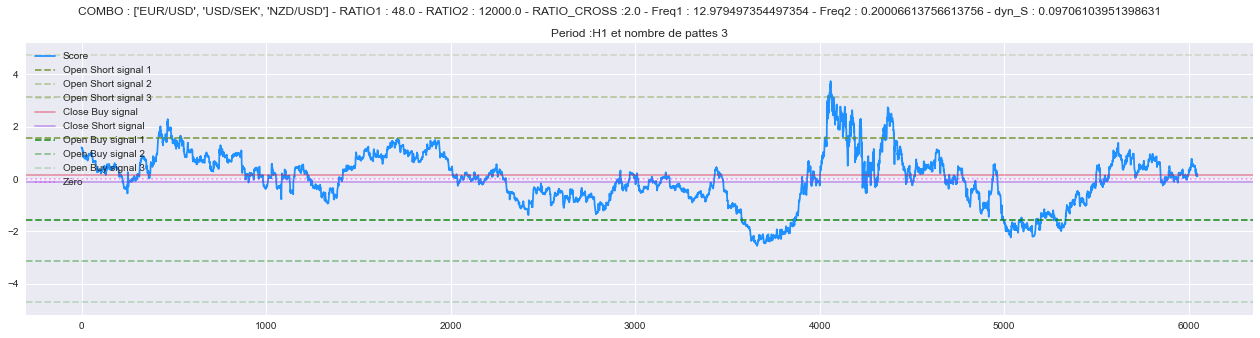

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)

Analyse du pack : ['GBP/USD', 'USD/CNH', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:15:37 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour GBP/USD
Passage pour USD/CNH


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE < 50
USD/CNH  :  0.5396035534934015
  


LIGNE 512


 
TICKERS :  ['GBP/USD', 'USD/CNH', 'NZD/USD']
COEF [7.65915167 0.53960355]
CSTE -0.17062258732546653
Dernière valeur du combo à  1.2733056900797814
Derniere valeur du residu -0.01935069007978152
Dernière valeur du Score -0.6655962397417023
Mean 3.113323825668428e-17
Std 0.02907271544576478
 Pour les TICKERS : ['GBP/USD', 'USD/CNH', 'NZD/USD'] , - Moyenne du spread : 3.113323825668428e-17  - Std Dev du spread :  0.02907271544576478
La déviation est de : 0.6655962397417023
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
AUD/USD  - coef :  0.4789216438007274
USD/NOK  - coef :  1.492069590883031
TICKERS :  ['NZD/USD', 'AUD/USD', 'USD/NOK']
COEF [0.47892164 1.49206959]
CSTE 0.15518440060559913
Dernière valeur du combo à  0.6449656805586277
Derniere valeur du residu 0.009559319441372338
Dernière valeur du Score 1.1917928003227642
Mean -1.057355261547768e-17
Std 0.008020957534550864
 Pour les TICKERS : ['NZD/USD', 'AUD/USD', 'USD/NOK'] , - Moyenne du spread : -1.057355261547768e-17  - Std Dev du spread :  0.008020957534550864
La déviation est de : 1.1917928003227642
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation observée

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
USD/MXN  - coef :  3.0968401952708726
USD/ZAR  - coef :  0.8896236983992093
TICKERS :  ['USD/CAD', 'USD/MXN', 'USD/ZAR']
COEF [3.0968402 0.8896237]
CSTE 0.5360851655647403
Dernière valeur du combo à  0.7237272784611823
Derniere valeur du residu 0.011269597802093578
Dernière valeur du Score 1.806315063606576
Mean 2.147752875018904e-16
Std 0.006238998959346516
 Pour les TICKERS : ['USD/CAD', 'USD/MXN', 'USD/ZAR'] , - Moyenne du spread : 2.147752875018904e-16  - Std Dev du spread :  0.006238998959346516
La déviation est de : 1.806315063606576
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de

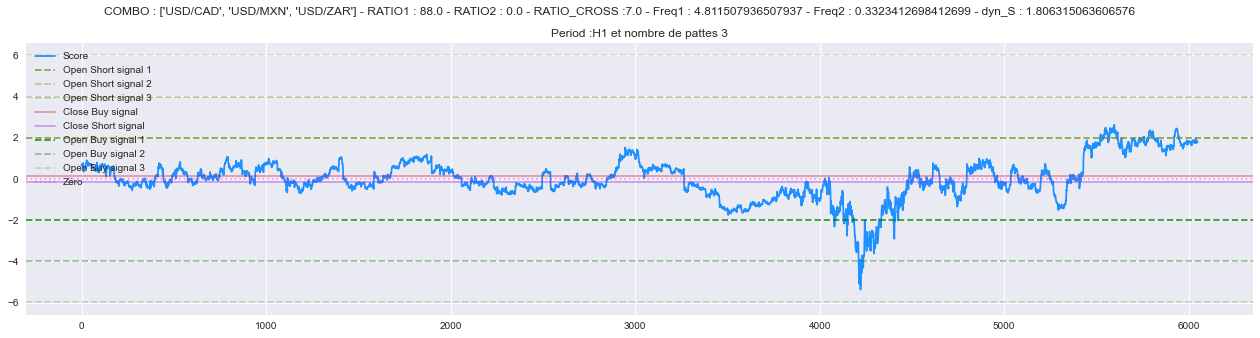

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)

Analyse du pack : ['USD/CHF', 'USD/TRY', 'USD/ZAR'] 


Heure locale du début du train :  2020-07-07 22:15:44 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour USD/ZAR
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo donsidéré comme   inadéquat 
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
SCORE < 50
USD/TRY  :  1.0966489899256568
  


LIGNE 512


 
TICKERS :  ['USD/CHF', 'USD/TRY', 'USD/ZAR']
COEF [-1.31454722  1.09664899]
CSTE 1.1700533307004584
Dernière valeur du combo à  1.0422671270386437
Derniere valeur du residu 0.018684546612621533
Dernière valeur du Score 1.5777010510841558
Mean 5.815453938512725e-17
Std 0.011842894190747945
 Pour les TICKERS : ['USD/CHF', 'USD/TRY', 'USD/ZAR'] , - Moyenne du spread : 5.815453938512725e-17  - Std Dev du spread :  0.011842894190747945
La déviation est de : 1.5777010510841558
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de Johasen   VALIDE! 

T

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour GBP/USD
 USD/CNH   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
SCORE < 50
NZD/USD  :  0.012026750972810472
  


LIGNE 512


 
TICKERS :  ['USD/CNH', 'NZD/USD', 'GBP/USD']
COEF [0.03385968 0.01202675]
CSTE 0.10531066228465555
Dernière valeur du combo à  0.14255367170960834
Derniere valeur du residu -0.00014308775500884718
Dernière valeur du Score -0.12420327507672992
Mean -1.677817203219896e-17
Std 0.0011520449434238677
 Pour les TICKERS : ['USD/CNH', 'NZD/USD', 'GBP/USD'] , - Moyenne du spread : -1.677817203219896e-17  - Std Dev du spread :  0.0011520449434238677
La déviation est de : 0.12420327507672993
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de Johasen   VALIDE! 

TEST DU FULL S

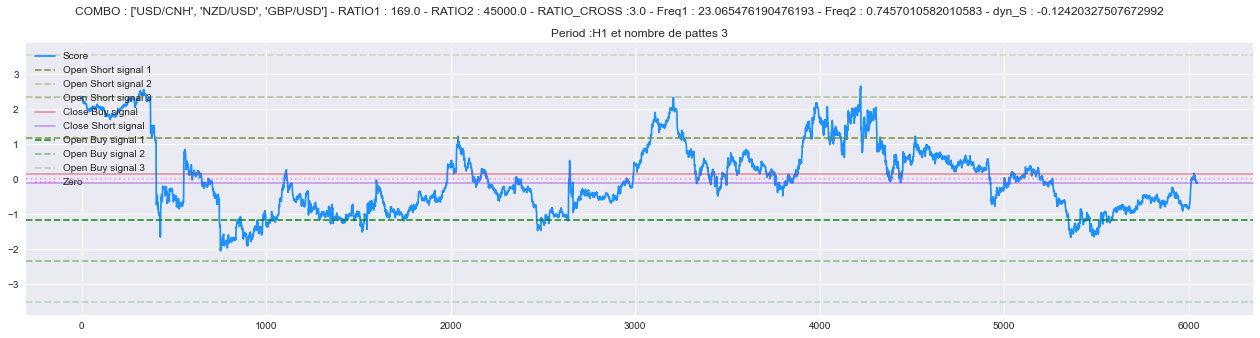

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)

Analyse du pack : ['USD/JPY', 'GBP/USD', 'USD/CNH'] 


Heure locale du début du train :  2020-07-07 22:15:49 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/JPY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour GBP/USD
Passage pour USD/CNH
 USD/JPY   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
SCORE < 50
GBP/USD  :  -0.01098465268836079
  


LIGNE 512


 
TICKERS :  ['USD/JPY', 'GBP/USD', 'USD/CNH']
COEF [-0.00121163 -0.01098465]
CSTE 0.012339370952906
Dernière valeur du combo à  0.009255711157933054
Derniere valeur du residu 4.298144588684924e-05
Dernière valeur du Score 0.4189536041996812
Mean 1.047488448126207e-18
Std 0.00010259237647317725
 Pour les TICKERS : ['USD/JPY', 'GBP/USD', 'USD/CNH'] , - Moyenne du spread : 1.047488448126207e-18  - Std Dev du spread :  0.00010259237647317725
La déviation est de : 0.4189536041996812
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de Johasen   VALIDE!

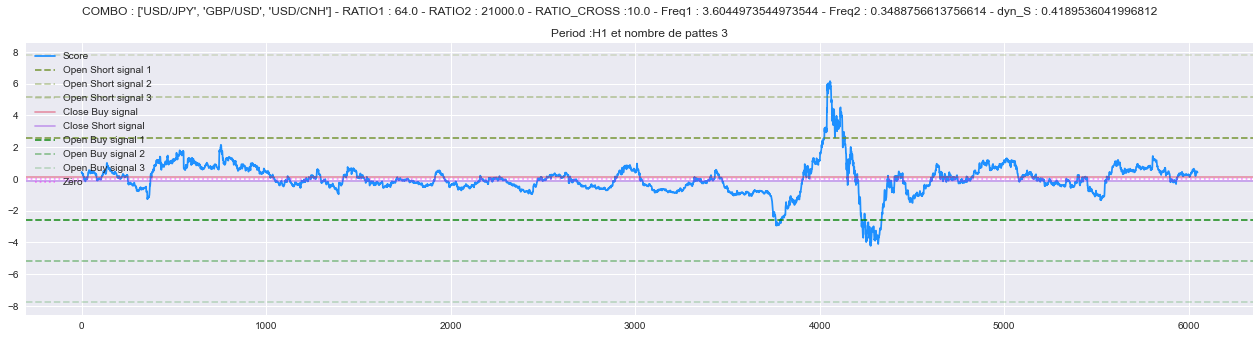

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)

Analyse du pack : ['USD/MXN', 'USD/ZAR', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:15:53 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/MXN
Passage pour USD/ZAR


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/ZAR  - coef :  0.6622365738893912
USD/NOK  - coef :  0.08219125444912705
TICKERS :  ['USD/MXN', 'USD/ZAR', 'USD/NOK']
COEF [0.66223657 0.08219125]
CSTE -0.002186179002359949
Dernière valeur du combo à  0.04504960474869577
Derniere valeur du residu -0.001192167733457504
Dernière valeur du Score -1.0607727369383144
Mean -8.0953762212251e-18
Std 0.001123867245022175
 Pour les TICKERS : ['USD/MXN', 'USD/ZAR', 'USD/NOK'] , - Moyenne du spread : -8.0953762212251e-18  - Std Dev du spread :  0.001123867245022175
La déviation est de : 1.0607727369383144
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiég

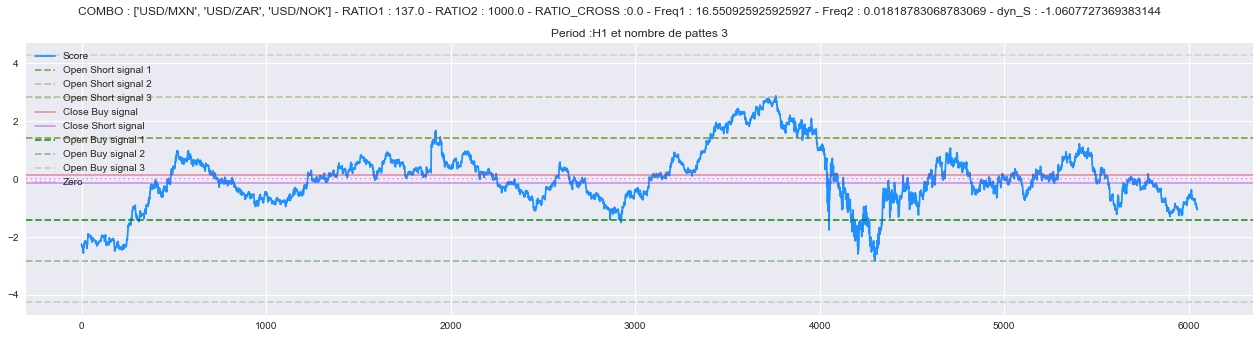

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)

Analyse du pack : ['USD/NOK', 'USD/ZAR', 'USD/MXN'] 


Heure locale du début du train :  2020-07-07 22:15:56 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/MXN
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/ZAR  - coef :  0.6552080012237684
USD/MXN  - coef :  0.44390298689002616
TICKERS :  ['USD/NOK', 'USD/ZAR', 'USD/MXN']
COEF [0.655208   0.44390299]
CSTE 0.04315313422448935
Dernière valeur du combo à  0.10078896378344003
Derniere valeur du residu 0.004562523015755299
Dernière valeur du Score 1.7468629153993425
Mean 1.637432106424669e-17
Std 0.0026118380415169925
 Pour les TICKERS : ['USD/NOK', 'USD/ZAR', 'USD/MXN'] , - Moyenne du spread : 1.637432106424669e-17  - Std Dev du spread :  0.0026118380415169925
La déviation est de : 1.7468629153993425
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.08987247347729707
NZD/USD  - coef :  0.05010076919651388
TICKERS :  ['USD/SEK', 'EUR/USD', 'NZD/USD']
COEF [0.08987247 0.05010077]
CSTE -0.02745794311412071
Dernière valeur du combo à  0.10662413535208044
Derniere valeur du residu 0.0013356302024926797
Dernière valeur du Score 1.2829366743305022
Mean -1.3951215256533051e-18
Std 0.0010410725869923992
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'NZD/USD'] , - Moyenne du spread : -1.3951215256533051e-18  - Std Dev du spread :  0.0010410725869923992
La déviation est de : 1.2829366743305022
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de c

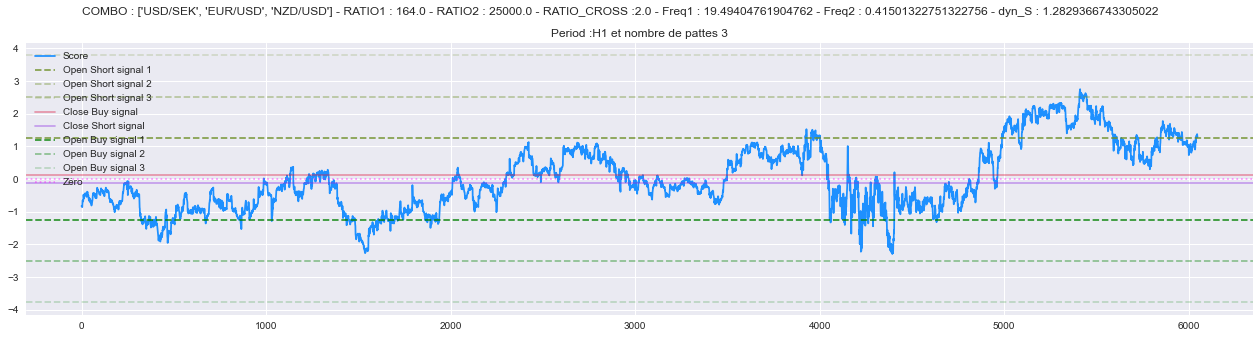

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)

Analyse du pack : ['USD/TRY', 'USD/MXN', 'USD/ZAR'] 


Heure locale du début du train :  2020-07-07 22:16:01 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/TRY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/ZAR
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/TRY
USD/MXN  - coef :  0.017628325884414108
USD/ZAR  - coef :  1.9551050513022672
TICKERS :  ['USD/TRY', 'USD/MXN', 'USD/ZAR']
COEF [0.01762833 1.95510505]
CSTE 0.03781674805559651
Dernière valeur du combo à  0.15247927474226994
Derniere valeur du residu -0.006673522996975073
Dernière valeur du Score -1.278939254166417
Mean -9.98613302572892e-18
Std 0.0052180140497170915
 Pour les TICKERS : ['USD/TRY', 'USD/MXN', 'USD/ZAR'] , - Moyenne du spread : -9.98613302572892e-18  - Std Dev du spread :  0.0052180140497170915
La déviation est de : 1.278939254166417
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matric

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/MXN  - coef :  1.0186876985453126
USD/NOK  - coef :  0.18661417684305667
TICKERS :  ['USD/ZAR', 'USD/MXN', 'USD/NOK']
COEF [1.0186877  0.18661418]
CSTE -0.005822562215008986
Dernière valeur du combo à  0.058514550350364083
Derniere valeur du residu -0.00026223627718752196
Dernière valeur du Score -0.18813249154923758
Mean 1.0646980064196277e-17
Std 0.001393891480562786
 Pour les TICKERS : ['USD/ZAR', 'USD/MXN', 'USD/NOK'] , - Moyenne du spread : 1.0646980064196277e-17  - Std Dev du spread :  0.001393891480562786
La déviation est de : 0.18813249154923756
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de

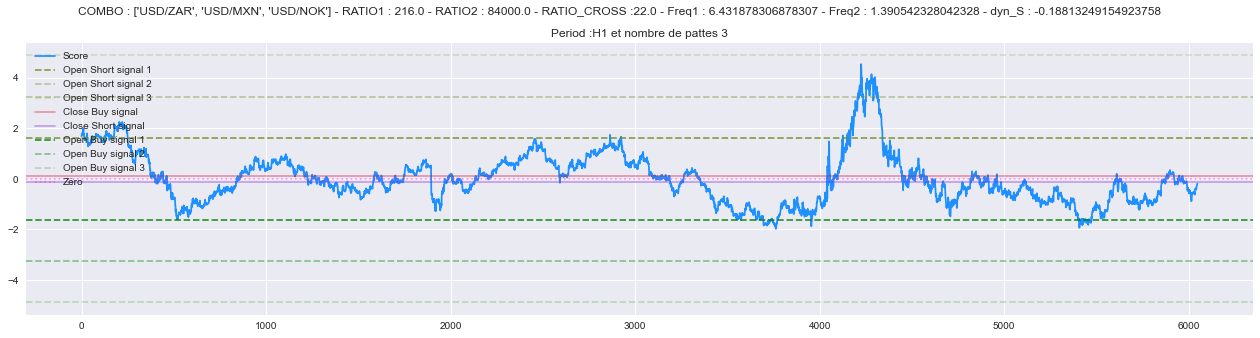

 Le scan avec 3 pattes et la timeframe H1 est non satisfaisante. 

 Nouveau scan avec 4 pattes et la timeframe H1 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement du

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/CNH
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo donsidéré comme   inadéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  1.0579864365853244
USD/NOK  - coef :  0.7210803193667857
USD/CNH  - coef :  -4.79045853904249
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/NOK', 'USD/CNH']
COEF [ 1.05798644  0.72108032 -4.79045854]
CSTE 0.6013194024316764
Dernière valeur du combo à  0.6875720920954348
Derniere valeur du residu 0.006822907904565301
Dernière valeur du Score 0.8288128627135437
Mean -1.366484820653053e-16
Std 0.008232145290587252
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/NOK', 'USD/CNH'] , - Moyenne du spread : -1.366484820653053e-16  - Std Dev du spread :  0.008232145290587252
La déviation est de : 0.8288128627135437
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour AUD/USD
 EUR/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE > 50
USD/SEK  :  0.039574135031336756
NZD/USD  :  -0.06491872458160616
TICKERS :  ['EUR/USD', 'USD/SEK', 'NZD/USD', 'AUD/USD']
COEF [ 5.13156926  0.03957414 -0.06491872]
CSTE 0.59147637501815
Dernière valeur du combo à  1.126300626703292
Derniere valeur du residu 0.0006743732967080529
Dernière valeur du Score 0.08703756325605594
Mean -7.548341728271567e-17
Std 0.007748071883908199
 Pour les TICKERS : ['EUR/USD', 'USD/SEK', 'NZD/USD', 'AUD/USD'] , - Moyenne du spread : -7.548341728271567e-17  - Std Dev du spread :  0.007748071883908199
La déviation est de : 0.0870375632560559
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de corre

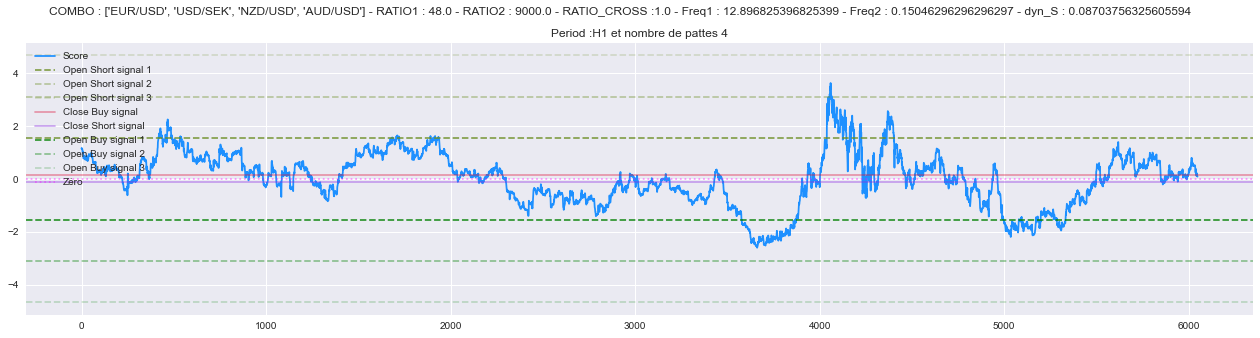

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)

Analyse du pack : ['GBP/USD', 'USD/CNH', 'NZD/USD', 'USD/MXN'] 


Heure locale du début du train :  2020-07-07 22:17:54 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour GBP/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CNH
Passage pour NZD/USD
Passage pour USD/MXN
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE < 50
USD/CNH  :  0.15838034049637606
NZD/USD  :  2.6689294004106747
  


LIGNE 512


 
TICKERS :  ['GBP/USD', 'USD/CNH', 'NZD/USD', 'USD/MXN']
COEF [7.09656524 0.15838034 2.6689294 ]
CSTE 0.02088553321582154
Dernière valeur du combo à  1.252154309513076
Derniere valeur du residu 0.0017206904869238038
Dernière valeur du Score 0.06132081520787729
Mean -1.7622587692462801e-16
Std 0.028060463336810622
 Pour les TICKERS : ['GBP/USD', 'USD/CNH', 'NZD/USD', 'USD/MXN'] , - Moyenne du spread : -1.7622587692462801e-16  - Std Dev du spread :  0.028060463336810622
La déviation est de : 0.06132081520787726
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYEN

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/ZAR
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
AUD/USD  - coef :  0.5884778228528175
USD/NOK  - coef :  0.20153476009128346
USD/ZAR  - coef :  1.096186751255788
TICKERS :  ['NZD/USD', 'AUD/USD', 'USD/NOK', 'USD/ZAR']
COEF [0.58847782 0.20153476 1.09618675]
CSTE 0.1493777522142058
Dernière valeur du combo à  0.6431009218148416
Derniere valeur du residu 0.011394078185158474
Dernière valeur du Score 1.4830387108298264
Mean 5.1692923897890884e-17
Std 0.0076829270213607075
 Pour les TICKERS : ['NZD/USD', 'AUD/USD', 'USD/NOK', 'USD/ZAR'] , - Moyenne du spread : 5.1692923897890884e-17  - Std Dev du spread :  0.0076829270213607075
La déviation est de : 1.4830387108298264
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/NOK
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
USD/MXN  - coef :  2.276214203251309
USD/ZAR  - coef :  -0.32167456803412087
USD/NOK  - coef :  1.848708093619714
TICKERS :  ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK']
COEF [ 2.2762142  -0.32167457  1.84870809]
CSTE 0.45630718872989895
Dernière valeur du combo à  0.7321764879021748
Derniere valeur du residu 0.0026394590735063783
Dernière valeur du Score 0.6680625479249037
Mean 4.695685345554151e-17
Std 0.003950916095663292
 Pour les TICKERS : ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK'] , - Moyenne du spread : 4.695685345554151e-17  - Std Dev du spread :  0.003950916095663292
La déviation est de : 0.6680625479249037
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA M

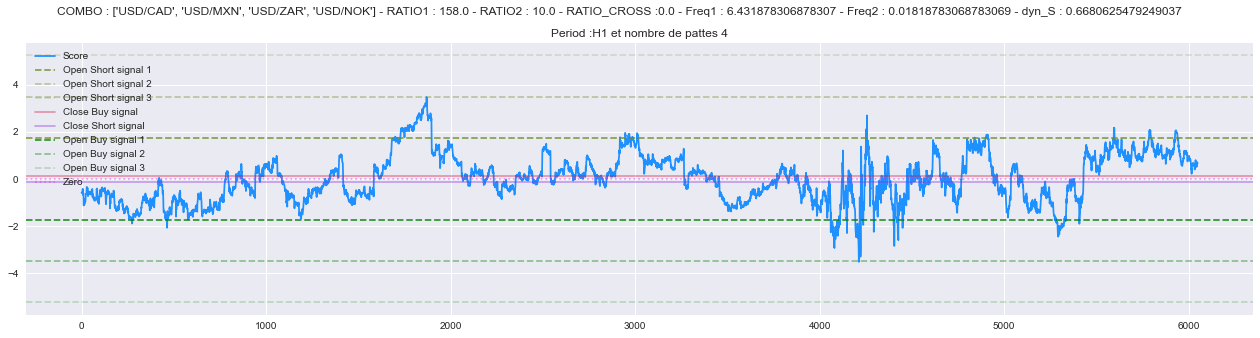

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)

Analyse du pack : ['USD/CHF', 'USD/TRY', 'USD/ZAR', 'USD/MXN'] 


Heure locale du début du train :  2020-07-07 22:18:01 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour USD/ZAR
Passage pour USD/MXN
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE < 50
USD/TRY  :  0.6837287900005101
USD/ZAR  :  0.5568404489390693
  


LIGNE 512


 
TICKERS :  ['USD/CHF', 'USD/TRY', 'USD/ZAR', 'USD/MXN']
COEF [-1.31501712  0.68372879  0.55684045]
CSTE 1.1692846709616052
Dernière valeur du combo à  1.0417949206986143
Derniere valeur du residu 0.019100475015368046
Dernière valeur du Score 1.6151655794794304
Mean -2.2439428328402637e-16
Std 0.011825707071794072
 Pour les TICKERS : ['USD/CHF', 'USD/TRY', 'USD/ZAR', 'USD/MXN'] , - Moyenne du spread : -2.2439428328402637e-16  - Std Dev du spread :  0.011825707071794072
La déviation est de : 1.6151655794794304
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   

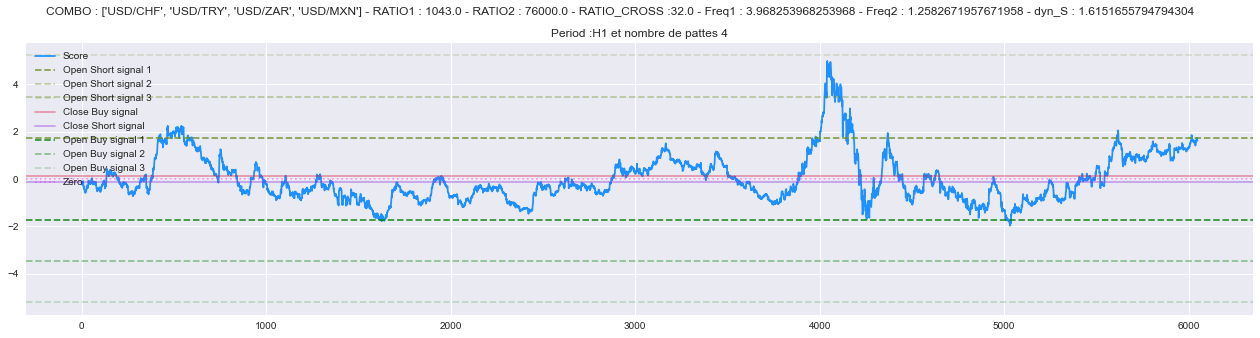

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)

Analyse du pack : ['USD/CNH', 'NZD/USD', 'GBP/USD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:18:04 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/CNH


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour GBP/USD
Passage pour USD/NOK
 USD/CNH   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE < 50
NZD/USD  :  0.010879586995653306
GBP/USD  :  -0.057985113004423376
  


LIGNE 512


 
TICKERS :  ['USD/CNH', 'NZD/USD', 'GBP/USD', 'USD/NOK']
COEF [ 0.04949055  0.01087959 -0.05798511]
CSTE 0.10301248657341094
Dernière valeur du combo à  0.1429361214259607
Derniere valeur du residu -0.0005348660164930241
Dernière valeur du Score -0.4688316599172347
Mean 1.0224772234064355e-17
Std 0.0011408487570729695
 Pour les TICKERS : ['USD/CNH', 'NZD/USD', 'GBP/USD', 'USD/NOK'] , - Moyenne du spread : 1.0224772234064355e-17  - Std Dev du spread :  0.0011408487570729695
La déviation est de : 0.46883165991723474
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically sign

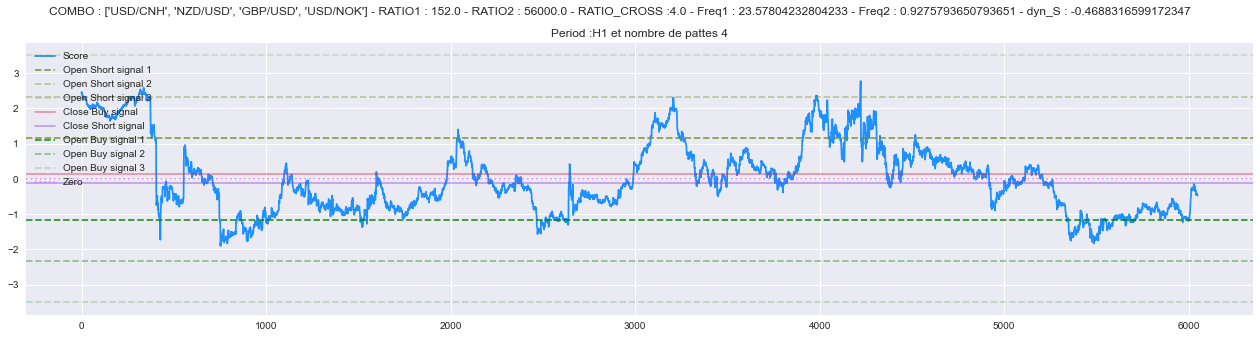

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)

Analyse du pack : ['USD/JPY', 'GBP/USD', 'USD/CNH', 'USD/CHF'] 


Heure locale du début du train :  2020-07-07 22:18:07 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/JPY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour GBP/USD
Passage pour USD/CNH
Passage pour USD/CHF
 USD/JPY   a un kmo donsidéré comme   inadéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo donsidéré comme   inadéquat 
SCORE < 50
GBP/USD  :  -0.012824784710438715
USD/CNH  :  0.0025344246736654723
  


LIGNE 512


 
TICKERS :  ['USD/JPY', 'GBP/USD', 'USD/CNH', 'USD/CHF']
COEF [-0.00115724 -0.01282478  0.00253442]
CSTE 0.009934935647400165
Dernière valeur du combo à  0.009346399472100354
Derniere valeur du residu -4.714480736173199e-05
Dernière valeur du Score -0.5008991652127297
Mean -1.002743596563313e-18
Std 9.41203552250058e-05
 Pour les TICKERS : ['USD/JPY', 'GBP/USD', 'USD/CNH', 'USD/CHF'] , - Moyenne du spread : -1.002743596563313e-18  - Std Dev du spread :  9.41203552250058e-05
La déviation est de : 0.5008991652127298
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/TRY
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/ZAR  - coef :  0.657484390033698
USD/NOK  - coef :  0.08235274766305468
USD/TRY  - coef :  0.002333656674989873
TICKERS :  ['USD/MXN', 'USD/ZAR', 'USD/NOK', 'USD/TRY']
COEF [0.65748439 0.08235275 0.00233366]
CSTE -0.0022815602133446217
Dernière valeur du combo à  0.045034164705714676
Derniere valeur du residu -0.001177689406777975
Dernière valeur du Score -1.0479515081042334
Mean -6.498329211595658e-18
Std 0.0011238014332442096
 Pour les TICKERS : ['USD/MXN', 'USD/ZAR', 'USD/NOK', 'USD/TRY'] , - Moyenne du spread : -6.498329211595658e-18  - Std Dev du spread :  0.0011238014332442096
La déviation est de : 1.0479515081042334
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETO

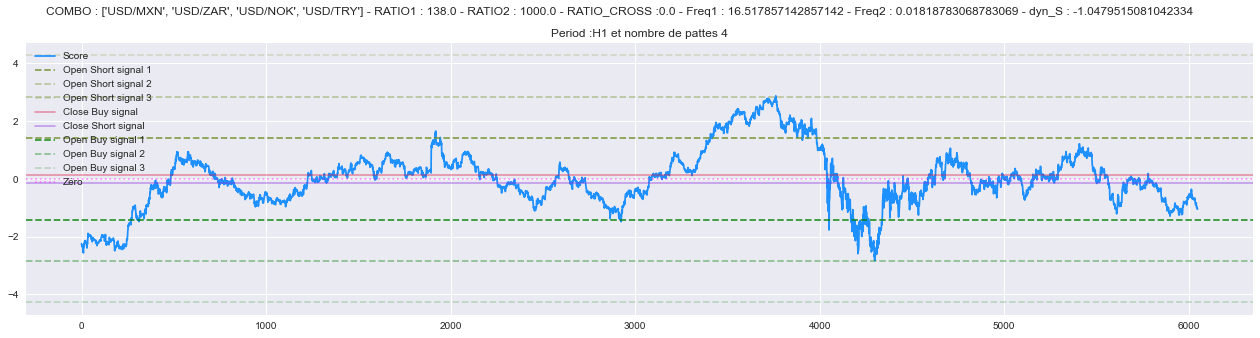

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)

Analyse du pack : ['USD/NOK', 'USD/ZAR', 'USD/MXN', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:18:13 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/MXN
Passage pour NZD/USD
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/ZAR  - coef :  0.269915826190902
USD/MXN  - coef :  0.42063800345848534
NZD/USD  - coef :  0.13302735573946095
TICKERS :  ['USD/NOK', 'USD/ZAR', 'USD/MXN', 'NZD/USD']
COEF [0.26991583 0.420638   0.13302736]
CSTE -0.01563753352386177
Dernière valeur du combo à  0.10559862362332054
Derniere valeur du residu -0.00023842343894019125
Dernière valeur du Score -0.12698389073776195
Mean -1.967855625658346e-17
Std 0.0018775880747940428
 Pour les TICKERS : ['USD/NOK', 'USD/ZAR', 'USD/MXN', 'NZD/USD'] , - Moyenne du spread : -1.967855625658346e-17  - Std Dev du spread :  0.0018775880747940428
La déviation est de : 0.12698389073776198
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALID

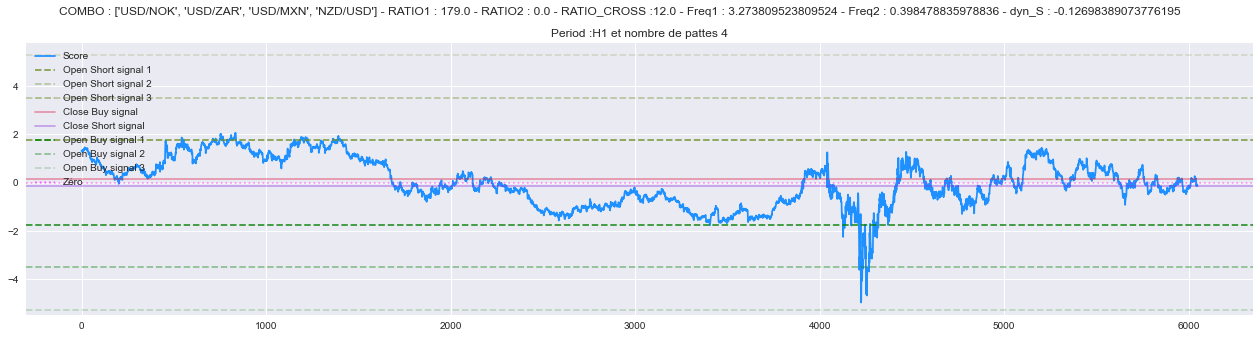

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD'] 


Heure locale du début du train :  2020-07-07 22:18:16 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/SEK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour NZD/USD
Passage pour AUD/USD
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.08748456092996569
NZD/USD  - coef :  0.026943044201349922
AUD/USD  - coef :  0.02354354712281618
TICKERS :  ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD']
COEF [0.08748456 0.02694304 0.02354355]
CSTE -0.025887743342537364
Dernière valeur du combo à  0.1066877788304212
Derniere valeur du residu 0.001271870171167963
Dernière valeur du Score 1.2572120352639375
Mean -3.4510900897739652e-18
Std 0.00101165923924754
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD'] , - Moyenne du spread : -3.4510900897739652e-18  - Std Dev du spread :  0.00101165923924754
La déviation est de : 1.2572120352639375
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et

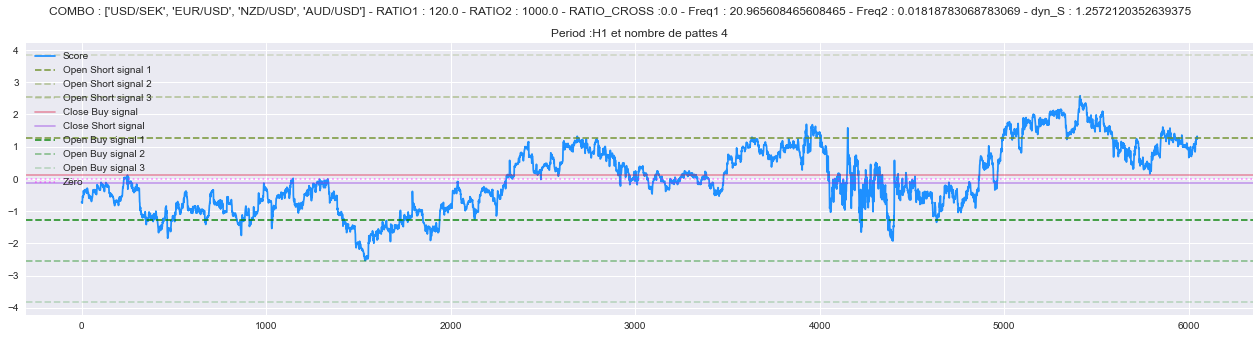

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)

Analyse du pack : ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:18:19 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/TRY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/ZAR
Passage pour USD/NOK
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/TRY
USD/MXN  - coef :  0.050243547744382985
USD/ZAR  - coef :  2.003247580891646
USD/NOK  - coef :  -0.07347582380192241
TICKERS :  ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK']
COEF [ 0.05024355  2.00324758 -0.07347582]
CSTE 0.04098746865061759
Dernière valeur du combo à  0.1521396146985583
Derniere valeur du residu -0.006332906277710548
Dernière valeur du Score -1.2144840403257129
Mean 1.4538634846281813e-17
Std 0.005214482914087647
 Pour les TICKERS : ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK'] , - Moyenne du spread : 1.4538634846281813e-17  - Std Dev du spread :  0.005214482914087647
La déviation est de : 1.2144840403257129
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550




C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Passage pour USD/NOK
Passage pour NZD/USD
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/MXN  - coef :  1.0281373500220654
USD/NOK  - coef :  0.14796371555846505
NZD/USD  - coef :  0.010365234625243469
TICKERS :  ['USD/ZAR', 'USD/MXN', 'USD/NOK', 'NZD/USD']
COEF [1.02813735 0.14796372 0.01036523]
CSTE -0.008747471940655296
Dernière valeur du combo à  0.05871648928181497
Derniere valeur du residu -0.00046604148149751584
Dernière valeur du Score -0.33524384766619897
Mean 1.0867262410352061e-17
Std 0.0013901567015826713
 Pour les TICKERS : ['USD/ZAR', 'USD/MXN', 'USD/NOK', 'NZD/USD'] , - Moyenne du spread : 1.0867262410352061e-17  - Std Dev du spread :  0.0013901567015826713
La déviation est de : 0.3352438476661989
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   R

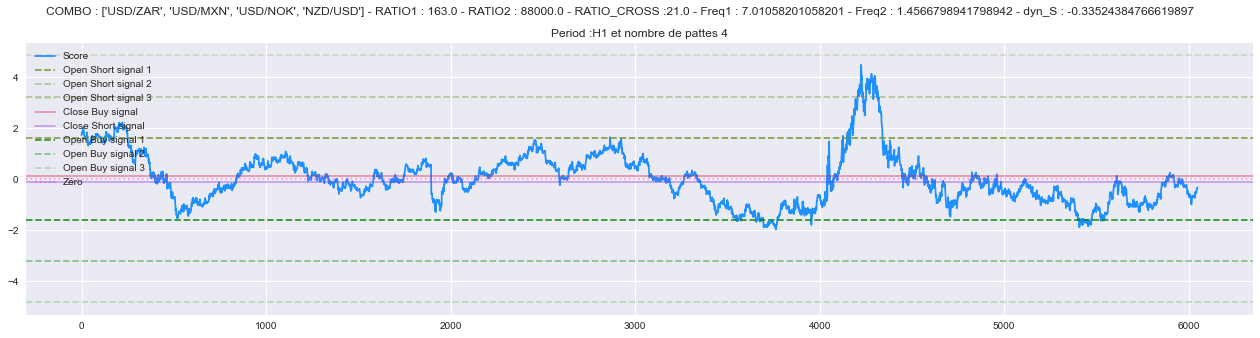

 Le scan avec 4 pattes et la timeframe H1 est non satisfaisante. 

 Nouveau scan avec 5 pattes et la timeframe H1 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement du

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour USD/NOK
Passage pour USD/CNH
Passage pour USD/SEK
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  0.6606303837148088
USD/NOK  - coef :  1.3092743282489985
USD/CNH  - coef :  -4.158960335849988
USD/SEK  - coef :  2.497857214962709
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/NOK', 'USD/CNH', 'USD/SEK']
COEF [ 0.66063038  1.30927433 -4.15896034  2.49785721]
CSTE 0.44230506142968157
Dernière valeur du combo à  0.6899335845453505
Derniere valeur du residu 0.004376415454649507
Dernière valeur du Score 0.5730918636078051
Mean 6.990293118010245e-17
Std 0.007636499019718125
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/NOK', 'USD/CNH', 'USD/SEK'] , - Moyenne du spread : 6.990293118010245e-17  - Std Dev du spread :  0.0076364

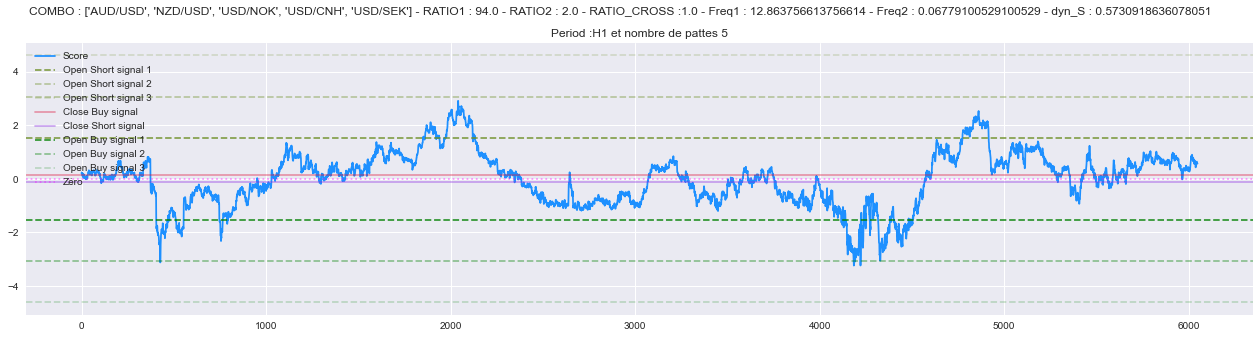

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)
base_pair4 :  (9718, 1)

Analyse du pack : ['EUR/USD', 'USD/SEK', 'NZD/USD', 'AUD/USD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:20:12 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour EUR/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
Passage pour NZD/USD
Passage pour AUD/USD
Passage pour USD/NOK
 EUR/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : EUR/USD
USD/SEK  - coef :  5.9438727487692296
NZD/USD  - coef :  -0.13207972371519788
AUD/USD  - coef :  -0.1524099375253493
USD/NOK  - coef :  0.7520633407848486
TICKERS :  ['EUR/USD', 'USD/SEK', 'NZD/USD', 'AUD/USD', 'USD/NOK']
COEF [ 5.94387275 -0.13207972 -0.15240994  0.75206334]
CSTE 0.5946862813650325
Dernière valeur du combo à  1.1232972669706016
Derniere valeur du residu 0.0035977330293983645
Dernière valeur du Score 0.4759258566970312
Mean 5.037122982095618e-17
Std 0.00755944014970506
 Pour les TICKERS : ['EUR/USD', 'USD/SEK', 'NZD/USD', 'AUD/USD', 'USD/NOK'] , - Moyenne du spread : 5.037122982095618e-17  - Std Dev du spread :  0.0075

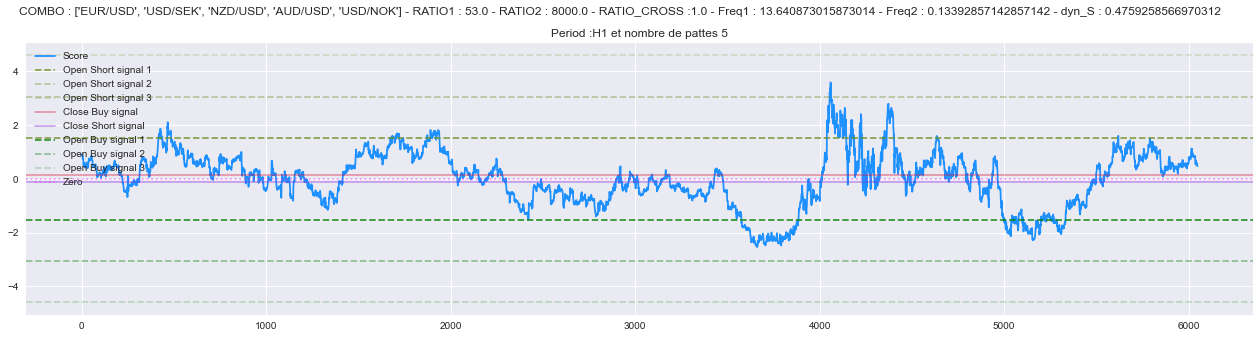

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)
base_pair4 :  (9718, 1)

Analyse du pack : ['GBP/USD', 'USD/CNH', 'NZD/USD', 'USD/MXN', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:20:16 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour GBP/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CNH
Passage pour NZD/USD
Passage pour USD/MXN
Passage pour USD/NOK
 GBP/USD   a un kmo donsidéré comme   inadéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo donsidéré comme   inadéquat 
 USD/MXN   a un kmo donsidéré comme   inadéquat 
 USD/NOK   a un kmo donsidéré comme   inadéquat 
SCORE > 50
USD/CNH  :  1.7210147748789966
NZD/USD  :  9.766102459985143
USD/MXN  :  -9.459708387538242
TICKERS :  ['GBP/USD', 'USD/CNH', 'NZD/USD', 'USD/MXN', 'USD/NOK']
COEF [ 1.30212483  1.72101477  9.76610246 -9.45970839]
CSTE 0.5129969409301594
Dernière valeur du combo à  1.256303197036098
Derniere valeur du residu -0.0024181970360981353
Dernière valeur du Score -0.10734390426310374
Mean 4.802155146196114e-17
Std 0.02252756737980292
 Pour les TICKERS : ['GBP/USD', 'USD/CNH', 'NZD/USD', 'USD/MXN', 'USD/NOK'] , - Moyenne du spread : 4.802155146196114e-17  - Std Dev du spread :  0.02252756737980292
La déviation est de : 0.10734390426310372
Le test est   VALIDE  et

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/ZAR
Passage pour USD/CNH
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
AUD/USD  - coef :  0.556028443864844
USD/NOK  - coef :  0.4920823978557759
USD/ZAR  - coef :  0.29571213943145963
USD/CNH  - coef :  3.9571764704320107
TICKERS :  ['NZD/USD', 'AUD/USD', 'USD/NOK', 'USD/ZAR', 'USD/CNH']
COEF [0.55602844 0.4920824  0.29571214 3.95717647]
CSTE -0.3705546901906861
Dernière valeur du combo à  0.6480631523209067
Derniere valeur du residu 0.006331847679093339
Dernière valeur du Score 1.0941848890105885
Mean 3.935711251316692e-17
Std 0.005786816965475407
 Pour les TICKERS : ['NZD/USD', 'AUD/USD', 'USD/NOK', 'USD/ZAR', 'USD/CNH'] , - Moyenne du spread : 3.935711251316692e-17  - Std Dev du spread :  0.005786816965475407
La déviation

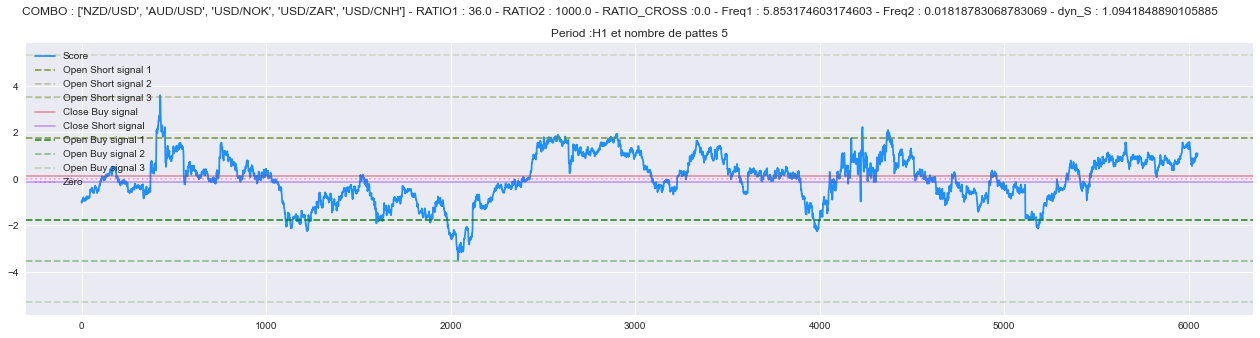

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)
base_pair4 :  (9718, 1)

Analyse du pack : ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:20:22 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/CAD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/ZAR
Passage pour USD/NOK
Passage pour NZD/USD
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
USD/MXN  - coef :  2.498312673437873
USD/ZAR  - coef :  -0.40144841625385935
USD/NOK  - coef :  1.2874925514091955
NZD/USD  - coef :  0.1545018069689657
TICKERS :  ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'NZD/USD']
COEF [ 2.49831267 -0.40144842  1.28749255  0.15450181]
CSTE 0.41224436280663596
Dernière valeur du combo à  0.7350832090048549
Derniere valeur du residu -0.0003104558480874209
Dernière valeur du Score -0.08509021534553109
Mean 2.2872650275842345e-17
Std 0.003648549328812444
 Pour les TICKERS : ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'NZD/USD'] , - Moyenne du spread : 2.2872650275842345e-17  - Std Dev du spread :  0

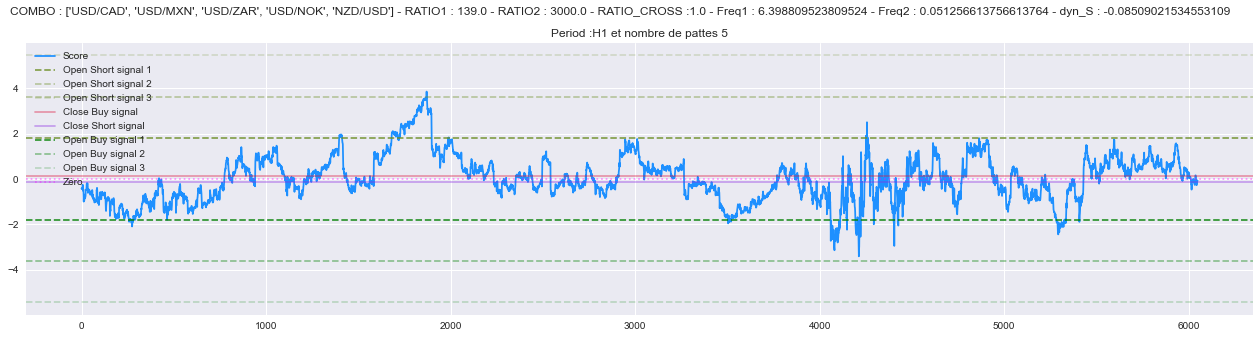

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)
base_pair4 :  (9718, 1)

Analyse du pack : ['USD/CHF', 'USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:20:26 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour USD/ZAR
Passage pour USD/MXN
Passage pour USD/NOK
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE < 50
USD/TRY  :  -0.12708537652270746
USD/ZAR  :  0.035667668386815676
USD/MXN  :  1.1731068567396166
  


LIGNE 512


 
TICKERS :  ['USD/CHF', 'USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/NOK']
COEF [-1.29342274 -0.12708538  0.03566767  1.17310686]
CSTE 1.1178448996470423
Dernière valeur du combo à  1.0469802897663172
Derniere valeur du residu 0.013909478482312831
Dernière valeur du Score 1.2177322345819752
Mean -4.6993567179900803e-17
Std 0.011422444185431079
 Pour les TICKERS : ['USD/CHF', 'USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/NOK'] , - Moyenne du spread : -4.6993567179900803e-17  - Std Dev du spread :  0.011422444185431079
La déviation est de : 1.2177322345819752
Le tes

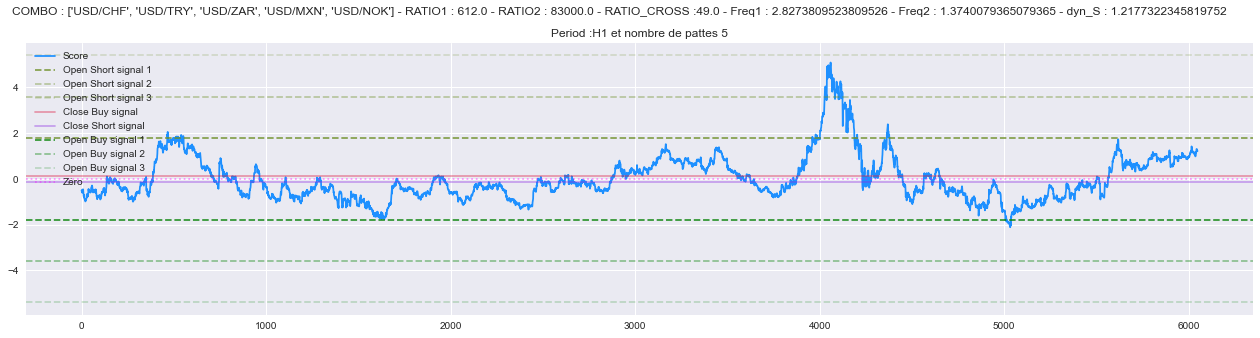

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)
base_pair4 :  (9718, 1)

Analyse du pack : ['USD/CNH', 'NZD/USD', 'GBP/USD', 'USD/NOK', 'USD/ZAR'] 


Heure locale du début du train :  2020-07-07 22:20:30 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/CNH


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour GBP/USD
Passage pour USD/NOK
Passage pour USD/ZAR
 USD/CNH   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo donsidéré comme   inadéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 50
NZD/USD  :  0.004393069526345637
GBP/USD  :  -0.24558522858127724
USD/NOK  :  0.189153117971042
TICKERS :  ['USD/CNH', 'NZD/USD', 'GBP/USD', 'USD/NOK', 'USD/ZAR']
COEF [ 0.0638853   0.00439307 -0.24558523  0.18915312]
CSTE 0.10996486037776892
Dernière valeur du combo à  0.14242999894510122
Derniere valeur du residu -2.9351876560945733e-05
Dernière valeur du Score -0.02764002602595904
Mean -9.196787952004025e-18
Std 0.0010619337526444352
 Pour les TICKERS : ['USD/CNH', 'NZD/USD', 'GBP/USD', 'USD/NOK', 'USD/ZAR'] , - Moyenne du spread : -9.196787952004025e-18  - Std Dev du spread :  0.0010619337526444352
La déviation est de : 0.02764002602595904
Le test est   VA

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CNH
Passage pour USD/CHF
Passage pour NZD/USD
 USD/JPY   a un kmo donsidéré comme   inadéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 NZD/USD   a un kmo donsidéré comme   inadéquat 
SCORE < 50
GBP/USD  :  -0.02492163136588553
USD/CNH  :  0.0028405705488323625
USD/CHF  :  0.0017438870017508733
  


LIGNE 512


 
TICKERS :  ['USD/JPY', 'GBP/USD', 'USD/CNH', 'USD/CHF', 'NZD/USD']
COEF [-0.00144782 -0.02492163  0.00284057  0.00174389]
CSTE 0.010595894503405066
Dernière valeur du combo à  0.009386364488131918
Derniere valeur du residu -8.754218397673957e-05
Dernière valeur du Score -0.974420380761303
Mean 4.543323389463066e-19
Std 8.984026371487055e-05
 Pour les TICKERS : ['USD/JPY', 'GBP/USD', 'USD/CNH', 'USD/CHF', 'NZD/USD'] , - Moyenne du spread : 4.543323389463066e-19  - Std Dev du spread :  8.984026371487055e-05
La déviation est de : 0.9744203807613031
Le test est  

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/TRY
Passage pour USD/CAD
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/ZAR  - coef :  0.4220539299649131
USD/NOK  - coef :  -0.20125656617832746
USD/TRY  - coef :  0.036157793838170436
USD/CAD  - coef :  0.14046282303197605
TICKERS :  ['USD/MXN', 'USD/ZAR', 'USD/NOK', 'USD/TRY', 'USD/CAD']
COEF [ 0.42205393 -0.20125657  0.03615779  0.14046282]
CSTE -0.06705941139576717
Dernière valeur du combo à  0.04480731327546754
Derniere valeur du residu -0.0009757317443427338
Dernière valeur du Score -1.05402556315176
Mean 1.4318352500126026e-18
Std 0.0009257192410258914
 Pour les TICKERS : ['USD/MXN', 'USD/ZAR', 'USD/NOK', 'USD/TRY', 'USD/CAD'] , - Moyenne du spread : 1.4318352500126026e-18  - Std Dev du spread :  0.0009257192410258

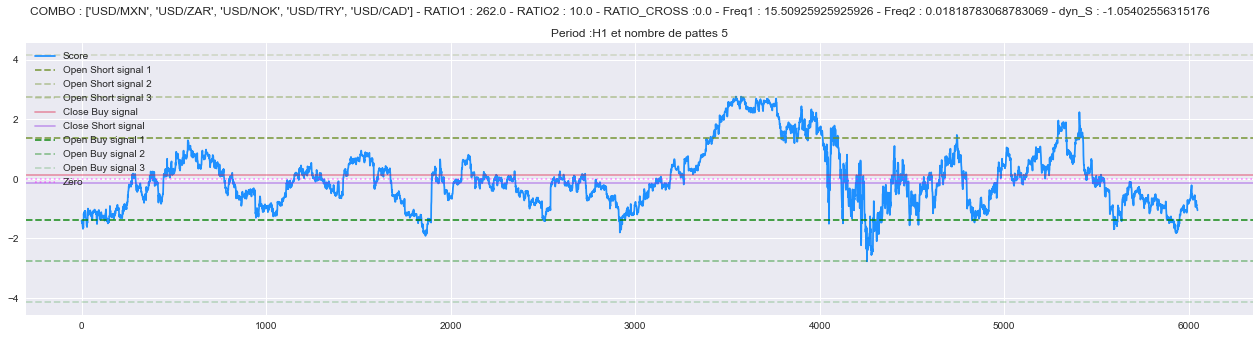

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)
base_pair4 :  (9718, 1)

Analyse du pack : ['USD/NOK', 'USD/ZAR', 'USD/MXN', 'NZD/USD', 'AUD/USD'] 


Heure locale du début du train :  2020-07-07 22:20:40 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/MXN
Passage pour NZD/USD
Passage pour AUD/USD
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/ZAR  - coef :  0.4916384708334746
USD/MXN  - coef :  0.18366448973588942
NZD/USD  - coef :  0.0134490324660414
AUD/USD  - coef :  0.10748682554968311
TICKERS :  ['USD/NOK', 'USD/ZAR', 'USD/MXN', 'NZD/USD', 'AUD/USD']
COEF [0.49163847 0.18366449 0.01344903 0.10748683]
CSTE -0.014297917639384913
Dernière valeur du combo à  0.10582095617681749
Derniere valeur du residu -0.0004895546213886798
Dernière valeur du Score -0.31904646882034154
Mean -1.4520277984102163e-17
Std 0.001534430464624069
 Pour les TICKERS : ['USD/NOK', 'USD/ZAR', 'USD/MXN', 'NZD/USD', 'AUD/USD'] , - Moyenne du spread : -1.4520277984102163e-17  - Std Dev du spread : 

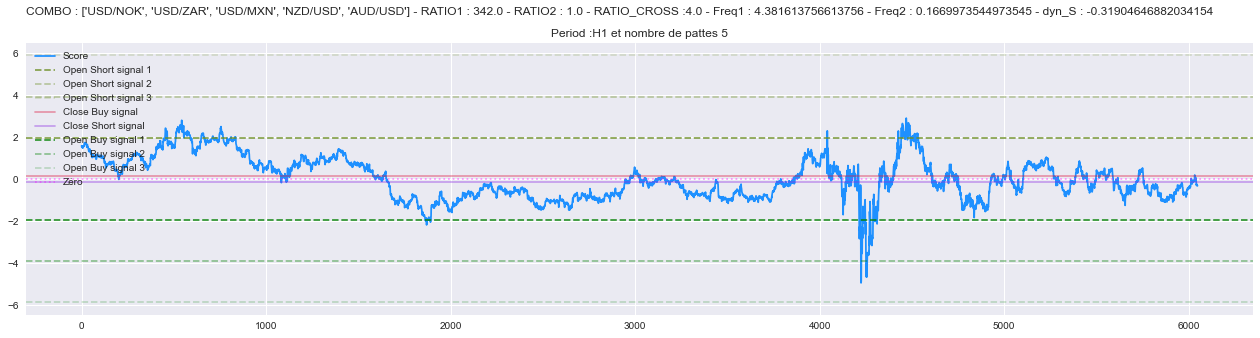

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)
base_pair4 :  (9718, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:20:44 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/SEK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour NZD/USD
Passage pour AUD/USD
Passage pour USD/NOK
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.07508905735804719
NZD/USD  - coef :  0.0662260850344362
AUD/USD  - coef :  0.04181390743534685
USD/NOK  - coef :  -0.20920909578258556
TICKERS :  ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD', 'USD/NOK']
COEF [ 0.07508906  0.06622609  0.04181391 -0.2092091 ]
CSTE -0.027067195642460018
Dernière valeur du combo à  0.10788383335965843
Derniere valeur du residu 6.719141941981255e-05
Dernière valeur du Score 0.07908071878762848
Mean -3.744799884648345e-18
Std 0.000849656154495245
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD', 'USD/NOK'] , - Moyenne du spread : -3.744799884648345e-18  - Std Dev du spread 

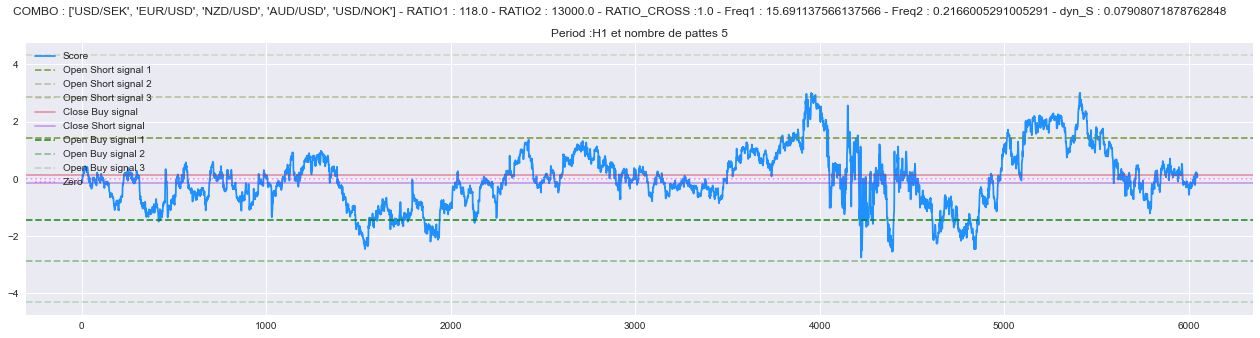

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)
base_pair4 :  (9718, 1)

Analyse du pack : ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:20:47 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/TRY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/ZAR
Passage pour USD/NOK
Passage pour NZD/USD
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/TRY
USD/MXN  - coef :  -0.48554237645477233
USD/ZAR  - coef :  2.195680170445412
USD/NOK  - coef :  1.280342495495832
NZD/USD  - coef :  -0.37269932480270374
TICKERS :  ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'NZD/USD']
COEF [-0.48554238  2.19568017  1.2803425  -0.37269932]
CSTE 0.14727827971403817
Dernière valeur du combo à  0.14486435501460704
Derniere valeur du residu 0.0009426723008814641
Dernière valeur du Score 0.2535807675381819
Mean 7.856737012889666e-18
Std 0.003717443992433367
 Pour les TICKERS : ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'NZD/USD'] , - Moyenne du spread : 7.856737012889666e-18  - Std Dev du spread :  0.00

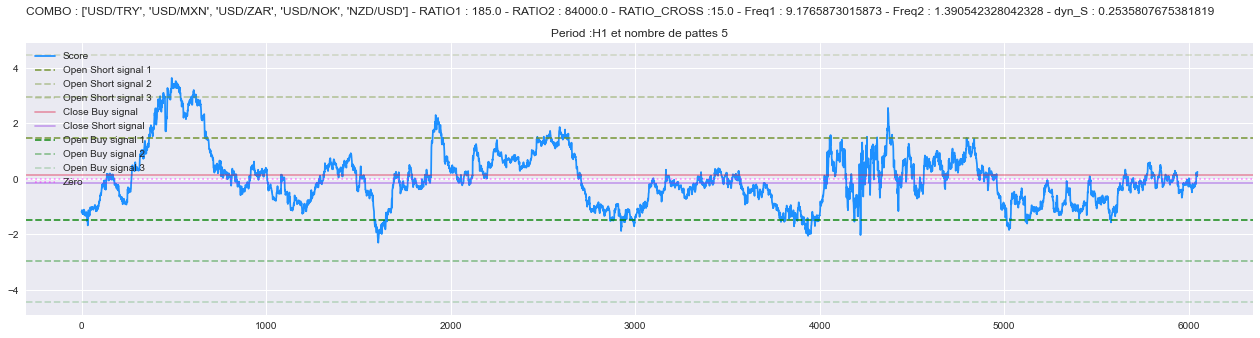

base_pair0 [PAIRE PRINCIPALE]:  (9718, 1)
base_pair1 :  (9718, 1)
base_pair2 :  (9718, 1)
base_pair3 :  (9718, 1)
base_pair4 :  (9718, 1)

Analyse du pack : ['USD/ZAR', 'USD/MXN', 'USD/NOK', 'NZD/USD', 'USD/TRY'] 


Heure locale du début du train :  2020-07-07 22:20:51 

 
 
|||| TIME_FRAME <---> debut : 2019-07-11 02:00:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/ZAR


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/NOK
Passage pour NZD/USD
Passage pour USD/TRY
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/MXN  - coef :  0.7031608807607188
USD/NOK  - coef :  -0.14643818498759792
NZD/USD  - coef :  0.07454574123511021
USD/TRY  - coef :  0.1834022123796049
TICKERS :  ['USD/ZAR', 'USD/MXN', 'USD/NOK', 'NZD/USD', 'USD/TRY']
COEF [ 0.70316088 -0.14643818  0.07454574  0.18340221]
CSTE -0.0322363176272239
Dernière valeur du combo à  0.05868348830706427
Derniere valeur du residu -0.00043253153509929115
Dernière valeur du Score -0.40258315329246064
Mean -7.810844857440544e-18
Std 0.001074390549037869
 Pour les TICKERS : ['USD/ZAR', 'USD/MXN', 'USD/NOK', 'NZD/USD', 'USD/TRY'] , - Moyenne du spread : -7.810844857440544e-18  - Std Dev du spread 

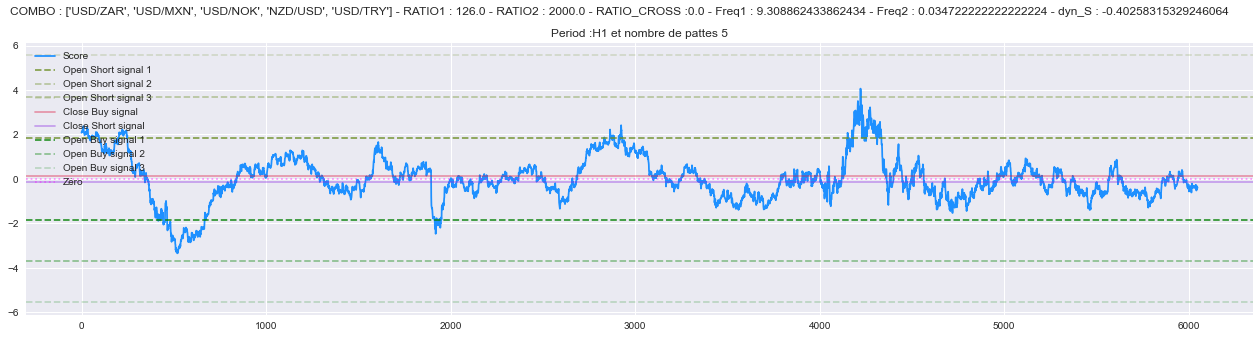

 Le scan avec 5 pattes et la timeframe H1 est non satisfaisante. 

 Nouveau scan avec 3 pattes et la timeframe m30 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement d

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo donsidéré comme   inadéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  1.4837253847427907
USD/NOK  - coef :  -1.6330044746736359
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/NOK']
COEF [ 1.48372538 -1.63300447]
CSTE -0.10331917740071994
Dernière valeur du combo à  0.6956618094319437
Derniere valeur du residu -0.0013418094319436191
Dernière valeur du Score -0.12808629517733
Mean -1.280574705652297e-16
Std 0.010475823585074526
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/NOK'] , - Moyenne du spread : -1.280574705652297e-16  - Std Dev du spread :  0.010475823585074526
La déviation est de : 0.12808629517732992
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 USD/SEK
Passage pour USD/ZAR
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 USD/SEK   a un kmo donsidéré comme   inadéquat 
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
SCORE > 70
Paire principale : EUR/USD
USD/SEK  - coef :  5.445581931459141
USD/ZAR  - coef :  -0.36437582905119165
TICKERS :  ['EUR/USD', 'USD/SEK', 'USD/ZAR']
COEF [ 5.44558193 -0.36437583]
CSTE 0.5607536686104018
Dernière valeur du combo à  1.1273654213969433
Derniere valeur du residu -0.00046542139694327744
Dernière valeur du Score -0.05266107385482062
Mean 7.37211585134694e-17
Std 0.008838053667998764
 Pour les TICKERS : ['EUR/USD', 'USD/SEK', 'USD/ZAR'] , - Moyenne du spread : 7.37211585134694e-17  - Std Dev du spread :  0.008838053667998764
La déviation est de : 0.05266107385482052
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : GBP/USD
USD/MXN  - coef :  9.506175308464071
USD/ZAR  - coef :  -2.891593635046376
TICKERS :  ['GBP/USD', 'USD/MXN', 'USD/ZAR']
COEF [ 9.50617531 -2.89159364]
CSTE 0.9924255884927989
Dernière valeur du combo à  1.2406255637712647
Derniere valeur du residu 0.01324443622873539
Dernière valeur du Score 0.8022709346090737
Mean -1.2306440405236523e-16
Std 0.016508682612550573
 Pour les TICKERS : ['GBP/USD', 'USD/MXN', 'USD/ZAR'] , - Moyenne du spread : -1.2306440405236523e-16  - Std Dev du spread :  0.016508682612550573
La déviation est de : 0.8022709346090737
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégr

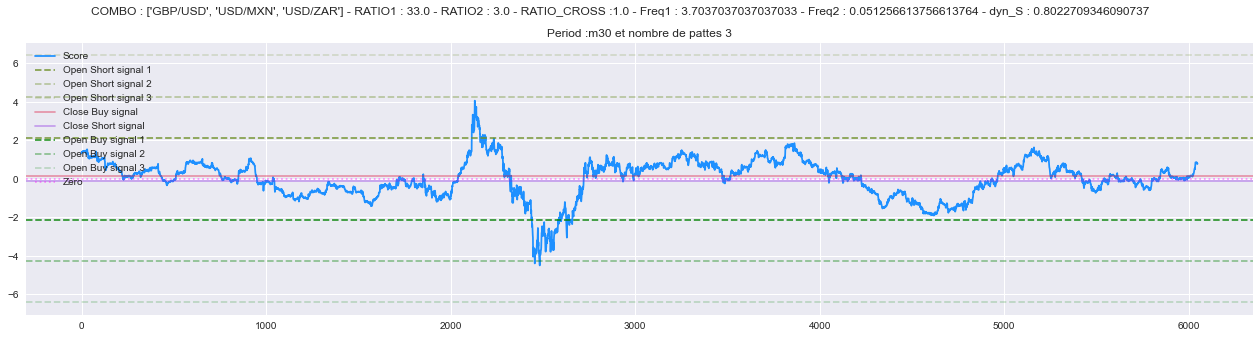

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)

Analyse du pack : ['NZD/USD', 'USD/NOK', 'USD/CAD'] 


Heure locale du début du train :  2020-07-07 22:22:46 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour NZD/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/CAD
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
USD/NOK  - coef :  3.3829767581586885
USD/CAD  - coef :  0.10191065044114
TICKERS :  ['NZD/USD', 'USD/NOK', 'USD/CAD']
COEF [3.38297676 0.10191065]
CSTE 0.20427736513574168
Dernière valeur du combo à  0.6354615053108177
Derniere valeur du residu 0.018953494689182282
Dernière valeur du Score 2.3928437101230817
Mean -1.61540387180909e-17
Std 0.007920907917637204
 Pour les TICKERS : ['NZD/USD', 'USD/NOK', 'USD/CAD'] , - Moyenne du spread : -1.61540387180909e-17  - Std Dev du spread :  0.007920907917637204
La déviation est de : 2.3928437101230817
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

T

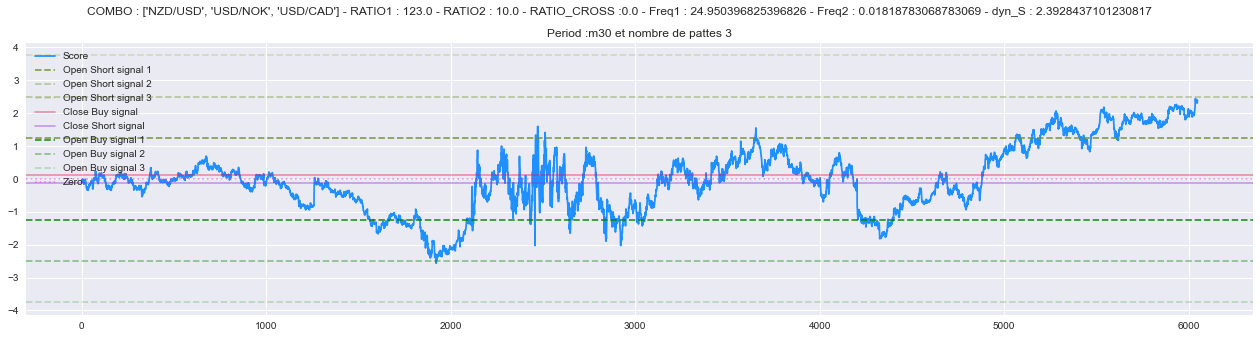

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)

Analyse du pack : ['USD/CAD', 'USD/MXN', 'USD/ZAR'] 


Heure locale du début du train :  2020-07-07 22:22:49 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/CAD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/ZAR
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
USD/MXN  - coef :  3.6022784379519375
USD/ZAR  - coef :  0.2824108800725649
TICKERS :  ['USD/CAD', 'USD/MXN', 'USD/ZAR']
COEF [3.60227844 0.28241088]
CSTE 0.5485815878556182
Dernière valeur du combo à  0.7229055402321454
Derniere valeur du residu 0.011880710447532028
Dernière valeur du Score 1.486686589518905
Mean 1.0397326738553053e-16
Std 0.007991402176686445
 Pour les TICKERS : ['USD/CAD', 'USD/MXN', 'USD/ZAR'] , - Moyenne du spread : 1.0397326738553053e-16  - Std Dev du spread :  0.007991402176686445
La déviation est de : 1.486686589518905
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de c

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo donsidéré comme   inadéquat 
 EUR/USD   a un kmo donsidéré comme   inadéquat 
SCORE > 70
Paire principale : USD/CHF
USD/TRY  - coef :  -0.38488220935445316
EUR/USD  - coef :  0.6674918678276396
TICKERS :  ['USD/CHF', 'USD/TRY', 'EUR/USD']
COEF [-0.38488221  0.66749187]
CSTE 0.3598156533511969
Dernière valeur du combo à  1.0558937493059246
Derniere valeur du residu 0.00502415686649571
Dernière valeur du Score 0.9204752053809224
Mean 4.3689331987564033e-17
Std 0.005458220750679002
 Pour les TICKERS : ['USD/CHF', 'USD/TRY', 'EUR/USD'] , - Moyenne du spread : 4.3689331987564033e-17  - Std Dev du spread :  0.005458220750679002
La déviation est de : 0.9204752053809224
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de co

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
 USD/CNH   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CNH
GBP/USD  - coef :  0.017455995315500943
USD/MXN  - coef :  0.13656367926515048
TICKERS :  ['USD/CNH', 'GBP/USD', 'USD/MXN']
COEF [0.017456   0.13656368]
CSTE 0.11363869972533236
Dernière valeur du combo à  0.1415113423059456
Derniere valeur du residu 0.0008895075423263066
Dernière valeur du Score 1.0836395965548902
Mean -1.8852497458499267e-17
Std 0.0008208518267090369
 Pour les TICKERS : ['USD/CNH', 'GBP/USD', 'USD/MXN'] , - Moyenne du spread : -1.8852497458499267e-17  - Std Dev du spread :  0.0008208518267090369
La déviation est de : 1.0836395965548902
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
 USD/JPY   a un kmo donsidéré comme   inadéquat 
 GBP/USD   a un kmo donsidéré comme   inadéquat 
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
SCORE < 50
GBP/USD  :  -0.023341404995447155
  


LIGNE 512


 
TICKERS :  ['USD/JPY', 'GBP/USD', 'USD/ZAR']
COEF [ 0.00227816 -0.0233414 ]
CSTE 0.007781652862355253
Dernière valeur du combo à  0.009278640158892168
Derniere valeur du residu 2.0095677970810924e-05
Dernière valeur du Score 0.19153437159090161
Mean -1.7140720060247023e-18
Std 0.00010491943458448811
 Pour les TICKERS : ['USD/JPY', 'GBP/USD', 'USD/ZAR'] , - Moyenne du spread : -1.7140720060247023e-18  - Std Dev du spread :  0.00010491943458448811
La déviation est de : 0.1915343715909016
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de Johasen   VALIDE! 

TE

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/ZAR  - coef :  0.9197076662778745
USD/TRY  - coef :  -0.04663626094122016
TICKERS :  ['USD/MXN', 'USD/ZAR', 'USD/TRY']
COEF [ 0.91970767 -0.04663626]
CSTE -0.001783989468991276
Dernière valeur du combo à  0.04498466771413905
Derniere valeur du residu -0.0011582728295558703
Dernière valeur du Score -1.0320561968703068
Mean 1.0289021251693126e-17
Std 0.0011222962790866655
 Pour les TICKERS : ['USD/MXN', 'USD/ZAR', 'USD/TRY'] , - Moyenne du spread : 1.0289021251693126e-17  - Std Dev du spread :  0.0011222962790866655
La déviation est de : 1.0320561968703068
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test d

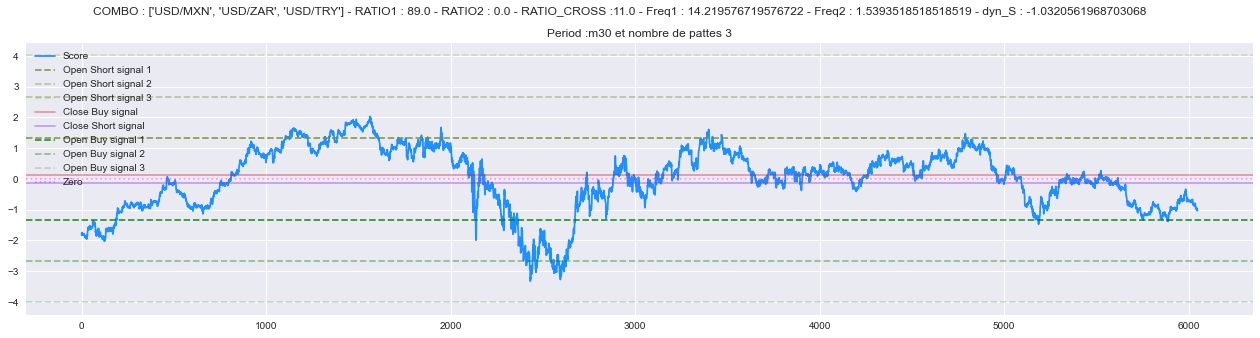

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)

Analyse du pack : ['USD/NOK', 'USD/CAD', 'USD/ZAR'] 


Heure locale du début du train :  2020-07-07 22:23:00 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour USD/ZAR
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo donsidéré comme   inadéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/CAD  - coef :  0.3251122830789659
USD/ZAR  - coef :  -0.15134749547841952
TICKERS :  ['USD/NOK', 'USD/CAD', 'USD/ZAR']
COEF [ 0.32511228 -0.1513475 ]
CSTE -0.12629732149187475
Dernière valeur du combo à  0.10377545057077328
Derniere valeur du residu 0.0015464658668182252
Dernière valeur du Score 1.188316675054238
Mean -1.0316556544962599e-17
Std 0.0013013920441263275
 Pour les TICKERS : ['USD/NOK', 'USD/CAD', 'USD/ZAR'] , - Moyenne du spread : -1.0316556544962599e-17  - Std Dev du spread :  0.0013013920441263275
La déviation est de : 1.188316675054238
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une ide

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
 USD/SEK   a un kmo donsidéré comme   inadéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.09317689802916108
NZD/USD  - coef :  0.056836053347246555
TICKERS :  ['USD/SEK', 'EUR/USD', 'NZD/USD']
COEF [0.0931769  0.05683605]
CSTE -0.03484586898088832
Dernière valeur du combo à  0.10734954325941165
Derniere valeur du residu 0.0005975777638838747
Dernière valeur du Score 0.5690826372257272
Mean 1.2776376077035531e-17
Std 0.0010500720366325852
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'NZD/USD'] , - Moyenne du spread : 1.2776376077035531e-17  - Std Dev du spread :  0.0010500720366325852
La déviation est de : 0.5690826372257272
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/TRY
USD/MXN  - coef :  -0.371998924149903
USD/ZAR  - coef :  1.9558636493349444
TICKERS :  ['USD/TRY', 'USD/MXN', 'USD/ZAR']
COEF [-0.37199892  1.95586365]
CSTE 0.05341494397905558
Dernière valeur du combo à  0.15103122004347314
Derniere valeur du residu -0.005224299026353213
Dernière valeur du Score -1.6482061252740021
Mean 2.6140171743819822e-17
Std 0.0031696879087163552
 Pour les TICKERS : ['USD/TRY', 'USD/MXN', 'USD/ZAR'] , - Moyenne du spread : 2.6140171743819822e-17  - Std Dev du spread :  0.0031696879087163552
La déviation est de : 1.6482061252740021
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/MXN  - coef :  0.7561538080597512
USD/TRY  - coef :  0.20159555496415077
TICKERS :  ['USD/ZAR', 'USD/MXN', 'USD/TRY']
COEF [0.75615381 0.20159555]
CSTE -0.005908691526627756
Dernière valeur du combo à  0.056624831018940606
Derniere valeur du residu 0.0016203579284523387
Dernière valeur du Score 1.5922940303999185
Mean -4.130293990420969e-18
Std 0.001017624821494417
 Pour les TICKERS : ['USD/ZAR', 'USD/MXN', 'USD/TRY'] , - Moyenne du spread : -4.130293990420969e-18  - Std Dev du spread :  0.001017624821494417
La déviation est de : 1.5922940303999185
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de coin

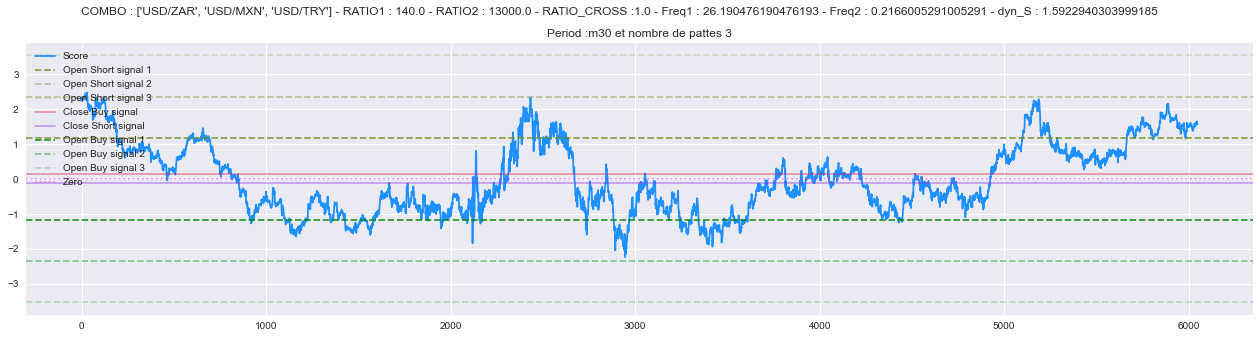

 Le scan avec 3 pattes et la timeframe m30 est non satisfaisante. 

 Nouveau scan avec 4 pattes et la timeframe m30 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/CAD
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  1.5180803686519824
USD/NOK  - coef :  1.5761735040854212
USD/CAD  - coef :  -1.0081708995755678
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/NOK', 'USD/CAD']
COEF [ 1.51808037  1.5761735  -1.0081709 ]
CSTE 0.283968539146202
Dernière valeur du combo à  0.7027988968555513
Derniere valeur du residu -0.008373896855551233
Dernière valeur du Score -0.8905513608130697
Mean -9.222487559055533e-17
Std 0.009403047621987582
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/NOK', 'USD/CAD'] , - Moyenne du spread : -9.222487559055533e-17  - Std Dev du spread :  0.009403047621987582
La déviation est de : 0.8905513608130696
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   VALIDE  e

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/TRY
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 USD/SEK   a un kmo donsidéré comme   inadéquat 
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo donsidéré comme   inadéquat 
SCORE > 70
Paire principale : EUR/USD
USD/SEK  - coef :  7.641470388192093
USD/ZAR  - coef :  -4.84006637022413
USD/TRY  - coef :  2.4479504904257117
TICKERS :  ['EUR/USD', 'USD/SEK', 'USD/ZAR', 'USD/TRY']
COEF [ 7.64147039 -4.84006637  2.44795049]
CSTE 0.22614329134991018
Dernière valeur du combo à  1.1261555148853641
Derniere valeur du residu 0.0009194851146359095
Dernière valeur du Score 0.12817882303708522
Mean -1.5713474025779332e-16
Std 0.0071734557460403385
 Pour les TICKERS : ['EUR/USD', 'USD/SEK', 'USD/ZAR', 'USD/TRY'] , - Moyenne du spread : -1.5713474025779332e-16  - Std Dev du spread :  0.0071734557460403385
La déviation est de : 0.12817882303708525
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :  

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/ZAR
Passage pour USD/TRY
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : GBP/USD
USD/MXN  - coef :  9.343143903279017
USD/ZAR  - coef :  -2.034491353735073
USD/TRY  - coef :  -0.438216503607217
TICKERS :  ['GBP/USD', 'USD/MXN', 'USD/ZAR', 'USD/TRY']
COEF [ 9.3431439  -2.03449135 -0.4382165 ]
CSTE 1.015832995374142
Dernière valeur du combo à  1.2427943961290655
Derniere valeur du residu 0.011075603870934536
Dernière valeur du Score 0.6732824790593376
Mean -2.661010741561883e-16
Std 0.01645015905717441
 Pour les TICKERS : ['GBP/USD', 'USD/MXN', 'USD/ZAR', 'USD/TRY'] , - Moyenne du spread : -2.661010741561883e-16  - Std Dev du spread :  0.01645015905717441
La déviation est de : 0.6732824790593376
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a 

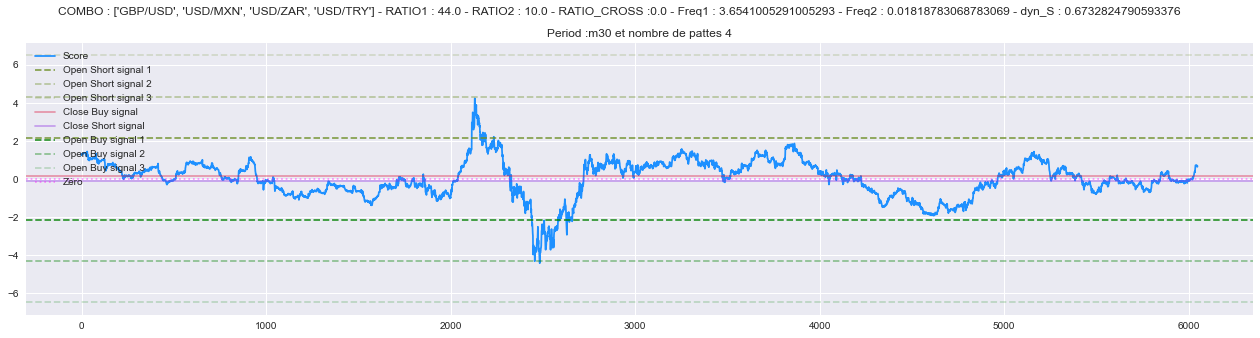

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)

Analyse du pack : ['NZD/USD', 'USD/NOK', 'USD/CAD', 'AUD/USD'] 


Heure locale du début du train :  2020-07-07 22:25:02 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour NZD/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/CAD
Passage pour AUD/USD
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
USD/NOK  - coef :  0.6394304868784102
USD/CAD  - coef :  0.4507734874538769
AUD/USD  - coef :  0.4087663257519645
TICKERS :  ['NZD/USD', 'USD/NOK', 'USD/CAD', 'AUD/USD']
COEF [0.63943049 0.45077349 0.40876633]
CSTE -0.03856026733644602
Dernière valeur du combo à  0.6438688903801679
Derniere valeur du residu 0.010631109619832046
Dernière valeur du Score 2.178812143245306
Mean 1.1087544756507847e-17
Std 0.004879314470864463
 Pour les TICKERS : ['NZD/USD', 'USD/NOK', 'USD/CAD', 'AUD/USD'] , - Moyenne du spread : 1.1087544756507847e-17  - Std Dev du spread :  0.004879314470864463
La déviation est de : 2.178812143245306
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a

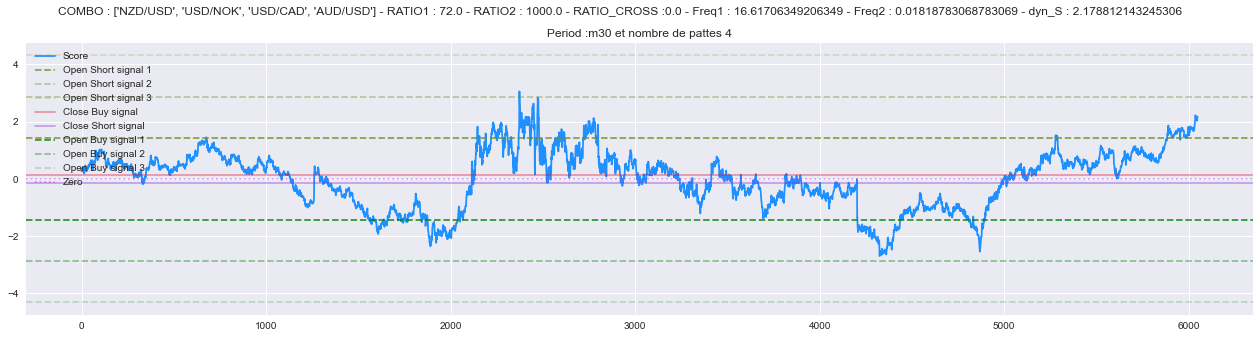

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)

Analyse du pack : ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:25:05 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/CAD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/ZAR
Passage pour USD/NOK
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
USD/MXN  - coef :  1.072066915597353
USD/ZAR  - coef :  0.16587197371076812
USD/NOK  - coef :  2.424669711271296
TICKERS :  ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK']
COEF [1.07206692 0.16587197 2.42466971]
CSTE 0.42371570687538124
Dernière valeur du combo à  0.7357422928129163
Derniere valeur du residu -0.0009668401912373836
Dernière valeur du Score -0.27804398122405993
Mean -9.215144814183674e-18
Std 0.0034772922865690535
 Pour les TICKERS : ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK'] , - Moyenne du spread : -9.215144814183674e-18  - Std Dev du spread :  0.0034772922865690535
La déviation est de : 0.27804398122406
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il

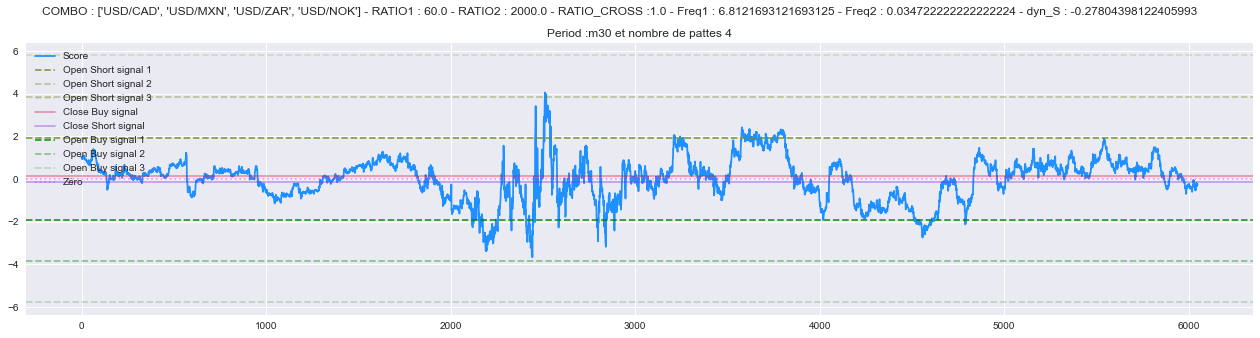

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)

Analyse du pack : ['USD/CHF', 'USD/TRY', 'EUR/USD', 'USD/MXN'] 


Heure locale du début du train :  2020-07-07 22:25:08 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour EUR/USD
Passage pour USD/MXN
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo donsidéré comme   inadéquat 
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 USD/MXN   a un kmo donsidéré comme   inadéquat 
SCORE > 70
Paire principale : USD/CHF
USD/TRY  - coef :  0.14758109767336244
EUR/USD  - coef :  0.7016755440613095
USD/MXN  - coef :  -1.1816417003858657
TICKERS :  ['USD/CHF', 'USD/TRY', 'EUR/USD', 'USD/MXN']
COEF [ 0.1475811   0.70167554 -1.1816417 ]
CSTE 0.2950340497904941
Dernière valeur du combo à  1.0556265843085124
Derniere valeur du residu 0.005296949627779268
Dernière valeur du Score 1.0728501804034567
Mean 1.51664395328258e-16
Std 0.004937268711449666
 Pour les TICKERS : ['USD/CHF', 'USD/TRY', 'EUR/USD', 'USD/MXN'] , - Moyenne du spread : 1.51664395328258e-16  - Std Dev du spread :  0.004937268711449666
La déviation est de : 1.0728501804034567
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Passage pour USD/MXN
Passage pour USD/ZAR
 USD/CNH   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CNH
GBP/USD  - coef :  0.024361436395794085
USD/MXN  - coef :  -0.35718496593865845
USD/ZAR  - coef :  0.4006497100634312
TICKERS :  ['USD/CNH', 'GBP/USD', 'USD/MXN', 'USD/ZAR']
COEF [ 0.02436144 -0.35718497  0.40064971]
CSTE 0.10373139640469822
Dernière valeur du combo à  0.14195751649786292
Derniere valeur du residu 0.0004459695394752883
Dernière valeur du Score 0.6939200545852409
Mean 1.8265077868750507e-17
Std 0.0006426814393508601
 Pour les TICKERS : ['USD/CNH', 'GBP/USD', 'USD/MXN', 'USD/ZAR'] , - Moyenne du spread : 1.8265077868750507e-17  - Std Dev du spread :  0.0006426814393508601
La déviation est de : 0.6939200545852409
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RET

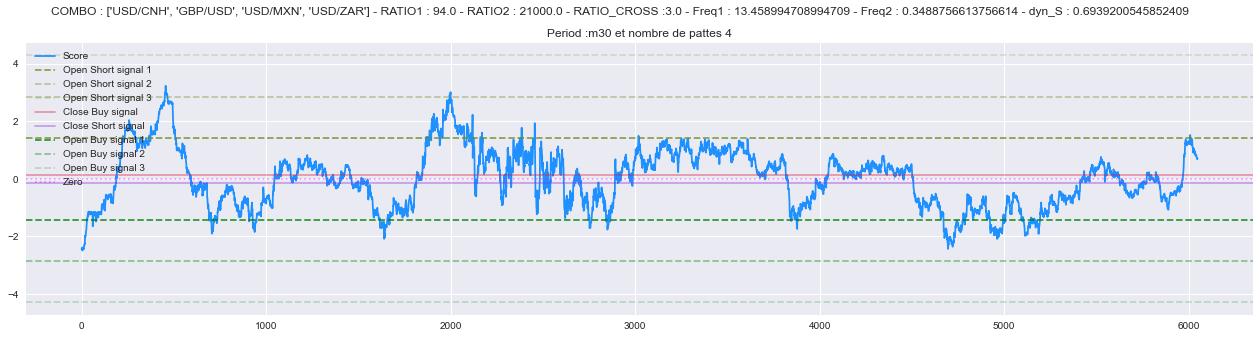

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)

Analyse du pack : ['USD/JPY', 'GBP/USD', 'USD/ZAR', 'USD/TRY'] 


Heure locale du début du train :  2020-07-07 22:25:14 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/JPY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour GBP/USD
Passage pour USD/ZAR
Passage pour USD/TRY
 USD/JPY   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE < 50
GBP/USD  :  -0.019159760845790512
USD/ZAR  :  -0.0023758062628944
  


LIGNE 512


 
TICKERS :  ['USD/JPY', 'GBP/USD', 'USD/ZAR', 'USD/TRY']
COEF [ 0.0022235  -0.01915976 -0.00237581]
CSTE 0.007964387952647773
Dernière valeur du combo à  0.00929036581836531
Derniere valeur du residu 8.975323314801623e-06
Dernière valeur du Score 0.08576548107440467
Mean -1.858632295689436e-19
Std 0.00010464960030965594
 Pour les TICKERS : ['USD/JPY', 'GBP/USD', 'USD/ZAR', 'USD/TRY'] , - Moyenne du spread : -1.858632295689436e-19  - Std Dev du spread :  0.00010464960030965594
La déviation est de : 0.08576548107440461
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically si

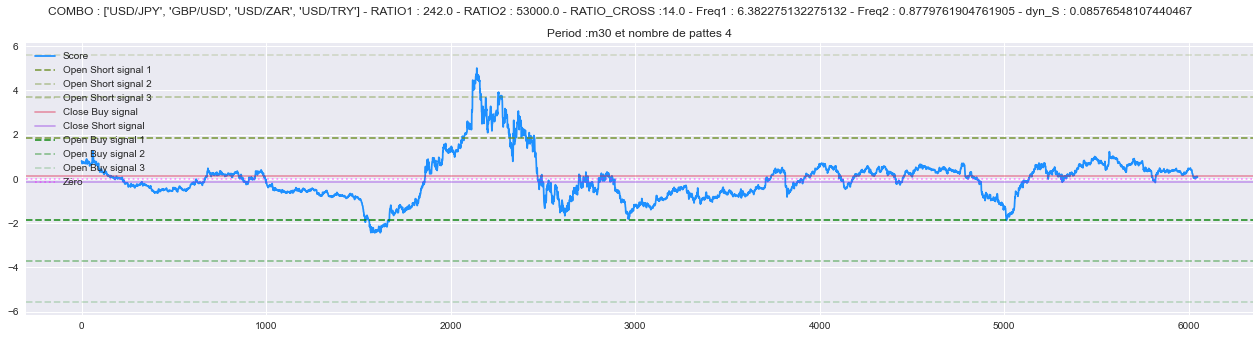

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)

Analyse du pack : ['USD/MXN', 'USD/ZAR', 'USD/TRY', 'USD/CAD'] 


Heure locale du début du train :  2020-07-07 22:25:17 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/MXN


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/TRY
Passage pour USD/CAD
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/ZAR  - coef :  0.3215314445066591
USD/TRY  - coef :  0.13366552385241112
USD/CAD  - coef :  0.09100002658317952
TICKERS :  ['USD/MXN', 'USD/ZAR', 'USD/TRY', 'USD/CAD']
COEF [0.32153144 0.13366552 0.09100003]
CSTE -0.06020141335295239
Dernière valeur du combo à  0.04487388031287979
Derniere valeur du residu -0.0010646694262908887
Dernière valeur du Score -1.106785025987084
Mean 6.424901762877063e-18
Std 0.0009619478049419507
 Pour les TICKERS : ['USD/MXN', 'USD/ZAR', 'USD/TRY', 'USD/CAD'] , - Moyenne du spread : 6.424901762877063e-18  - Std Dev du spread :  0.0009619478049419507
La déviation est de : 1.106785025987084
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et 

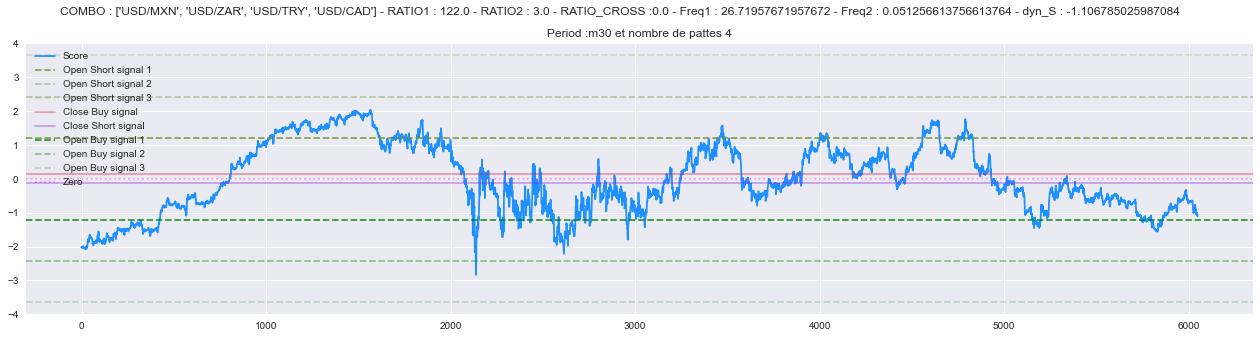

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)

Analyse du pack : ['USD/NOK', 'USD/CAD', 'USD/ZAR', 'USD/MXN'] 


Heure locale du début du train :  2020-07-07 22:25:21 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour USD/ZAR
Passage pour USD/MXN
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/CAD  - coef :  0.33433966426494416
USD/ZAR  - coef :  -0.046356961896490884
USD/MXN  - coef :  -0.16085684203326456
TICKERS :  ['USD/NOK', 'USD/CAD', 'USD/ZAR', 'USD/MXN']
COEF [ 0.33433966 -0.04635696 -0.16085684]
CSTE -0.13191447833548112
Dernière valeur du combo à  0.10400393031956912
Derniere valeur du residu 0.0013309107064554265
Dernière valeur du Score 1.0307184836205217
Mean 3.356552249548774e-17
Std 0.0012912455996524001
 Pour les TICKERS : ['USD/NOK', 'USD/CAD', 'USD/ZAR', 'USD/MXN'] , - Moyenne du spread : 3.356552249548774e-17  - Std Dev du spread :  0.0012912455996524001
La déviation est de : 1.0307184836205217
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALI

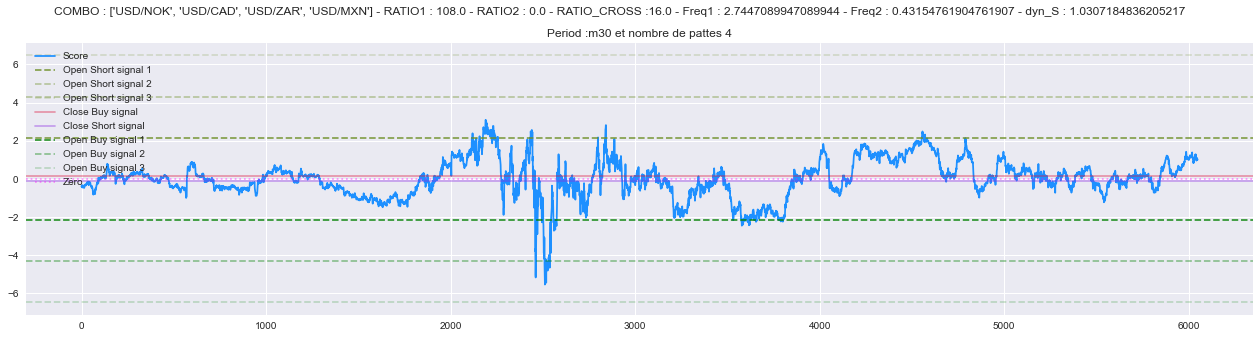

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD'] 


Heure locale du début du train :  2020-07-07 22:25:24 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/SEK
Passage pour EUR/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour AUD/USD
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo donsidéré comme   inadéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.08295257813365567
NZD/USD  - coef :  -0.022063994438700277
AUD/USD  - coef :  0.07657146900412361
TICKERS :  ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD']
COEF [ 0.08295258 -0.02206399  0.07657147]
CSTE -0.02456097722579237
Dernière valeur du combo à  0.10766505777725682
Derniere valeur du residu 0.0002852678009251236
Dernière valeur du Score 0.4427471677113211
Mean 8.086197790135275e-18
Std 0.0006443131017635671
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD'] , - Moyenne du spread : 8.086197790135275e-18  - Std Dev du spread :  0.0006443131017635671
La déviation est de : 0.4427471677113211
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/NOK
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/TRY
USD/MXN  - coef :  0.4069402928455528
USD/ZAR  - coef :  1.9917455927044323
USD/NOK  - coef :  -0.7464532016784613
TICKERS :  ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK']
COEF [ 0.40694029  1.99174559 -0.7464532 ]
CSTE 0.09185587064116499
Dernière valeur du combo à  0.1470264954280372
Derniere valeur du residu -0.001219468112548694
Dernière valeur du Score -0.5378747375634698
Mean 2.6507308987412798e-17
Std 0.0022671972252737036
 Pour les TICKERS : ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK'] , - Moyenne du spread : 2.6507308987412798e-17  - Std Dev du spread :  0.0022671972252737036
La déviation est de : 0.5378747375634698
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR 

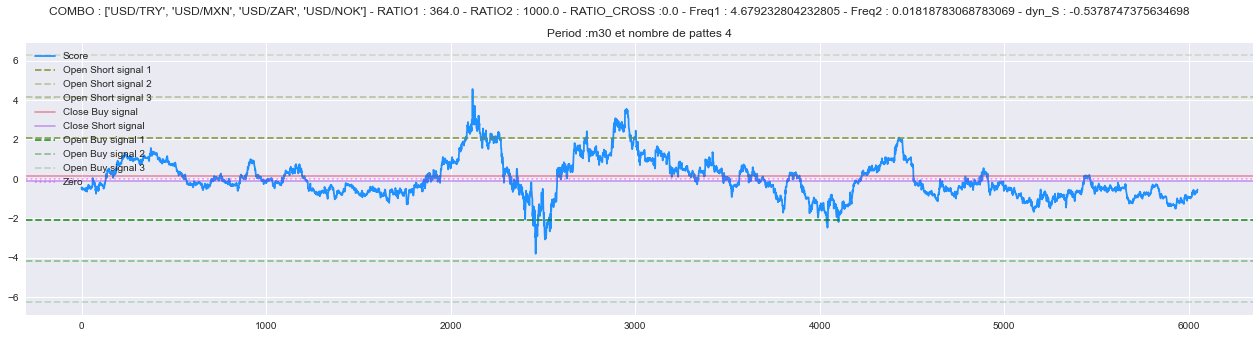

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)

Analyse du pack : ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD'] 


Heure locale du début du train :  2020-07-07 22:25:30 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/ZAR


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/TRY
Passage pour USD/CAD
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/MXN  - coef :  0.2353392501912869
USD/TRY  - coef :  0.29590080698332655
USD/CAD  - coef :  0.08889860236255956
TICKERS :  ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD']
COEF [0.23533925 0.29590081 0.0888986 ]
CSTE -0.06139538020618877
Dernière valeur du combo à  0.05737957447021038
Derniere valeur du residu 0.0008459446102922277
Dernière valeur du Score 1.0279096965927699
Mean -2.2762509102764453e-17
Std 0.000822975610694517
 Pour les TICKERS : ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD'] , - Moyenne du spread : -2.2762509102764453e-17  - Std Dev du spread :  0.000822975610694517
La déviation est de : 1.0279096965927699
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  e

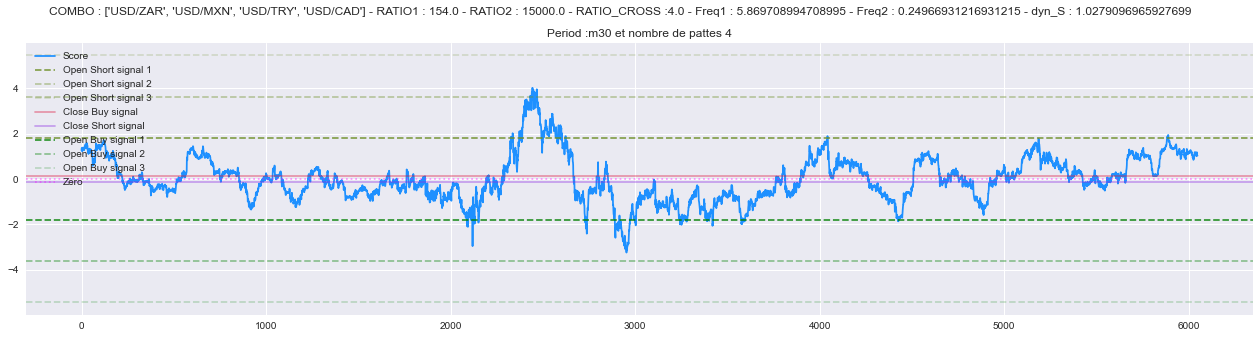

 Le scan avec 4 pattes et la timeframe m30 est non satisfaisante. 

 Nouveau scan avec 5 pattes et la timeframe m30 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour USD/NOK
Passage pour USD/CAD
Passage pour USD/MXN
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  0.9654215927593665
USD/NOK  - coef :  1.975341410963004
USD/CAD  - coef :  0.25044678791709263
USD/MXN  - coef :  -3.5685899444839877
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/NOK', 'USD/CAD', 'USD/MXN']
COEF [ 0.96542159  1.97534141  0.25044679 -3.56858994]
CSTE -0.16725892753903548
Dernière valeur du combo à  0.7005399108988953
Derniere valeur du residu -0.0061049108988953105
Dernière valeur du Score -0.750645228696835
Mean 6.725954302623303e-17
Std 0.008132884437957287
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/NOK', 'USD/CAD', 'USD/MXN'] , - Moyenne du spread : 6.725954302623303e-17  - Std Dev du spread :  0.00

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/TRY
Passage pour USD/MXN
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 USD/SEK   a un kmo donsidéré comme   inadéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo donsidéré comme   inadéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : EUR/USD
USD/SEK  - coef :  7.517384323431594
USD/ZAR  - coef :  -1.1082133762814526
USD/TRY  - coef :  2.1883696334419205
USD/MXN  - coef :  -3.8900939534821264
TICKERS :  ['EUR/USD', 'USD/SEK', 'USD/ZAR', 'USD/TRY', 'USD/MXN']
COEF [ 7.51738432 -1.10821338  2.18836963 -3.89009395]
CSTE 0.23480046825136514
Dernière valeur du combo à  1.1304510807580508
Derniere valeur du residu -0.0033010807580509116
Dernière valeur du Score -0.5795300640882706
Mean 1.219629923215863e-16
Std 0.005696133751480807
 Pour les TICKERS : ['EUR/USD', 'USD/SEK', 'USD/ZAR', 'USD/TRY', 'USD/MXN'] , - Moyenne du spread : 1.219629923215863e-16  - Std Dev du spread :  0.00569613375148080

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/TRY
Passage pour USD/CNH
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : GBP/USD
USD/MXN  - coef :  10.664654043245045
USD/ZAR  - coef :  -4.720200112635786
USD/TRY  - coef :  -1.2446513480539512
USD/CNH  - coef :  12.910105055620152
TICKERS :  ['GBP/USD', 'USD/MXN', 'USD/ZAR', 'USD/TRY', 'USD/CNH']
COEF [10.66465404 -4.72020011 -1.24465135 12.91010506]
CSTE -0.5924009823360894
Dernière valeur du combo à  1.256669155385999
Derniere valeur du residu -0.0028391553859989926
Dernière valeur du Score -0.2108334352539223
Mean 1.5786901474497926e-16
Std 0.013466343147042809
 Pour les TICKERS : ['GBP/USD', 'USD/MXN', 'USD/ZAR', 'USD/TRY', 'USD/CNH'] , - Moyenne du spread : 1.5786901474497926e-16  - Std Dev du spread :  0.013466343147042809
La 

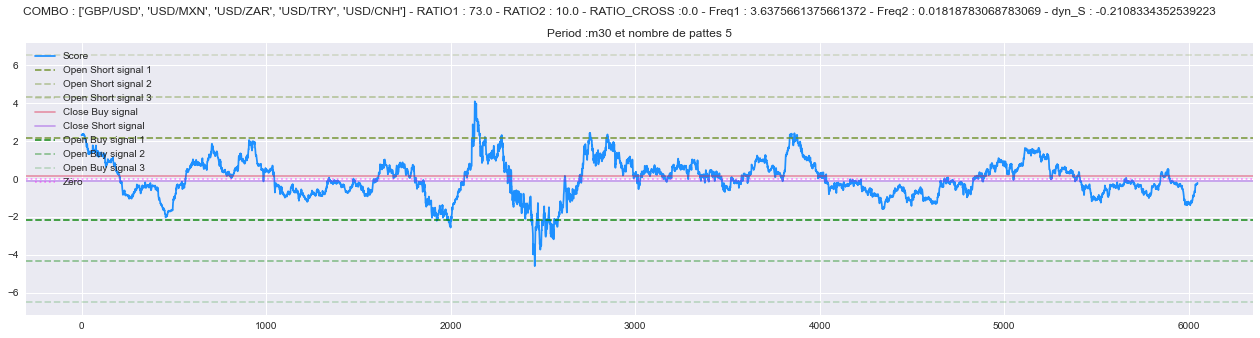

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)
base_pair4 :  (9546, 1)

Analyse du pack : ['NZD/USD', 'USD/NOK', 'USD/CAD', 'AUD/USD', 'USD/MXN'] 


Heure locale du début du train :  2020-07-07 22:27:26 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour NZD/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/CAD
Passage pour AUD/USD
Passage pour USD/MXN
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
USD/NOK  - coef :  0.7999241994169514
USD/CAD  - coef :  0.6675425558024536
AUD/USD  - coef :  0.3336666419986971
USD/MXN  - coef :  -0.833572943561541
TICKERS :  ['NZD/USD', 'USD/NOK', 'USD/CAD', 'AUD/USD', 'USD/MXN']
COEF [ 0.7999242   0.66754256  0.33366664 -0.83357294]
CSTE -0.12572599925051886
Dernière valeur du combo à  0.6444226324914119
Derniere valeur du residu 0.01007736750858812
Dernière valeur du Score 2.1076796597617187
Mean -9.141717365465078e-17
Std 0.004781261451148367
 Pour les TICKERS : ['NZD/USD', 'USD/NOK', 'USD/CAD', 'AUD/USD', 'USD/MXN'] , - Moyenne du spread : -9.141717365465078e-17  - Std Dev du spread :  0.0047

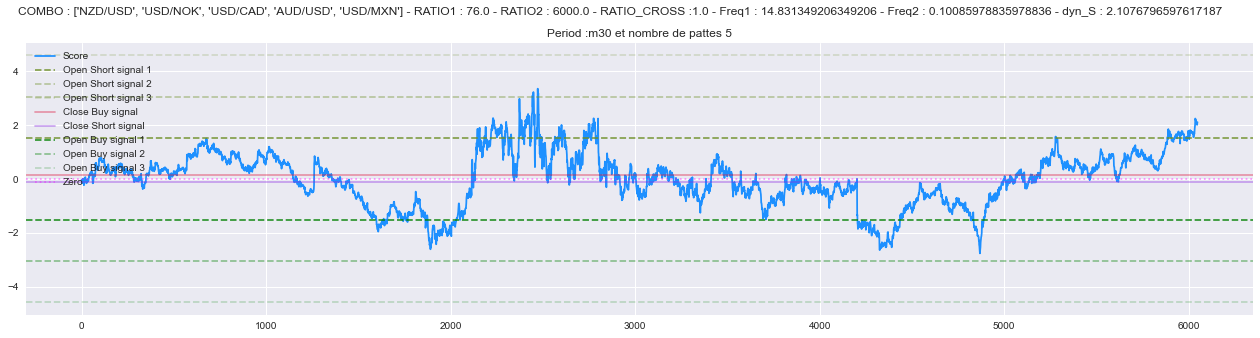

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)
base_pair4 :  (9546, 1)

Analyse du pack : ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'USD/TRY'] 


Heure locale du début du train :  2020-07-07 22:27:30 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/CAD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/ZAR
Passage pour USD/NOK
Passage pour USD/TRY
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
USD/MXN  - coef :  1.2780189977629193
USD/ZAR  - coef :  1.1741218249142158
USD/NOK  - coef :  2.0468309488155416
USD/TRY  - coef :  -0.5062065061947714
TICKERS :  ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'USD/TRY']
COEF [ 1.278019    1.17412182  2.04683095 -0.50620651]
CSTE 0.4702127642574001
Dernière valeur du combo à  0.7363956731087558
Derniere valeur du residu -0.0013663821915126384
Dernière valeur du Score -0.4162713626046621
Mean -3.506160676312912e-17
Std 0.00328243139994781
 Pour les TICKERS : ['USD/CAD', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'USD/TRY'] , - Moyenne du spread : -3.506160676312912e-17  - Std Dev du spread :  0.00

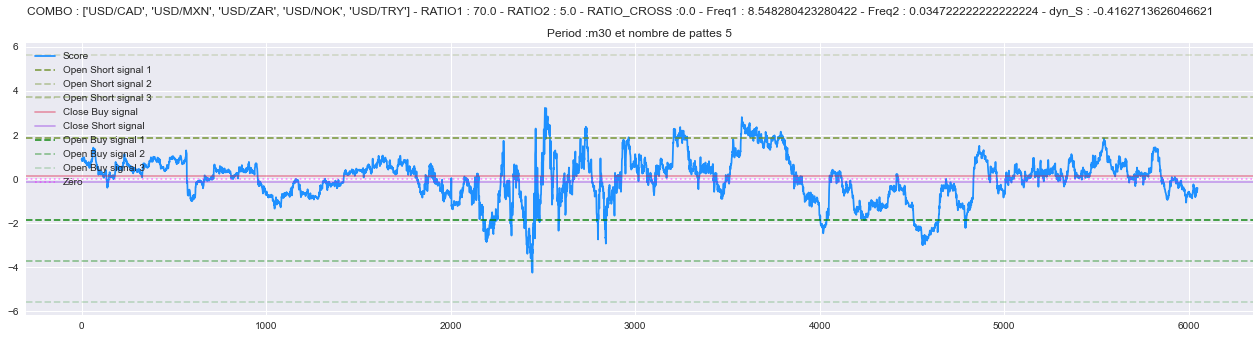

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)
base_pair4 :  (9546, 1)

Analyse du pack : ['USD/CHF', 'USD/TRY', 'EUR/USD', 'USD/MXN', 'USD/ZAR'] 


Heure locale du début du train :  2020-07-07 22:27:33 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour EUR/USD
Passage pour USD/MXN
Passage pour USD/ZAR
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
SCORE > 70
Paire principale : USD/CHF
USD/TRY  - coef :  0.6719680644691113
EUR/USD  - coef :  0.774509513378797
USD/MXN  - coef :  0.4086580413022622
USD/ZAR  - coef :  -2.310215242008747
TICKERS :  ['USD/CHF', 'USD/TRY', 'EUR/USD', 'USD/MXN', 'USD/ZAR']
COEF [ 0.67196806  0.77450951  0.40865804 -2.31021524]
CSTE 0.1993162744197272
Dernière valeur du combo à  1.0536486208943527
Derniere valeur du residu 0.007381851900825964
Dernière valeur du Score 1.6352286534683083
Mean 8.939791881488942e-17
Std 0.004514262812829887
 Pour les TICKERS : ['USD/CHF', 'USD/TRY', 'EUR/USD', 'USD/MXN', 'USD/ZAR'] , - Moyenne du spread : 8.939791881488942e-17  - Std Dev du spread :  0.00

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour GBP/USD
Passage pour USD/MXN
Passage pour USD/ZAR
Passage pour USD/TRY
 USD/CNH   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CNH
GBP/USD  - coef :  0.02555138704870887
USD/MXN  - coef :  -0.34109560971503433
USD/ZAR  - coef :  0.2600192548212691
USD/TRY  - coef :  0.07366164339262285
TICKERS :  ['USD/CNH', 'GBP/USD', 'USD/MXN', 'USD/ZAR', 'USD/TRY']
COEF [ 0.02555139 -0.34109561  0.26001925  0.07366164]
CSTE 0.0986158125794476
Dernière valeur du combo à  0.14159751797075285
Derniere valeur du residu 0.0008018110436088244
Dernière valeur du Score 1.3383817456335103
Mean -2.3161770855171812e-17
Std 0.0005990899429290392
 Pour les TICKERS : ['USD/CNH', 'GBP/USD', 'USD/MXN', 'USD/ZAR', 'USD/TRY'] , - Moyenne du spread : -2.3161770855171812e-17  - Std Dev du spread :

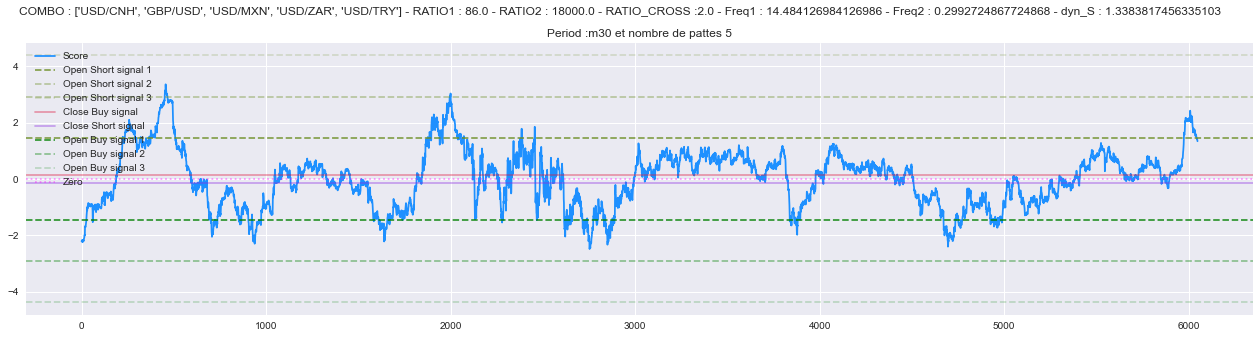

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)
base_pair4 :  (9546, 1)

Analyse du pack : ['USD/JPY', 'GBP/USD', 'USD/ZAR', 'USD/TRY', 'USD/MXN'] 


Heure locale du début du train :  2020-07-07 22:27:40 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/JPY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour GBP/USD
Passage pour USD/ZAR
Passage pour USD/TRY
Passage pour USD/MXN
 USD/JPY   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE < 50
GBP/USD  :  0.009429915248554244
USD/ZAR  :  -0.003157944440632878
USD/TRY  :  -0.039879566484649354
  


LIGNE 512


 
TICKERS :  ['USD/JPY', 'GBP/USD', 'USD/ZAR', 'USD/TRY', 'USD/MXN']
COEF [ 0.0034567   0.00942992 -0.00315794 -0.03987957]
CSTE 0.006661067902862533
Dernière valeur du combo à  0.009337461273861088
Derniere valeur du residu -3.686603576585033e-05
Dernière valeur du Score -0.3776987214216391
Mean 7.813139465213e-19
Std 9.760699116769364e-05
 Pour les TICKERS : ['USD/JPY', 'GBP/USD', 'USD/ZAR', 'USD/TRY', 'USD/MXN'] , - Moyenne du spread : 7.813139465213e-19  - Std Dev du spread :  9.760699116769364e-05
La déviation est de : 0.3776987214216392
Le 

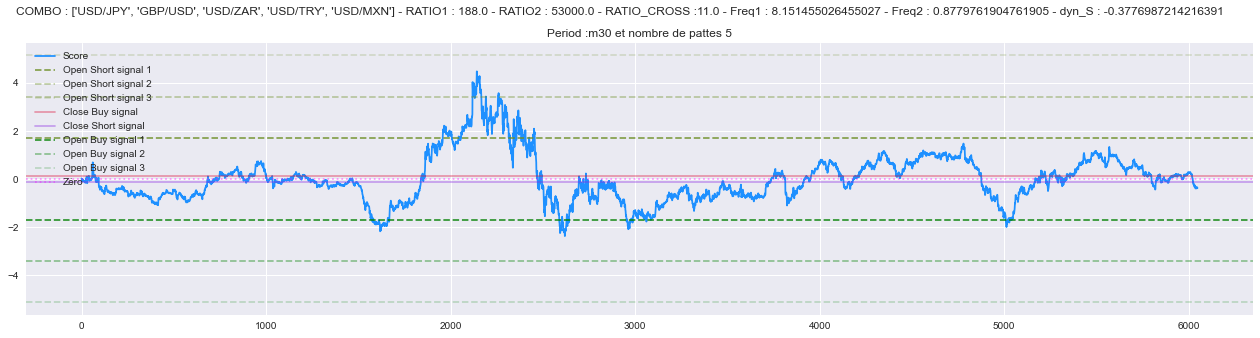

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)
base_pair4 :  (9546, 1)

Analyse du pack : ['USD/MXN', 'USD/ZAR', 'USD/TRY', 'USD/CAD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:27:44 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/MXN


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/TRY
Passage pour USD/CAD
Passage pour USD/NOK
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/ZAR  - coef :  0.3265054177169599
USD/TRY  - coef :  0.12799819683083677
USD/CAD  - coef :  0.10906076077807716
USD/NOK  - coef :  -0.05994316702773112
TICKERS :  ['USD/MXN', 'USD/ZAR', 'USD/TRY', 'USD/CAD', 'USD/NOK']
COEF [ 0.32650542  0.1279982   0.10906076 -0.05994317]
CSTE -0.06669947427919448
Dernière valeur du combo à  0.04482392471715635
Derniere valeur du residu -0.001031980245341936
Dernière valeur du Score -1.0762424524510723
Mean 7.012321352625824e-18
Std 0.0009588733867463368
 Pour les TICKERS : ['USD/MXN', 'USD/ZAR', 'USD/TRY', 'USD/CAD', 'USD/NOK'] , - Moyenne du spread : 7.012321352625824e-18  - Std Dev du spread : 

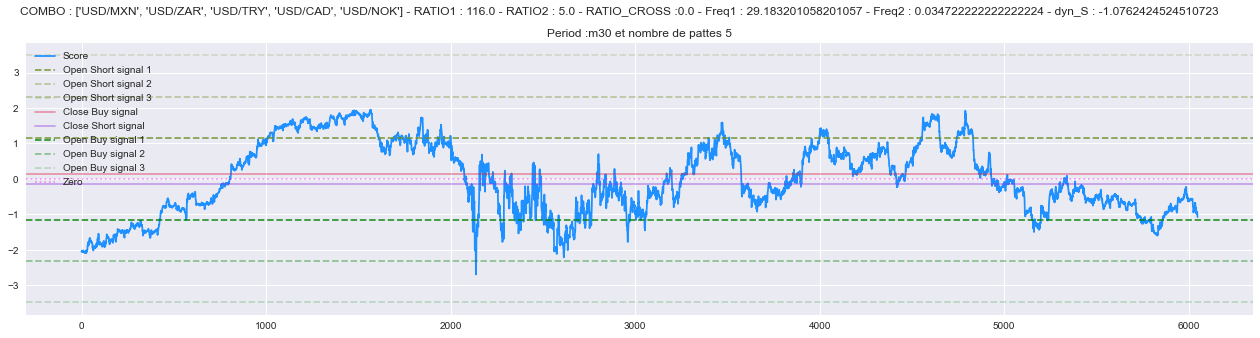

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)
base_pair4 :  (9546, 1)

Analyse du pack : ['USD/NOK', 'USD/CAD', 'USD/ZAR', 'USD/MXN', 'USD/TRY'] 


Heure locale du début du train :  2020-07-07 22:27:48 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour USD/ZAR
Passage pour USD/MXN
Passage pour USD/TRY
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/CAD  - coef :  0.31102349338444074
USD/ZAR  - coef :  0.11730381561933495
USD/MXN  - coef :  -0.1067381549487265
USD/TRY  - coef :  -0.08031132422555419
TICKERS :  ['USD/NOK', 'USD/CAD', 'USD/ZAR', 'USD/MXN', 'USD/TRY']
COEF [ 0.31102349  0.11730382 -0.10673815 -0.08031132]
CSTE -0.11483386485274406
Dernière valeur du combo à  0.10422421692364688
Derniere valeur du residu 0.0011348731952508517
Dernière valeur du Score 0.886943734218543
Mean 2.4781763942525817e-17
Std 0.0012795323440113443
 Pour les TICKERS : ['USD/NOK', 'USD/CAD', 'USD/ZAR', 'USD/MXN', 'USD/TRY'] , - Moyenne du spread : 2.4781763942525817e-17  - Std Dev du spread :

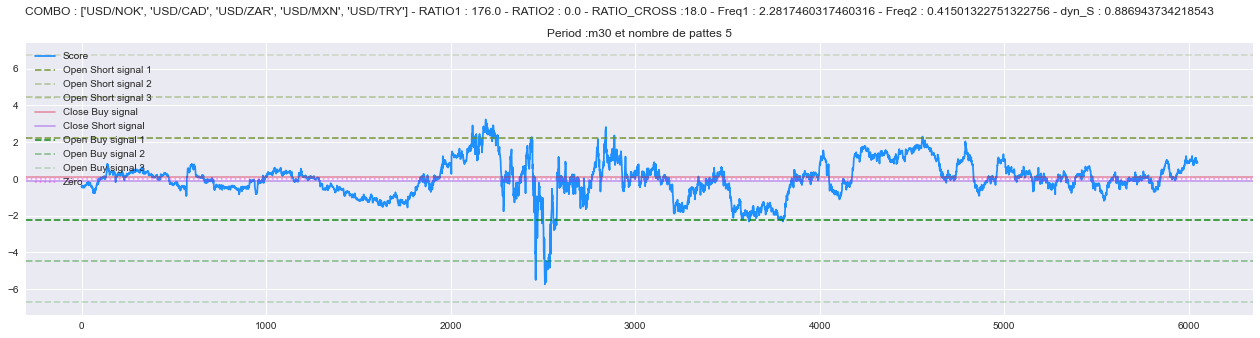

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)
base_pair4 :  (9546, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD', 'GBP/USD'] 


Heure locale du début du train :  2020-07-07 22:27:51 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/SEK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour NZD/USD
Passage pour AUD/USD
Passage pour GBP/USD
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.08042567761794625
NZD/USD  - coef :  -0.011377975734123875
AUD/USD  - coef :  0.07280195337984512
GBP/USD  - coef :  -0.00475356038499344
TICKERS :  ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD', 'GBP/USD']
COEF [ 0.08042568 -0.01137798  0.07280195 -0.00475356]
CSTE -0.020002009694167572
Dernière valeur du combo à  0.10779897559273285
Derniere valeur du residu 0.0001456401838045296
Dernière valeur du Score 0.22807417528561408
Mean -2.040365231267959e-17
Std 0.0006385649915084285
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'AUD/USD', 'GBP/USD'] , - Moyenne du spread : -2.040365231267959e-17  - Std Dev du s

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/NOK
Passage pour USD/CAD
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/TRY
USD/MXN  - coef :  0.6376328008812754
USD/ZAR  - coef :  2.0274413119641994
USD/NOK  - coef :  -0.22467956705329328
USD/CAD  - coef :  -0.21519180788584613
TICKERS :  ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'USD/CAD']
COEF [ 0.6376328   2.02744131 -0.22467957 -0.21519181]
CSTE 0.1830358210642425
Dernière valeur du combo à  0.1471772558626338
Derniere valeur du residu -0.001370972632470574
Dernière valeur du Score -0.6405958506331149
Mean -1.1014117307789251e-17
Std 0.0021401522209605335
 Pour les TICKERS : ['USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/NOK', 'USD/CAD'] , - Moyenne du spread : -1.1014117307789251e-17  - Std Dev du spread :  0.00214015222096053

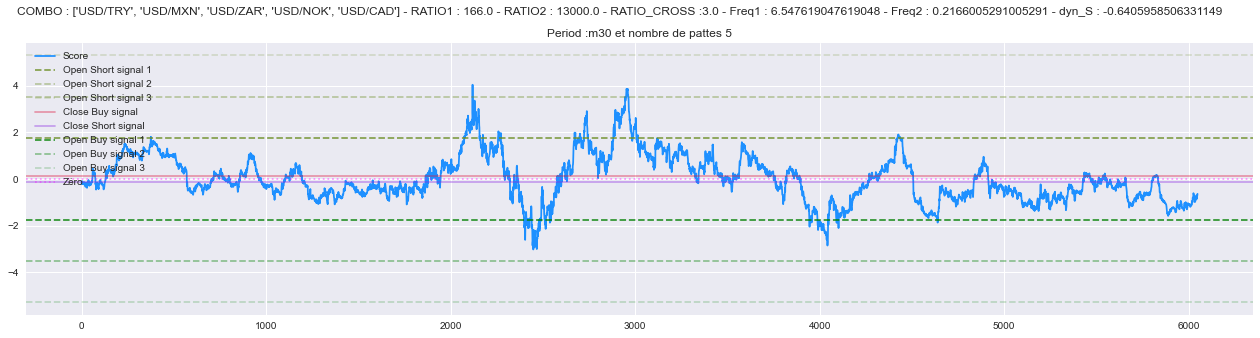

base_pair0 [PAIRE PRINCIPALE]:  (9546, 1)
base_pair1 :  (9546, 1)
base_pair2 :  (9546, 1)
base_pair3 :  (9546, 1)
base_pair4 :  (9546, 1)

Analyse du pack : ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:27:58 

 
 
|||| TIME_FRAME <---> debut : 2020-01-06 17:30:00  <---> split :  2020-07-07 20:00:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/ZAR


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/TRY
Passage pour USD/CAD
Passage pour USD/NOK
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/MXN  - coef :  0.23915231216939567
USD/TRY  - coef :  0.298102546220003
USD/CAD  - coef :  0.0733885938023911
USD/NOK  - coef :  0.048252111677435296
TICKERS :  ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD', 'USD/NOK']
COEF [0.23915231 0.29810255 0.07338859 0.04825211]
CSTE -0.05550739182972238
Dernière valeur du combo à  0.057457341877527546
Derniere valeur du residu 0.0007749584147986044
Dernière valeur du Score 0.944332718894759
Mean -5.511647869439538e-18
Std 0.0008206412838322666
 Pour les TICKERS : ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD', 'USD/NOK'] , - Moyenne du spread : -5.511647869439538e-18  - Std Dev du spread :  0.00

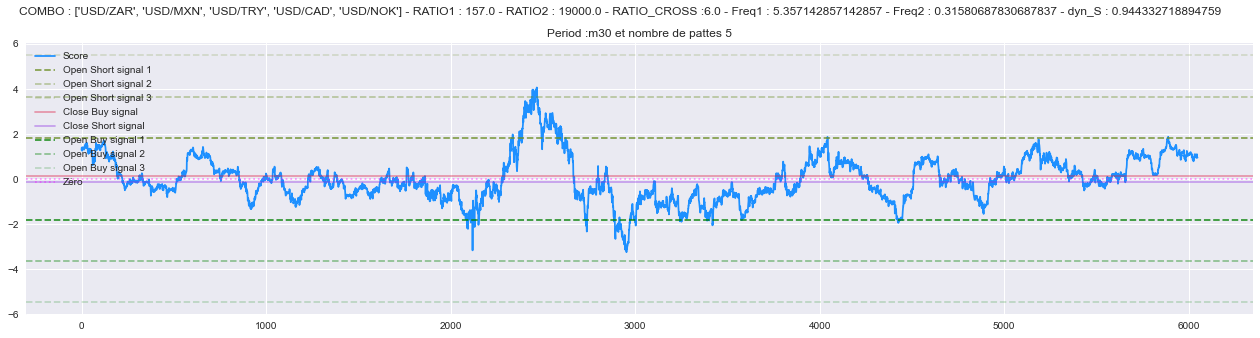

 Le scan avec 5 pattes et la timeframe m30 est non satisfaisante. 

 Nouveau scan avec 3 pattes et la timeframe m15 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  0.5129753352141584
USD/SEK  - coef :  4.401621733365099
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/SEK']
COEF [0.51297534 4.40162173]
CSTE -0.1137316047923127
Dernière valeur du combo à  0.6972011078444909
Derniere valeur du residu -0.0026861078444908593
Dernière valeur du Score -0.6013073719902616
Mean -7.212411150383995e-17
Std 0.004467112777280718
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/SEK'] , - Moyenne du spread : -7.212411150383995e-17  - Std Dev du spread :  0.004467112777280718
La déviation est de : 0.6013073719902616
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiég

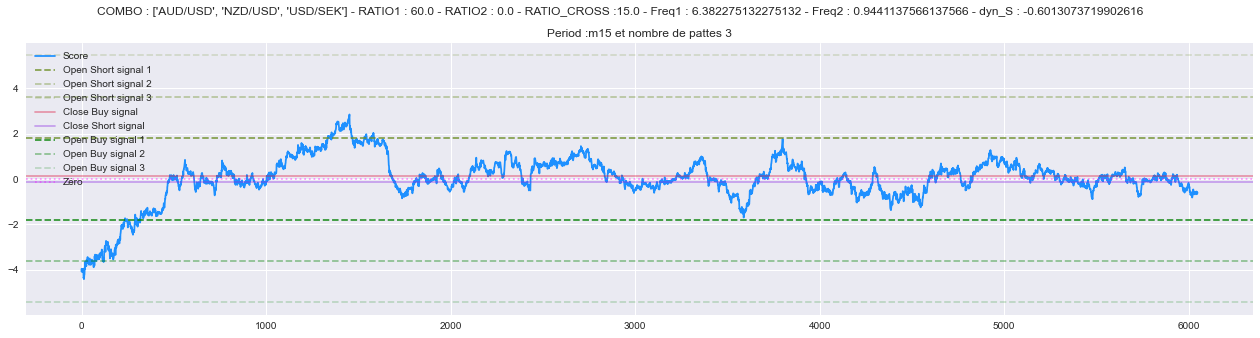

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)

Analyse du pack : ['EUR/USD', 'USD/CHF', 'USD/SEK'] 


Heure locale du début du train :  2020-07-07 22:29:58 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:30:00  <---> split :  2020-07-07 20:15:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour EUR/USD
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : EUR/USD
USD/CHF  - coef :  0.7885446258758146
USD/SEK  - coef :  3.2333014343451363
TICKERS :  ['EUR/USD', 'USD/CHF', 'USD/SEK']
COEF [0.78854463 3.23330143]
CSTE -0.05188830707248604
Dernière valeur du combo à  1.1338248829518955
Derniere valeur du residu -0.006584882951895521
Dernière valeur du Score -1.5692897365175307
Mean 8.370729153919831e-17
Std 0.004196091262604167
 Pour les TICKERS : ['EUR/USD', 'USD/CHF', 'USD/SEK'] , - Moyenne du spread : 8.370729153919831e-17  - Std Dev du spread :  0.004196091262604167
La déviation est de : 1.5692897365175307
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
 GBP/USD   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo donsidéré comme   inadéquat 
 USD/MXN   a un kmo donsidéré comme   inadéquat 
SCORE < 50
USD/TRY  :  4.232061712811341
  


LIGNE 512


 
TICKERS :  ['GBP/USD', 'USD/TRY', 'USD/MXN']
COEF [-0.87676101  4.23206171]
CSTE 1.1873271103965921
Dernière valeur du combo à  1.2448628031938984
Derniere valeur du residu 0.009002196806101592
Dernière valeur du Score 0.7263017919296036
Mean -1.4685489743719001e-18
Std 0.012394567803811953
 Pour les TICKERS : ['GBP/USD', 'USD/TRY', 'USD/MXN'] , - Moyenne du spread : -1.4685489743719001e-18  - Std Dev du spread :  0.012394567803811953
La déviation est de : 0.7263017919296036
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de coin

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
USD/CAD  - coef :  1.3365492659773377
USD/NOK  - coef :  0.8066796063522899
TICKERS :  ['NZD/USD', 'USD/CAD', 'USD/NOK']
COEF [1.33654927 0.80667961]
CSTE -0.42640204300364415
Dernière valeur du combo à  0.6410291823108905
Derniere valeur du residu 0.01354081768910953
Dernière valeur du Score 2.6191876935752094
Mean 1.4946157186670015e-16
Std 0.005169853891084098
 Pour les TICKERS : ['NZD/USD', 'USD/CAD', 'USD/NOK'] , - Moyenne du spread : 1.4946157186670015e-16  - Std Dev du spread :  0.005169853891084098
La déviation est de : 2.6191876935752094
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity ma

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
USD/NOK  - coef :  1.289728045220565
NZD/USD  - coef :  0.3451521080683155
TICKERS :  ['USD/CAD', 'USD/NOK', 'NZD/USD']
COEF [1.28972805 0.34515211]
CSTE 0.3792426567743272
Dernière valeur du combo à  0.7410785042994352
Derniere valeur du residu -0.006033004983027501
Dernière valeur du Score -2.2963740758766167
Mean -1.467814699884714e-16
Std 0.002627187376135275
 Pour les TICKERS : ['USD/CAD', 'USD/NOK', 'NZD/USD'] , - Moyenne du spread : -1.467814699884714e-16  - Std Dev du spread :  0.002627187376135275
La déviation est de : 2.2963740758766167
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégra

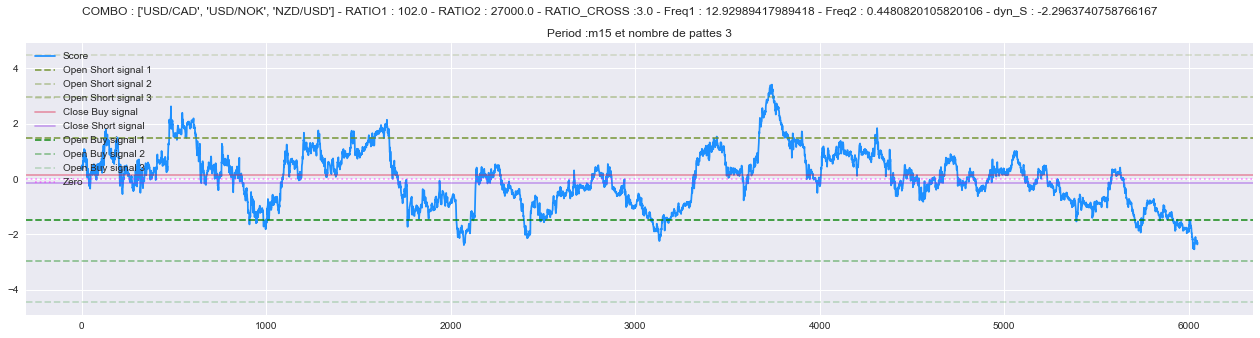

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)

Analyse du pack : ['USD/CHF', 'EUR/USD', 'USD/SEK'] 


Heure locale du début du train :  2020-07-07 22:30:08 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:30:00  <---> split :  2020-07-07 20:15:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour USD/SEK
 USD/CHF   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CHF
EUR/USD  - coef :  0.7665591057701059
USD/SEK  - coef :  -1.3036401904846964
TICKERS :  ['USD/CHF', 'EUR/USD', 'USD/SEK']
COEF [ 0.76655911 -1.30364019]
CSTE 0.32892123360785275
Dernière valeur du combo à  1.0522895446608875
Derniere valeur du residu 0.008752186110383642
Dernière valeur du Score 2.1154946605561498
Mean -2.2589954598275756e-16
Std 0.004137181848562536
 Pour les TICKERS : ['USD/CHF', 'EUR/USD', 'USD/SEK'] , - Moyenne du spread : -2.2589954598275756e-16  - Std Dev du spread :  0.004137181848562536
La déviation est de : 2.1154946605561498
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la ma

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
 USD/CNH   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo donsidéré comme   inadéquat 
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
SCORE < 50
USD/TRY  :  0.06608374140174976
  


LIGNE 512


 
TICKERS :  ['USD/CNH', 'USD/TRY', 'USD/ZAR']
COEF [-0.00873389  0.06608374]
CSTE 0.13854857563357215
Dernière valeur du combo à  0.14112313525581233
Derniere valeur du residu 0.0012761937585493432
Dernière valeur du Score 2.044035060131355
Mean -1.8338505317469103e-17
Std 0.0006243502293289188
 Pour les TICKERS : ['USD/CNH', 'USD/TRY', 'USD/ZAR'] , - Moyenne du spread : -1.8338505317469103e-17  - Std Dev du spread :  0.0006243502293289188
La déviation est de : 2.044035060131355
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de c

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
 USD/JPY   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo donsidéré comme   inadéquat 
 USD/CHF   a un kmo donsidéré comme   inadéquat 
SCORE > 50
USD/TRY  :  0.001885769838967876
TICKERS :  ['USD/JPY', 'USD/TRY', 'USD/CHF']
COEF [-0.0206553   0.00188577]
CSTE 0.010346380550946804
Dernière valeur du combo à  0.009335581694948452
Derniere valeur du residu -3.520270450459162e-05
Dernière valeur du Score -0.8783336888211454
Mean 1.6004889212881257e-19
Std 4.007896423947834e-05
 Pour les TICKERS : ['USD/JPY', 'USD/TRY', 'USD/CHF'] , - Moyenne du spread : 1.6004889212881257e-19  - Std Dev du spread :  4.007896423947834e-05
La déviation est de : 0.8783336888211454
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de Johasen   VALIDE! 

TEST DU FULL STOP - et sto

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/ZAR  - coef :  0.6922686526890546
USD/CAD  - coef :  0.008688590839117147
TICKERS :  ['USD/MXN', 'USD/ZAR', 'USD/CAD']
COEF [0.69226865 0.00868859]
CSTE -0.001985949835686042
Dernière valeur du combo à  0.044710960560102
Derniere valeur du residu -0.0009088497363814035
Dernière valeur du Score -1.5455691181212896
Mean 1.0555195753298032e-19
Std 0.0005880356470153547
 Pour les TICKERS : ['USD/MXN', 'USD/ZAR', 'USD/CAD'] , - Moyenne du spread : 1.0555195753298032e-19  - Std Dev du spread :  0.0005880356470153547
La déviation est de : 1.5455691181212896
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de co

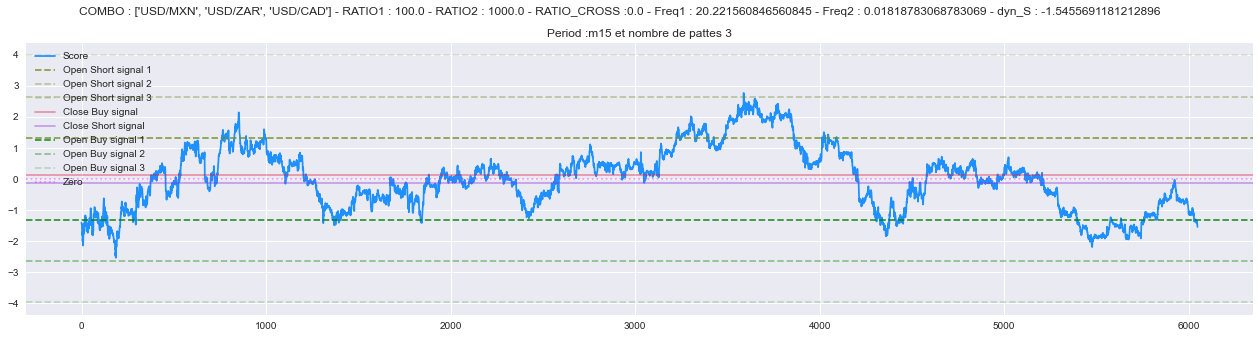

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)

Analyse du pack : ['USD/NOK', 'USD/CAD', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:30:18 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:30:00  <---> split :  2020-07-07 20:15:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour NZD/USD
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/CAD  - coef :  0.2513514783323197
NZD/USD  - coef :  0.04059849518400232
TICKERS :  ['USD/NOK', 'USD/CAD', 'NZD/USD']
COEF [0.25135148 0.0405985 ]
CSTE -0.10654530941769268
Dernière valeur du combo à  0.10478402046959688
Derniere valeur du residu 0.000594499172959187
Dernière valeur du Score 0.5125881430517032
Mean 6.99580017666414e-17
Std 0.0011597989165721917
 Pour les TICKERS : ['USD/NOK', 'USD/CAD', 'NZD/USD'] , - Moyenne du spread : 6.99580017666414e-17  - Std Dev du spread :  0.0011597989165721917
La déviation est de : 0.5125881430517032
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matr

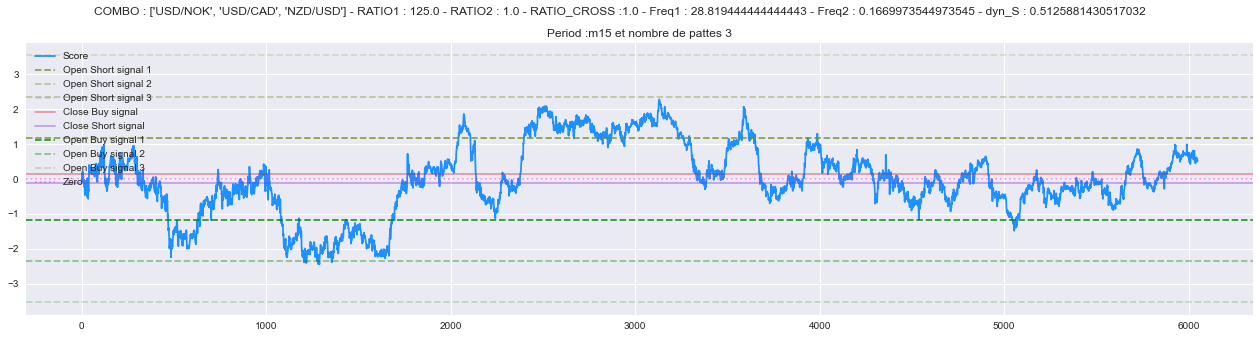

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:30:21 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:30:00  <---> split :  2020-07-07 20:15:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/SEK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour NZD/USD
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.05086970344264478
NZD/USD  - coef :  0.10440233853367617
TICKERS :  ['USD/SEK', 'EUR/USD', 'NZD/USD']
COEF [0.0508697  0.10440234]
CSTE -0.0172086283870318
Dernière valeur du combo à  0.10847237485564351
Derniere valeur du residu -0.0005225154063604881
Dernière valeur du Score -0.5296180032958528
Mean 1.5952113234114767e-17
Std 0.0009865892078986197
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'NZD/USD'] , - Moyenne du spread : 1.5952113234114767e-17  - Std Dev du spread :  0.0009865892078986197
La déviation est de : 0.5296180032958528
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la m

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
 USD/MXN   a un kmo donsidéré comme   inadéquat 
SCORE < 50
USD/ZAR  :  0.4659238363215028
  


LIGNE 512


 
TICKERS :  ['USD/TRY', 'USD/ZAR', 'USD/MXN']
COEF [0.23924926 0.46592384]
CSTE 0.11194854720207156
Dernière valeur du combo à  0.146288339843537
Derniere valeur du residu -0.000481737720592873
Dernière valeur du Score -0.27530876661072595
Mean 1.439177994884462e-17
Std 0.0017498088656001374
 Pour les TICKERS : ['USD/TRY', 'USD/ZAR', 'USD/MXN'] , - Moyenne du spread : 1.439177994884462e-17  - Std Dev du spread :  0.0017498088656001374
La déviation est de : 0.27530876661072595
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de Johasen   VALIDE! 

TEST DU FULL STOP 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
 USD/MXN   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/MXN  - coef :  1.174885950850716
USD/TRY  - coef :  0.04393588104380024
TICKERS :  ['USD/ZAR', 'USD/MXN', 'USD/TRY']
COEF [1.17488595 0.04393588]
CSTE -0.0009770324561542212
Dernière valeur du combo à  0.05689159369451557
Derniere valeur du residu 0.001337824389794802
Dernière valeur du Score 1.78412027031202
Mean -3.4878038141332627e-19
Std 0.0007498510117598932
 Pour les TICKERS : ['USD/ZAR', 'USD/MXN', 'USD/TRY'] , - Moyenne du spread : -3.4878038141332627e-19  - Std Dev du spread :  0.0007498510117598932
La déviation est de : 1.78412027031202
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une ide

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
Passage pour USD/NOK
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  0.5759524800854849
USD/SEK  - coef :  6.960747692345015
USD/NOK  - coef :  -2.382336017035364
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/SEK', 'USD/NOK']
COEF [ 0.57595248  6.96074769 -2.38233602]
CSTE -0.17905978890175922
Dernière valeur du combo à  0.6984286630338343
Derniere valeur du residu -0.004013663033834325
Dernière valeur du Score -1.023179653696379
Mean -2.2371507938337934e-16
Std 0.00392273538604309
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/SEK', 'USD/NOK'] , - Moyenne du spread : -2.2371507938337934e-16  - Std Dev du spread :  0.00392273538604309
La déviation est de : 1.023179653696379
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA 

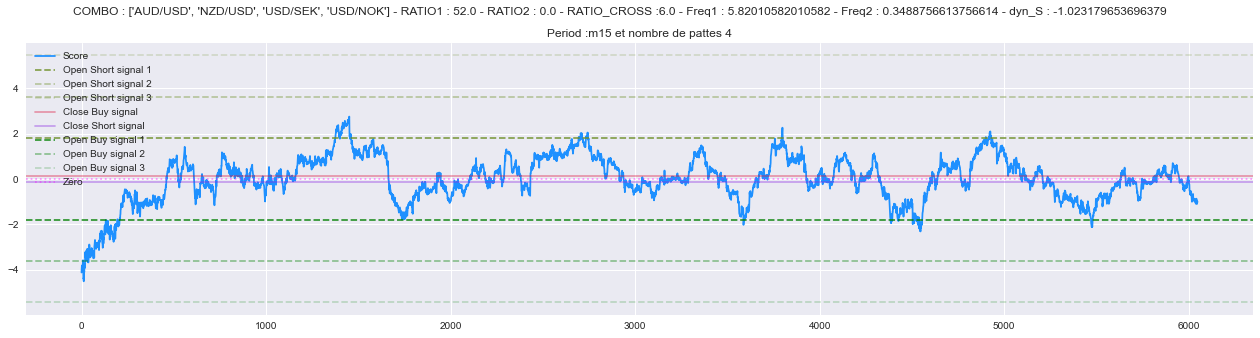

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)

Analyse du pack : ['EUR/USD', 'USD/CHF', 'USD/SEK', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:32:16 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour EUR/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
Passage pour USD/SEK
Passage pour NZD/USD
 EUR/USD   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : EUR/USD
USD/CHF  - coef :  0.5580202802771977
USD/SEK  - coef :  1.7775367781497295
NZD/USD  - coef :  0.3566622467194178
TICKERS :  ['EUR/USD', 'USD/CHF', 'USD/SEK', 'NZD/USD']
COEF [0.55802028 1.77753678 0.35666225]
CSTE 0.11713897005418061
Dernière valeur du combo à  1.1346313254392313
Derniere valeur du residu -0.007351325439231227
Dernière valeur du Score -1.9204386514610472
Mean 8.414785623150988e-17
Std 0.003827940785111
 Pour les TICKERS : ['EUR/USD', 'USD/CHF', 'USD/SEK', 'NZD/USD'] , - Moyenne du spread : 8.414785623150988e-17  - Std Dev du spread :  0.003827940785111
La déviation est de : 1.9204386514610472
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   

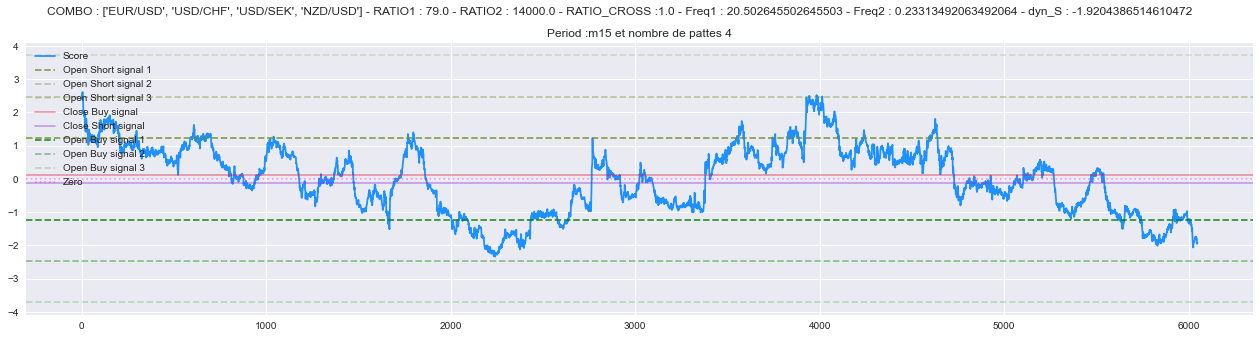

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)

Analyse du pack : ['GBP/USD', 'USD/TRY', 'USD/MXN', 'USD/ZAR'] 


Heure locale du début du train :  2020-07-07 22:32:20 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour GBP/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour USD/MXN
Passage pour USD/ZAR
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE < 50
USD/TRY  :  0.538241251287376
USD/MXN  :  3.144321556704404
  


LIGNE 512


 
TICKERS :  ['GBP/USD', 'USD/TRY', 'USD/MXN', 'USD/ZAR']
COEF [-1.01509127  0.53824125  3.14432156]
CSTE 1.1904091653885294
Dernière valeur du combo à  1.2490910192704978
Derniere valeur du residu 0.004778980729502225
Dernière valeur du Score 0.39272835661597527
Mean -1.381904584883958e-16
Std 0.012168667347276459
 Pour les TICKERS : ['GBP/USD', 'USD/TRY', 'USD/MXN', 'USD/ZAR'] , - Moyenne du spread : -1.381904584883958e-16  - Std Dev du spread :  0.012168667347276459
La déviation est de : 0.39272835661597527
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour AUD/USD
Passage pour USD/NOK
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
USD/CAD  - coef :  0.8376195512349952
AUD/USD  - coef :  0.4215669475967323
USD/NOK  - coef :  -0.1424641112852519
TICKERS :  ['NZD/USD', 'USD/CAD', 'AUD/USD', 'USD/NOK']
COEF [ 0.83761955  0.42156695 -0.14246411]
CSTE -0.2491579753871318
Dernière valeur du combo à  0.6442488951692024
Derniere valeur du residu 0.010241104830797654
Dernière valeur du Score 2.512183492893011
Mean 1.5390393251417514e-16
Std 0.004076575162510889
 Pour les TICKERS : ['NZD/USD', 'USD/CAD', 'AUD/USD', 'USD/NOK'] , - Moyenne du spread : 1.5390393251417514e-16  - Std Dev du spread :  0.004076575162510889
La déviation est de : 2.512183492893011
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour USD/MXN
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
USD/NOK  - coef :  0.5680529216720025
NZD/USD  - coef :  0.3727001065275817
USD/MXN  - coef :  1.4985771839582835
TICKERS :  ['USD/CAD', 'USD/NOK', 'NZD/USD', 'USD/MXN']
COEF [0.56805292 0.37270011 1.49857718]
CSTE 0.370075265728315
Dernière valeur du combo à  0.7394821999607124
Derniere valeur du residu -0.004458311684343408
Dernière valeur du Score -1.8415075844892035
Mean -1.9465616655299538e-16
Std 0.002421011850233491
 Pour les TICKERS : ['USD/CAD', 'USD/NOK', 'NZD/USD', 'USD/MXN'] , - Moyenne du spread : -1.9465616655299538e-16  - Std Dev du spread :  0.002421011850233491
La déviation est de : 1.8415075844892035
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA M

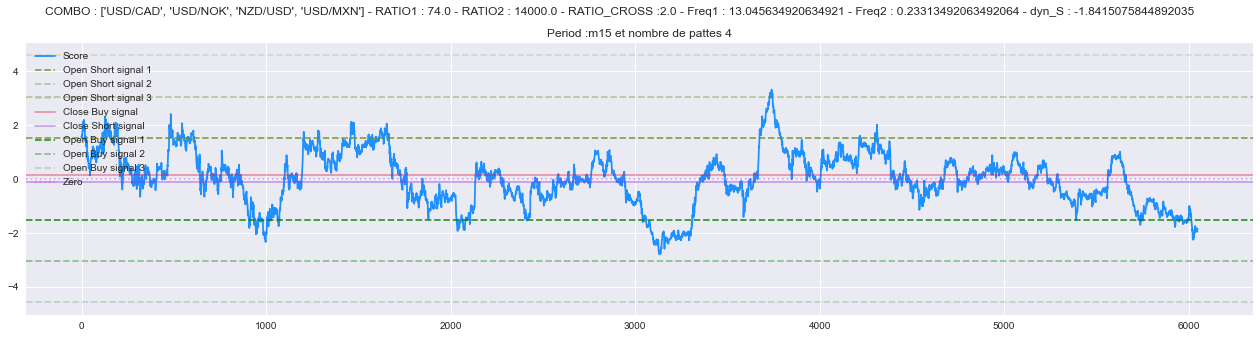

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)

Analyse du pack : ['USD/CHF', 'EUR/USD', 'USD/SEK', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:32:29 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour USD/SEK
Passage pour NZD/USD
 USD/CHF   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CHF
EUR/USD  - coef :  0.6109167437264573
USD/SEK  - coef :  -1.810594631702565
NZD/USD  - coef :  0.2290313906692738
TICKERS :  ['USD/CHF', 'EUR/USD', 'USD/SEK', 'NZD/USD']
COEF [ 0.61091674 -1.81059463  0.22903139]
CSTE 0.4109175087603929
Dernière valeur du combo à  1.0540224949831445
Derniere valeur du residu 0.007159980649452891
Dernière valeur du Score 1.787642268444093
Mean -1.3286696845629767e-16
Std 0.0040052647981325944
 Pour les TICKERS : ['USD/CHF', 'EUR/USD', 'USD/SEK', 'NZD/USD'] , - Moyenne du spread : -1.3286696845629767e-16  - Std Dev du spread :  0.0040052647981325944
La déviation est de : 1.787642268444093
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/MXN
 USD/CNH   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
 USD/MXN   a un kmo donsidéré comme   inadéquat 
SCORE < 50
USD/TRY  :  0.4293104003306294
USD/ZAR  :  -0.5134111221231533
  


LIGNE 512


 
TICKERS :  ['USD/CNH', 'USD/TRY', 'USD/ZAR', 'USD/MXN']
COEF [ 0.01787547  0.4293104  -0.51341112]
CSTE 0.13644869730709555
Dernière valeur du combo à  0.1415656928465474
Derniere valeur du residu 0.0008358667353331461
Dernière valeur du Score 1.5239917145197857
Mean 1.986212487837995e-17
Std 0.000548471968298404
 Pour les TICKERS : ['USD/CNH', 'USD/TRY', 'USD/ZAR', 'USD/MXN'] , - Moyenne du spread : 1.986212487837995e-17  - Std Dev du spread :  0.000548471968298404
La déviation est de : 1.5239917145197857
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
Passage pour USD/ZAR
 USD/JPY   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 USD/ZAR   a un kmo donsidéré comme   inadéquat 
SCORE > 50
USD/TRY  :  0.0021978800924266394
USD/CHF  :  -0.0024344604539976522
TICKERS :  ['USD/JPY', 'USD/TRY', 'USD/CHF', 'USD/ZAR']
COEF [-0.01972768  0.00219788 -0.00243446]
CSTE 0.010023523109416253
Dernière valeur du combo à  0.009337766035194973
Derniere valeur du residu -3.743029307468233e-05
Dernière valeur du Score -0.9361472684222193
Mean -6.241333141080575e-19
Std 3.998333845247089e-05
 Pour les TICKERS : ['USD/JPY', 'USD/TRY', 'USD/CHF', 'USD/ZAR'] , - Moyenne du spread : -6.241333141080575e-19  - Std Dev du spread :  3.998333845247089e-05
La déviation est de : 0.9361472684222193
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/CAD
Passage pour USD/NOK
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/ZAR  - coef :  0.6240643647379606
USD/CAD  - coef :  -0.0012602335559316336
USD/NOK  - coef :  0.06837118196454248
TICKERS :  ['USD/MXN', 'USD/ZAR', 'USD/CAD', 'USD/NOK']
COEF [ 0.62406436 -0.00126023  0.06837118]
CSTE 0.002160970181296143
Dernière valeur du combo à  0.04477815689480935
Derniere valeur du residu -0.0009734557742850994
Dernière valeur du Score -1.6650853302236008
Mean -1.0096274198806813e-18
Std 0.0005846281608609062
 Pour les TICKERS : ['USD/MXN', 'USD/ZAR', 'USD/CAD', 'USD/NOK'] , - Moyenne du spread : -1.0096274198806813e-18  - Std Dev du spread :  0.0005846281608609062
La déviation est de : 1.6650853302236008
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est  

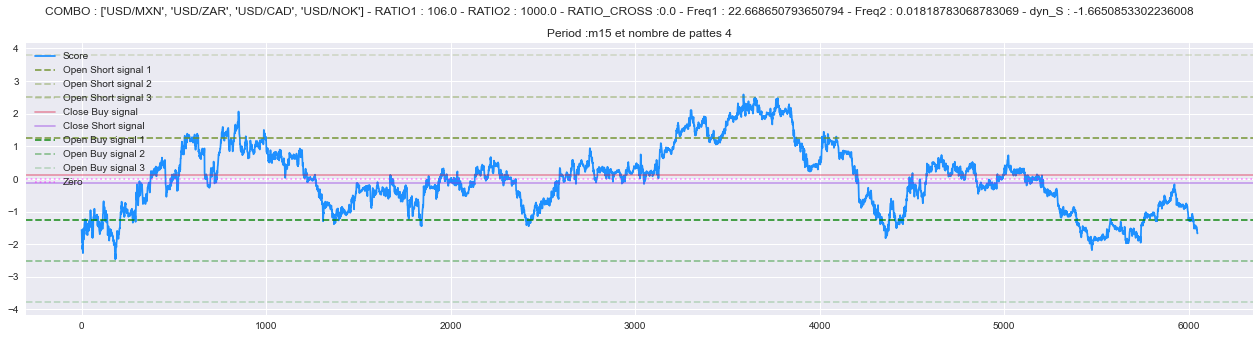

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)

Analyse du pack : ['USD/NOK', 'USD/CAD', 'NZD/USD', 'USD/SEK'] 


Heure locale du début du train :  2020-07-07 22:32:39 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour NZD/USD
Passage pour USD/SEK
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/CAD  - coef :  0.15676360045876578
NZD/USD  - coef :  -0.041594019049875
USD/SEK  - coef :  0.9145954470014694
TICKERS :  ['USD/NOK', 'USD/CAD', 'NZD/USD', 'USD/SEK']
COEF [ 0.1567636  -0.04159402  0.91459545]
CSTE -0.08197528163508584
Dernière valeur du combo à  0.10476464446828963
Derniere valeur du residu 0.0005665906668397974
Dernière valeur du Score 0.7497570980878864
Mean 4.4708137838534536e-17
Std 0.0007556989700860919
 Pour les TICKERS : ['USD/NOK', 'USD/CAD', 'NZD/USD', 'USD/SEK'] , - Moyenne du spread : 4.4708137838534536e-17  - Std Dev du spread :  0.0007556989700860919
La déviation est de : 0.7497570980878864
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE 

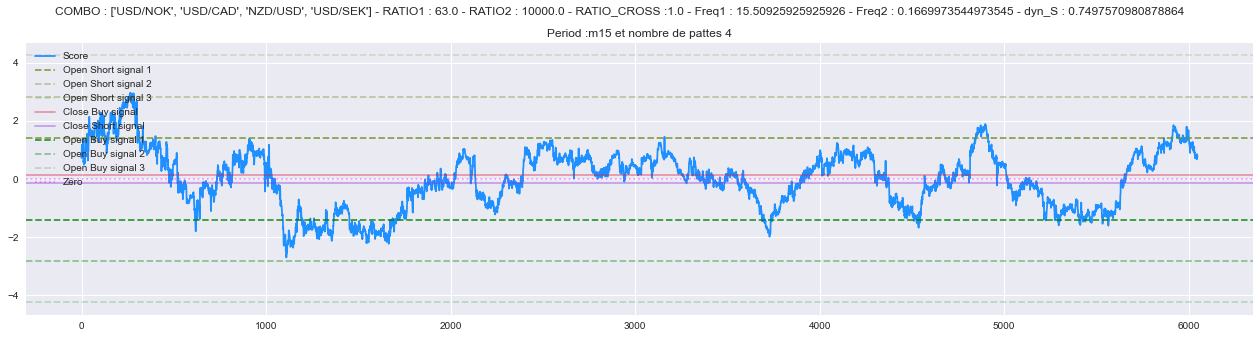

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:32:44 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/SEK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour NZD/USD
Passage pour USD/NOK
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.003745977522957516
NZD/USD  - coef :  0.04275621437756277
USD/NOK  - coef :  0.5547516086194837
TICKERS :  ['USD/SEK', 'EUR/USD', 'NZD/USD', 'USD/NOK']
COEF [0.00374598 0.04275621 0.55475161]
CSTE 0.017336965678248606
Dernière valeur du combo à  0.10797591809738935
Derniere valeur du residu -1.80173603607503e-05
Dernière valeur du Score -0.02802624630155093
Mean -8.003591910326856e-18
Std 0.0006428745457698074
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'USD/NOK'] , - Moyenne du spread : -8.003591910326856e-18  - Std Dev du spread :  0.0006428745457698074
La déviation est de : 0.02802624630155093
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALID

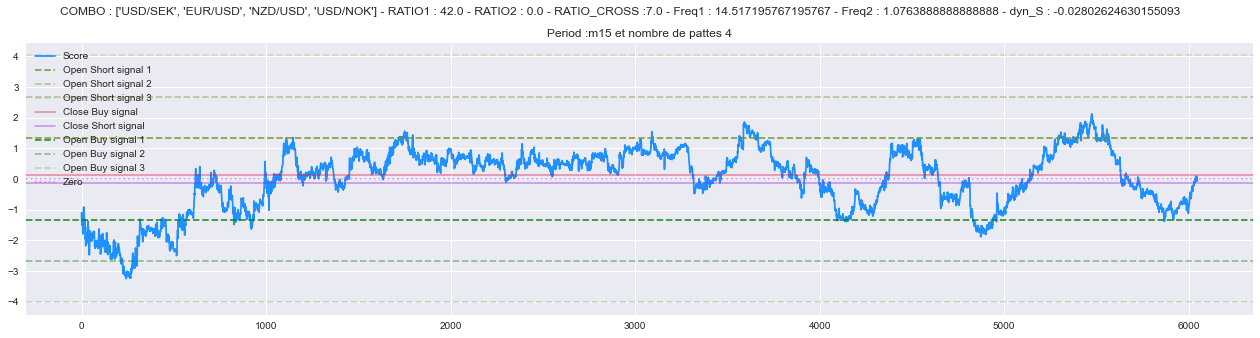

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)

Analyse du pack : ['USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:32:48 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/TRY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/MXN
Passage pour USD/NOK
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE < 50
USD/ZAR  :  0.5796549103251393
USD/MXN  :  -0.48455950297148
  


LIGNE 512


 
TICKERS :  ['USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/NOK']
COEF [ 1.00743613  0.57965491 -0.4845595 ]
CSTE 0.1127021371555145
Dernière valeur du combo à  0.14572169839216834
Derniere valeur du residu 8.054565016971105e-05
Dernière valeur du Score 0.04833826981517109
Mean -1.5621689714881087e-17
Std 0.0016662915424508476
 Pour les TICKERS : ['USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/NOK'] , - Moyenne du spread : -1.5621689714881087e-17  - Std Dev du spread :  0.0016662915424508476
La déviation est de : 0.04833826981517108
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significa

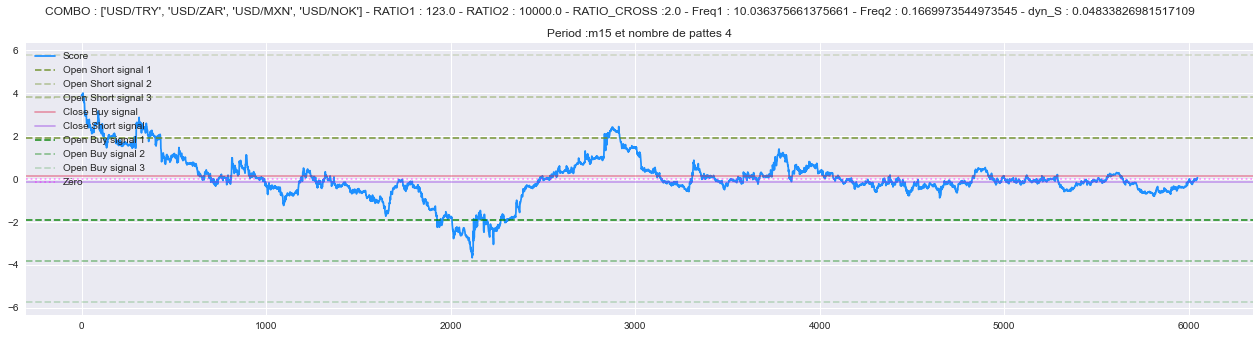

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)

Analyse du pack : ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD'] 


Heure locale du début du train :  2020-07-07 22:32:51 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/ZAR


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/TRY
Passage pour USD/CAD
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/MXN  - coef :  0.5471572245406339
USD/TRY  - coef :  0.0734898063794132
USD/CAD  - coef :  0.09502836693687836
TICKERS :  ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD']
COEF [0.54715722 0.07348981 0.09502837]
CSTE -0.046969133371931635
Dernière valeur du combo à  0.05756202376185966
Derniere valeur du residu 0.0006721416406403335
Dernière valeur du Score 1.2434949868911742
Mean 1.5282087764557587e-17
Std 0.0005405262166120349
 Pour les TICKERS : ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD'] , - Moyenne du spread : 1.5282087764557587e-17  - Std Dev du spread :  0.0005405262166120349
La déviation est de : 1.2434949868911742
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  e

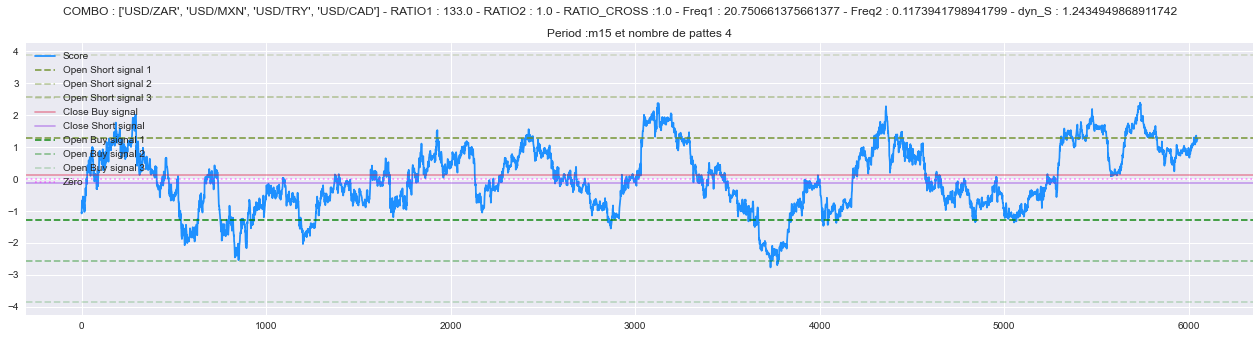

 Le scan avec 4 pattes et la timeframe m15 est non satisfaisante. 

 Nouveau scan avec 5 pattes et la timeframe m15 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour USD/SEK
Passage pour USD/NOK
Passage pour USD/CAD
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  0.42826202704642574
USD/SEK  - coef :  7.310196656923126
USD/NOK  - coef :  -3.0705306886496797
USD/CAD  - coef :  0.3820751571926744
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/SEK', 'USD/NOK', 'USD/CAD']
COEF [ 0.42826203  7.31019666 -3.07053069  0.38207516]
CSTE -0.3307599466494173
Dernière valeur du combo à  0.6961977016393464
Derniere valeur du residu -0.0017577016393464096
Dernière valeur du Score -0.4627131953743795
Mean -2.0106271145369277e-16
Std 0.0037986849238739752
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/SEK', 'USD/NOK', 'USD/CAD'] , - Moyenne du spread : -2.0106271145369277e-16  - Std Dev du spread : 

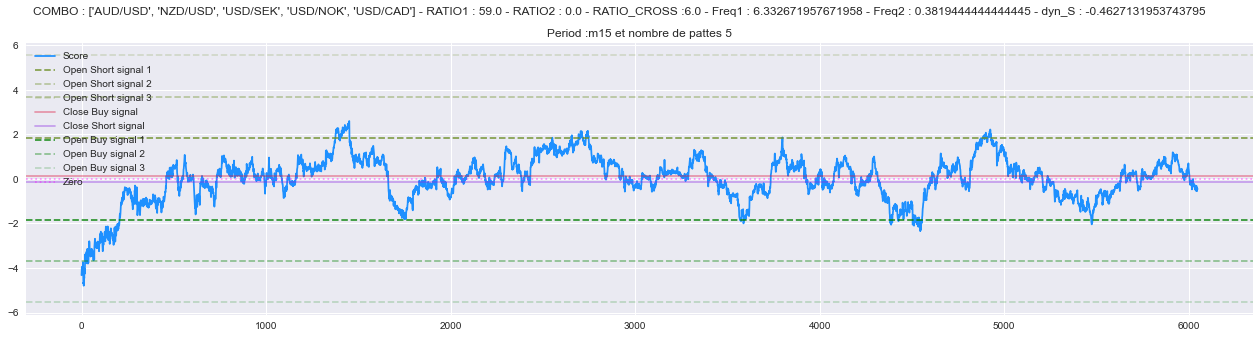

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)
base_pair4 :  (9168, 1)

Analyse du pack : ['EUR/USD', 'USD/CHF', 'USD/SEK', 'NZD/USD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:34:43 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour EUR/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
Passage pour USD/SEK
Passage pour NZD/USD
Passage pour USD/NOK
 EUR/USD   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : EUR/USD
USD/CHF  - coef :  0.5982699995254428
USD/SEK  - coef :  0.2960021875187303
NZD/USD  - coef :  0.2917734668672849
USD/NOK  - coef :  1.4197897539153608
TICKERS :  ['EUR/USD', 'USD/CHF', 'USD/SEK', 'NZD/USD', 'USD/NOK']
COEF [0.59827    0.29600219 0.29177347 1.41978975]
CSTE 0.12671569174772201
Dernière valeur du combo à  1.1341069376567798
Derniere valeur du residu -0.006761937656779793
Dernière valeur du Score -1.8690804726714936
Mean -1.1344540827022928e-16
Std 0.003617788402184086
 Pour les TICKERS : ['EUR/USD', 'USD/CHF', 'USD/SEK', 'NZD/USD', 'USD/NOK'] , - Moyenne du spread : -1.1344540827022928e-16  - Std Dev du spread :  0.0036

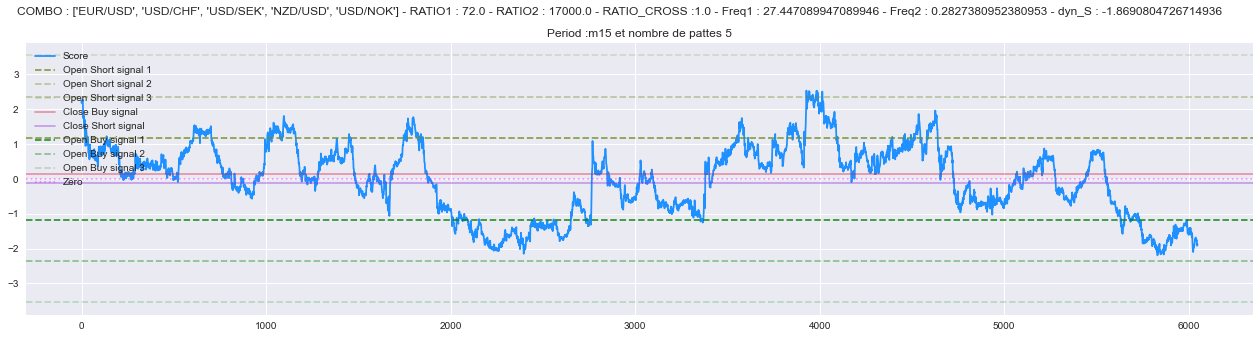

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)
base_pair4 :  (9168, 1)

Analyse du pack : ['GBP/USD', 'USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/CAD'] 


Heure locale du début du train :  2020-07-07 22:34:48 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour GBP/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour USD/MXN
Passage pour USD/ZAR
Passage pour USD/CAD
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE < 50
USD/TRY  :  -0.571945787725065
USD/MXN  :  -5.311498527835428
USD/ZAR  :  1.671787297919405
  


LIGNE 512


 
TICKERS :  ['GBP/USD', 'USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/CAD']
COEF [-0.12284991 -0.57194579 -5.31149853  1.6717873 ]
CSTE 0.37297735778808583
Dernière valeur du combo à  1.2495411346732692
Derniere valeur du residu 0.004443865326730911
Dernière valeur du Score 0.4344765277352542
Mean -1.1410625530869663e-16
Std 0.010228090686268027
 Pour les TICKERS : ['GBP/USD', 'USD/TRY', 'USD/MXN', 'USD/ZAR', 'USD/CAD'] , - Moyenne du spread : -1.1410625530869663e-16  - Std Dev du spread :  0.010228090686268027
La déviation est de : 0.43447652773525414
Le test e

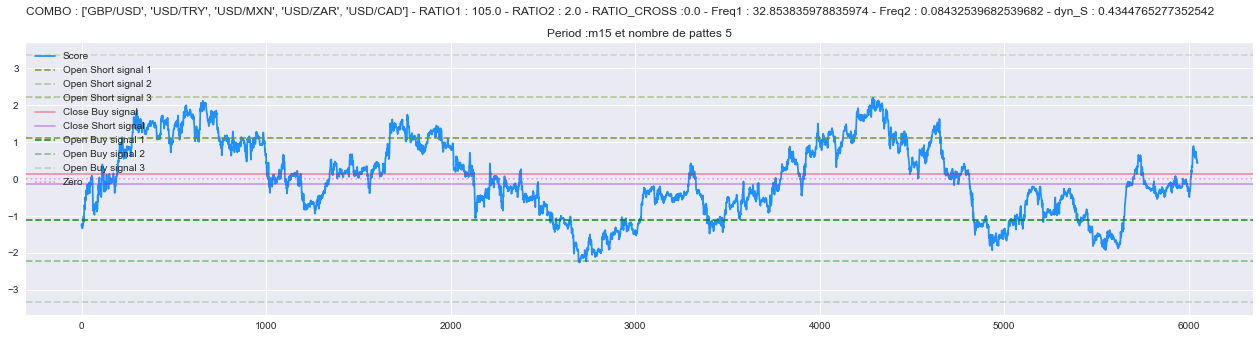

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)
base_pair4 :  (9168, 1)

Analyse du pack : ['NZD/USD', 'USD/CAD', 'AUD/USD', 'USD/NOK', 'USD/SEK'] 


Heure locale du début du train :  2020-07-07 22:34:52 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour NZD/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour AUD/USD
Passage pour USD/NOK
Passage pour USD/SEK
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
USD/CAD  - coef :  0.7846338622796833
AUD/USD  - coef :  0.48953502863549486
USD/NOK  - coef :  0.30176725535492677
USD/SEK  - coef :  -0.87717543987706
TICKERS :  ['NZD/USD', 'USD/CAD', 'AUD/USD', 'USD/NOK', 'USD/SEK']
COEF [ 0.78463386  0.48953503  0.30176726 -0.87717544]
CSTE -0.20942051120755967
Dernière valeur du combo à  0.6443849003088996
Derniere valeur du residu 0.010205099691100394
Dernière valeur du Score 2.51273608126073
Mean -1.0206415371884706e-16
Std 0.004061349605001187
 Pour les TICKERS : ['NZD/USD', 'USD/CAD', 'AUD/USD', 'USD/NOK', 'USD/SEK'] , - Moyenne du spread : -1.0206415371884706e-16  - Std Dev du spread :  0.00

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour USD/MXN
Passage pour USD/SEK
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
USD/NOK  - coef :  1.0964182352916907
NZD/USD  - coef :  0.4176911301142595
USD/MXN  - coef :  1.5331372915770065
USD/SEK  - coef :  -0.9757927691693681
TICKERS :  ['USD/CAD', 'USD/NOK', 'NZD/USD', 'USD/MXN', 'USD/SEK']
COEF [ 1.09641824  0.41769113  1.53313729 -0.97579277]
CSTE 0.3888061679677539
Dernière valeur du combo à  0.739543554533461
Derniere valeur du residu -0.004468337961925362
Dernière valeur du Score -1.9108634379295577
Mean 1.1555644742088888e-16
Std 0.002338386863881268
 Pour les TICKERS : ['USD/CAD', 'USD/NOK', 'NZD/USD', 'USD/MXN', 'USD/SEK'] , - Moyenne du spread : 1.1555644742088888e-16  - Std Dev du spread :  0.002338386863881268
La dé

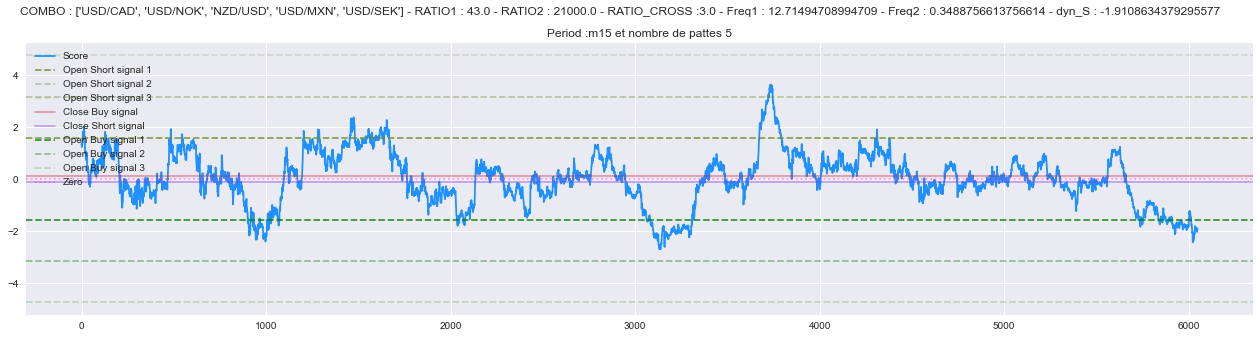

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)
base_pair4 :  (9168, 1)

Analyse du pack : ['USD/CHF', 'EUR/USD', 'USD/SEK', 'NZD/USD', 'USD/CAD'] 


Heure locale du début du train :  2020-07-07 22:34:59 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour USD/SEK
Passage pour NZD/USD
Passage pour USD/CAD
 USD/CHF   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CHF
EUR/USD  - coef :  0.737716636954078
USD/SEK  - coef :  -1.1100736907114366
NZD/USD  - coef :  0.4964978163358027
USD/CAD  - coef :  -0.8305845876962421
TICKERS :  ['USD/CHF', 'EUR/USD', 'USD/SEK', 'NZD/USD', 'USD/CAD']
COEF [ 0.73771664 -1.11007369  0.49649782 -0.83058459]
CSTE 0.6329081926176292
Dernière valeur du combo à  1.0591884893054704
Derniere valeur du residu 0.002027770650064653
Dernière valeur du Score 0.6383177992178727
Mean 2.321041653994788e-16
Std 0.0031767415111235145
 Pour les TICKERS : ['USD/CHF', 'EUR/USD', 'USD/SEK', 'NZD/USD', 'USD/CAD'] , - Moyenne du spread : 2.321041653994788e-16  - Std Dev du spread :  0.00317

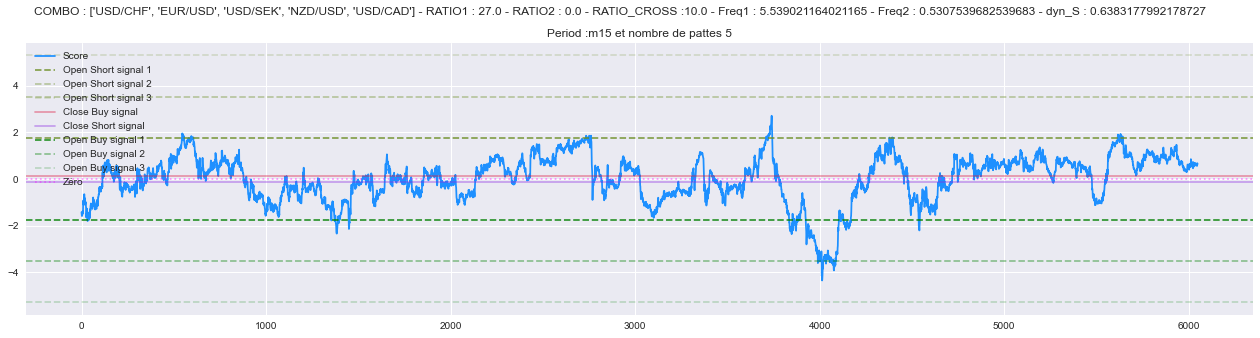

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)
base_pair4 :  (9168, 1)

Analyse du pack : ['USD/CNH', 'USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/CAD'] 


Heure locale du début du train :  2020-07-07 22:35:03 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/CNH


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour USD/ZAR
Passage pour USD/MXN
Passage pour USD/CAD
 USD/CNH   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE < 50
USD/TRY  :  0.05020868920079289
USD/ZAR  :  -0.5631806869520855
USD/MXN  :  0.0749509633838301
  


LIGNE 512


 
TICKERS :  ['USD/CNH', 'USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/CAD']
COEF [ 0.05787849  0.05020869 -0.56318069  0.07495096]
CSTE 0.0998007658293579
Dernière valeur du combo à  0.14158407722895008
Derniere valeur du residu 0.0008166712293838085
Dernière valeur du Score 1.7676104426603676
Mean 1.9137028822283826e-18
Std 0.0004620199166478468
 Pour les TICKERS : ['USD/CNH', 'USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/CAD'] , - Moyenne du spread : 1.9137028822283826e-18  - Std Dev du spread :  0.0004620199166478468
La déviation est de : 1.7676104426603676
Le t

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
Passage pour USD/ZAR
Passage pour USD/MXN
 USD/JPY   a un kmo donsidéré comme   inadéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 50
USD/TRY  :  0.0024530060237633426
USD/CHF  :  -0.009380146722944125
USD/ZAR  :  0.008119780184291442
TICKERS :  ['USD/JPY', 'USD/TRY', 'USD/CHF', 'USD/ZAR', 'USD/MXN']
COEF [-0.0198812   0.00245301 -0.00938015  0.00811978]
CSTE 0.009820001819555953
Dernière valeur du combo à  0.00933305748662372
Derniere valeur du residu -3.3067716612466755e-05
Dernière valeur du Score -0.8320551566687089
Mean -1.0595351389316014e-18
Std 3.974221702423983e-05
 Pour les TICKERS : ['USD/JPY', 'USD/TRY', 'USD/CHF', 'USD/ZAR', 'USD/MXN'] , - Moyenne du spread : -1.0595351389316014e-18  - Std Dev du spread :  3.974221702423983e-05
La déviation est de : 0.8320551566687089
Le test est   VALIDE  et le rés

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/CAD
Passage pour USD/NOK
Passage pour EUR/USD
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/ZAR  - coef :  0.6386791722938798
USD/CAD  - coef :  0.03694844511410376
USD/NOK  - coef :  0.10207820295991715
EUR/USD  - coef :  -0.034752149606671265
TICKERS :  ['USD/MXN', 'USD/ZAR', 'USD/CAD', 'USD/NOK', 'EUR/USD']
COEF [ 0.63867917  0.03694845  0.1020782  -0.03475215]
CSTE 0.008656398412162564
Dernière valeur du combo à  0.04458813691858726
Derniere valeur du residu -0.0007712476986374353
Dernière valeur du Score -1.3985336284888246
Mean -1.1707088855070991e-17
Std 0.0005514688262954319
 Pour les TICKERS : ['USD/MXN', 'USD/ZAR', 'USD/CAD', 'USD/NOK', 'EUR/USD'] , - Moyenne du spread : -1.1707088855070991e-17  - Std Dev du spr

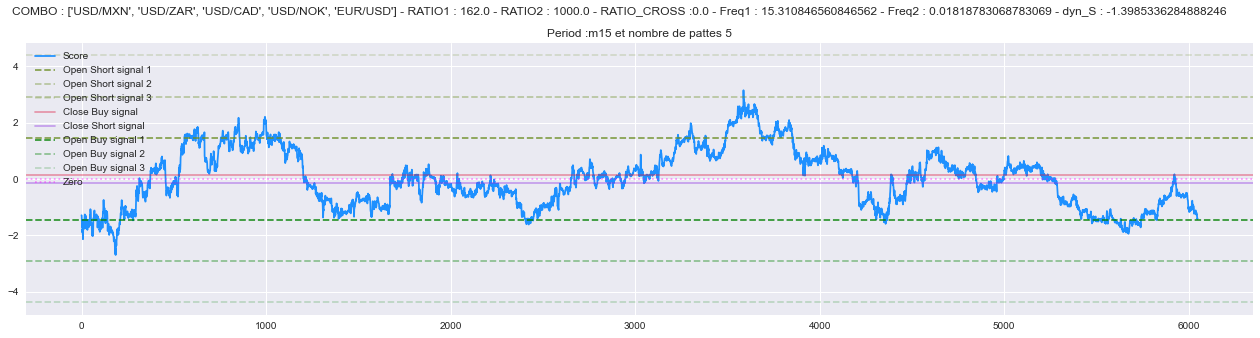

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)
base_pair4 :  (9168, 1)

Analyse du pack : ['USD/NOK', 'USD/CAD', 'NZD/USD', 'USD/SEK', 'USD/MXN'] 


Heure locale du début du train :  2020-07-07 22:35:14 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour NZD/USD
Passage pour USD/SEK
Passage pour USD/MXN
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/CAD  - coef :  0.10385658874210861
NZD/USD  - coef :  -0.01574833486880299
USD/SEK  - coef :  0.7803857458813925
USD/MXN  - coef :  0.3525248105332724
TICKERS :  ['USD/NOK', 'USD/CAD', 'NZD/USD', 'USD/SEK', 'USD/MXN']
COEF [ 0.10385659 -0.01574833  0.78038575  0.35252481]
CSTE -0.0610271585813269
Dernière valeur du combo à  0.10470189081976533
Derniere valeur du residu 0.000630342845048551
Dernière valeur du Score 0.875853688037241
Mean 7.379458596218798e-18
Std 0.0007196896623922667
 Pour les TICKERS : ['USD/NOK', 'USD/CAD', 'NZD/USD', 'USD/SEK', 'USD/MXN'] , - Moyenne du spread : 7.379458596218798e-18  - Std Dev du spread :  0.00

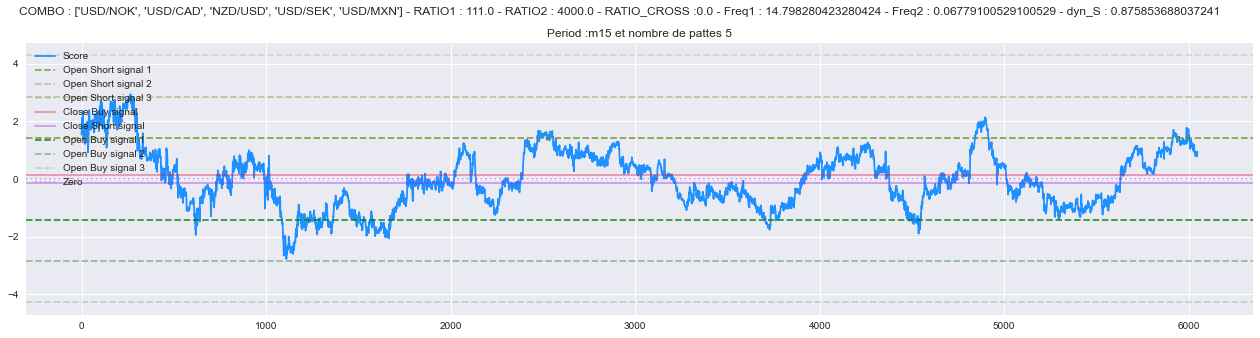

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)
base_pair4 :  (9168, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'USD/NOK', 'AUD/USD'] 


Heure locale du début du train :  2020-07-07 22:35:17 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/SEK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour NZD/USD
Passage pour USD/NOK
Passage pour AUD/USD
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.03360089147537859
NZD/USD  - coef :  -0.057444197729324006
USD/NOK  - coef :  0.39180583489492044
AUD/USD  - coef :  0.08819768594998818
TICKERS :  ['USD/SEK', 'EUR/USD', 'NZD/USD', 'USD/NOK', 'AUD/USD']
COEF [ 0.03360089 -0.0574442   0.39180583  0.08819769]
CSTE 0.004665834677493194
Dernière valeur du combo à  0.10746101906966471
Derniere valeur du residu 0.0004968816673638909
Dernière valeur du Score 1.2541801203850826
Mean -2.2900185569111817e-18
Std 0.00039618046824991214
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'NZD/USD', 'USD/NOK', 'AUD/USD'] , - Moyenne du spread : -2.2900185569111817e-18  - Std Dev du spr

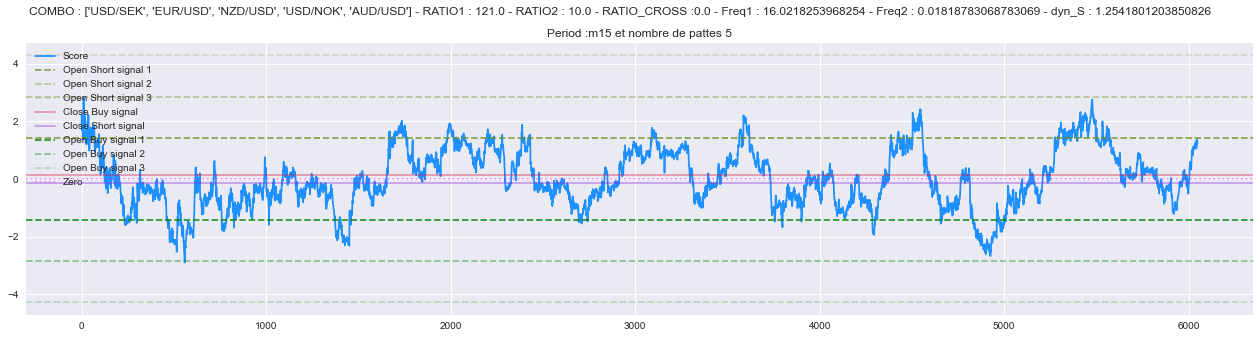

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)
base_pair4 :  (9168, 1)

Analyse du pack : ['USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/NOK', 'USD/CAD'] 


Heure locale du début du train :  2020-07-07 22:35:21 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/TRY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/ZAR
Passage pour USD/MXN
Passage pour USD/NOK
Passage pour USD/CAD
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE < 50
USD/ZAR  :  0.5778650367835516
USD/MXN  :  -0.4026907485403234
USD/NOK  :  -0.04114874385292133
  


LIGNE 512


 
TICKERS :  ['USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/NOK', 'USD/CAD']
COEF [ 1.08038633  0.57786504 -0.40269075 -0.04114874]
CSTE 0.13022934002334569
Dernière valeur du combo à  0.14580875861953685
Derniere valeur du residu 3.697160086521545e-05
Dernière valeur du Score 0.022267536828001287
Mean -1.3354617235694468e-17
Std 0.0016603363520089592
 Pour les TICKERS : ['USD/TRY', 'USD/ZAR', 'USD/MXN', 'USD/NOK', 'USD/CAD'] , - Moyenne du spread : -1.3354617235694468e-17  - Std Dev du spread :  0.0016603363520089592
La déviation est de : 0.02226753682800131

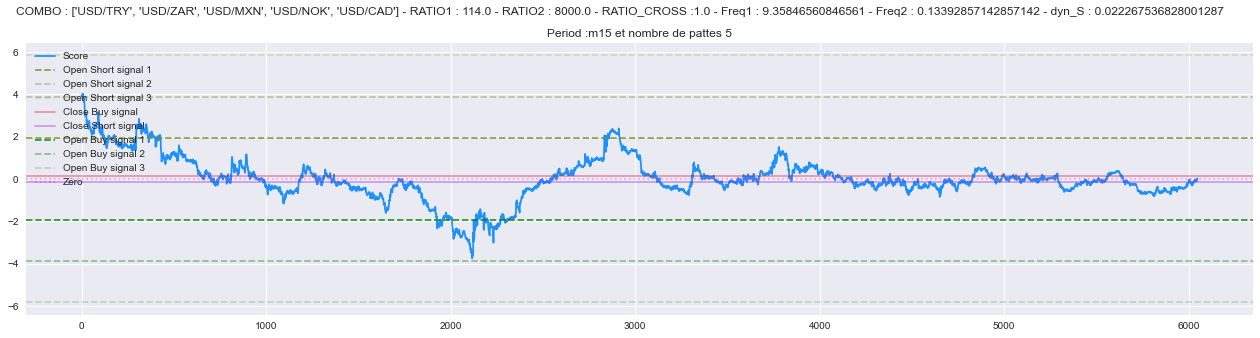

base_pair0 [PAIRE PRINCIPALE]:  (9168, 1)
base_pair1 :  (9168, 1)
base_pair2 :  (9168, 1)
base_pair3 :  (9168, 1)
base_pair4 :  (9168, 1)

Analyse du pack : ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:35:26 

 
 
|||| TIME_FRAME <---> debut : 2020-04-06 03:45:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/ZAR


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/MXN
Passage pour USD/TRY
Passage pour USD/CAD
Passage pour USD/NOK
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/MXN  - coef :  0.3504706659677031
USD/TRY  - coef :  0.08587770448190032
USD/CAD  - coef :  0.03673333651792035
USD/NOK  - coef :  0.26015529775652285
TICKERS :  ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD', 'USD/NOK']
COEF [0.35047067 0.0858777  0.03673334 0.2601553 ]
CSTE -0.02427357940943755
Dernière valeur du combo à  0.058012355364660685
Derniere valeur du residu 0.00022876286480931485
Dernière valeur du Score 0.4886959918745776
Mean -5.172045919116036e-18
Std 0.0004681087396109264
 Pour les TICKERS : ['USD/ZAR', 'USD/MXN', 'USD/TRY', 'USD/CAD', 'USD/NOK'] , - Moyenne du spread : -5.172045919116036e-18  - Std Dev du spread :  0

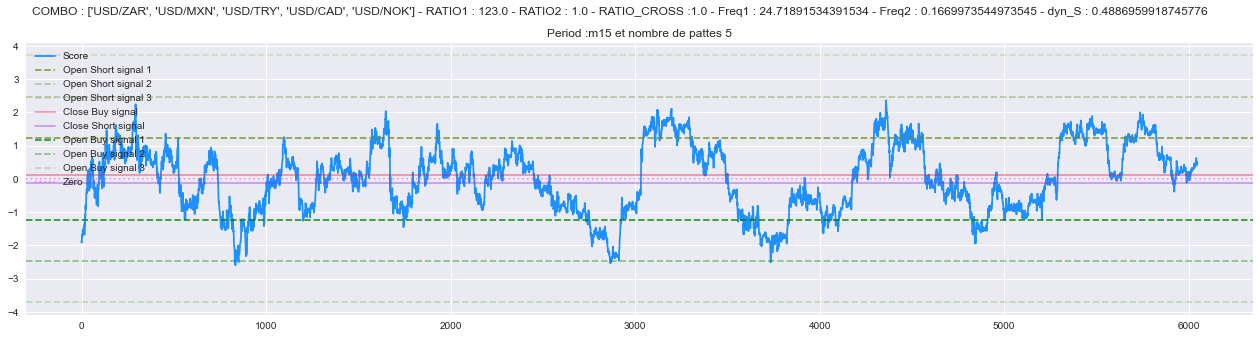

 Le scan avec 5 pattes et la timeframe m15 est non satisfaisante. 

 Nouveau scan avec 3 pattes et la timeframe m5 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement d

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
 AUD/USD   a un kmo donsidéré comme   inadéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  0.6874877084323934
USD/SEK  - coef :  2.2341790505947023
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/SEK']
COEF [0.68748771 2.23417905]
CSTE 0.0059397660908269145
Dernière valeur du combo à  0.6971705102719318
Derniere valeur du residu -0.002765510271931726
Dernière valeur du Score -1.7435442992879855
Mean 3.1390234327199366e-17
Std 0.0015861428201515235
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/SEK'] , - Moyenne du spread : 3.1390234327199366e-17  - Std Dev du spread :  0.0015861428201515235
La déviation est de : 1.7435442992879855
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de co

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 50
NZD/USD  :  4.806049564460865
TICKERS :  ['EUR/USD', 'NZD/USD', 'USD/SEK']
COEF [4.34062910e-03 4.80604956e+00]
CSTE 0.607730525168875
Dernière valeur du combo à  1.129453667250388
Derniere valeur du residu -0.0021036672503882414
Dernière valeur du Score -0.7795023018012559
Mean 4.919639064145865e-18
Std 0.0026987312872933673
 Pour les TICKERS : ['EUR/USD', 'NZD/USD', 'USD/SEK'] , - Moyenne du spread : 4.919639064145865e-18  - Std Dev du spread :  0.0026987312872933673
La déviation est de : 0.7795023018012559
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de Johasen   VALIDE! 

TEST DU FULL STOP - et stop à  0  -  

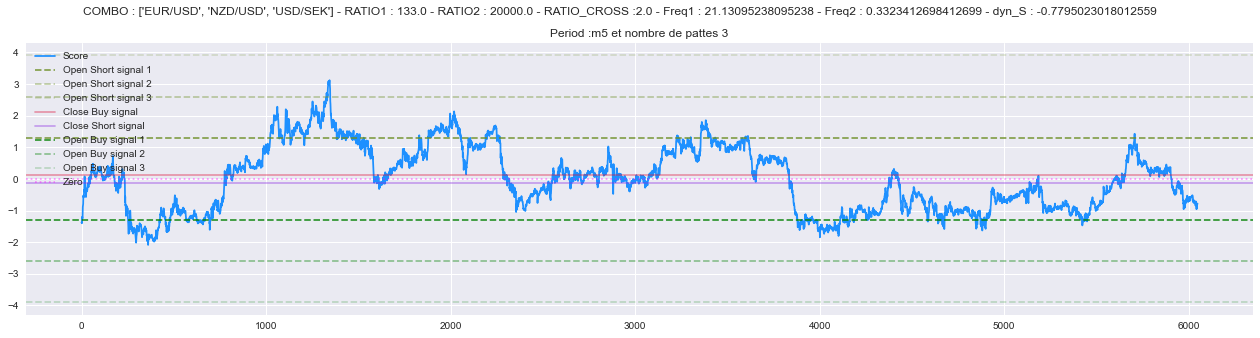

base_pair0 [PAIRE PRINCIPALE]:  (8890, 1)
base_pair1 :  (8890, 1)
base_pair2 :  (8890, 1)

Analyse du pack : ['GBP/USD', 'USD/CAD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:37:18 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:40:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour GBP/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour USD/NOK
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : GBP/USD
USD/CAD  - coef :  1.9354138352215116
USD/NOK  - coef :  1.4617155348777655
TICKERS :  ['GBP/USD', 'USD/CAD', 'USD/NOK']
COEF [1.93541384 1.46171553]
CSTE -0.3297201415439477
Dernière valeur du combo à  1.246783503284005
Derniere valeur du residu 0.007206496715995048
Dernière valeur du Score 1.1400913113147875
Mean -3.85640960670061e-16
Std 0.006320982051590838
 Pour les TICKERS : ['GBP/USD', 'USD/CAD', 'USD/NOK'] , - Moyenne du spread : -3.85640960670061e-16  - Std Dev du spread :  0.006320982051590838
La déviation est de : 1.1400913113147875
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de c

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo donsidéré comme   inadéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
AUD/USD  - coef :  0.9035869371191628
EUR/USD  - coef :  -0.06608493555430434
TICKERS :  ['NZD/USD', 'AUD/USD', 'EUR/USD']
COEF [ 0.90358694 -0.06608494]
CSTE 0.09732295231437516
Dernière valeur du combo à  0.6502773872874625
Derniere valeur du residu 0.004307612712537434
Dernière valeur du Score 2.2317570888456566
Mean 2.6709234471388935e-17
Std 0.001930144070816173
 Pour les TICKERS : ['NZD/USD', 'AUD/USD', 'EUR/USD'] , - Moyenne du spread : 2.6709234471388935e-17  - Std Dev du spread :  0.001930144070816173
La déviation est de : 2.2317570888456566
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de coin

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
 USD/CAD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
AUD/USD  - coef :  0.038191051160946114
USD/NOK  - coef :  2.4962967726321303
TICKERS :  ['USD/CAD', 'AUD/USD', 'USD/NOK']
COEF [0.03819105 2.49629677]
CSTE 0.4489587096759142
Dernière valeur du combo à  0.7384444873866838
Derniere valeur du residu -0.0034476111234078566
Dernière valeur du Score -2.0508951947201925
Mean 2.254222675660867e-17
Std 0.0016810274519553122
 Pour les TICKERS : ['USD/CAD', 'AUD/USD', 'USD/NOK'] , - Moyenne du spread : 2.254222675660867e-17  - Std Dev du spread :  0.0016810274519553122
La déviation est de : 2.0508951947201925
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointi

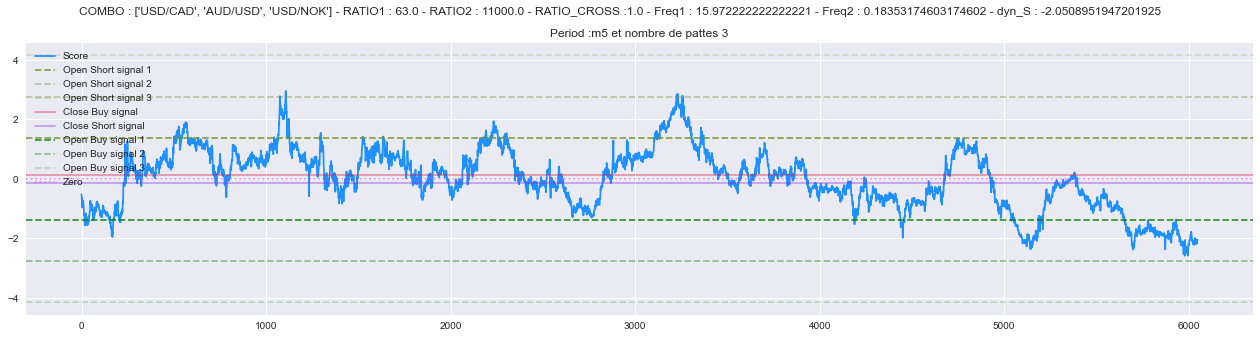

base_pair0 [PAIRE PRINCIPALE]:  (8890, 1)
base_pair1 :  (8890, 1)
base_pair2 :  (8890, 1)

Analyse du pack : ['USD/CHF', 'EUR/USD', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:37:27 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:40:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour NZD/USD
 USD/CHF   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 NZD/USD   a un kmo donsidéré comme   inadéquat 
SCORE < 50
EUR/USD  :  0.08221298272931056
  


LIGNE 512


 
TICKERS :  ['USD/CHF', 'EUR/USD', 'NZD/USD']
COEF [0.11135295 0.08221298]
CSTE 0.8752495800644321
Dernière valeur du combo à  1.0545987177748284
Derniere valeur du residu 0.00655560589846349
Dernière valeur du Score 1.2316091266062852
Mean -1.8768055892472884e-16
Std 0.0053227974337343
 Pour les TICKERS : ['USD/CHF', 'EUR/USD', 'NZD/USD'] , - Moyenne du spread : -1.8768055892472884e-16  - Std Dev du spread :  0.0053227974337343
La déviation est de : 1.2316091266062852
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
 USD/CNH   a un kmo donsidéré comme   inadéquat 
 NZD/USD   a un kmo donsidéré comme   inadéquat 
 USD/CHF   a un kmo donsidéré comme   inadéquat 
SCORE > 50
NZD/USD  :  0.03064338182218136
TICKERS :  ['USD/CNH', 'NZD/USD', 'USD/CHF']
COEF [0.0437704  0.03064338]
CSTE 0.0808099201266976
Dernière valeur du combo à  0.14197872145766893
Derniere valeur du residu 0.00042243256128324247
Dernière valeur du Score 1.8706359987840753
Mean 8.462513464818075e-18
Std 0.00022582296157981442
 Pour les TICKERS : ['USD/CNH', 'NZD/USD', 'USD/CHF'] , - Moyenne du spread : 8.462513464818075e-18  - Std Dev du spread :  0.00022582296157981442
La déviation est de : 1.8706359987840753
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de cointiégration de Johasen   VALIDE! 

TEST DU FULL STOP - et stop à  0 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour USD/CHF
 USD/JPY   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo considéré comme   adéquat 
SCORE > 50
USD/TRY  :  0.004923274358185233
TICKERS :  ['USD/JPY', 'USD/TRY', 'USD/CHF']
COEF [-0.03518858  0.00492327]
CSTE 0.009265002045727822
Dernière valeur du combo à  0.009357247345124036
Derniere valeur du residu -5.890059117688931e-05
Dernière valeur du Score -1.5265267181297795
Mean 1.7003043593899656e-18
Std 3.858471029518103e-05
 Pour les TICKERS : ['USD/JPY', 'USD/TRY', 'USD/CHF'] , - Moyenne du spread : 1.7003043593899656e-18  - Std Dev du spread :  3.858471029518103e-05
La déviation est de : 1.5265267181297795
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


LIGNE 565


 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test d

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour GBP/USD
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/TRY  - coef :  0.37173775314734786
GBP/USD  - coef :  0.04481347254624649
TICKERS :  ['USD/MXN', 'USD/TRY', 'GBP/USD']
COEF [0.37173775 0.04481347]
CSTE -0.06584375486546715
Dernière valeur du combo à  0.04456829516722187
Derniere valeur du residu -0.0007555333859702307
Dernière valeur du Score -2.010925257774209
Mean 1.4758917192437597e-17
Std 0.00037571430516841135
 Pour les TICKERS : ['USD/MXN', 'USD/TRY', 'GBP/USD'] , - Moyenne du spread : 1.4758917192437597e-17  - Std Dev du spread :  0.00037571430516841135
La déviation est de : 2.010925257774209
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une id

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/CAD  - coef :  0.24764258640423414
USD/SEK  - coef :  0.5742320527180513
TICKERS :  ['USD/NOK', 'USD/CAD', 'USD/SEK']
COEF [0.24764259 0.57423205]
CSTE -0.13931676749049307
Dernière valeur du combo à  0.1046963280543732
Derniere valeur du residu 0.0006460029185896277
Dernière valeur du Score 1.2981270506998075
Mean -3.175737157079234e-18
Std 0.0004976422902838185
 Pour les TICKERS : ['USD/NOK', 'USD/CAD', 'USD/SEK'] , - Moyenne du spread : -3.175737157079234e-18  - Std Dev du spread :  0.0004976422902838185
La déviation est de : 1.2981270506998075
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de coint

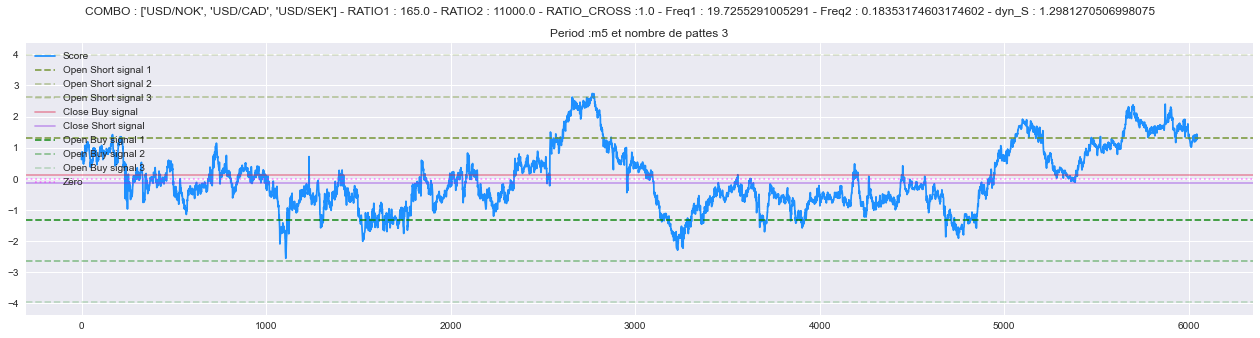

base_pair0 [PAIRE PRINCIPALE]:  (8890, 1)
base_pair1 :  (8890, 1)
base_pair2 :  (8890, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'AUD/USD'] 


Heure locale du début du train :  2020-07-07 22:37:40 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:40:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/SEK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour AUD/USD
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.08449687275023653
AUD/USD  - coef :  0.08169408941309696
TICKERS :  ['USD/SEK', 'EUR/USD', 'AUD/USD']
COEF [0.08449687 0.08169409]
CSTE -0.04420788398070698
Dernière valeur du combo à  0.10777844967317375
Derniere valeur du residu 0.0001858616440772315
Dernière valeur du Score 0.5232324225780487
Mean 1.243677412671203e-18
Std 0.00035521813262538395
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'AUD/USD'] , - Moyenne du spread : 1.243677412671203e-18  - Std Dev du spread :  0.00035521813262538395
La déviation est de : 0.5232324225780487
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identit

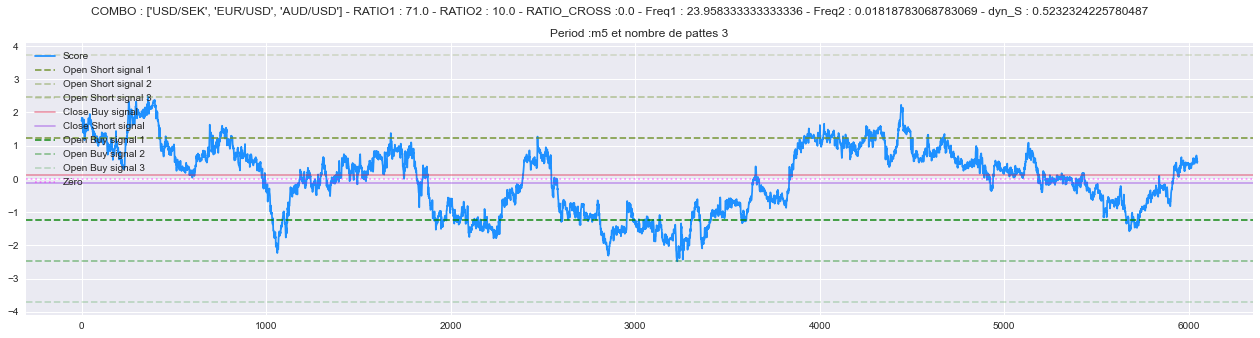

base_pair0 [PAIRE PRINCIPALE]:  (8890, 1)
base_pair1 :  (8890, 1)
base_pair2 :  (8890, 1)

Analyse du pack : ['USD/TRY', 'USD/CHF', 'USD/CNH'] 


Heure locale du début du train :  2020-07-07 22:37:43 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:40:00  <---> split :  2020-07-07 20:30:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Longueur de PAIR (liste des pair) 3
Passage pour USD/TRY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
Passage pour USD/CNH
 USD/TRY   a un kmo donsidéré comme   inadéquat 
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
SCORE < 50
USD/CHF  :  0.06723048231427538
  


LIGNE 512


 
TICKERS :  ['USD/TRY', 'USD/CHF', 'USD/CNH']
COEF [-0.07376248  0.06723048]
CSTE 0.21452988311991178
Dernière valeur du combo à  0.14583020499313953
Derniere valeur du residu 1.563158222520067e-05
Dernière valeur du Score 0.029545985780914864
Mean 6.186262554541629e-18
Std 0.0005290594242176767
 Pour les TICKERS : ['USD/TRY', 'USD/CHF', 'USD/CNH'] , - Moyenne du spread : 6.186262554541629e-18  - Std Dev du spread :  0.0005290594242176767
La déviation est de : 0.029545985780914826
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une identity matrix

Test de coint

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/CAD
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/NOK  - coef :  0.37064675333148756
USD/CAD  - coef :  0.034001485098822046
TICKERS :  ['USD/ZAR', 'USD/NOK', 'USD/CAD']
COEF [0.37064675 0.03400149]
CSTE -0.00555812107353023
Dernière valeur du combo à  0.058477657225915976
Derniere valeur du residu -0.00024247444023601378
Dernière valeur du Score -0.561191977489121
Mean -1.2393176579035364e-17
Std 0.0004320703965172095
 Pour les TICKERS : ['USD/ZAR', 'USD/NOK', 'USD/CAD'] , - Moyenne du spread : -1.2393176579035364e-17  - Std Dev du spread :  0.0004320703965172095
La déviation est de : 0.561191977489121
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matrice de correlation observée n'est pas une id

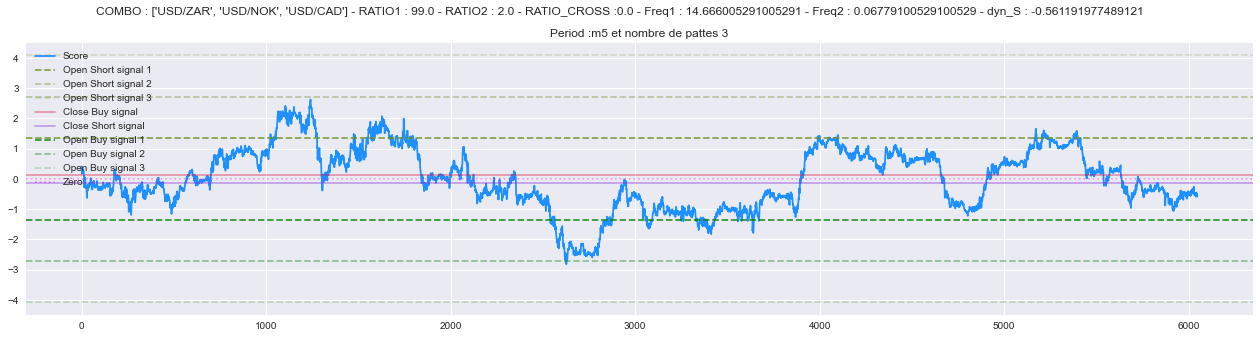

 Le scan avec 3 pattes et la timeframe m5 est non satisfaisante. 

 Nouveau scan avec 4 pattes et la timeframe m5 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement du

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
Passage pour USD/NOK
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  0.5692008340271177
USD/SEK  - coef :  1.532697041905184
USD/NOK  - coef :  0.7742338862981089
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/SEK', 'USD/NOK']
COEF [0.56920083 1.53269704 0.77423389]
CSTE 0.07654480370460237
Dernière valeur du combo à  0.6961258181440958
Derniere valeur du residu -0.0015908181440958957
Dernière valeur du Score -1.074731297511386
Mean -8.154118180199976e-17
Std 0.0014802008165012617
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/SEK', 'USD/NOK'] , - Moyenne du spread : -8.154118180199976e-17  - Std Dev du spread :  0.0014802008165012617
La déviation est de : 1.074731297511386
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA M

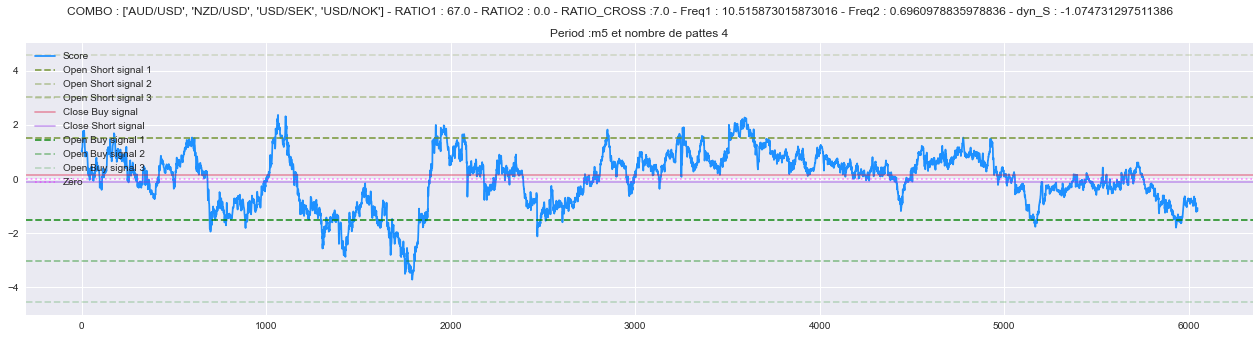

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)

Analyse du pack : ['EUR/USD', 'NZD/USD', 'USD/SEK', 'AUD/USD'] 


Heure locale du début du train :  2020-07-07 22:39:35 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour EUR/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour USD/SEK
Passage pour AUD/USD
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE > 50
NZD/USD  :  4.909844677828548
USD/SEK  :  -0.04529658985865481
TICKERS :  ['EUR/USD', 'NZD/USD', 'USD/SEK', 'AUD/USD']
COEF [ 0.0349025   4.90984468 -0.04529659]
CSTE 0.6080957174498925
Dernière valeur du combo à  1.1294575827671047
Derniere valeur du residu -0.0022075827671046433
Dernière valeur du Score -0.8183868217192284
Mean -2.4612880810473045e-16
Std 0.0026974808348780733
 Pour les TICKERS : ['EUR/USD', 'NZD/USD', 'USD/SEK', 'AUD/USD'] , - Moyenne du spread : -2.4612880810473045e-16  - Std Dev du spread :  0.0026974808348780733
La déviation est de : 0.8183868217192283
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signif

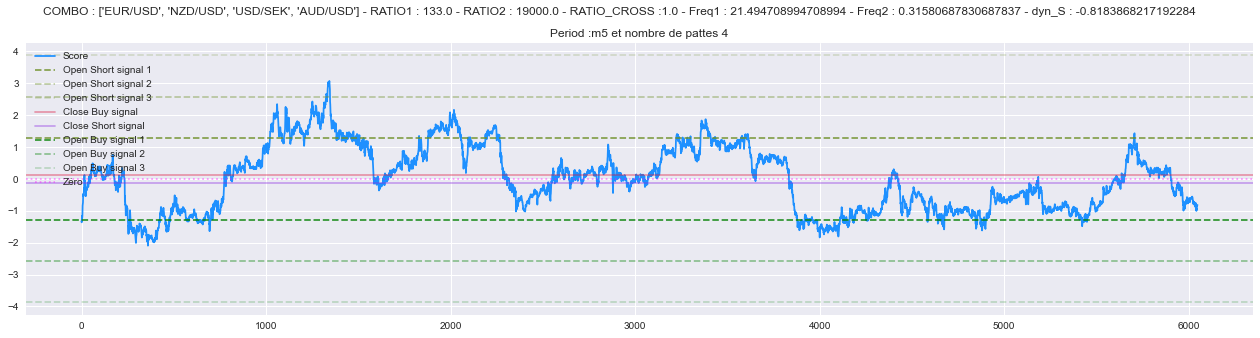

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)

Analyse du pack : ['GBP/USD', 'USD/CAD', 'USD/NOK', 'USD/ZAR'] 


Heure locale du début du train :  2020-07-07 22:39:38 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour GBP/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour USD/NOK
Passage pour USD/ZAR
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : GBP/USD
USD/CAD  - coef :  1.7194203974469102
USD/NOK  - coef :  -0.8675179095533267
USD/ZAR  - coef :  6.29838126614865
TICKERS :  ['GBP/USD', 'USD/CAD', 'USD/NOK', 'USD/ZAR']
COEF [ 1.7194204  -0.86751791  6.29838127]
CSTE -0.2939049809021035
Dernière valeur du combo à  1.2454667166389988
Derniere valeur du residu 0.008618283361001122
Dernière valeur du Score 1.5104513603113303
Mean -9.692423230854541e-17
Std 0.005705766890252488
 Pour les TICKERS : ['GBP/USD', 'USD/CAD', 'USD/NOK', 'USD/ZAR'] , - Moyenne du spread : -9.692423230854541e-17  - Std Dev du spread :  0.005705766890252488
La déviation est de : 1.5104513603113303
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le t

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour USD/CNH
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
AUD/USD  - coef :  0.7689083125202791
EUR/USD  - coef :  -0.03449850407215295
USD/CNH  - coef :  3.318419112635818
TICKERS :  ['NZD/USD', 'AUD/USD', 'EUR/USD', 'USD/CNH']
COEF [ 0.76890831 -0.0344985   3.31841911]
CSTE -0.3145626409202884
Dernière valeur du combo à  0.6531293663585369
Derniere valeur du residu 0.001455633641463061
Dernière valeur du Score 0.8970568275507919
Mean 5.58782884748508e-17
Std 0.0016226771780303811
 Pour les TICKERS : ['NZD/USD', 'AUD/USD', 'EUR/USD', 'USD/CNH'] , - Moyenne du spread : 5.58782884748508e-17  - Std Dev du spread :  0.0016226771780303811
La déviation est de : 0.8970568275507919
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA M

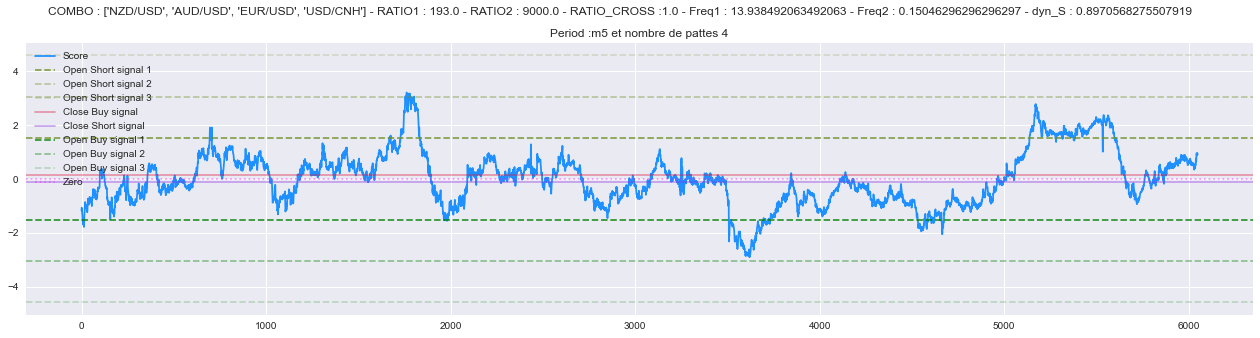

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)

Analyse du pack : ['USD/CAD', 'AUD/USD', 'USD/NOK', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:39:45 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/CAD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour AUD/USD
Passage pour USD/NOK
Passage pour NZD/USD
 USD/CAD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
AUD/USD  - coef :  0.19586174767389244
USD/NOK  - coef :  2.511930842825336
NZD/USD  - coef :  -0.18835236777864628
TICKERS :  ['USD/CAD', 'AUD/USD', 'USD/NOK', 'NZD/USD']
COEF [ 0.19586175  2.51193084 -0.18835237]
CSTE 0.4602707023619121
Dernière valeur du combo à  0.7375901111781518
Derniere valeur du residu -0.0024743672042630838
Dernière valeur du Score -1.5076319553048418
Mean 5.650242178895886e-17
Std 0.0016412276189534769
 Pour les TICKERS : ['USD/CAD', 'AUD/USD', 'USD/NOK', 'NZD/USD'] , - Moyenne du spread : 5.650242178895886e-17  - Std Dev du spread :  0.0016412276189534769
La déviation est de : 1.5076319553048418
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  e

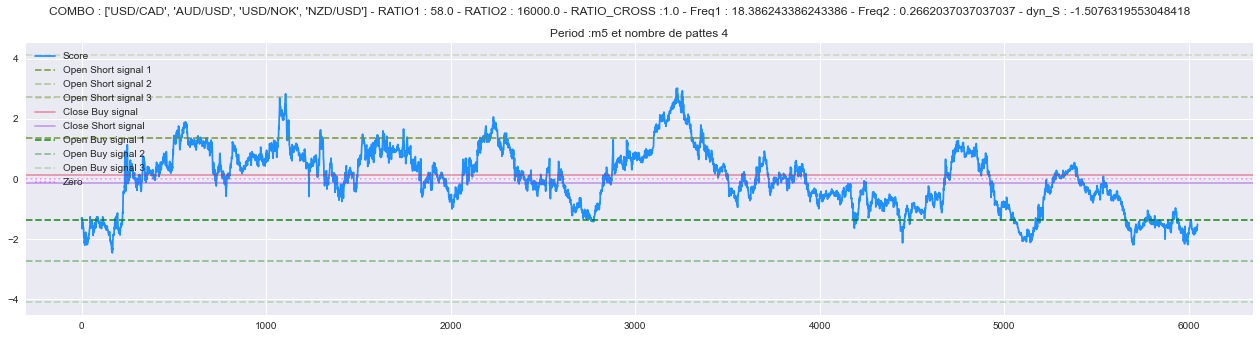

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)

Analyse du pack : ['USD/CHF', 'EUR/USD', 'NZD/USD', 'USD/SEK'] 


Heure locale du début du train :  2020-07-07 22:39:49 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour NZD/USD
Passage pour USD/SEK
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 EUR/USD   a un kmo donsidéré comme   inadéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo donsidéré comme   inadéquat 
SCORE < 50
EUR/USD  :  0.48518457642504476
NZD/USD  :  -6.870284261410966
  


LIGNE 512


 
TICKERS :  ['USD/CHF', 'EUR/USD', 'NZD/USD', 'USD/SEK']
COEF [ 0.85740073  0.48518458 -6.87028426]
CSTE 0.5120049731776698
Dernière valeur du combo à  1.0545167165311449
Derniere valeur du residu 0.00655316022558905
Dernière valeur du Score 1.4452585848950783
Mean -1.17483917949752e-18
Std 0.004534247569312859
 Pour les TICKERS : ['USD/CHF', 'EUR/USD', 'NZD/USD', 'USD/SEK'] , - Moyenne du spread : -1.17483917949752e-18  - Std Dev du spread :  0.004534247569312859
La déviation est de : 1.4452585848950785
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYE

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
Passage pour AUD/USD
 USD/CNH   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo donsidéré comme   inadéquat 
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 AUD/USD   a un kmo donsidéré comme   inadéquat 
SCORE > 50
NZD/USD  :  0.02871837374237792
USD/CHF  :  -0.01236053464459675
TICKERS :  ['USD/CNH', 'NZD/USD', 'USD/CHF', 'AUD/USD']
COEF [ 0.05597065  0.02871837 -0.01236053]
CSTE 0.08348426059851682
Dernière valeur du combo à  0.14200918335338059
Derniere valeur du residu 0.00039197066557158933
Dernière valeur du Score 1.7453321930002148
Mean 2.927919517653976e-18
Std 0.0002245822698645072
 Pour les TICKERS : ['USD/CNH', 'NZD/USD', 'USD/CHF', 'AUD/USD'] , - Moyenne du spread : 2.927919517653976e-18  - Std Dev du spread :  0.0002245822698645072
La déviation est de : 1.7453321930002148
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui signifie que la matric

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/TRY
Passage pour USD/CHF
Passage pour USD/MXN
 USD/JPY   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 50
USD/TRY  :  0.004905008624431687
USD/CHF  :  -0.005519808371518427
TICKERS :  ['USD/JPY', 'USD/TRY', 'USD/CHF', 'USD/MXN']
COEF [-0.02966329  0.00490501 -0.00551981]
CSTE 0.008722306500609837
Dernière valeur du combo à  0.009361231651844916
Derniere valeur du residu -6.279843784147594e-05
Dernière valeur du Score -1.631668797150485
Mean 1.9355016560667153e-18
Std 3.848724566600027e-05
 Pour les TICKERS : ['USD/JPY', 'USD/TRY', 'USD/CHF', 'USD/MXN'] , - Moyenne du spread : 1.9355016560667153e-18  - Std Dev du spread :  3.848724566600027e-05
La déviation est de : 1.631668797150485
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   NON VALIDE  et il n'y a   PAS RETOUR A LA MOYENNE 
  


L

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour GBP/USD
Passage pour USD/ZAR
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/TRY  - coef :  0.3289702621618488
GBP/USD  - coef :  0.03983694330506273
USD/ZAR  - coef :  0.11999289941776105
TICKERS :  ['USD/MXN', 'USD/TRY', 'GBP/USD', 'USD/ZAR']
COEF [0.32897026 0.03983694 0.1199929 ]
CSTE -0.06037576049747999
Dernière valeur du combo à  0.04452239967099396
Derniere valeur du residu -0.0007128049316501017
Dernière valeur du Score -1.9158990206422102
Mean -1.3005836854281142e-17
Std 0.00037204723420713277
 Pour les TICKERS : ['USD/MXN', 'USD/TRY', 'GBP/USD', 'USD/ZAR'] , - Moyenne du spread : -1.3005836854281142e-17  - Std Dev du spread :  0.00037204723420713277
La déviation est de : 1.9158990206422102
Le test est   NON VALIDE  et le résidu  :   NON STATIONNAIRE 
  


LIGNE 550


 
Le test est   

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
Passage pour AUD/USD
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/CAD  - coef :  0.2072066863473934
USD/SEK  - coef :  0.35235200124115207
AUD/USD  - coef :  0.07537319224055045
TICKERS :  ['USD/NOK', 'USD/CAD', 'USD/SEK', 'AUD/USD']
COEF [0.20720669 0.352352   0.07537319]
CSTE -0.13772924765282302
Dernière valeur du combo à  0.10497432166391146
Derniere valeur du residu 0.00035469458414257027
Dernière valeur du Score 0.7592885612792484
Mean -1.4382601517754798e-17
Std 0.00046714069226197176
 Pour les TICKERS : ['USD/NOK', 'USD/CAD', 'USD/SEK', 'AUD/USD'] , - Moyenne du spread : -1.4382601517754798e-17  - Std Dev du spread :  0.00046714069226197176
La déviation est de : 0.7592885612792484
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RET

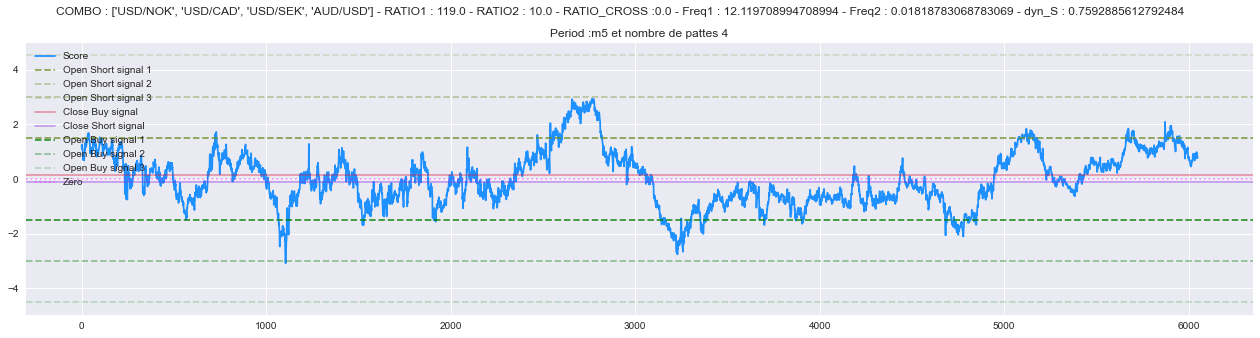

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'AUD/USD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:40:02 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/SEK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour AUD/USD
Passage pour USD/NOK
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.0790858001263264
AUD/USD  - coef :  0.06096603456237744
USD/NOK  - coef :  0.08907053341922462
TICKERS :  ['USD/SEK', 'EUR/USD', 'AUD/USD', 'USD/NOK']
COEF [0.0790858  0.06096603 0.08907053]
CSTE -0.033144111983603924
Dernière valeur du combo à  0.10773011268531468
Derniere valeur du residu 0.0002112406186082355
Dernière valeur du Score 0.6040940573873619
Mean 2.1461466495781848e-17
Std 0.00034968166964231644
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'AUD/USD', 'USD/NOK'] , - Moyenne du spread : 2.1461466495781848e-17  - Std Dev du spread :  0.00034968166964231644
La déviation est de : 0.6040940573873619
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE

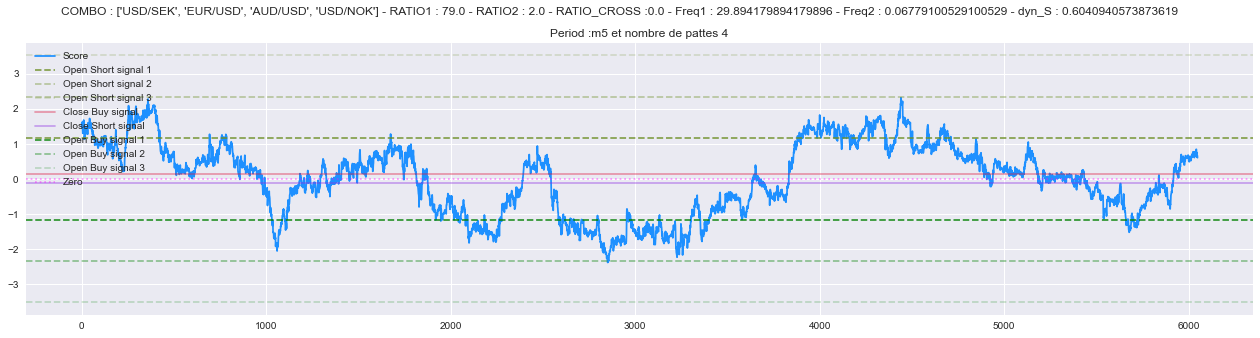

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)

Analyse du pack : ['USD/TRY', 'USD/CHF', 'USD/CNH', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:40:06 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Longueur de PAIR (liste des pair) 4
Passage pour USD/TRY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
Passage pour USD/CNH
Passage pour NZD/USD
 USD/TRY   a un kmo donsidéré comme   inadéquat 
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo donsidéré comme   inadéquat 
 NZD/USD   a un kmo donsidéré comme   inadéquat 
SCORE > 50
USD/CHF  :  -0.9390176462467756
USD/CNH  :  0.09815702885358069
TICKERS :  ['USD/TRY', 'USD/CHF', 'USD/CNH', 'NZD/USD']
COEF [-0.04901535 -0.93901765  0.09815703]
CSTE 0.2672292442735668
Dernière valeur du combo à  0.1457554552345593
Derniere valeur du residu 7.5778026321360326e-06
Dernière valeur du Score 0.01867756377649724
Mean -9.141717365465079e-18
Std 0.0004057168655839709
 Pour les TICKERS : ['USD/TRY', 'USD/CHF', 'USD/CNH', 'NZD/USD'] , - Moyenne du spread : -9.141717365465079e-18  - Std Dev du spread :  0.0004057168655839709
La déviation est de : 0.018677563776497277
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOUR A LA MOYENNE 
 Statistically significant   ce qui

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour USD/SEK
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/NOK  - coef :  0.1129633265985879
USD/CAD  - coef :  0.05109901716883042
USD/SEK  - coef :  0.4886962810365128
TICKERS :  ['USD/ZAR', 'USD/NOK', 'USD/CAD', 'USD/SEK']
COEF [0.11296333 0.05109902 0.48869628]
CSTE -0.04362244127062845
Dernière valeur du combo à  0.058590104744183163
Derniere valeur du residu -0.00035712624379883456
Dernière valeur du Score -0.9813853910234834
Mean -4.222078301319213e-19
Std 0.0003639001019022592
 Pour les TICKERS : ['USD/ZAR', 'USD/NOK', 'USD/CAD', 'USD/SEK'] , - Moyenne du spread : -4.222078301319213e-19  - Std Dev du spread :  0.0003639001019022592
La déviation est de : 0.9813853910234833
Le test est   VALIDE  et le résidu est :   STATIONNAIRE 
Le test est   VALIDE  et il y a :   RETOU

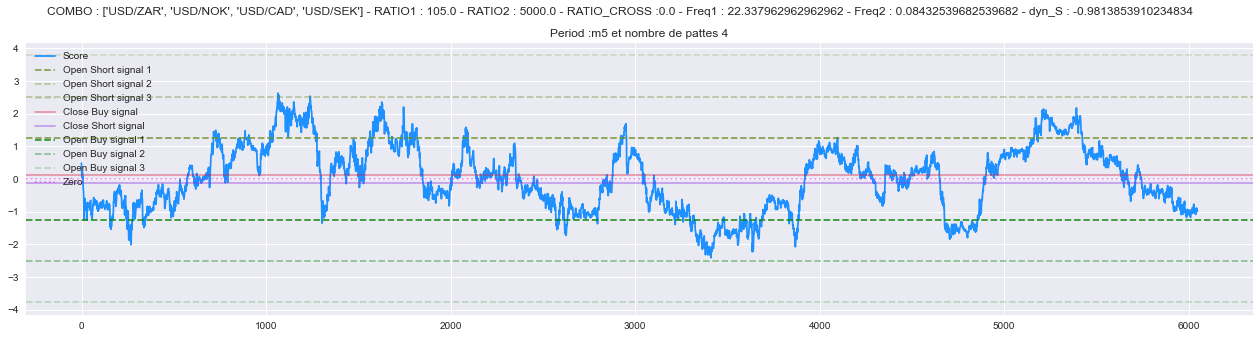

 Le scan avec 4 pattes et la timeframe m5 est non satisfaisante. 

 Nouveau scan avec 5 pattes et la timeframe m5 est non satisfaisante. 

Main Func!
Longueur du BIG_TICKERS =  0
Il y a 13 tickers retenus
Les paires sélectionnées dans BIG_TICKERS sont :
['AUD/USD', 'EUR/USD', 'GBP/USD', 'NZD/USD', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR']
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement du

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/SEK
Passage pour USD/NOK
Passage pour USD/CAD
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : AUD/USD
NZD/USD  - coef :  0.5838480967894842
USD/SEK  - coef :  1.6244375650648517
USD/NOK  - coef :  0.07108972535046632
USD/CAD  - coef :  0.24069944539912136
TICKERS :  ['AUD/USD', 'NZD/USD', 'USD/SEK', 'USD/NOK', 'USD/CAD']
COEF [0.5838481  1.62443757 0.07108973 0.24069945]
CSTE -0.046466044065381795
Dernière valeur du combo à  0.6956798259804035
Derniere valeur du residu -0.0009498259804033848
Dernière valeur du Score -0.6665180538168161
Mean 5.958637463513985e-17
Std 0.0014250566431985832
 Pour les TICKERS : ['AUD/USD', 'NZD/USD', 'USD/SEK', 'USD/NOK', 'USD/CAD'] , - Moyenne du spread : 5.958637463513985e-17  - Std Dev du spread :  0.0014250566431985832
La 

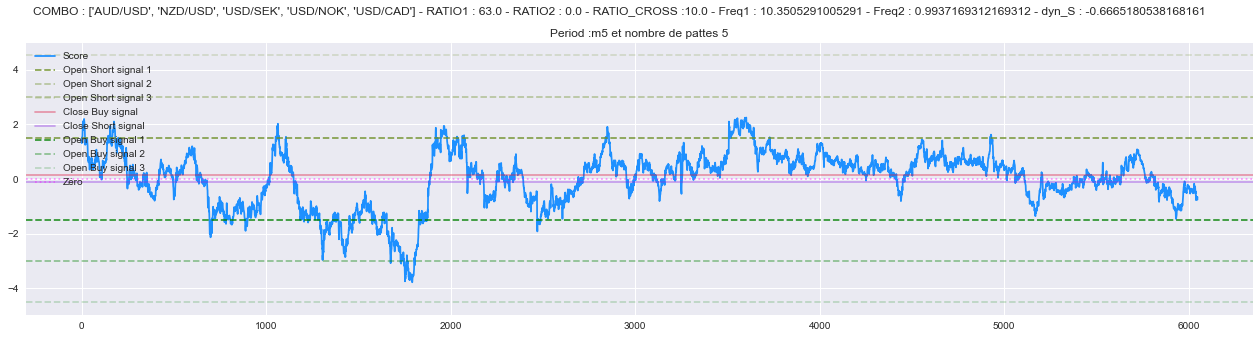

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)
base_pair4 :  (8891, 1)

Analyse du pack : ['EUR/USD', 'NZD/USD', 'USD/SEK', 'AUD/USD', 'USD/NOK'] 


Heure locale du début du train :  2020-07-07 22:41:58 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour EUR/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour USD/SEK
Passage pour AUD/USD
Passage pour USD/NOK
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 50
NZD/USD  :  4.6531221845733155
USD/SEK  :  -0.1257054278319556
AUD/USD  :  0.4822357316590111
TICKERS :  ['EUR/USD', 'NZD/USD', 'USD/SEK', 'AUD/USD', 'USD/NOK']
COEF [ 0.0164585   4.65312218 -0.12570543  0.48223573]
CSTE 0.6525226232726097
Dernière valeur du combo à  1.1291599522980142
Derniere valeur du residu -0.0017299522980143145
Dernière valeur du Score -0.6462140622525424
Mean -3.744799884648345e-18
Std 0.0026770576486437403
 Pour les TICKERS : ['EUR/USD', 'NZD/USD', 'USD/SEK', 'AUD/USD', 'USD/NOK'] , - Moyenne du spread : -3.744799884648345e-18  - Std Dev du spread :  0.0026770576486437403
La déviation est de : 0.6462140622525424
Le test est   VALIDE  et 

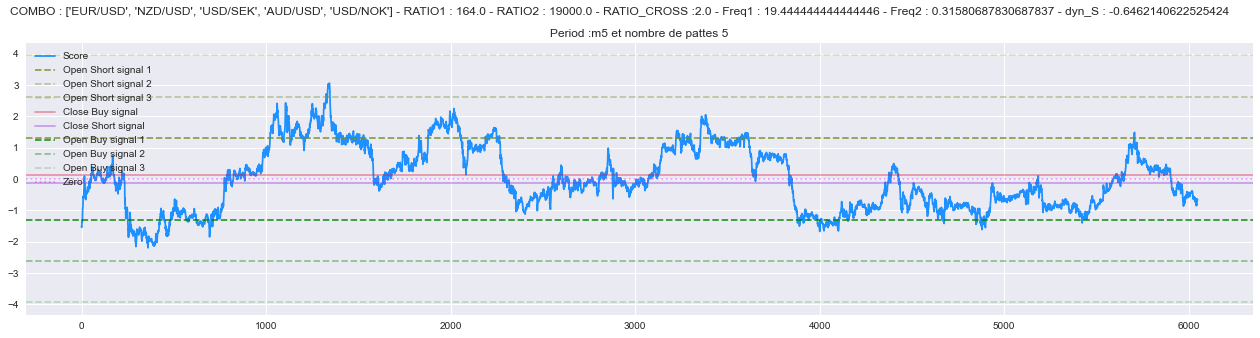

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)
base_pair4 :  (8891, 1)

Analyse du pack : ['GBP/USD', 'USD/CAD', 'USD/NOK', 'USD/ZAR', 'AUD/USD'] 


Heure locale du début du train :  2020-07-07 22:42:02 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour GBP/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour USD/NOK
Passage pour USD/ZAR
Passage pour AUD/USD
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : GBP/USD
USD/CAD  - coef :  1.766349585567242
USD/NOK  - coef :  1.2911661682649553
USD/ZAR  - coef :  6.8546279382416735
AUD/USD  - coef :  -0.8912373755544114
TICKERS :  ['GBP/USD', 'USD/CAD', 'USD/NOK', 'USD/ZAR', 'AUD/USD']
COEF [ 1.76634959  1.29116617  6.85462794 -0.89123738]
CSTE 0.02804518650238519
Dernière valeur du combo à  1.2430158085333174
Derniere valeur du residu 0.011174191466682526
Dernière valeur du Score 2.1030456383589335
Mean 1.176307728471892e-16
Std 0.0053133376008910336
 Pour les TICKERS : ['GBP/USD', 'USD/CAD', 'USD/NOK', 'USD/ZAR', 'AUD/USD'] , - Moyenne du spread : 1.176307728471892e-16  - Std Dev du spread :  0.00531

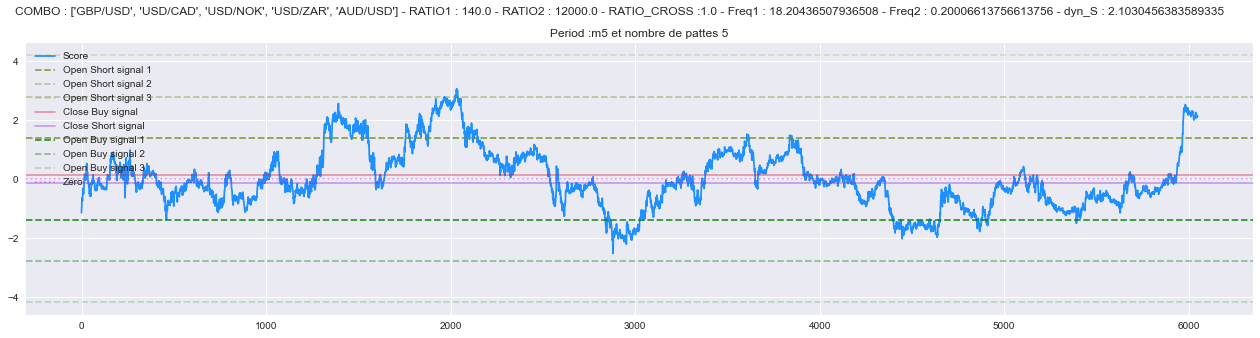

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)
base_pair4 :  (8891, 1)

Analyse du pack : ['NZD/USD', 'AUD/USD', 'EUR/USD', 'USD/CNH', 'USD/CAD'] 


Heure locale du début du train :  2020-07-07 22:42:06 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour NZD/USD


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour AUD/USD
Passage pour EUR/USD
Passage pour USD/CNH
Passage pour USD/CAD
 NZD/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo donsidéré comme   inadéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : NZD/USD
AUD/USD  - coef :  0.675791790999883
EUR/USD  - coef :  -0.05515607407274367
USD/CNH  - coef :  3.7307131474712945
USD/CAD  - coef :  0.12874904855295655
TICKERS :  ['NZD/USD', 'AUD/USD', 'EUR/USD', 'USD/CNH', 'USD/CAD']
COEF [ 0.67579179 -0.05515607  3.73071315  0.12874905]
CSTE -0.38021751064443976
Dernière valeur du combo à  0.6530245341885953
Derniere valeur du residu 0.0017354658114047128
Dernière valeur du Score 1.0855698863553884
Mean 9.973283222203167e-17
Std 0.001598667974506125
 Pour les TICKERS : ['NZD/USD', 'AUD/USD', 'EUR/USD', 'USD/CNH', 'USD/CAD'] , - Moyenne du spread : 9.973283222203167e-17  - Std Dev du spread :  0.

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour NZD/USD
Passage pour GBP/USD
 USD/CAD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/CAD
AUD/USD  - coef :  0.2561022426505529
USD/NOK  - coef :  1.5453931301270176
NZD/USD  - coef :  -0.16840772713322438
GBP/USD  - coef :  0.11469029709624734
TICKERS :  ['USD/CAD', 'AUD/USD', 'USD/NOK', 'NZD/USD', 'GBP/USD']
COEF [ 0.25610224  1.54539313 -0.16840773  0.1146903 ]
CSTE 0.36375072528108543
Dernière valeur du combo à  0.738129578392159
Derniere valeur du residu -0.0028003163318399693
Dernière valeur du Score -1.949783593917527
Mean -7.434529182757744e-18
Std 0.0014362190453216068
 Pour les TICKERS : ['USD/CAD', 'AUD/USD', 'USD/NOK', 'NZD/USD', 'GBP/USD'] , - Moyenne du spread : -7.434529182757744e-18  - Std Dev du spread :  0.0014362190453216068


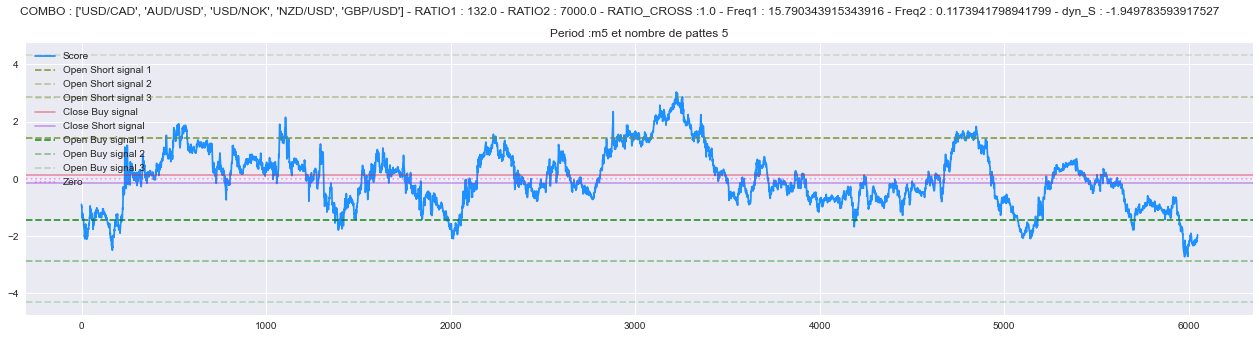

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)
base_pair4 :  (8891, 1)

Analyse du pack : ['USD/CHF', 'EUR/USD', 'NZD/USD', 'USD/SEK', 'AUD/USD'] 


Heure locale du début du train :  2020-07-07 22:42:12 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/CHF


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour NZD/USD
Passage pour USD/SEK
Passage pour AUD/USD
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
SCORE < 50
EUR/USD  :  1.0852337443158926
NZD/USD  :  -4.856012444584642
USD/SEK  :  -0.8726025513619533
  


LIGNE 512


 
TICKERS :  ['USD/CHF', 'EUR/USD', 'NZD/USD', 'USD/SEK', 'AUD/USD']
COEF [ 0.84374894  1.08523374 -4.85601244 -0.87260255]
CSTE 0.5255236095843714
Dernière valeur du combo à  1.056865294748416
Derniere valeur du residu 0.00433970352712576
Dernière valeur du Score 1.005020775337589
Mean 1.6271522636040654e-16
Std 0.004318023700224385
 Pour les TICKERS : ['USD/CHF', 'EUR/USD', 'NZD/USD', 'USD/SEK', 'AUD/USD'] , - Moyenne du spread : 1.6271522636040654e-16  - Std Dev du spread :  0.004318023700224385
La déviation est de : 1.0050207753375893
Le test est 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour NZD/USD
Passage pour USD/CHF
Passage pour AUD/USD
Passage pour EUR/USD
 USD/CNH   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo donsidéré comme   inadéquat 
 AUD/USD   a un kmo donsidéré comme   inadéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
SCORE > 50
NZD/USD  :  0.03287398732447502
USD/CHF  :  0.007484963177708231
AUD/USD  :  -0.01833670967587709
TICKERS :  ['USD/CNH', 'NZD/USD', 'USD/CHF', 'AUD/USD', 'EUR/USD']
COEF [ 0.04719757  0.03287399  0.00748496 -0.01833671]
CSTE 0.09173611924409757
Dernière valeur du combo à  0.14205191401088882
Derniere valeur du residu 0.00035005113623021167
Dernière valeur du Score 1.6190785813859403
Mean -1.2698359412772025e-17
Std 0.00021620392009051137
 Pour les TICKERS : ['USD/CNH', 'NZD/USD', 'USD/CHF', 'AUD/USD', 'EUR/USD'] , - Moyenne du spread : -1.2698359412772025e-17  - Std Dev du spread :  0.00021620392009051137
La déviation est de : 1.6190785813859403
Le test est 

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
Passage pour USD/MXN
Passage pour GBP/USD
 USD/JPY   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo donsidéré comme   inadéquat 
SCORE > 50
USD/TRY  :  0.0036420427381282
USD/CHF  :  -0.02208841894380506
USD/MXN  :  0.001552417022005361
TICKERS :  ['USD/JPY', 'USD/TRY', 'USD/CHF', 'USD/MXN', 'GBP/USD']
COEF [-0.0412498   0.00364204 -0.02208842  0.00155242]
CSTE 0.010544764985939037
Dernière valeur du combo à  0.009375870517029454
Derniere valeur du residu -7.665909015845164e-05
Dernière valeur du Score -2.0259478420154244
Mean 7.423056143895464e-19
Std 3.7838629686631754e-05
 Pour les TICKERS : ['USD/JPY', 'USD/TRY', 'USD/CHF', 'USD/MXN', 'GBP/USD'] , - Moyenne du spread : 7.423056143895464e-19  - Std Dev du spread :  3.7838629686631754e-05
La déviation est de : 2.0259478420154244
Le test est   NON VALIDE  et le résid

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour GBP/USD
Passage pour USD/ZAR
Passage pour USD/NOK
 USD/MXN   a un kmo considéré comme   adéquat 
 USD/TRY   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/MXN
USD/TRY  - coef :  0.30796953866339294
GBP/USD  - coef :  0.02804236435495193
USD/ZAR  - coef :  -0.16369439366094188
USD/NOK  - coef :  0.27910862196611913
TICKERS :  ['USD/MXN', 'USD/TRY', 'GBP/USD', 'USD/ZAR', 'USD/NOK']
COEF [ 0.30796954  0.02804236 -0.16369439  0.27910862]
CSTE -0.05528554882182434
Dernière valeur du combo à  0.044662643283190036
Derniere valeur du residu -0.0008505533369693799
Dernière valeur du Score -2.761966831127757
Mean 1.3386741744508852e-17
Std 0.0003079520461229066
 Pour les TICKERS : ['USD/MXN', 'USD/TRY', 'GBP/USD', 'USD/ZAR', 'USD/NOK'] , - Moyenne du spread : 1.3386741744508852e-17  - Std Dev du spread :  0.00030795204612

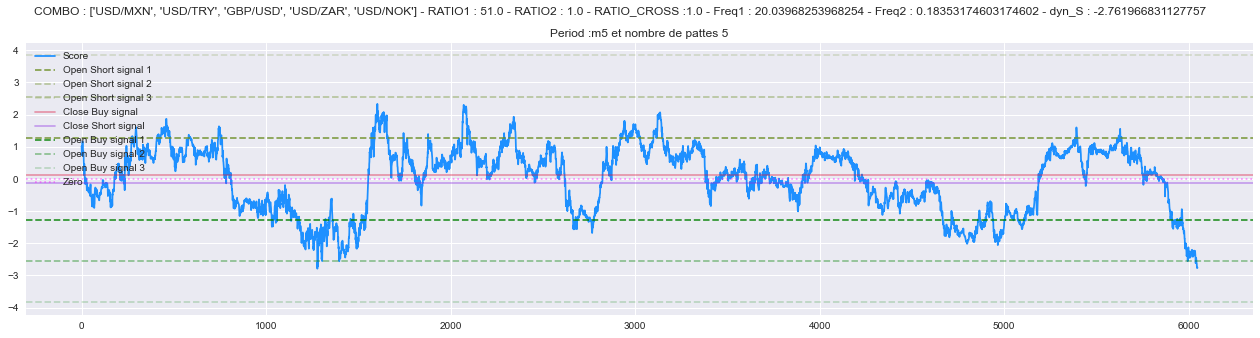

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)
base_pair4 :  (8891, 1)

Analyse du pack : ['USD/NOK', 'USD/CAD', 'USD/SEK', 'AUD/USD', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:42:27 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/NOK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CAD
Passage pour USD/SEK
Passage pour AUD/USD
Passage pour NZD/USD
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/NOK
USD/CAD  - coef :  0.21237783754219955
USD/SEK  - coef :  0.40851409731755345
AUD/USD  - coef :  0.007093981972975227
NZD/USD  - coef :  0.06608755183329282
TICKERS :  ['USD/NOK', 'USD/CAD', 'USD/SEK', 'AUD/USD', 'NZD/USD']
COEF [0.21237784 0.4085141  0.00709398 0.06608755]
CSTE -0.14317198544414642
Dernière valeur du combo à  0.10530003146591266
Derniere valeur du residu 9.720280526281933e-05
Dernière valeur du Score 0.2159260547402198
Mean 1.2464309419981503e-17
Std 0.0004501670971562526
 Pour les TICKERS : ['USD/NOK', 'USD/CAD', 'USD/SEK', 'AUD/USD', 'NZD/USD'] , - Moyenne du spread : 1.2464309419981503e-17  - Std Dev du spread :  0

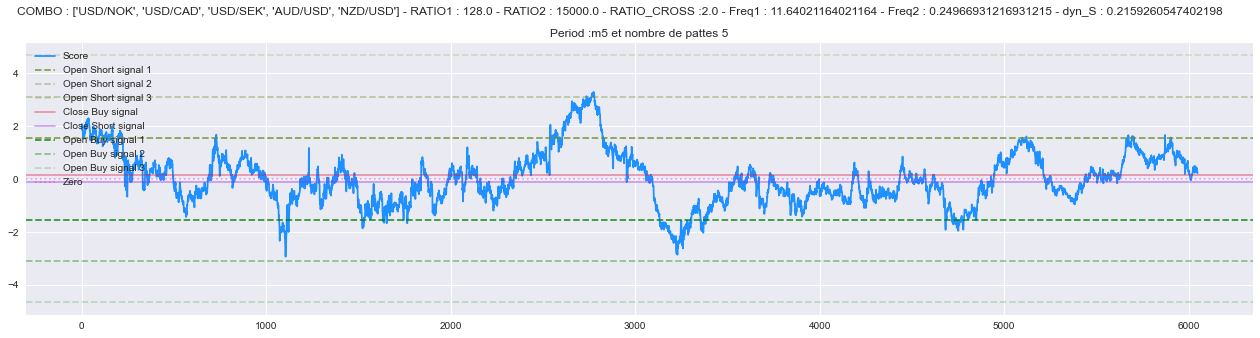

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)
base_pair4 :  (8891, 1)

Analyse du pack : ['USD/SEK', 'EUR/USD', 'AUD/USD', 'USD/NOK', 'NZD/USD'] 


Heure locale du début du train :  2020-07-07 22:42:31 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/SEK


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour EUR/USD
Passage pour AUD/USD
Passage pour USD/NOK
Passage pour NZD/USD
 USD/SEK   a un kmo considéré comme   adéquat 
 EUR/USD   a un kmo considéré comme   adéquat 
 AUD/USD   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 NZD/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/SEK
EUR/USD  - coef :  0.07629873450609229
AUD/USD  - coef :  0.09179788121778974
USD/NOK  - coef :  0.09582180143919833
NZD/USD  - coef :  -0.03585007129894434
TICKERS :  ['USD/SEK', 'EUR/USD', 'AUD/USD', 'USD/NOK', 'NZD/USD']
COEF [ 0.07629873  0.09179788  0.0958218  -0.03585007]
CSTE -0.02881408948521126
Dernière valeur du combo à  0.10760829494830389
Derniere valeur du residu 0.0003549090325153659
Dernière valeur du Score 1.0353159142800945
Mean -1.8962638631577163e-17
Std 0.00034280264373427543
 Pour les TICKERS : ['USD/SEK', 'EUR/USD', 'AUD/USD', 'USD/NOK', 'NZD/USD'] , - Moyenne du spread : -1.8962638631577163e-17  - Std Dev du spre

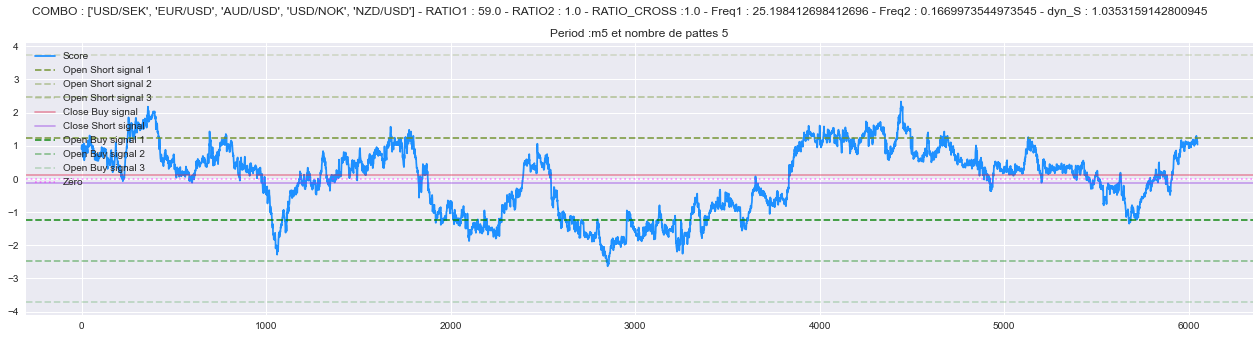

base_pair0 [PAIRE PRINCIPALE]:  (8891, 1)
base_pair1 :  (8891, 1)
base_pair2 :  (8891, 1)
base_pair3 :  (8891, 1)
base_pair4 :  (8891, 1)

Analyse du pack : ['USD/TRY', 'USD/CHF', 'USD/CNH', 'NZD/USD', 'USD/MXN'] 


Heure locale du début du train :  2020-07-07 22:42:35 

 
 
|||| TIME_FRAME <---> debut : 2020-06-04 13:45:00  <---> split :  2020-07-07 20:35:00

Récupération pair0 =>  (6048, 2)
Récupération pair1 =>  (6048, 2)
Récupération pair2 =>  (6048, 2)
Récupération pair3 =>  (6048, 2)
Récupération pair4 =>  (6048, 2)
Longueur de PAIR (liste des pair) 5
Passage pour USD/TRY


C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/CHF
Passage pour USD/CNH
Passage pour NZD/USD
Passage pour USD/MXN
 USD/TRY   a un kmo considéré comme   adéquat 
 USD/CHF   a un kmo considéré comme   adéquat 
 USD/CNH   a un kmo donsidéré comme   inadéquat 
 NZD/USD   a un kmo donsidéré comme   inadéquat 
 USD/MXN   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/TRY
USD/CHF  - coef :  -0.014295181813599117
USD/CNH  - coef :  -0.5889203789939453
NZD/USD  - coef :  0.01817045520470284
USD/MXN  - coef :  0.5129078329737597
TICKERS :  ['USD/TRY', 'USD/CHF', 'USD/CNH', 'NZD/USD', 'USD/MXN']
COEF [-0.01429518 -0.58892038  0.01817046  0.51290783]
CSTE 0.21000304889140747
Dernière valeur du combo à  0.14533836257783325
Derniere valeur du residu 0.0004352946645664879
Dernière valeur du Score 1.2698977028499974
Mean 3.368484209965546e-18
Std 0.0003427793148925023
 Pour les TICKERS : ['USD/TRY', 'USD/CHF', 'USD/CNH', 'NZD/USD', 'USD/MXN'] , - Moyenne du spread : 3.368484209965546e-18  - Std Dev du spread

C:\ProgramData\Anaconda3\envs\fintech_env\lib\site-packages\ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Passage pour USD/NOK
Passage pour USD/CAD
Passage pour USD/SEK
Passage pour GBP/USD
 USD/ZAR   a un kmo considéré comme   adéquat 
 USD/NOK   a un kmo considéré comme   adéquat 
 USD/CAD   a un kmo considéré comme   adéquat 
 USD/SEK   a un kmo considéré comme   adéquat 
 GBP/USD   a un kmo considéré comme   adéquat 
SCORE > 70
Paire principale : USD/ZAR
USD/NOK  - coef :  0.1288467945953147
USD/CAD  - coef :  0.010515279788994254
USD/SEK  - coef :  0.4043876455101864
GBP/USD  - coef :  0.019465931358013493
TICKERS :  ['USD/ZAR', 'USD/NOK', 'USD/CAD', 'USD/SEK', 'GBP/USD']
COEF [0.12884679 0.01051528 0.40438765 0.01946593]
CSTE -0.030654932655302704
Dernière valeur du combo à  0.058730318376795064
Derniere valeur du residu -0.0004914048819652309
Dernière valeur du Score -1.4251158267478834
Mean -6.177084123451805e-18
Std 0.00034481750377203475
 Pour les TICKERS : ['USD/ZAR', 'USD/NOK', 'USD/CAD', 'USD/SEK', 'GBP/USD'] , - Moyenne du spread : -6.177084123451805e-18  - Std Dev du spread 

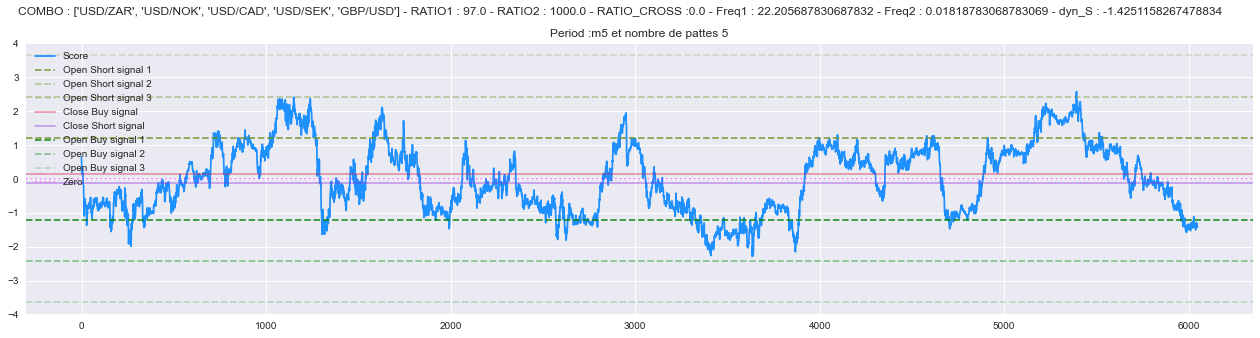

 Le scan est terminé 

 On est dans le else là
Sauvegarde du ficher Log
 TEST AMPLITUDE ---> SUCCESS 

Le combo le plus dévié est :  ['USD/MXN', 'USD/TRY', 'GBP/USD', 'USD/ZAR', 'USD/NOK'] avec un score de 2.761966831127714
Coeficients retenus : [ 0.30796954  0.02804236 -0.16369439  0.27910862]
Mean retenu : 1.3386741744508852e-17
Std retenu : 0.0003079520461229066
Ratio 1 : 51.0
Ratio 2 : 1.0
Ratio Crocs (de Ray): 1.0



In [ ]:
#########################
### CONNEXION A L'API ###
#########################

___Author___='LumberJack Jyss'
print('Global Optimized LumberJack Environment Motor for FOR_EX\nLumberJack Jyss 5780(c)')
print(Fore.BLUE,'°0Oo_D.A.G._26_oO0°')
print(Fore.YELLOW,Back.BLUE,'--- Go!em ForeX #v0.44 ---',Style.RESET_ALL)

for key,val in D.items():
    exec(key + '=val')

sms('Tentative de connexion du FX_Go!em sur le compte '+str(compte))

print('')
try:
    son = pygame.mixer.Sound("init_forex.mp3")
    son.play()

    son = pygame.mixer.Sound("conx_api.mp3")
    son.play()

except:
    engine.say(" Initialisation du Gaulem faurex")
    engine.say("Connexion du Gaulem hà la Péh e")
    engine.runAndWait()

try:
    con.is_connected() == True
    
    try:
        son = pygame.mixer.Sound("alr_connected.mp3")
        son.play()
    except:
        engine.say("already Connected")
        engine.runAndWait()
    print(Fore.GREEN+'Connexion rétablie'+Style.RESET_ALL)
    print('Compte utilisé : ',con.get_account_ids())
    print('')
    
except:
    try:
        con = conX()
        con.is_connected() == True
        print(Fore.GREEN+'Connexion établie'+Style.RESET_ALL)
        print('Compte utilisé : ',con.get_account_ids())
        try:
            son = pygame.mixer.Sound("connected.mp3")
            son.play()
        except:
            engine.say("Connected")
            engine.runAndWait()
    except:
        print(Fore.RED+'Connexion non établie'+Style.RESET_ALL)
        try:
            son = pygame.mixer.Sound("not_connected1.mp3")
            son.play()
            son = pygame.mixer.Sound("not_connected2.mp3")
            son.play()
        except:
            engine.say("Not Connected, sal rass de mor, pitun cé la merd")
            engine.say("vérifi ton internet, é relance le gaulèm")
            engine.runAndWait()
        print('')
        #os._exit(0)
        con = deconX()
        time.sleep(1)
        con = conX()



#########################
####### OPERATIVE #######
#########################
for loop in range(72000):
    #try:
    try:
        son = pygame.mixer.Sound("uograde.mp3")
        son.play()
    except:
        engine.say("ep grade dé daunai")
        engine.runAndWait()
    balance = con.get_accounts().balance
    balance = balance[0]
    equity = con.get_accounts().equity
    equity = equity[0]
    resum = con.get_open_positions()
    usable_margin = con.get_accounts_summary().usableMargin3Perc[0]
    D['balance'] = balance
    D['equity'] = equity
    D['usable_margin'] = usable_margin

    print('Balance : ',balance)

    print('Equity : ',equity)

    print('Marge disponible ;',usable_margin,'%')

    for key,val in D.items():
        exec(key + '=val')

    if len(resum) == 0:
        print('\nPas de position actuellement en cours. Vous pouvez procéder à la suite\n')
        print(Fore.BLUE,'\nTimeframe :',period,' et nombre de pattes ',nb_pattes,'\n',Style.RESET_ALL)
        sms('FX_Go!em begins new train on account '+str(compte))
        try:
            son = pygame.mixer.Sound(".mp3")
            son.play()
            son = pygame.mixer.Sound(".mp3")
            son.play()
            son = pygame.mixer.Sound(".mp3")
            son.play()
        except:
            engine.say("שמירת הלשון?")
            engine.say("ranafoot")
            engine.say("avec Jyss, sa glis")
            engine.runAndWait()
        main_func(D)

    else:
        _answer = 'non'
        _answer = input('Doit-on récupérer les données? (oui - non)')
        if _answer == 'oui' or _answer == 'OUI' or _answer == 'O' or _answer == 'o' or _answer == 'Oui':
            try:
                print('Récupération des données du Log')
                d = shelve.open('varlog'+compte) 
                for key,val in d.items():
                    exec(key + '=val') 
                for key,val in D.items():
                    exec(key + '=val')
                d.close()

                try:
                    dyn_net_pnl = 0
                    for x in OPEN_POZ:
                        dyn_net_pnl += con.get_open_position(str(x)).get_grossPL()
                
                except:
                    dyn_net_pnl = 0
                if dyn_net_pnl >0:
                    print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€ --- ',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')            
                elif dyn_net_pnl <0:
                    print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€ --- ',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
                print('Liste Combo récupérés',TICKERS)
                print('Reprise de la boucle en mode continuum')
                print(Fore.BLUE,'\nTimeframe :',period,' et nombre de pattes \n',nb_pattes,Style.RESET_ALL)
                
                try:
                    son = pygame.mixer.Sound("chmirat.mp3")
                    son.play()
                    son = pygame.mixer.Sound("ra_foot.mp3")
                    son.play()
                    son = pygame.mixer.Sound("jyss.mp3")
                    son.play()
                except:
                    engine.say("שמירת הלשון?")
                    engine.say("ranafoot")
                    engine.say("avec Jyss, sa glis")
                    engine.runAndWait()

                continuum(D)


            except:
                print(Back.BLACK,Fore.YELLOW,'/!\ ATTENTION /!\ On ne trouve pas de pas de fichier Log. Du coup, on repart à 0. Vérifier tout de même.\
                 On repart de 0!')
                main_func(D)

        else:
            print(Back.BLACK,Fore.YELLOW,'/!\ ATTENTION /!\ On ne récupère pas de pas de fichier Log. Du coup, on repart à 0. Vérifier tout de même')
            
            print(Fore.BLUE,'\nTimeframe :',period,' et nombre de pattes ',nb_pattes,'\n',Style.RESET_ALL)
            
            try:
                os.remove('varlog01215059.bak')
            except:
                print('Fichier varlog01215059.bak non effacé')
            
            try:
                os.remove('varlog01215059.dat')
            except:
                print('Fichier varlog01215059.dat non effacé')
            
            try:
                os.remove('varlog01215059.dir')
            except:
                print('Fichier varlog01215059.dir non effacé')
            
            if (len(resum)%nb_pattes) != 0:
                print(Back.LIGHTYELLOW_EX,Fore.BLACK,'\nAnomalie détectée. Contrôle tes posoitions conseillé\n',Style.RESET_ALL)
                sms('FX_Go!em detects anomaly on account '+str(compte))
                try:
                    son = pygame.mixer.Sound("mank_patt.mp3")
                    son.play()

                    son = pygame.mixer.Sound("chmirat.mp3.mp3")
                    son.play()
                    son = pygame.mixer.Sound("ra_treuf.mp3")
                    son.play()
                    son = pygame.mixer.Sound("jyss.mp3")
                    son.play()
                except:
                    engine.say("pitun cé la merd, el munk dé  pat, tutai neekai ")
                    engine.runAndWait()
                    
                    engine.say("שמירת הלשון?")
                    engine.say("ranafoot")
                    engine.say("avec Jyss, sa glis")
                    engine.runAndWait()

            main_func(D)
        
'''
    except:
        print('Avarie')
        try:
            son = pygame.mixer.Sound("failed1.mp3")
            son.play()
            son = pygame.mixer.Sound("failed2.mp3")
            son.play()
            son = pygame.mixer.Sound("failed3.mp3")
            son.play()
            son = pygame.mixer.Sound("fail4.mp3")
            son.play()
        except:
            engine.say("failed, sa mer la pitit put de salaup an slip ble, devan le prizunic")
            engine.say("שמירת הלשון?")
            engine.say("ranafoot, I tell wahat I want, tu konpran sa??")
            engine.say("aipee, detlai manier, manfu, avec Jyss, sa glis")
            engine.runAndWait()
            sms('Problème détecté par le FX_Go!em sur le compte '+str(compte))
'''

In [ ]:
len(OPEN_POZ),OPEN_POZ,BIG_TICKERS

In [ ]:
S

In [ ]:
dyn_net_pnl

In [ ]:
con = conX()

In [ ]:
close_all(D)

In [ ]:
from tkinter import *
window = Tk()
window.title("Welcome to LikeGeeks app")
lbl = Label(window, text="Hello")
lbl.grid(column=0, row=0)
window.mainloop()

In [ ]:
for x in range(nb_pattes):
    con.subscribe_market_data(TICKERS[x])
    con.subscribe_instrument(TICKERS[x])
    if TICKERS[x] == 'BTC/USD':
        globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
        globals()['mise%s' % x] = mise / 100
    elif TICKERS[x] == 'USD/ZAR':
        globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
        globals()['mise%s' % x] = mise / 1000
    elif TICKERS[x] == 'ETH/USD' or TICKERS[x] == 'BCH/USD':
        globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
        globals()['mise%s' % x] = mise / 10
    elif TICKERS[x] == 'XAU/USD' or TICKERS[x] == 'XAG/USD' or TICKERS[x] == 'XLM/USD' or TICKERS[x] == 'EOS/USD' or TICKERS[x] == 'XRP/USD' \
    or TICKERS[x] == 'LTC/USD':
        
        globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
        globals()['mise%s' % x] = mise
    else:
        globals()['delta%s' % x] = (con.get_last_price(TICKERS[x]).Ask - con.get_last_price(TICKERS[x]).Bid) * globals()['mise%s' % x]
        globals()['mise%s' % x] = mise / 1000

for x in range(nb_pattes):
    try:
        if '/USD' in TICKERS[0]:
            m0 = mise0
        if 'USD/' in TICKERS[0]:
            m0 = mise0 / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)
        _spread = _spread + delta0
        
    except:
        print(TICKERS[0],' => NON VALIDE')

    for x in range(nb_pattes):
        if x == 0:
            continue
        try:
            if '/USD' in TICKERS[x]:
                globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1])
                
            if 'USD/' in TICKERS[x]:
                globals()['m%s' % x] = globals()['mise%s' % x] * (coef[x-1]) / ((con.get_last_price(TICKERS[x]).Bid+con.get_last_price(TICKERS[x]).Ask)/2)

            globals()['delta%s' % x] = globals()['delta%s' % x] * (coef[x-1])
            _spread = _spread + (globals()['delta%s' % x])

        except:
            print(TICKERS[x],' => NON VALIDE')


for key,val in D.items():
    exec(key + '=val')

print('Le coût du spread en $ est de :',_spread)

In [ ]:
######################################################################################################################################################################
######################################################################################################################################################################
#############################################     A     R     C     H     I     V     E     S    #####################################################################
######################################################################################################################################################################
######################################################################################################################################################################

In [ ]:
import shelve

d = shelve.open('varlog'+compte)  # open -- file may get suffix added by low-level
                           # library

d[key] = data              # store data at key (overwrites old data if
                           # using an existing key)
data = d[key]              # retrieve a COPY of data at key (raise KeyError
                           # if no such key)
del d[key]                 # delete data stored at key (raises KeyError
                           # if no such key)

flag = key in d            # true if the key exists
klist = list(d.keys())     # a list of all existing keys (slow!)

# as d was opened WITHOUT writeback=True, beware:
d['xx'] = [0, 1, 2]        # this works as expected, but...
d['xx'].append(3)          # *this doesn't!* -- d['xx'] is STILL [0, 1, 2]!

# having opened d without writeback=True, you need to code carefully:
temp = d['xx']             # extracts the copy
temp.append(5)             # mutates the copy
d['xx'] = temp             # stores the copy right back, to persist it

# or, d=shelve.open(filename,writeback=True) would let you just code
# d['xx'].append(5) and have it work as expected, BUT it would also
# consume more memory and make the d.close() operation slower.

d.close()                  # close it


In [ ]:
VARIABLES = ['_os', 'ol', 'cs', 'cl', 'buy1', 'buy2', 'buy3', 'sell1', 'sell2', 'sell3', 'nbposs', 'nbposl', 'nbpos', 'nbre_trade', 'nbre_trade_long', 'nbre_trade_short', 'pnll', 'pnls', 'amplitude', 'cste', 'mise', 'mark', 'lim_s1', 'lim_s2', 'lim_s3', 'lim_l1', 'lim_l2', 'lim_l3', 'lim_cs', 'lim_cl', 'dyn_S', '_mean', '_std', 'big_len', 'chi_square_value', 'p_value', 'ev', 'v', 'jh_results', 'v1', 'v2', 'skew', 'kurtosis', 'dynf', 'residu', 'p0ol', 'p1ol', 'p2ol', 'p3ol', 'p4ol', 'p0os', 'p1os', 'p2os', 'p3os', 'p4os', 'debut', 'fin', 'split', 'pair', 'pair0', 'pair1', 'pair2', 'pair3', 'pair4', 'coef', 'S', 'PAIR', 'CSTE', 'DYNS', 'BIG_TICKERS', 'INDEX', 'INSTRUMENTS', 'PACK', 'SL_PACK', 'SHORT_LIST', 'TOKEN', 'server', 'user_id', 'compte', 'password', 'period', 'number', 'invers', 'diloug', 'break_it', 'stop', 'full_stop', 'sens', 'name', 'dyn_net_pnl', 'amplitude','mark', 'lim_cl', 'lim_cs', 'lim_l1', 'lim_l2', 'lim_l3', 'lim_s1', 'lim_s2', 'lim_s3', 'dyn_S', 'dynf', 'DYNS', 'deviamax', '_os', 'ol', 'cs', 'cl', 'buy1', 'buy2', 'buy3', 'sell1', 'sell2', 'sell3', 'nbposs', 'nbposl', 'nbpos', 'nbre_trade', 'nbre_trade_long', 'nbre_trade_short', 'pnll', 'pnls', 'p0ol', 'p1ol', 'p2ol', 'p3ol', 'p4ol', 'p0os', 'p1os', 'p2os', 'p3os', 'p4os', 'mark', 'sens', 'deviamax', '_os', 'ol', 'cs', 'cl', 'buy1', 'buy2', 'buy3', 'sell1', 'sell2', 'sell3', 'nbposs', 'nbposl', 'nbpos', 'nbre_trade', 'nbre_trade_long', 'nbre_trade_short', 'pnll', 'pnls', 'residu', 'amplitude', 'cste', 'mise', 'mark', 'lim_s1', 'lim_s2', 'lim_s3', 'lim_l1', 'lim_l2', 'lim_l3', 'lim_cs', 'lim_cl', 'dyn_S', '_mean', '_std', 'big_len', 'kmo_all', 'chi_square_value', 'p_value', 'ev', 'v', 'jh_results', 'v1', 'v2', 'skew', 'kurtosis', 'df', 'residu', 'p0ol', 'p1ol', 'p2ol', 'p3ol', 'p4ol', 'p0os', 'p1os', 'p2os', 'p3os', 'p4os', 'debut', 'fin', 'split', 'base_pair0', 'base_pair1', 'base_pair2', 'base_pair3', 'base_pair4', 'pair', 'pair0', 'pair1', 'pair2', 'pair3', 'pair4', 'coef', 'S', 'PAIR', 'CSTE', 'DYNS', 'TICKERS', 'BIG_TICKERS', 'TIME_FRAME', 'INDEX', 'INSTRUMENTS', 'PACK', 'SL_PACK', 'SHORT_LIST', 'TOKEN', 'server', 'user_id', 'compte', 'password', 'period', 'number', 'invers', 'diloug', 'break_it', 'stop', 'full_stop', 'sens', 'name', 'dyn_net_pnl', 'deviamax', 'mise', 'sens', 'dyn_net_pnl' ]
print(len(VARIABLES))
VARIABLES = list(set(VARIABLES))
print(len(VARIABLES))
print('')
print(VARIABLES)


In [ ]:
def def_mise():
    
    # DEPRECATED SINCE v0.37

    if '/USD' in TICKERS[0]:
        mise = target/_std
        mise = abs(round(mise))
        print('\n Mise en devise :',abs(mise),'pour une target par déviation de',target,'$ \n')
    if 'USD/' in TICKERS[0]:
        mise = ((target/_std) * 2) / (con.get_last_price(TICKERS[0]).Bid + con.get_last_price(TICKERS[0]).Ask)
        mise = abs(round(mise))
        print('\n Mise en devise :',abs(mise),'pour une target par déviation de',target,'$ \n')


    # DEPRECATED SINCE V0.34
    
    taux_pond_list = []
    expo_list = []
    taux = []

    if '/USD' in TICKERS[0]:
        taux.append((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)
    if 'USD/' in TICKERS[0]:
        taux.append(1/((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))

    if '/USD' in TICKERS[1]:
        taux.append((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2)
    if 'USD/' in TICKERS[1]:
        taux.append(1/((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2))

    if '/USD' in TICKERS[2]:
        taux.append((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2)
    if 'USD/' in TICKERS[2]:
        taux.append(1/((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2))

    if '/USD' in TICKERS[3]:
        taux.append((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2)
    if 'USD/' in TICKERS[3]:
        taux.append(1/((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2))

    if '/USD' in TICKERS[4]:
        taux.append((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2)
    if 'USD/' in TICKERS[4]:
        taux.append(1/((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2))

    taux_pond_list.append(taux[0])
    for t in range(1,5):
        taux_pond_list.append(abs(coef[t-1] * taux[t]))

    mise = (balance * 4)/(sum(taux_pond_list))
    
    '''
    if '/USD' in TICKERS[0]:
        mise = (balance * 2)/(sum(taux_pond_list))
    if 'USD/' in TICKERS[0]:
        mise = (balance * 2)/(abs(coef[0]) + abs(coef[1]) + abs(coef[2]) + abs(coef[3]))
        '''

    return(mise)

In [ ]:
def _dyns_close(D):
    global nbre_trade, PAIR, mise, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, p3ol, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, base_pair0, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, base_pair2, base_pair1, user_id, p0ol, sell1, sell2, p_value, p2os, buy3, jh_results, TICKERS, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, daf, p1ol, diloug, p4ol, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, base_pair4, deviamax, password, pair2, TIME_FRAME, p2ol, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, base_pair3, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu,take_profit
    
    for key,val in D.items():
        exec(key + '=val')
     
    print(Back.LIGHTBLUE_EX,Fore.YELLOW,' C A L C U L    D E    D Y N _ S ',Style.RESET_ALL)

    print('\n\nTAILLES DES POSITIONS (coef x mise en devise en valeur relative):')
    try:
        if '/USD' in TICKERS[0]:
            print(TICKERS[0],' : ', mise)
        if 'USD/' in TICKERS[0]:
            print(TICKERS[0],' : ', mise / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
    except:
        print(TICKERS[0],' => NON VALIDE')

    try:
        if '/USD' in TICKERS[1]:
            print(TICKERS[1],' : ', mise * (coef[0]))
        if 'USD/' in TICKERS[1]:
            print(TICKERS[1],' : ', mise * (coef[0]) / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2))
    except:
        print(TICKERS[1],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[2]:
            print(TICKERS[2],' : ', mise * (coef[1]))
        if 'USD/' in TICKERS[2]:
            print(TICKERS[2],' : ', mise * (coef[1]) / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2))
    except:
        print(TICKERS[2],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[3]:
            print(TICKERS[3],' : ', mise * (coef[2]))
        if 'USD/' in TICKERS[3]:
            print(TICKERS[3],' : ', mise * (coef[2]) / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2))
    except:
        print(TICKERS[3],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[4]:
            print(TICKERS[4],' : ', mise * (coef[3]))
        if 'USD/' in TICKERS[4]:
            print(TICKERS[4],' : ', mise * (coef[3]) / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2))
    except:
        print(TICKERS[4],' => NON VALIDE')
    print('\n')

    print('Le Score max est : ',max(S),' et le Score min : ',min(S))

    mark = -1
   
    if '/USD' in TICKERS[0]:
        dyn_pair0  = scrap_close(ticker=TICKERS[0],invers = 'non')
    if 'USD/' in TICKERS[0]:
        dyn_pair0  = scrap_close(ticker=TICKERS[0],invers = 'oui')
    dyn_pair0 ['Local time'] = dyn_pair0 .index
    dyn_pair0 .reset_index(drop=True, inplace=True)
    D['dyn_pair0'] = dyn_pair0
    #dyn_pair0  = dyn_pair0 .iloc[-576:,:]
    if '/USD' in TICKERS[1]:
        dyn_pair1  = scrap_close(ticker=TICKERS[1],invers = 'non')
    if 'USD/' in TICKERS[1]:
        dyn_pair1  = scrap_close(ticker=TICKERS[1],invers = 'oui')
    dyn_pair1['Local time'] = dyn_pair1.index
    dyn_pair1.reset_index(drop=True, inplace=True)
    D['dyn_pair1'] = dyn_pair1
    #dyn_pair1 = dyn_pair1.iloc[-576:,:]
    if '/USD' in TICKERS[2]:
        dyn_pair2  = scrap_close(ticker=TICKERS[2],invers = 'non')
    if 'USD/' in TICKERS[2]:
        dyn_pair2  = scrap_close(ticker=TICKERS[2],invers = 'oui')
    dyn_pair2['Local time'] = dyn_pair2.index
    dyn_pair2.reset_index(drop=True, inplace=True)
    D['dyn_pair2'] = dyn_pair2
    #dyn_pair2 = dyn_pair2.iloc[-576:,:]
    if '/USD' in TICKERS[3]:
        dyn_pair3  = scrap_close(ticker=TICKERS[3],invers = 'non')
    if 'USD/' in TICKERS[3]:
        dyn_pair3  = scrap_close(ticker=TICKERS[3],invers = 'oui')
    dyn_pair3['Local time'] = dyn_pair3.index
    dyn_pair3.reset_index(drop=True, inplace=True)
    D['dyn_pair3'] = dyn_pair3
    #dyn_pair3 = dyn_pair3.iloc[-576:,:]
    if '/USD' in TICKERS[4]:
        dyn_pair4  = scrap_close(ticker=TICKERS[4],invers = 'non')
    if 'USD/' in TICKERS[4]:
        dyn_pair4  = scrap_close(ticker=TICKERS[4],invers = 'oui')
    dyn_pair4['Local time'] = dyn_pair4.index
    dyn_pair4.reset_index(drop=True, inplace=True)
    D['dyn_pair4'] = dyn_pair4
    #dyn_pair4 = dyn_pair4.iloc[-576:,:]


    dynf = pd.DataFrame()
    dynf[TICKERS[0]] = list(dyn_pair0['Close'])
    dynf[TICKERS[1]] = list(dyn_pair1['Close'])
    dynf[TICKERS[2]] = list(dyn_pair2['Close'])
    dynf[TICKERS[3]] = list(dyn_pair3['Close'])
    dynf[TICKERS[4]] = list(dyn_pair4['Close'])

    #dynamic_df = df[df.index <= dyn_pair1.iloc[mark]['Local time']]
    print(Fore.MAGENTA,'')
    print('(Heure correspondant à la dernière bougie récupérée)')
    print(Style.RESET_ALL,'')
    print(Back.RED,Fore.BLACK,' A C T I V A T I O N   D U   D Y N _ C O M B O   E T   D E S   L I M I T E S',Style.RESET_ALL,'\n')
    
    dynamic_combo = coef[0] * dynf[TICKERS[1]] + coef[1] * dynf[TICKERS[2]] + coef[2] * dynf[TICKERS[3]] + coef[3] * dynf[TICKERS[4]] + cste

    dynamic_residu = dynf[TICKERS[0]] - dynamic_combo
    dyn_S = (dynamic_residu - _mean)/_std
    D['dynf'] = dynf
    D['dynamic_combo'] = dynamic_combo
    D['dynamic_residu'] = dynamic_residu
    
    #DYNS.append(dyn_S.reset_index(drop=True).iloc[-2016:])
    #DYNS = dyn_S.reset_index(drop=True).iloc[-2016:]
    dyn_S = dyn_S.iloc[-1]
    DYNS.append(dyn_S)
    D['dyn_S'] = dyn_S
    D['DYNS'] = DYNS

    lim_s1 = 1 
    lim_s2 = 2 
    lim_s3 = 3
    print('Limite short 1 : ',lim_s1,'Limite short 2 : ',lim_s2,'Limite short 3 : ',lim_s3)
    lim_l1 = -1 
    lim_l2 = -2 
    lim_l3 = -3 
    print('Limite long 1 : ',lim_l1,'Limite long 2 : ',lim_l2,'Limite long 3 : ',lim_l3)
    lim_cs = -0.13 
    print('Limite close short : ',lim_cs)
    lim_cl = 0.13 
    print('Limite close long : ',lim_cl)

    D['lim_s1'] = lim_s1
    D['lim_s2'] = lim_s2
    D['lim_s3'] = lim_s3
    D['lim_l1'] = lim_l1
    D['lim_l2'] = lim_l2
    D['lim_l3'] = lim_l3
    D['li_cs'] = lim_cs
    D['lim_cl'] = lim_cl

    

    print(Back.LIGHTBLUE_EX,Fore.YELLOW,'Dyn_S : ',dyn_S,Style.RESET_ALL)
    print('Pour mémoire le spread (résidu) dynamique est de :',dynamic_residu.iloc[-1])

    for key,val in D.items():
        exec(key + '=val')

    plt.ion()
    plt.figure(figsize=(22,5)) 
    plt.plot(DYNS,label='Score')
    plt.axhline(y=lim_s1,c='olivedrab',alpha=0.8,linestyle='--',label='Open Short signal 1')
    plt.axhline(y=lim_s2,c='olivedrab',alpha=0.4,linestyle='--',label='Open Short signal 2')
    plt.axhline(y=lim_s3,c='olivedrab',alpha=0.2,linestyle='--',label='Open Short signal 3')
    plt.axhline(y=lim_cl,c='crimson',alpha=0.4,linestyle='-',label='Close Buy signal')
    plt.axhline(y=lim_cs,c='blueviolet',alpha=0.4,linestyle='-',label='Close Short signal')
    plt.axhline(y=lim_l1,c='green',alpha=0.8,linestyle='--',label='Open Buy signal 1')
    plt.axhline(y=lim_l2,c='green',alpha=0.4,linestyle='--',label='Open Buy signal 2')
    plt.axhline(y=lim_l3,c='green',alpha=0.2,linestyle='--',label='Open Buy signal 3')
    plt.axhline(y=(lim_cl+lim_cs)/2,c='magenta',alpha=0.4,linestyle=':',label='Zéro')
    plt.legend(loc='upper left)
    plt.suptitle('Plot Signaux Achat / Vente sur le Score -- Compte :'+user_id+' - ('+compte+')')
    plt.title('Period :'+period+' et nombre de pattes '+str(nb_pattes))
    plt.pause(0.05)
    
    return(D)

def _dyns(D): 
    global nbre_trade, PAIR, mise, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, p3ol, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, base_pair0, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, base_pair2, base_pair1, user_id, p0ol, sell1, sell2, p_value, p2os, buy3, jh_results, TICKERS, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, daf, p1ol, diloug, p4ol, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, base_pair4, deviamax, password, pair2, TIME_FRAME, p2ol, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, base_pair3, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu,take_profit
    for key,val in D.items():
        exec(key + '=val')
     
    print(Back.LIGHTBLUE_EX,Fore.YELLOW,' C A L C U L    D E    D Y N _ S ',Style.RESET_ALL)

    print('\n\nTAILLES DES POSITIONS (coef x mise en devise):')
    try:
        if '/USD' in TICKERS[0]:
            print(TICKERS[0],' : ', mise)
        if 'USD/' in TICKERS[0]:
            print(TICKERS[0],' : ', mise / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
    except:
        print(TICKERS[0],' => NON VALIDE')

    try:
        if '/USD' in TICKERS[1]:
            print(TICKERS[1],' : ', mise * (coef[0]))
        if 'USD/' in TICKERS[1]:
            print(TICKERS[1],' : ', mise * (coef[0]) / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2))
    except:
        print(TICKERS[1],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[2]:
            print(TICKERS[2],' : ', mise * (coef[1]))
        if 'USD/' in TICKERS[2]:
            print(TICKERS[2],' : ', mise * (coef[1]) / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2))
    except:
        print(TICKERS[2],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[3]:
            print(TICKERS[3],' : ', mise * (coef[2]))
        if 'USD/' in TICKERS[3]:
            print(TICKERS[3],' : ', mise * (coef[2]) / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2))
    except:
        print(TICKERS[3],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[4]:
            print(TICKERS[4],' : ', mise * (coef[3]))
        if 'USD/' in TICKERS[4]:
            print(TICKERS[4],' : ', mise * (coef[3]) / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2))
    except:
        print(TICKERS[4],' => NON VALIDE')
    print('\n')

    print('Le Score max est : ',max(S),' et le Score min : ',min(S))

    mark = -1
    if '/USD' in TICKERS[0]:
        dyn_pair0  = scrap_hist(ticker=TICKERS[0],invers = 'non')
    if 'USD/' in TICKERS[0]:
        dyn_pair0  = scrap_hist(ticker=TICKERS[0],invers = 'oui')
    dyn_pair0 ['Local time'] = dyn_pair0 .index
    dyn_pair0 .reset_index(drop=True, inplace=True)
    D['dyn_pair0'] = dyn_pair0
    #dyn_pair0  = dyn_pair0 .iloc[-576:,:]
    if '/USD' in TICKERS[1]:
        dyn_pair1  = scrap_hist(ticker=TICKERS[1],invers = 'non')
    if 'USD/' in TICKERS[1]:
        dyn_pair1  = scrap_hist(ticker=TICKERS[1],invers = 'oui')
    dyn_pair1['Local time'] = dyn_pair1.index
    dyn_pair1.reset_index(drop=True, inplace=True)
    D['dyn_pair1'] = dyn_pair1
    #dyn_pair1 = dyn_pair1.iloc[-576:,:]
    if '/USD' in TICKERS[2]:
        dyn_pair2  = scrap_hist(ticker=TICKERS[2],invers = 'non')
    if 'USD/' in TICKERS[2]:
        dyn_pair2  = scrap_hist(ticker=TICKERS[2],invers = 'oui')
    dyn_pair2['Local time'] = dyn_pair2.index
    dyn_pair2.reset_index(drop=True, inplace=True)
    D['dyn_pair2'] = dyn_pair2
    #dyn_pair2 = dyn_pair2.iloc[-576:,:]
    if '/USD' in TICKERS[3]:
        dyn_pair3  = scrap_hist(ticker=TICKERS[3],invers = 'non')
    if 'USD/' in TICKERS[3]:
        dyn_pair3  = scrap_hist(ticker=TICKERS[3],invers = 'oui')
    dyn_pair3['Local time'] = dyn_pair3.index
    dyn_pair3.reset_index(drop=True, inplace=True)
    D['dyn_pair3'] = dyn_pair3
    #dyn_pair3 = dyn_pair3.iloc[-576:,:]
    if '/USD' in TICKERS[4]:
        dyn_pair4  = scrap_hist(ticker=TICKERS[4],invers = 'non')
    if 'USD/' in TICKERS[4]:
        dyn_pair4  = scrap_hist(ticker=TICKERS[4],invers = 'oui')
    dyn_pair4['Local time'] = dyn_pair4.index
    dyn_pair4.reset_index(drop=True, inplace=True)
    D['dyn_pair4'] = dyn_pair4
    #dyn_pair4 = dyn_pair4.iloc[-576:,:]

    for key,val in D.items():
        exec(key + '=val')

    dynf = pd.DataFrame(index=dyn_pair1['Local time'])
    dynf[TICKERS[0]] = list(dyn_pair0 ['Close'])
    dynf[TICKERS[1]] = list(dyn_pair1['Close'])
    dynf[TICKERS[2]] = list(dyn_pair2['Close'])
    dynf[TICKERS[3]] = list(dyn_pair3['Close'])
    dynf[TICKERS[4]] = list(dyn_pair4['Close'])

    #dynamic_df = dynf[dynf.index <= dyn_pair1.iloc[mark]['Local time']]
    print(Fore.MAGENTA,'')
    print('Heure correspondant à la dernière bougie récupérée : ',dyn_pair1.iloc[mark]['Local time'])
    print('')
    print(Style.RESET_ALL,'')
    print(Back.RED,Fore.BLACK,' A C T I V A T I O N   D U   D Y N _ C O M B O   E T   D E S   L I M I T E S',Style.RESET_ALL,'\n')
    
    dynamic_combo = coef[0] * dynf[TICKERS[1]] + coef[1] * dynf[TICKERS[2]] + coef[2] * dynf[TICKERS[3]] + coef[3] * dynf[TICKERS[4]] + cste

    dynamic_residu = dynf[TICKERS[0]] - dynamic_combo
    dyn_S = (dynamic_residu - _mean)/_std
    
    D['dynf'] = dynf
    D['dynamic_combo'] = dynamic_combo
    D['dynamic_residu'] = dynamic_residu

    #DYNS.append(dyn_S.reset_index(drop=True).iloc[-2016:])
    #DYNS = dyn_S.reset_index(drop=True).iloc[-2016:]
    dyn_S = dyn_S.iloc[-1]
    DYNS.append(dyn_S)
    D['dyn_S'] = dyn_S
    D['DYNS'] = DYNS

    for key,val in D.items():
        exec(key + '=val')
    
    print("L'amplitude détectée est de ",amplitude)
    print('Limite short 1',lim_s1,'Limite short 2',lim_s2,'Limite short 3',lim_s3)
    print('Limite long 1',lim_l1,'Limite long 2',lim_l2,'Limite long 3',lim_l3)
    print('Limite close short',lim_cs)
    print('Limite close long',lim_cl)
    print(Back.LIGHTBLUE_EX,Fore.YELLOW,'Dyn_S : ',dyn_S,Style.RESET_ALL)
    print('Pour mémoire le spread (résidu) dynamique est de :',dynamic_residu.iloc[-1])

    plt.ion() 
    plt.figure(figsize=(22,5)) 
    plt.plot(DYNS,label='Score')
    plt.axhline(y=lim_s1,c='olivedrab',alpha=0.8,linestyle='--',label='Open Short signal 1')
    plt.axhline(y=lim_s2,c='olivedrab',alpha=0.4,linestyle='--',label='Open Short signal 2')
    plt.axhline(y=lim_s3,c='olivedrab',alpha=0.2,linestyle='--',label='Open Short signal 3')
    plt.axhline(y=lim_cl,c='crimson',alpha=0.4,linestyle='-',label='Close Buy signal')
    plt.axhline(y=lim_cs,c='blueviolet',alpha=0.4,linestyle='-',label='Close Short signal')
    plt.axhline(y=lim_l1,c='green',alpha=0.8,linestyle='--',label='Open Buy signal 1')
    plt.axhline(y=lim_l2,c='green',alpha=0.4,linestyle='--',label='Open Buy signal 2')
    plt.axhline(y=lim_l3,c='green',alpha=0.2,linestyle='--',label='Open Buy signal 3')
    plt.axhline(y=(lim_cl+lim_cs)/2,c='magenta',alpha=0.4,linestyle=':',label='Zéro')
    plt.legend(loc='upper left)
    plt.title('Plot Signaux Achat / Vente sur le Score -- Compte :',user_id,' - (',compte,')')
    plt.pause(0.05)

    return(D)


In [ ]:
def init_by_def(D):
    global nbre_trade, PAIR, mise, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, p3ol, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, base_pair0, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, base_pair2, base_pair1, user_id, p0ol, sell1, sell2, p_value, p2os, buy3, jh_results, TICKERS, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, df, p1ol, diloug, p4ol, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, base_pair4, deviamax, password, pair2, TIME_FRAME, p2ol, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, base_pair3, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu


In [ ]:
if timer == dt.datetime.now().minute:
    print('\n\n'+Fore.BLUE+'EXECUTION DU PROTOCOLE STAT-ARB'+Style.RESET_ALL,'\n')
    D = shoot(D)
    for key,val in D.items():
        exec(key + '=val')
    print("\nTravaux effectués. Retour à la veille jusqu'à la prochaine fenêtre",'\n')
    try:
        dyn_net_pnl = con.get_summary().netPL.sum()
    except:
        dyn_net_pnl = 0
    if dyn_net_pnl >0:
        print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')            
    elif dyn_net_pnl <0:
        print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€  ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')

    while timer == dt.datetime.now().minute:
        
        print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+' '+Style.RESET_ALL,end='',flush=True)
        time.sleep(1)
    
else:
    try:
        dyn_net_pnl = con.get_summary().netPL.sum()
    except:
        dyn_net_pnl = 9999999999
        print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
    if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
        print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€  ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
    elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
        print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€  ---',len(con.get_open_positions())/nb_pattes,'couches \n'+Style.RESET_ALL,end='')
    
    print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+' '+Style.RESET_ALL,end='',flush=True)
    time.sleep(29)
    print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+' '+Style.RESET_ALL,end='',flush=True)

    print('\nEntrée dans la boucle...\n')

In [ ]:
def update_dico(D):
    ### DEPRECATED SINCE 1882 - GUENUINE FLAVOUR
    D = {'_os':_os, 'ol':ol, 'cs':cs, 'cl':cl, 'buy1':buy1, 'buy2':buy2, 'buy3':buy3, 'sell1':sell1, 'sell2':sell2, 'sell3':sell3, 'nbposs':nbposs, 'nbposl':nbposl, 'nbpos':nbpos, 'nbre_trade':nbre_trade, 'nbre_trade_long':nbre_trade_long, 'nbre_trade_short':nbre_trade_short, 'pnll':pnll, 'pnls':pnls, 'amplitude':amplitude, 'cste':cste, 'mise':mise, 'mark':mark, 'lim_s1':lim_s1, 'lim_s2':lim_s2, 'lim_s3':lim_s3, 'lim_l1':lim_l1, 'lim_l2':lim_l2, 'lim_l3':lim_l3, 'lim_cs':lim_cs, 'lim_cl':lim_cl, 'dyn_S':dyn_S, '_mean':_mean, '_std':_std, 'big_len':big_len, 'chi_square_value':chi_square_value, 'p_value':p_value, 'ev':ev, 'v':v, 'jh_results':jh_results, 'v1':v1, 'v2':v2, 'skew':skew, 'kurtosis':kurtosis, 'df':df, 'residu':residu, 'p0ol':p0ol, 'p1ol':p1ol, 'p2ol':p2ol, 'p3ol':p3ol, 'p4ol':p4ol, 'p0os':p0os, 'p1os':p1os, 'p2os':p2os, 'p3os':p3os, 'p4os':p4os, 'debut':debut, 'fin':fin, 'split':split, 'base_pair0':base_pair0, 'base_pair1':base_pair1, 'base_pair2':base_pair2, 'base_pair3':base_pair3, 'base_pair4':base_pair4, 'pair':pair, 'pair0':pair0, 'pair1':pair1, 'pair2':pair2, 'pair3':pair3, 'pair4':pair4, 'coef':coef, 'S':S, 'PAIR':PAIR, 'CSTE':CSTE, 'DYNS':DYNS, 'TICKERS':TICKERS, 'BIG_TICKERS':BIG_TICKERS, 'TIME_FRAME':TIME_FRAME, 'INDEX':INDEX, 'INSTRUMENTS':INSTRUMENTS, 'PACK':PACK, 'SL_PACK':SL_PACK, 'SHORT_LIST':SHORT_LIST, 'TOKEN':TOKEN, 'server':server, 'user_id':user_id, 'compte':compte, 'password':password, 'period':period, 'number':number, 'invers':invers, 'diloug':diloug, 'break_it':break_it, 'stop':stop, 'full_stop':full_stop, 'sens':sens, 'name':name, 'dyn_net_pnl':dyn_net_pnl}
    return(D)

In [ ]:
def _close_all(D):
    global nbre_trade, PAIR, mise, cs, pnls, _std, sens, name, skew, nbposl, v1, nbre_trade_long, lim_l2, BIG_TICKERS, nbposs, compte, fin, p3ol, full_stop, pnll, buy2, lim_cs, amplitude, lim_s1, break_it, base_pair0, p3os, chi_square_value, period, split, lim_s2, TOKEN, _mean, coef, base_pair2, base_pair1, user_id, p0ol, sell1, sell2, p_value, p2os, buy3, jh_results, TICKERS, kmo_all, DYNS, SL_PACK, cl, p1os, lim_s3, _os, dyn_S, pair4, pair3, v, S, PACK, lim_cl, sell3, nbpos, buy1, SHORT_LIST, stop, daf, p1ol, diloug, p4ol, v2, big_len, invers, lim_l3, dynf, INSTRUMENTS, base_pair4, deviamax, password, pair2, TIME_FRAME, p2ol, cste, kurtosis, CSTE, residu, p4os, lim_l1, server, number, base_pair3, dyn_net_pnl, mark, pair1, ol, ev, pair0, nbre_trade_short, p0os, pair, INDEX, debut, dynamic_combo, dynamic_residu,take_profit,usable_margin, combo, nb_pattes, period, _ratio1, _ratio2, _ratio_cross,_freq1,_freq2

    for key,val in D.items():
        exec(key + '=val')
    
    TUP = []
    try:
        dyn_net_pnl = con.get_summary().netPL.sum()
    except:
        dyn_net_pnl = 9999999999
        print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
    if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
        print('\r'+Fore.GREEN+'Dynamic NET PNL :',round(dyn_net_pnl,2),'€ --- ',len(con.get_open_positions())/nb_pattes,'couches'+Style.RESET_ALL,'\n')
    elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
        print('\r'+Fore.RED+'Dynamic NET PNL :',round(dyn_net_pnl,2),'€ ---',len(con.get_open_positions())/nb_pattes,'couches'+Style.RESET_ALL,'\n')
    try:
        print('Le dyn_S à la clotûre des positions est de :',dyn_S)
    except:
        pass

    for pointer in range(0,len(con.get_open_positions().tradeId)):
        tid=con.get_open_positions().tradeId[pointer]
        amountk = con.get_open_positions().amountK[pointer]
        TUP.append((tid,amountk))
    for tup in TUP:
        con.close_trade(trade_id=tup[0], amount=tup[1],order_type='AtMarket', time_in_force='IOC', rate=0, at_market=0)

    break_it = 0
    stop = 0
    full_stop = 1

    sens = 'INIT'
    name = 'INIT'

    _os = 0
    ol = 0
    cs = 0
    cl = 0
    buy1 = 0
    buy2 = 0
    buy3 = 0
    sell1 = 0
    sell2 = 0
    sell3 = 0
    nbposs = 0
    nbposl = 0
    nbpos = 0
    pnll = 0
    pnls = 0
    dyn_net_pnl = 0
    amplitude = 0
    cste = 0
    mise = 0
    mise0 = 0
    mise1 = 0
    mise2 = 0
    mise3 = 0
    mise4 = 0
    dyn_S = 0
    dynf = 0
    _mean = 0
    _std = 0
    big_len = 0
    chi_square_value = 0
    p_value = 0
    ev = 0
    v = 0
    jh_results = 0
    v1 = 0
    v2 = 0
    skew = 0
    kurtosis = 0
    full_stop = 0
    residu = 0
    p0ol = 0
    p1ol = 0
    p2ol = 0
    p3ol = 0
    p4ol = 0
    p0os = 0
    p1os = 0
    p2os = 0
    p3os = 0
    p4os = 0
    deviamax = 0
    take_profit = 800 
    usable_margin = 999.99

    debut = dt.date(1,1,1)
    fin = dt.date(1,1,1)
    split = dt.date(1,1,1)

    base_pair0 = pd.DataFrame()
    base_pair1 = pd.DataFrame()
    base_pair2 = pd.DataFrame()
    base_pair3 = pd.DataFrame()
    base_pair4 = pd.DataFrame()
    pair = pd.DataFrame()
    pair0 = pd.DataFrame()
    pair1 = pd.DataFrame()
    pair2 = pd.DataFrame()
    pair3 = pd.DataFrame()
    pair4 = pd.DataFrame()
    daf = pd.DataFrame()
    dynamic_combo = pd.DataFrame()
    dynamic_residu = pd.DataFrame()
    combo = pd.DataFrame()

    coef = []
    S = []
    PAIR = []
    CSTE = []
    DYNS = []
    TICKERS = []
    BIG_TICKERS = []
    TIME_FRAME = []
    INDEX = []
    INSTRUMENTS = []
    PACK = []
    SL_PACK = []
    SHORT_LIST = []


    D = {}
    D = {'_os':_os, 'ol':ol, 'cs':cs, 'cl':cl, 'buy1':buy1, 'buy2':buy2, 'buy3':buy3, 'sell1':sell1, 'sell2':sell2, 'sell3':sell3, 'nbposs':nbposs, 'nbposl':nbposl, 'nbpos':nbpos, 'nbre_trade':nbre_trade, 'nbre_trade_long':nbre_trade_long, 'nbre_trade_short':nbre_trade_short, 'pnll':pnll, 'pnls':pnls, 'amplitude':amplitude, 'cste':cste, 'mise':mise, 'mise0':mise0, 'mise1':mise1, 'mise2':mise2, 'mise3':mise3, 'mise4':mise4, 'mark':mark, 'lim_s1':lim_s1, 'lim_s2':lim_s2, 'lim_s3':lim_s3, 'lim_l1':lim_l1, 'lim_l2':lim_l2, 'lim_l3':lim_l3, 'lim_cs':lim_cs, 'lim_cl':lim_cl, 'dyn_S':dyn_S, '_mean':_mean, '_std':_std, 'big_len':big_len, 'chi_square_value':chi_square_value, 'p_value':p_value, 'ev':ev, 'v':v, 'jh_results':jh_results, 'v1':v1, 'v2':v2, 'skew':skew, 'kurtosis':kurtosis, 'dynf':dynf, 'residu':residu, 'p0ol':p0ol, 'p1ol':p1ol, 'p2ol':p2ol, 'p3ol':p3ol, 'p4ol':p4ol, 'p0os':p0os, 'p1os':p1os, 'p2os':p2os, 'p3os':p3os, 'p4os':p4os, 'debut':debut, 'fin':fin, 'split':split, 'base_pair0':base_pair0, 'base_pair1':base_pair1, 'base_pair2':base_pair2, 'base_pair3':base_pair3, 'base_pair4':base_pair4, 'pair':pair, 'pair0':pair0, 'pair1':pair1, 'pair2':pair2, 'pair3':pair3, 'pair4':pair4, 'coef':coef, 'S':S, 'PAIR':PAIR, 'CSTE':CSTE, 'DYNS':DYNS, 'TICKERS':TICKERS, 'BIG_TICKERS':BIG_TICKERS, 'TIME_FRAME':TIME_FRAME, 'INDEX':INDEX, 'INSTRUMENTS':INSTRUMENTS, 'PACK':PACK, 'SL_PACK':SL_PACK, 'SHORT_LIST':SHORT_LIST, 'TOKEN':TOKEN, 'server':server, 'user_id':user_id, 'compte':compte, 'password':password, 'period':period, 'number':number, 'invers':invers, 'diloug':diloug, 'break_it':break_it, 'stop':stop, 'full_stop':full_stop, 'sens':sens, 'name':name, 'dyn_net_pnl':dyn_net_pnl, 'deviamax':deviamax,'take_profit':take_profit,'nb_pattes':nb_pattes}

    balance = con.get_accounts().balance
    balance = balance[0]
    equity = con.get_accounts().equity
    equity = equity[0]
    resum = con.get_open_positions()
    usable_margin = con.get_accounts_summary().usableMargin3Perc[0]
    D['balance'] = balance
    D['equity'] = equity
    D['usable_margin'] = usable_margin
    
    print('Balance : ',balance)

    print('Equity : ',equity)

    print('Marge disponible ;',usable_margin,'%')

    for key,val in D.items():
        exec(key + '=val')
    
    print('Remise à 0 et sauvegarde du ficher Log')
    d = shelve.open('varlog'+compte)
    d['D'] = D 
    d.close()
    del TUP
    return(D)

In [ ]:
# Download the helper library from https://www.twilio.com/docs/python/install
from twilio.rest import Client


# Your Account Sid and Auth Token from twilio.com/console
# DANGER! This is insecure. See http://twil.io/secure
account_sid = 'AC73534df4ed54c1951f8f05fe64c1ed14'
auth_token = '417f0eeee44bee0d484441a69ca9d050'
client = Client(account_sid, auth_token)

message = client.messages \
                .create(
                     body="Join Earth's mightiest heroes. Like Kevin Bacon.",
                     from_='+12019072085',
                     to='+33612550269'
                 )

print(message.sid)

In [ ]:
BIG_TICKERS

In [ ]:
con.get_instruments_for_candles()  